In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [65]:
data = pd.read_csv("train.csv")
data.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06


In [155]:
simp_imp = KNNImputer(missing_values=np.nan, copy=False)
data = pd.DataFrame(data = simp_imp.fit_transform(data), columns=data.columns, index=data.index)

In [156]:
data.to_csv("/home/sgarkot/code/returns_prediction/train_imputed.csv")

In [141]:
data.shape

(40000, 211)

Let's have a look on the weights we put while calculating the loss. 

In [142]:
min(data['Weight_Intraday']), max(data['Weight_Intraday']), np.mean(data['Weight_Intraday'])

(1000035.0023021118, 2761228.5337490854, 1504600.1277571449)

In [143]:
min(data['Weight_Daily']), max(data['Weight_Daily']), np.mean(data['Weight_Daily'])


(1250043.7528776398, 3451535.667186357, 1880750.1596964307)

While trying to predict the needed data further we faced an issue that there is a problem of missing data. 

In [144]:
len([np.isnan(i) for i in data['Feature_1']])

40000

In order to fing out how much of them there is through all the rows we run the following script. 

In [145]:
from copy import deepcopy
copied_data = deepcopy(data)
to_drop = []
from tqdm import tqdm
for i, row in tqdm(enumerate(data.iterrows())):
    r = row[1].to_numpy()
    for el in r:
        if np.isnan(el):
            to_drop.append(i)
#             copied_data = copied_data.drop(i)
            break
#     if i > 1000:
#         break
copied_data = copied_data.drop(copied_data.index[to_drop])
copied_data.shape    

40000it [00:02, 14112.08it/s]


(929, 211)

In [146]:
copied_data.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
4,5,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,...,-0.001235,0.000027,0.002449,0.000009,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06
19,20,8.0,-1.225009,0.787305,0.642112,5.0,0.064140,65146,0.3418,10.0,...,0.000444,-0.000220,0.000561,0.000564,-0.000682,0.000028,0.000229,0.004250,1.695051e+06,2.118814e+06
68,69,5.0,2.254666,0.857591,1.129848,8.0,0.210208,56222,0.2119,10.0,...,0.000870,0.000866,-0.000882,0.000003,-0.000882,-0.001741,0.058941,0.015947,1.168879e+06,1.461099e+06
89,90,1.0,-0.976034,0.852994,0.778767,5.0,0.173363,38839,0.0099,15.0,...,-0.000230,0.001382,-0.000121,-0.000426,-0.000227,-0.000005,0.002164,-0.009452,1.548477e+06,1.935596e+06
98,99,1.0,2.576757,3.277136,0.939887,9.0,1.539488,14939,0.2208,16.0,...,0.000617,-0.001246,-0.001111,-0.000242,-0.001110,-0.000236,-0.022744,-0.010156,1.269137e+06,1.586421e+06


Id


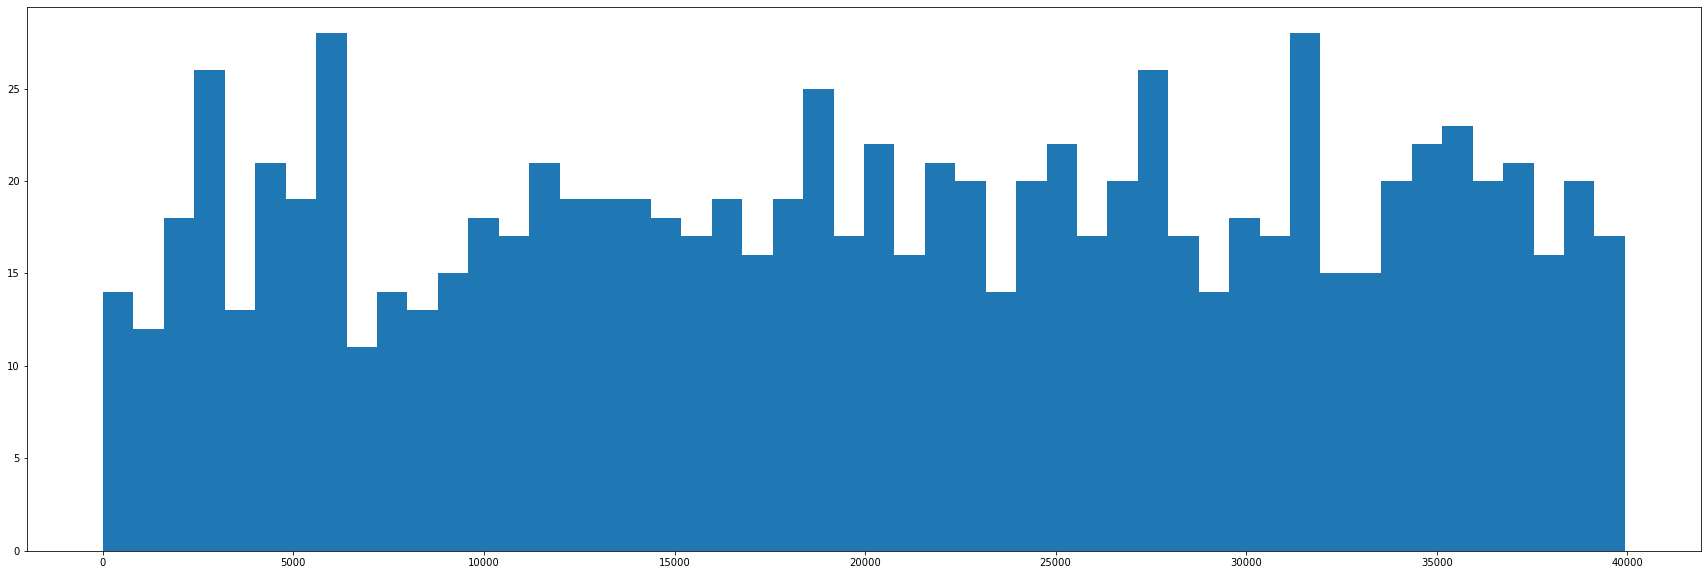

Feature_1


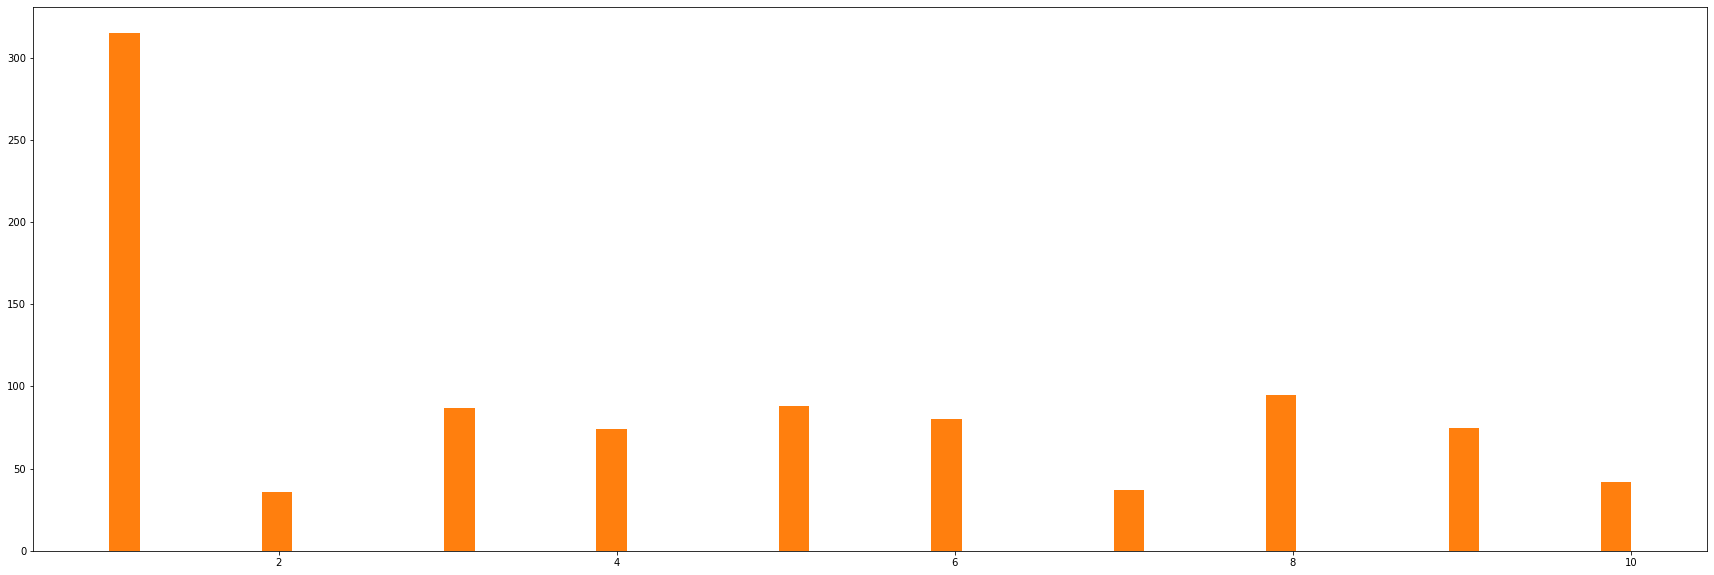

Feature_2


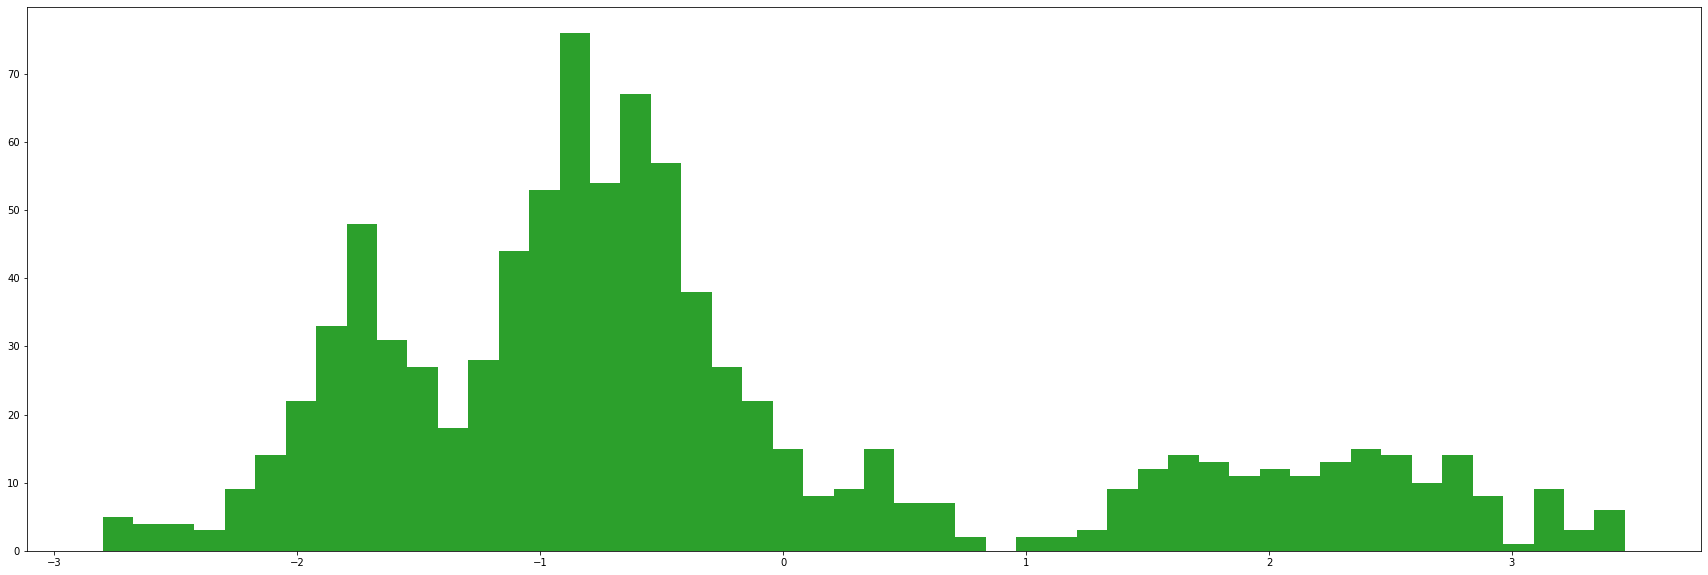

Feature_3


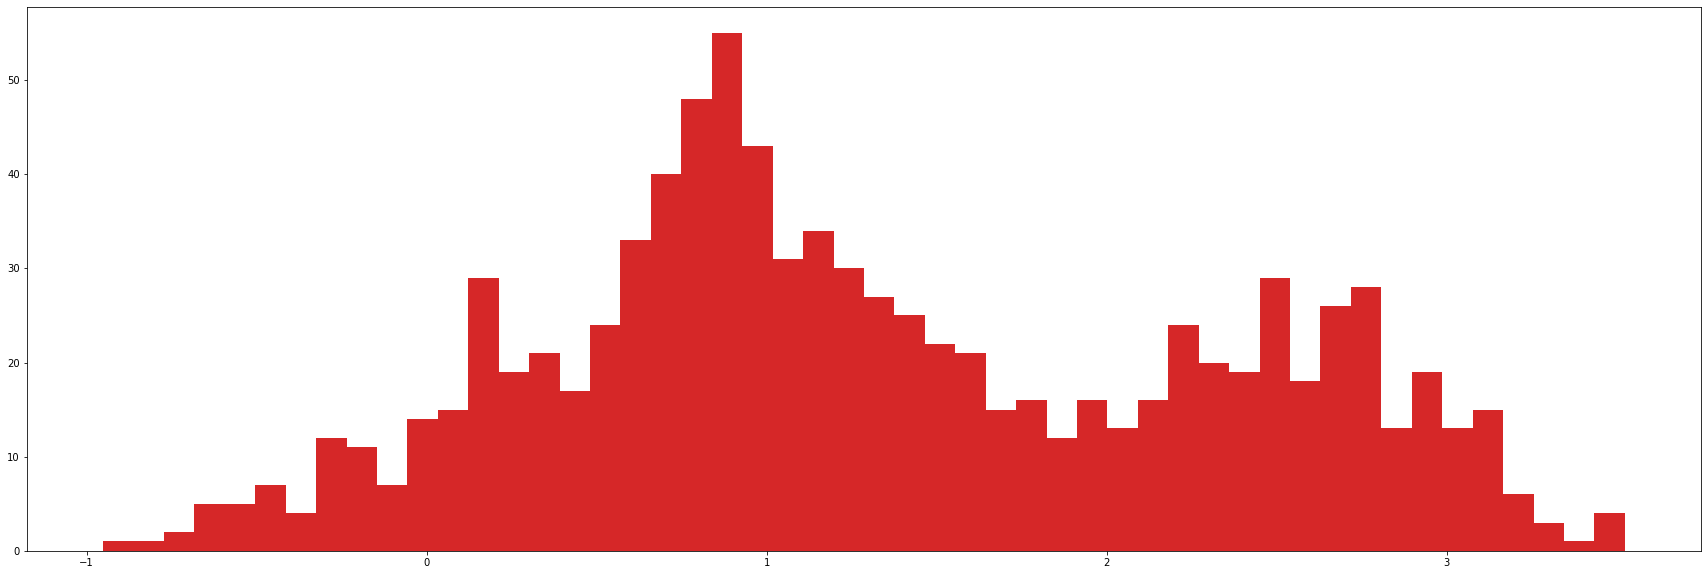

Feature_4


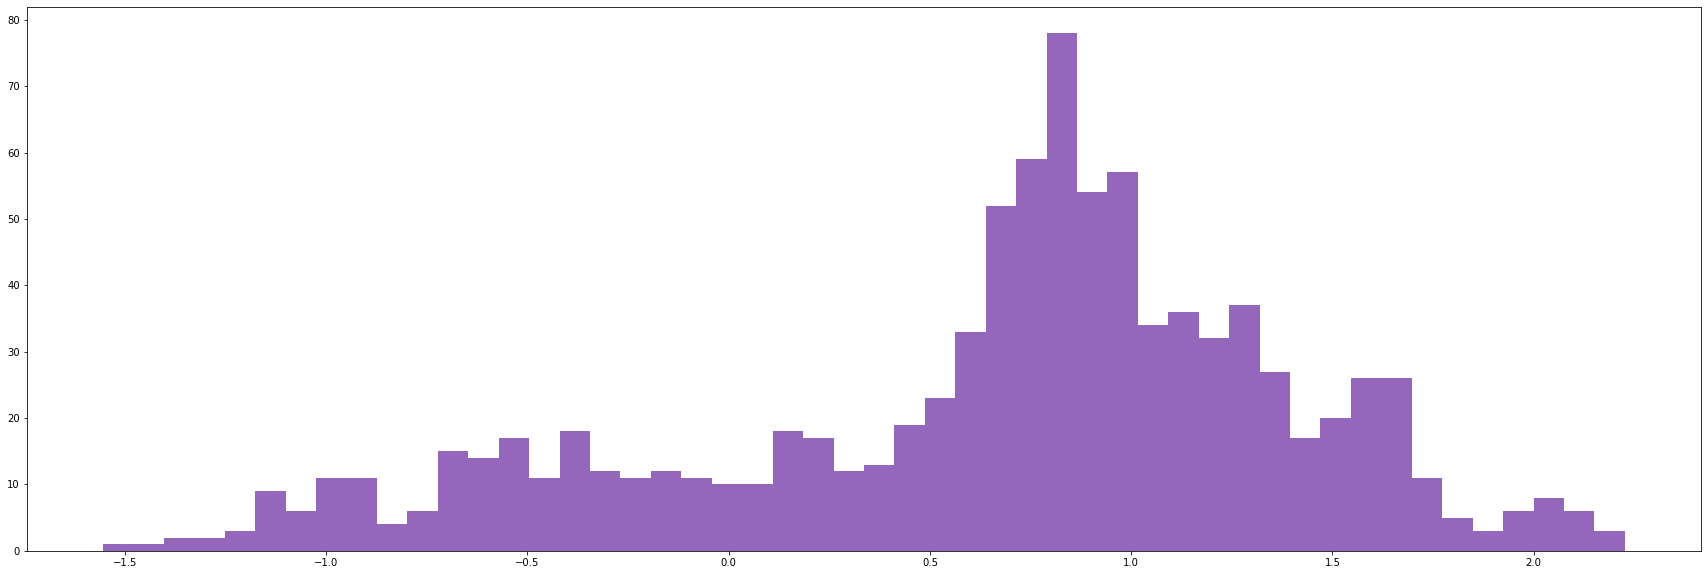

Feature_5


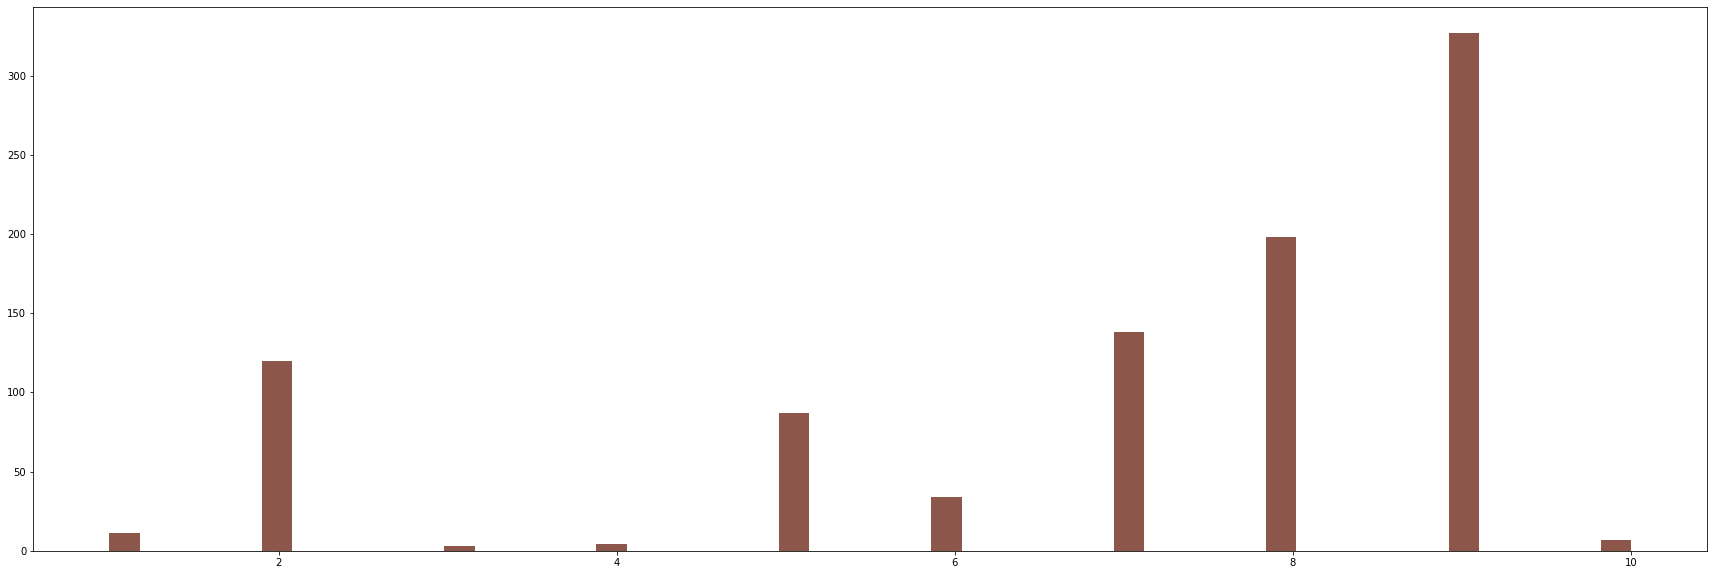

Feature_6


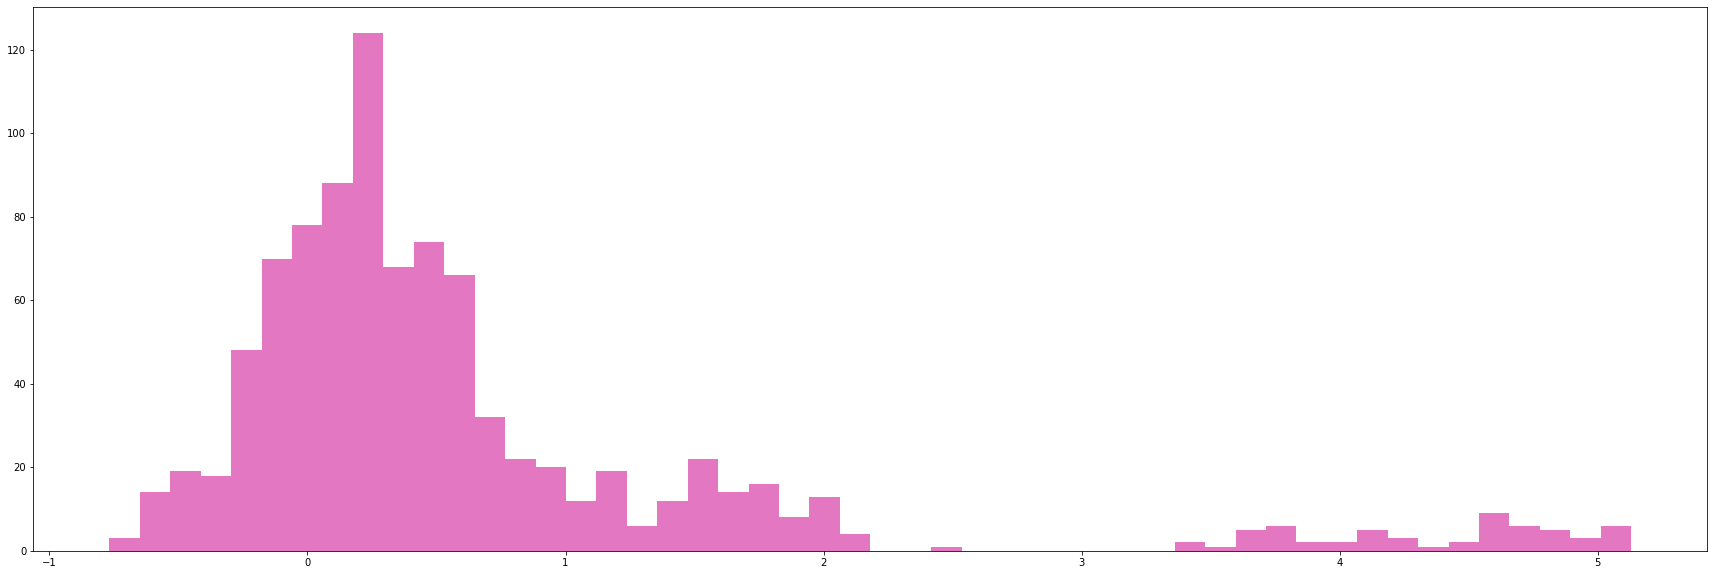

Feature_7


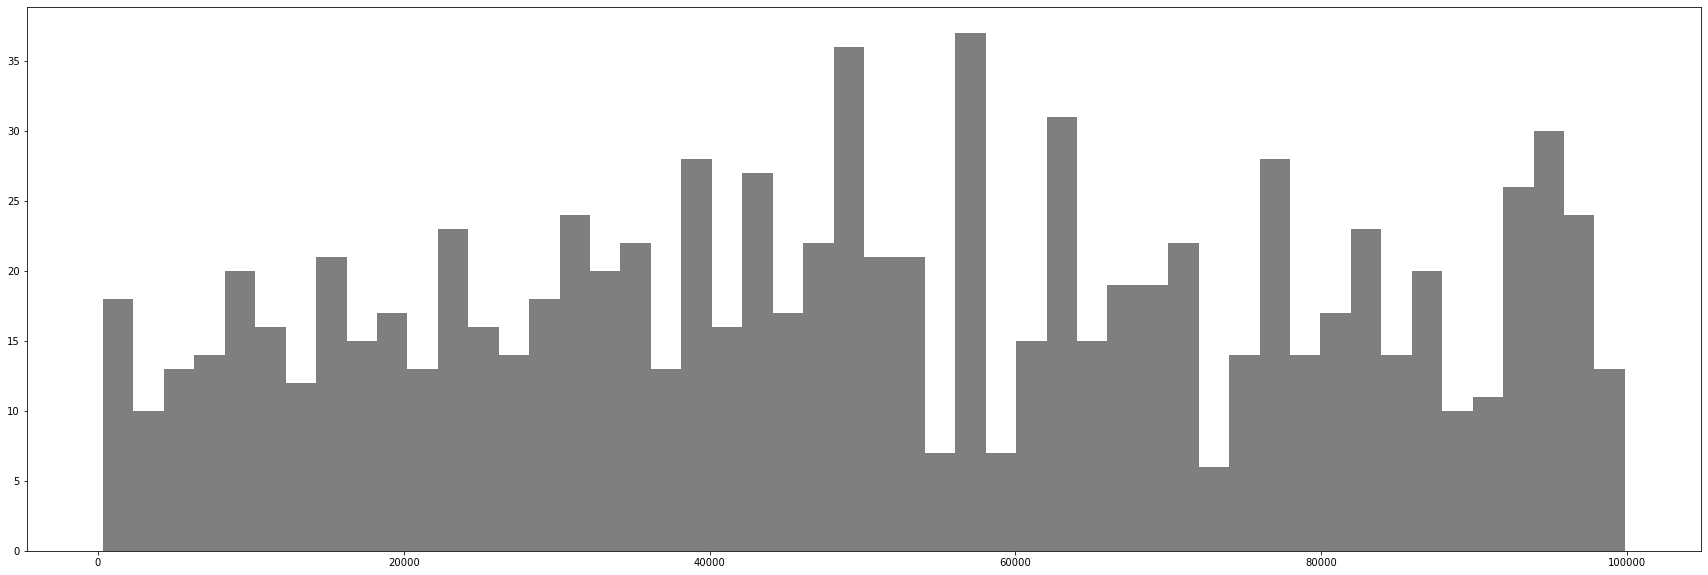

Feature_8


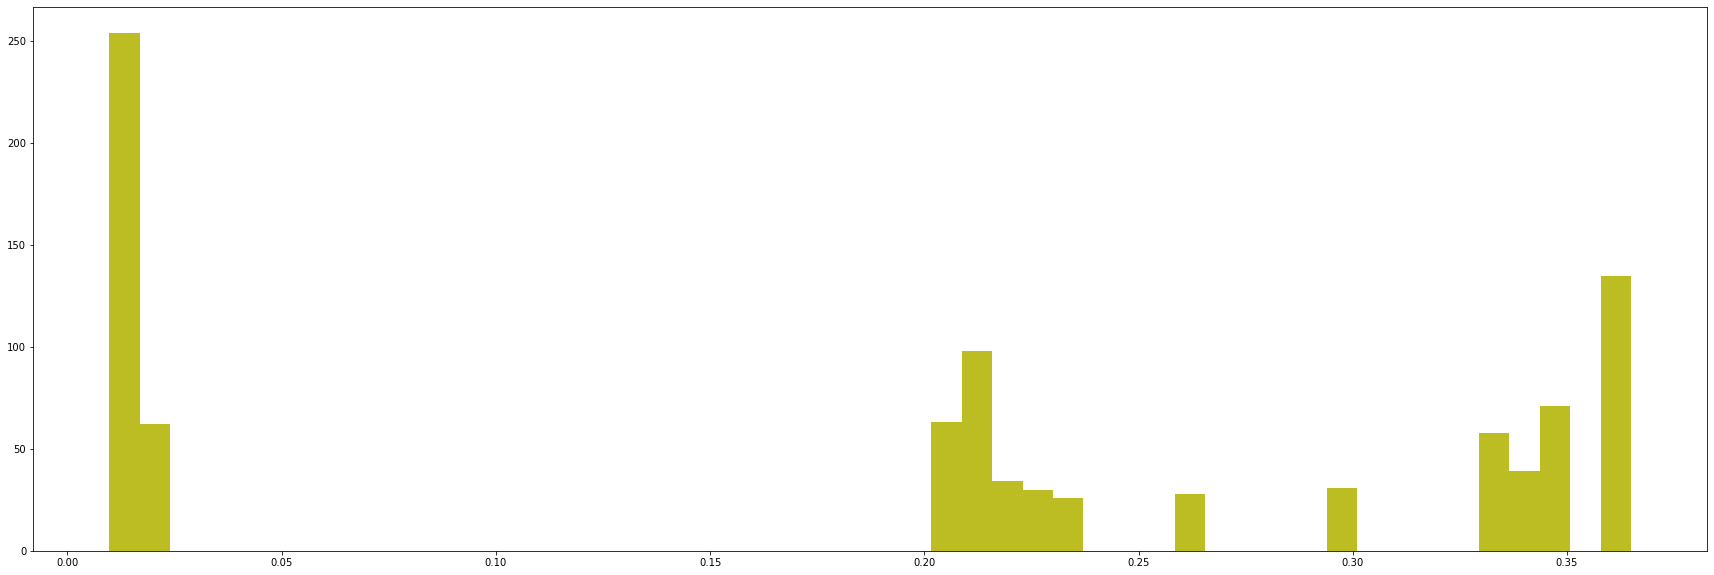

Feature_9


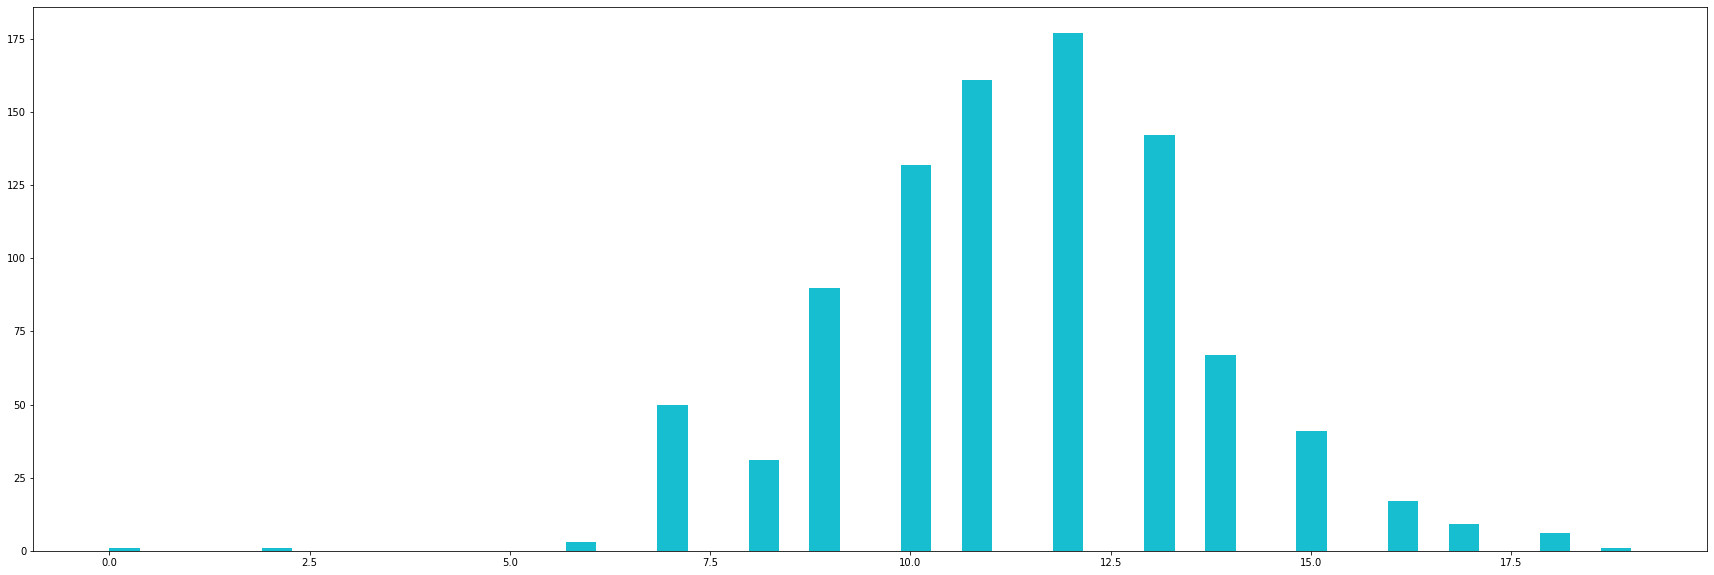

Feature_10


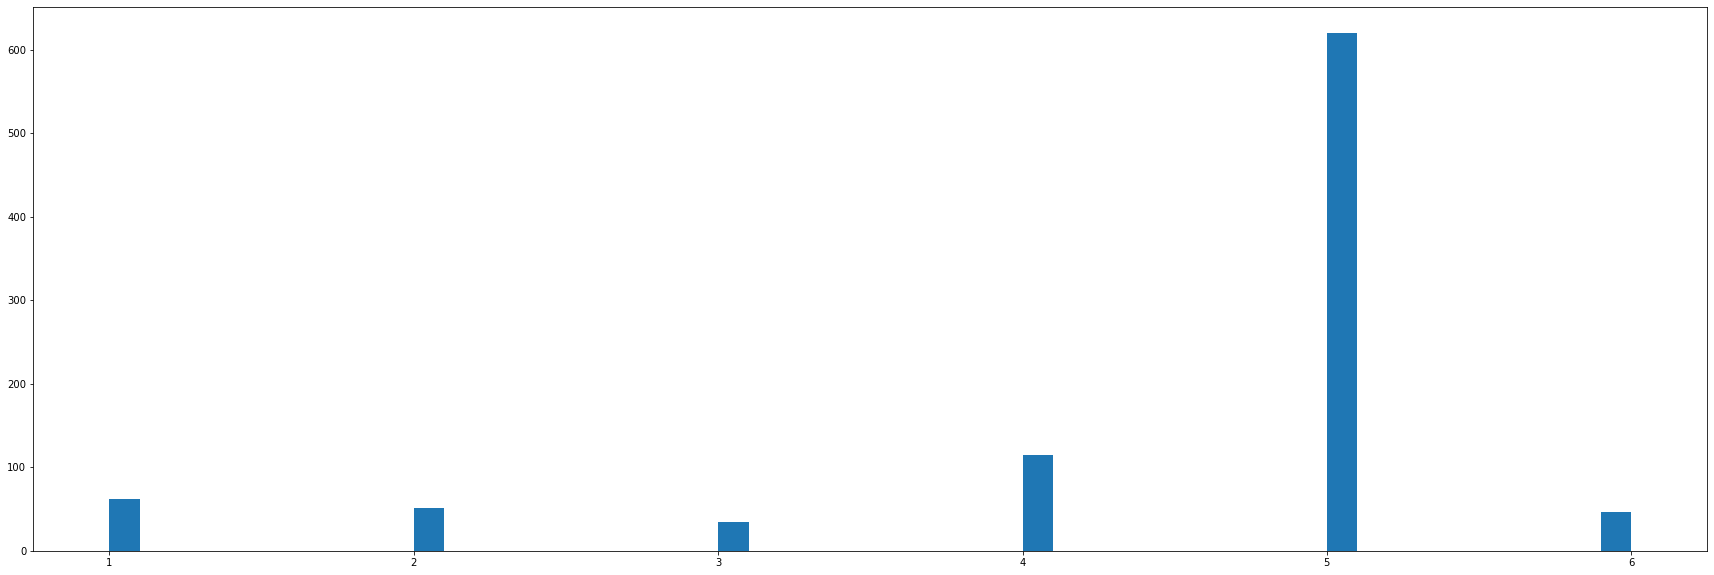

Feature_11


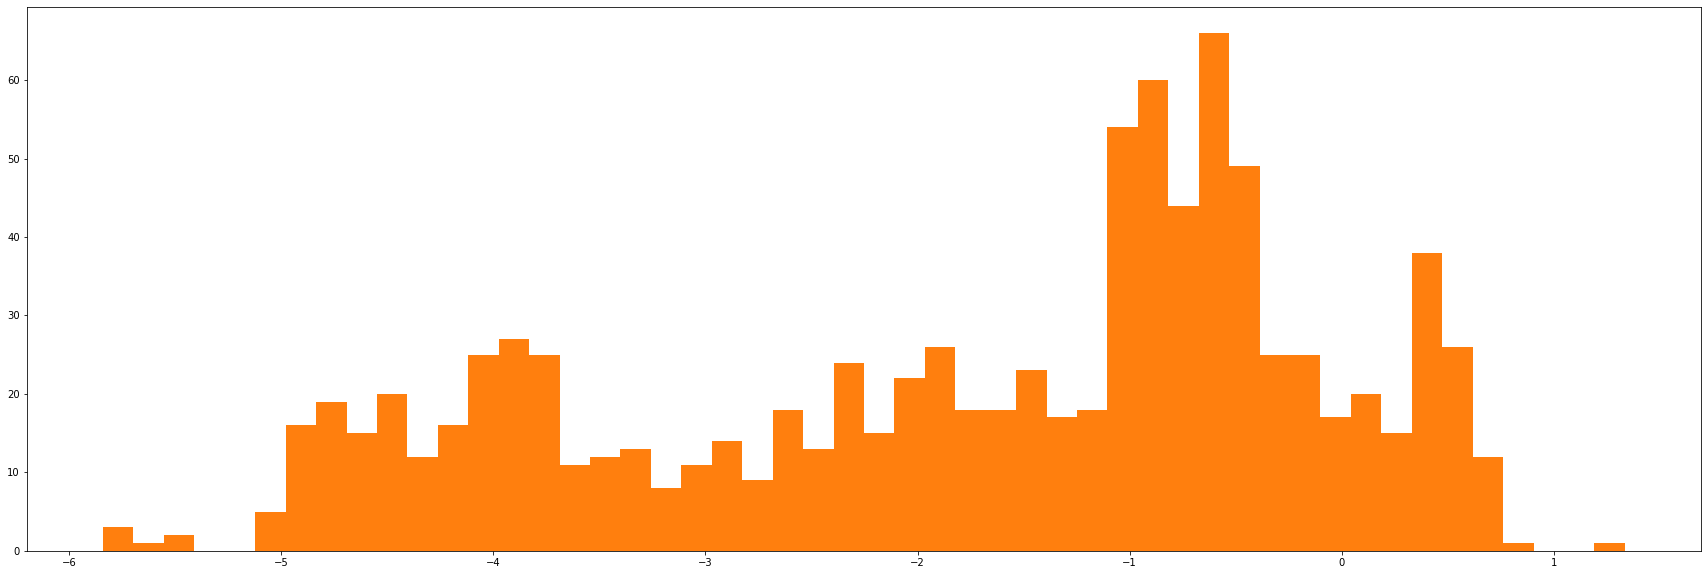

Feature_12


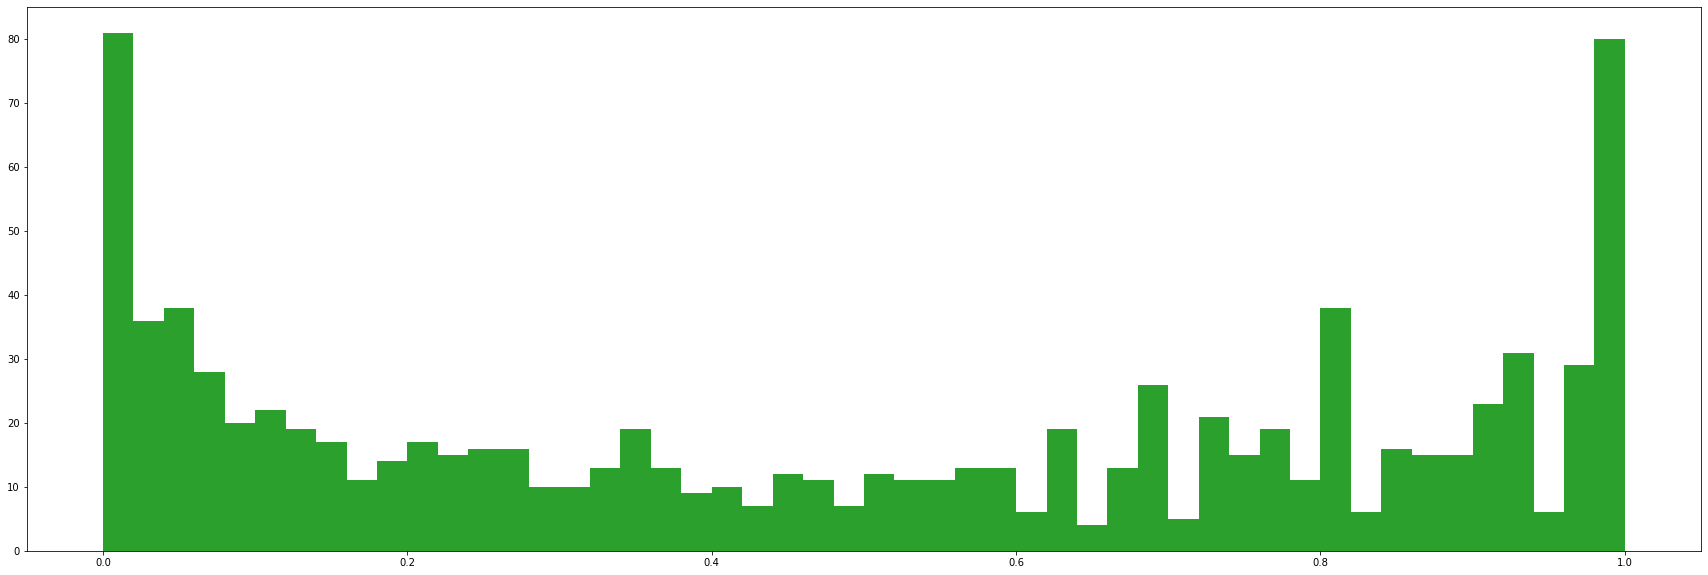

Feature_13


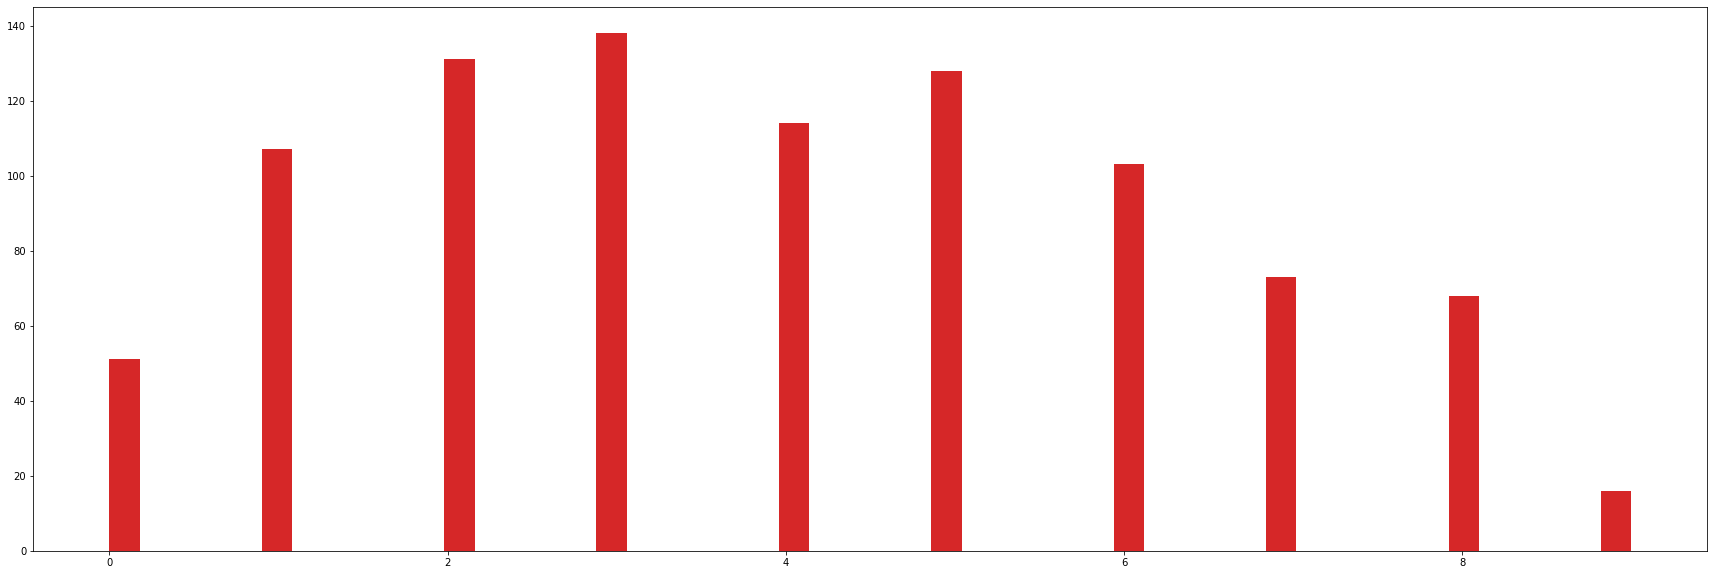

Feature_14


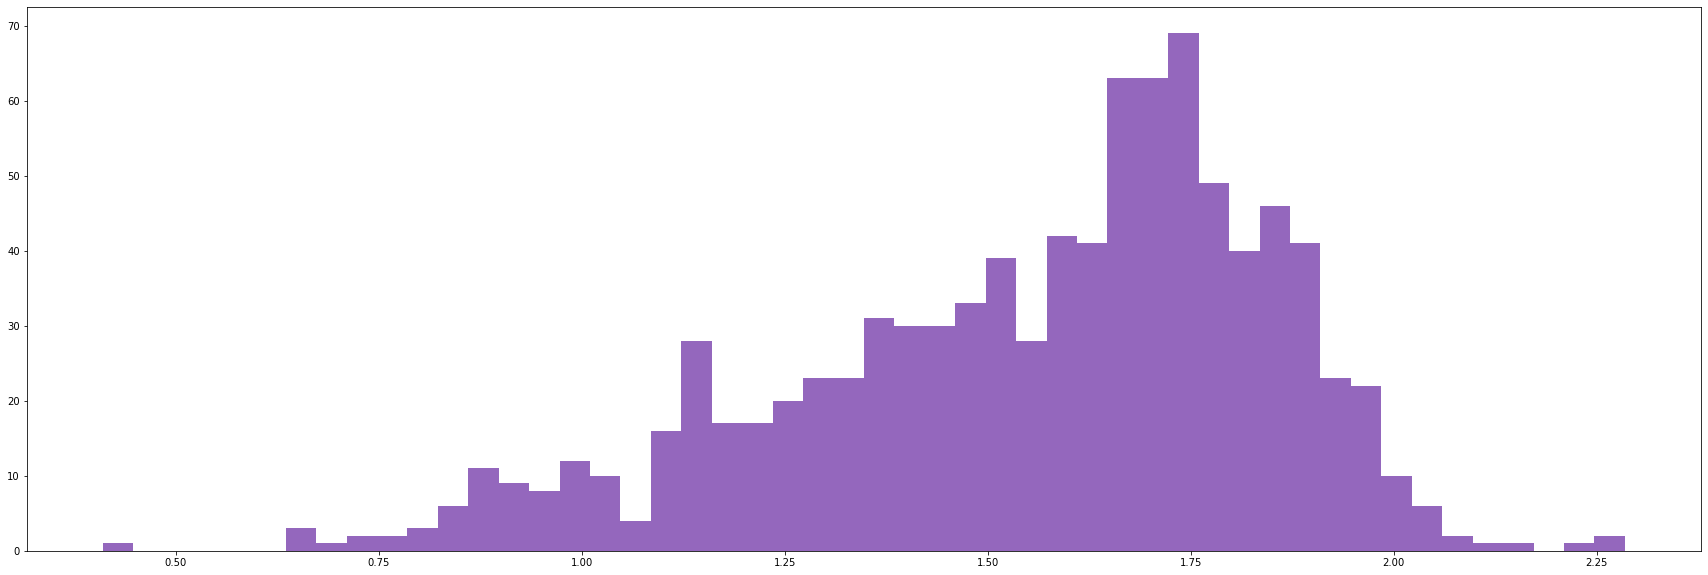

Feature_15


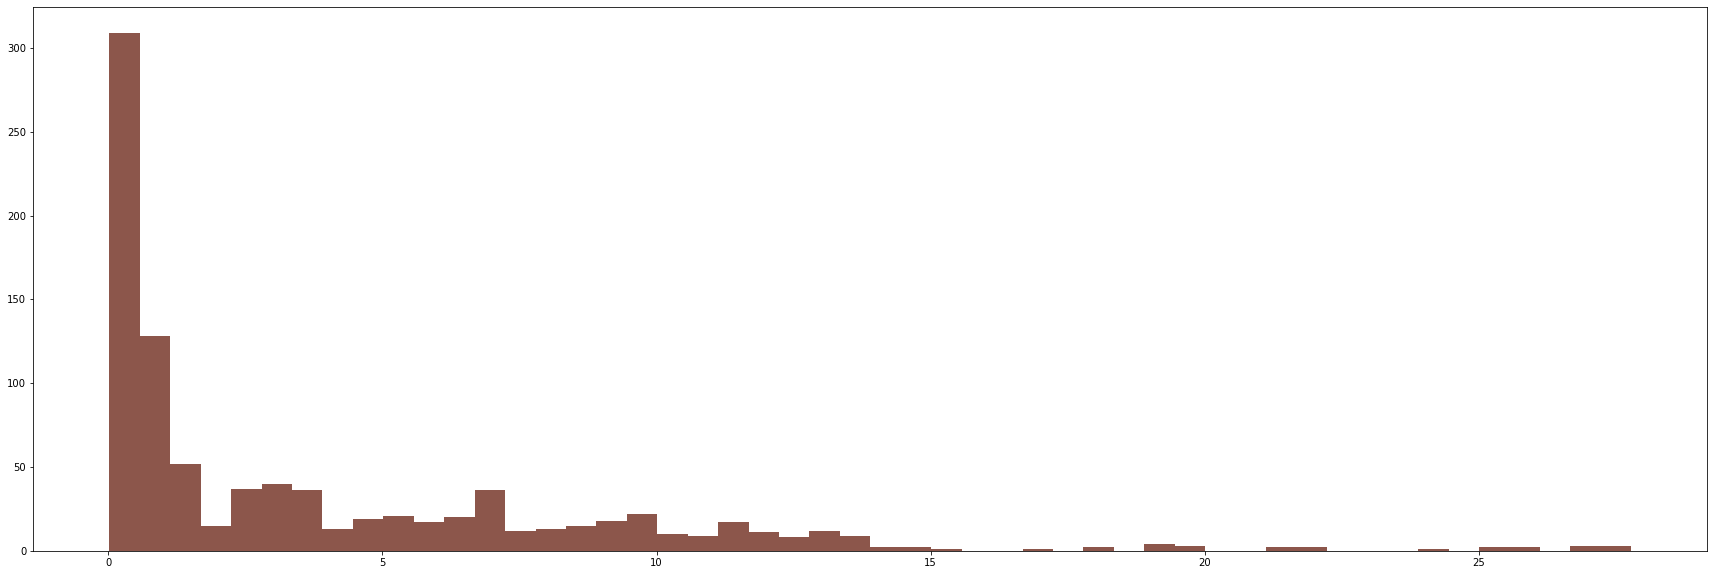

Feature_16


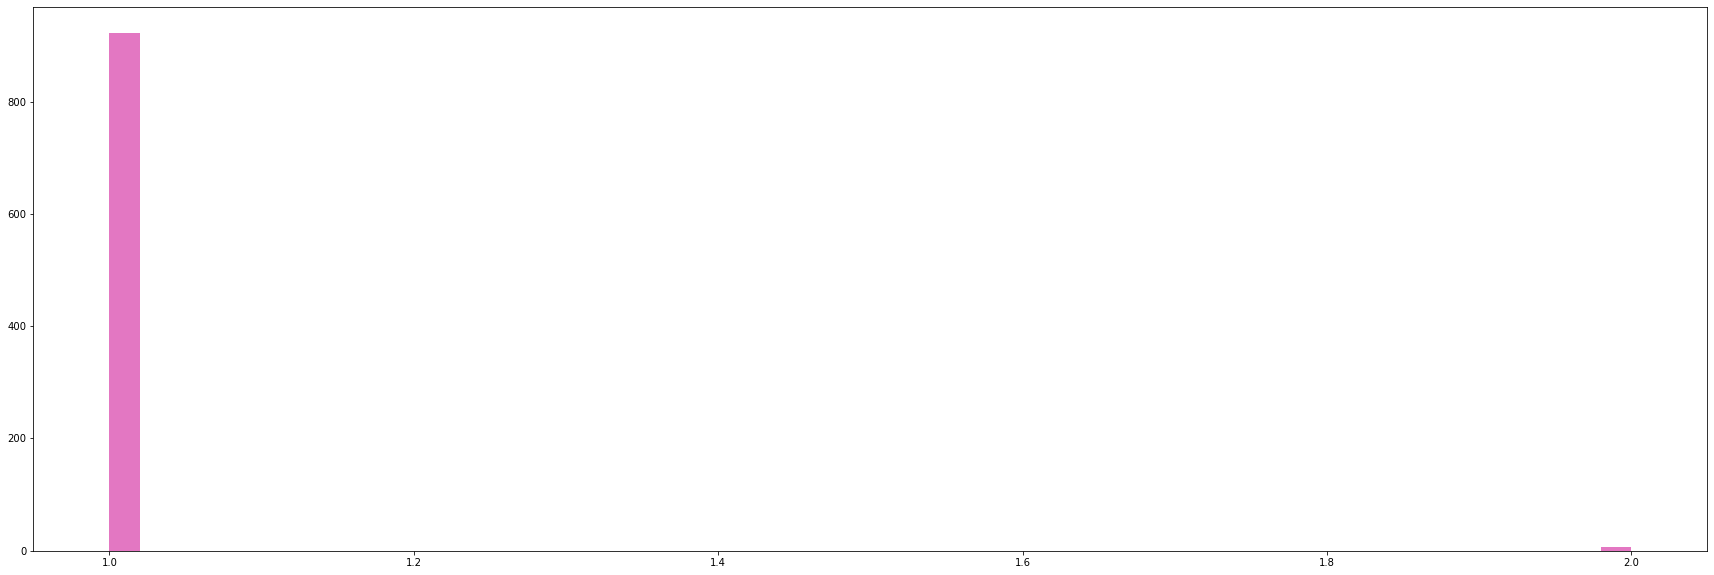

Feature_17


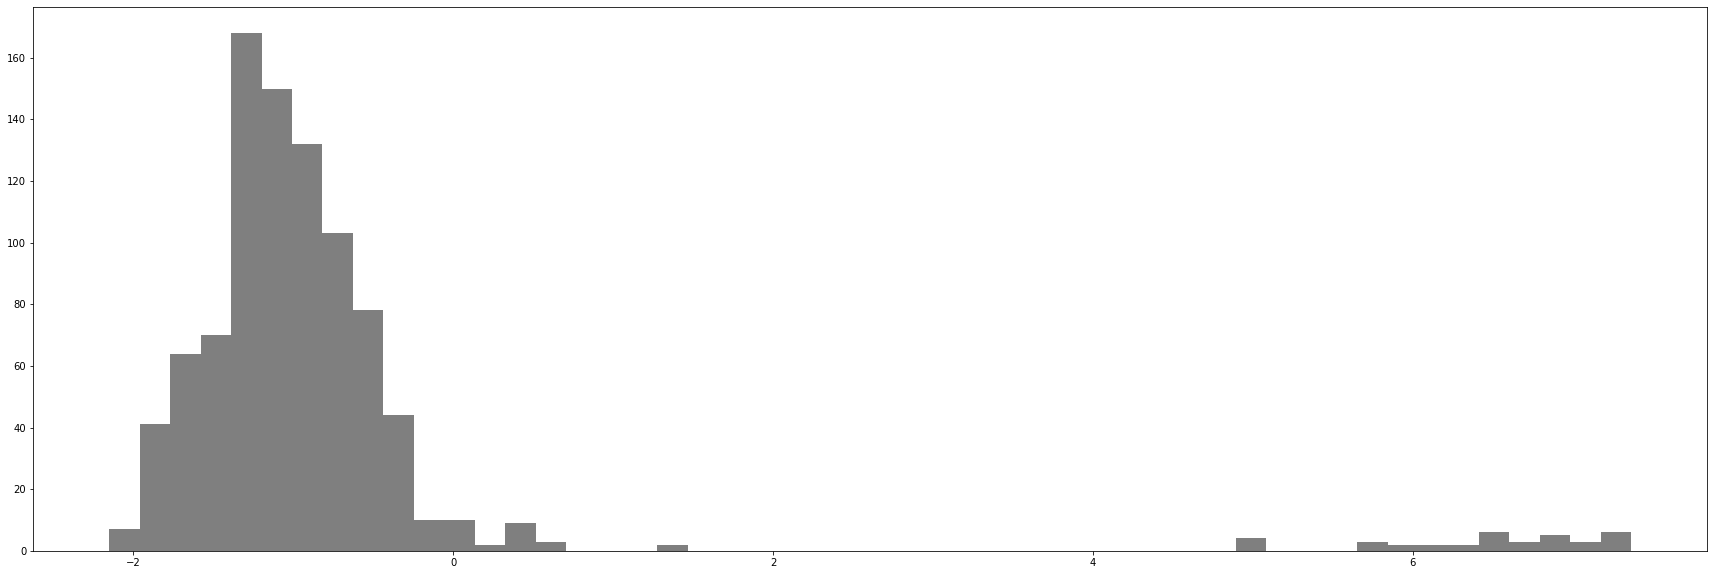

Feature_18


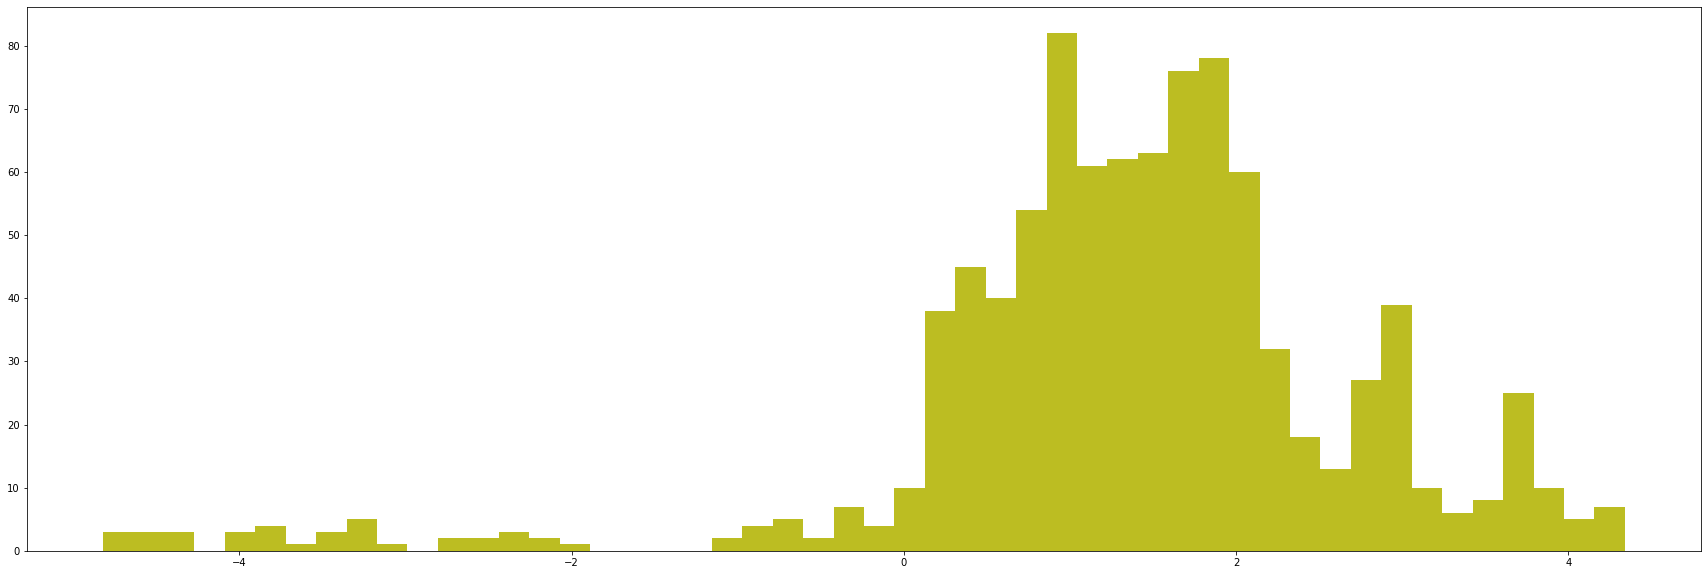

Feature_19


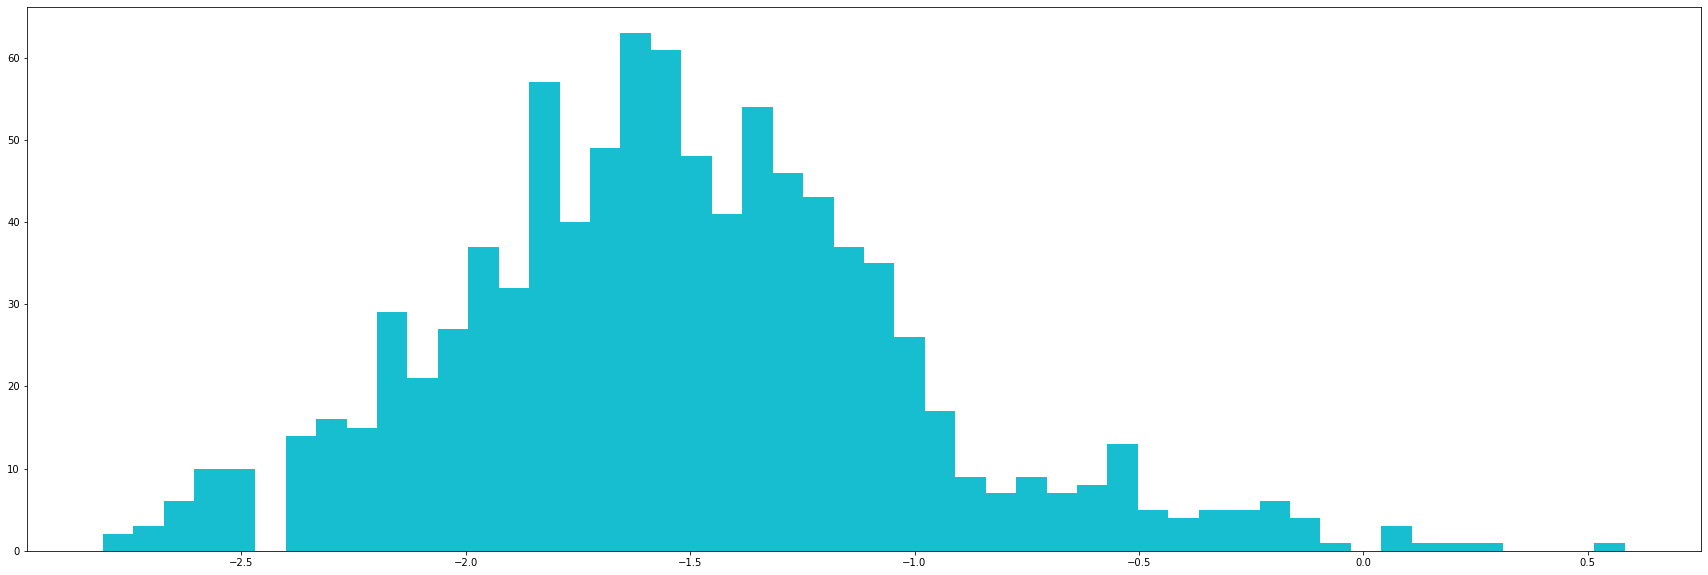

Feature_20


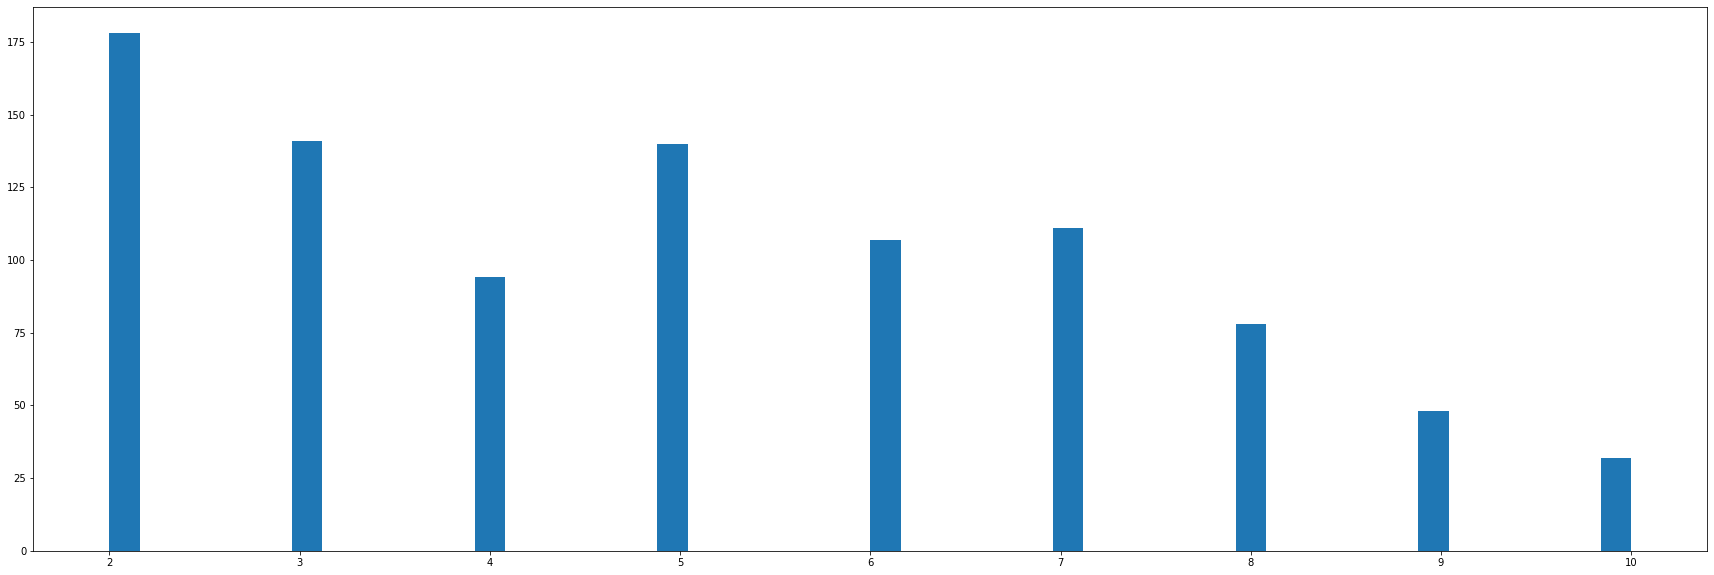

Feature_21


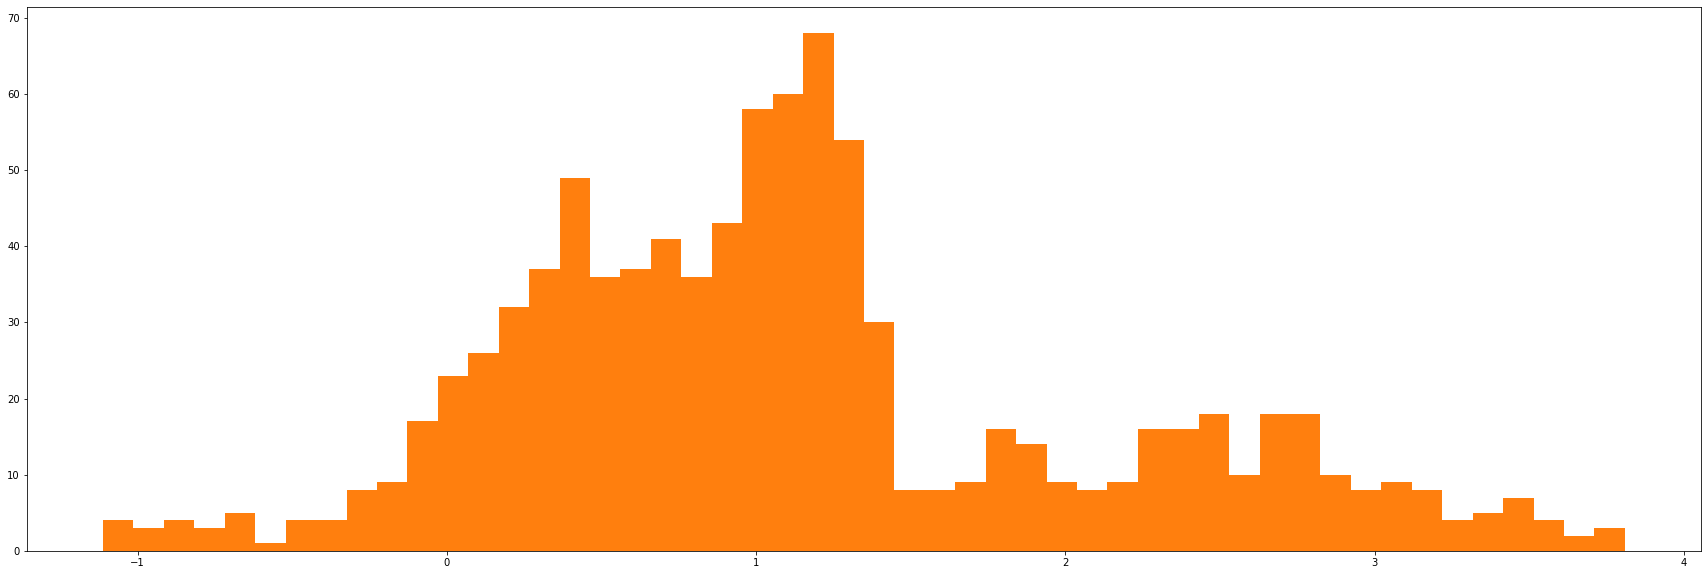

Feature_22


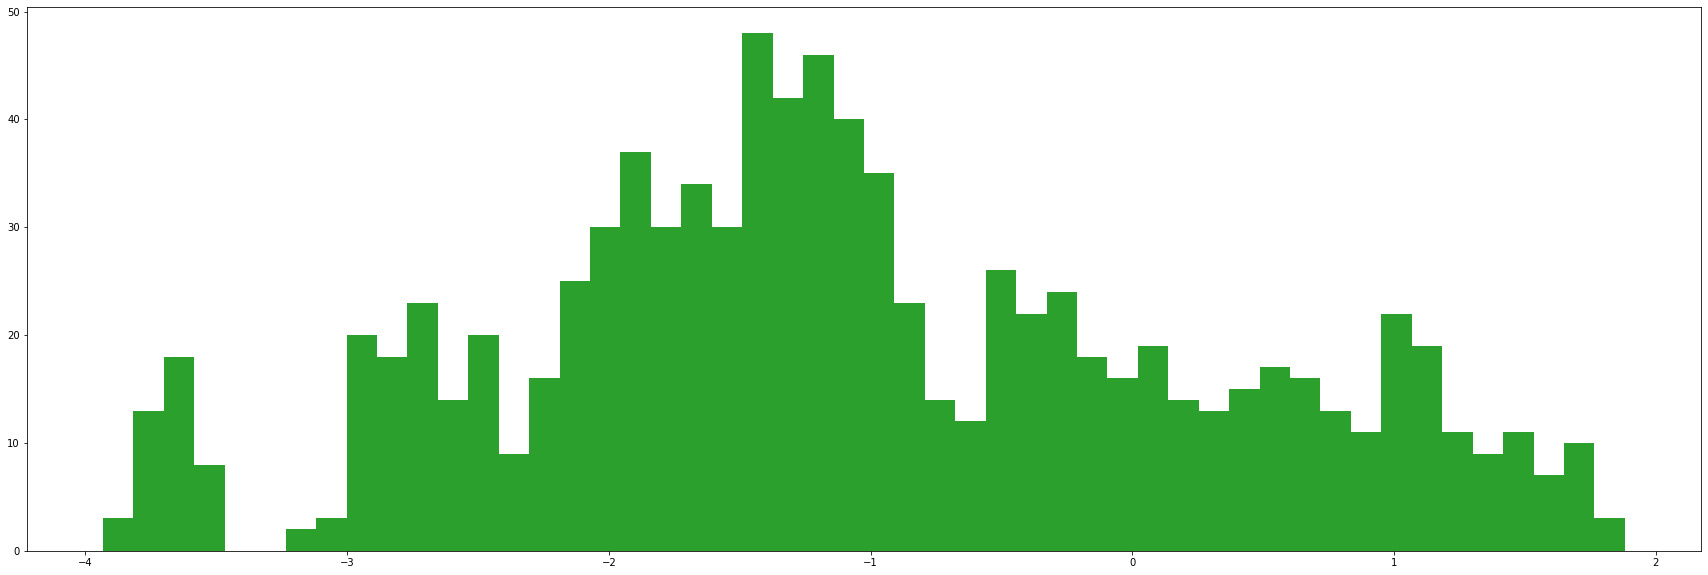

Feature_23


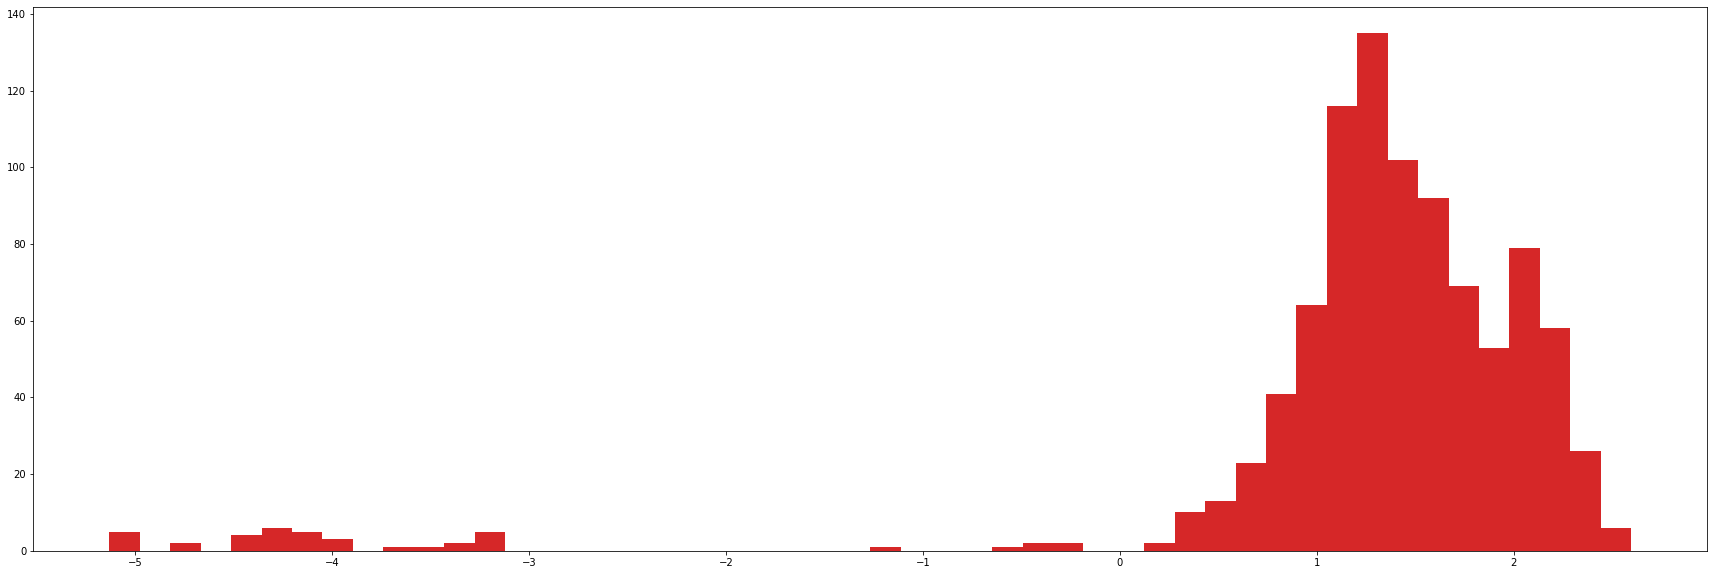

Feature_24


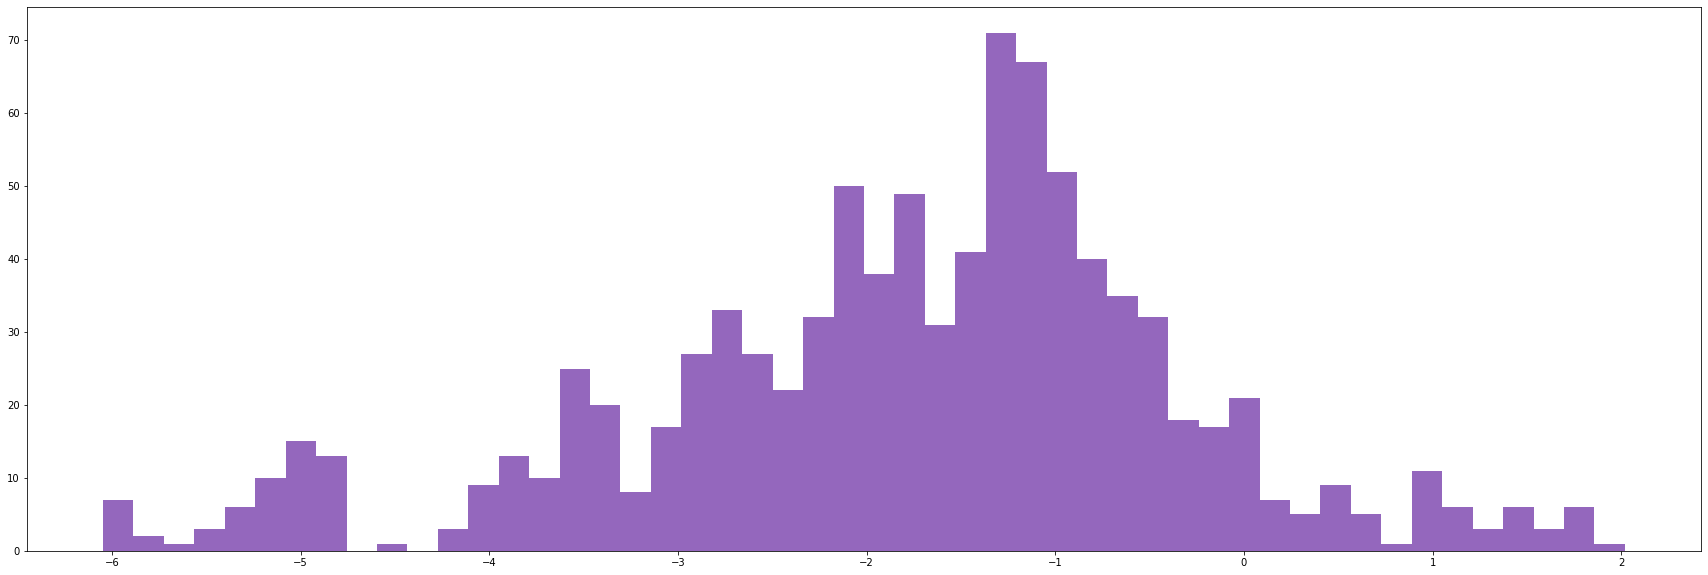

Feature_25


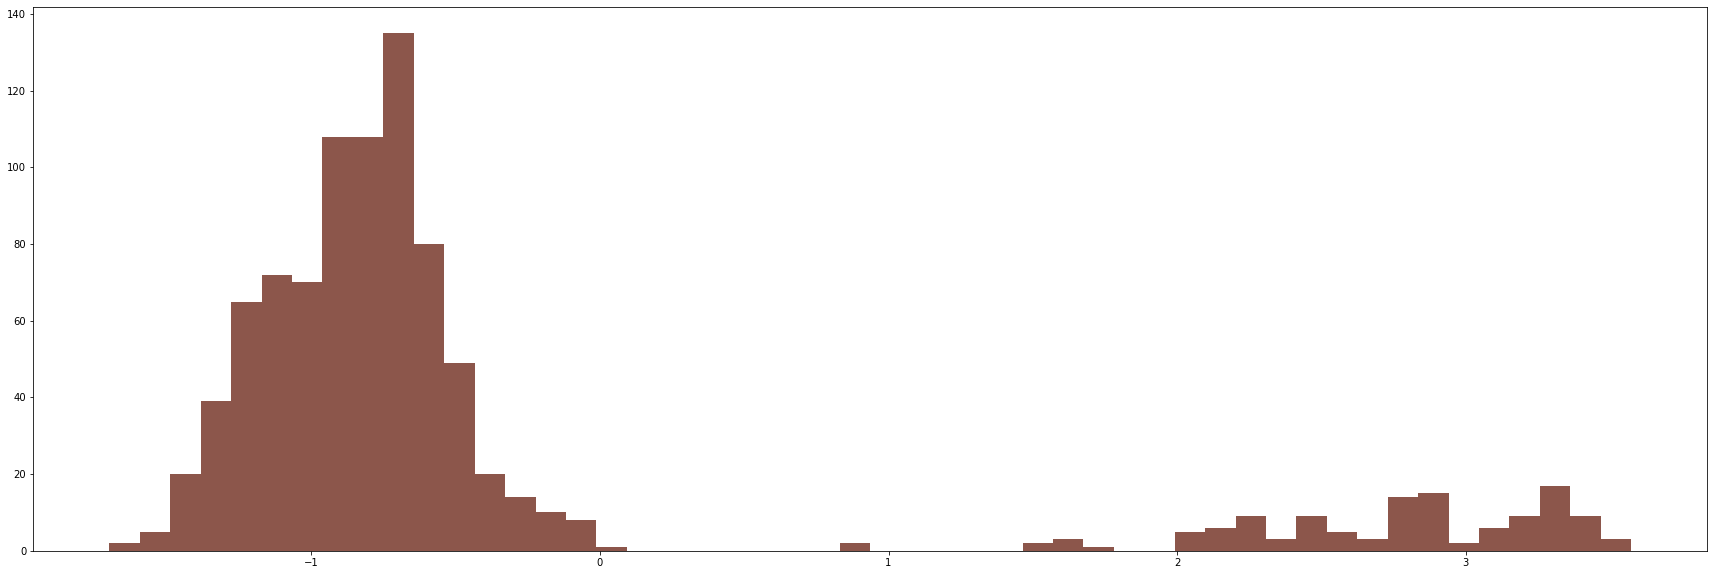

Ret_MinusTwo


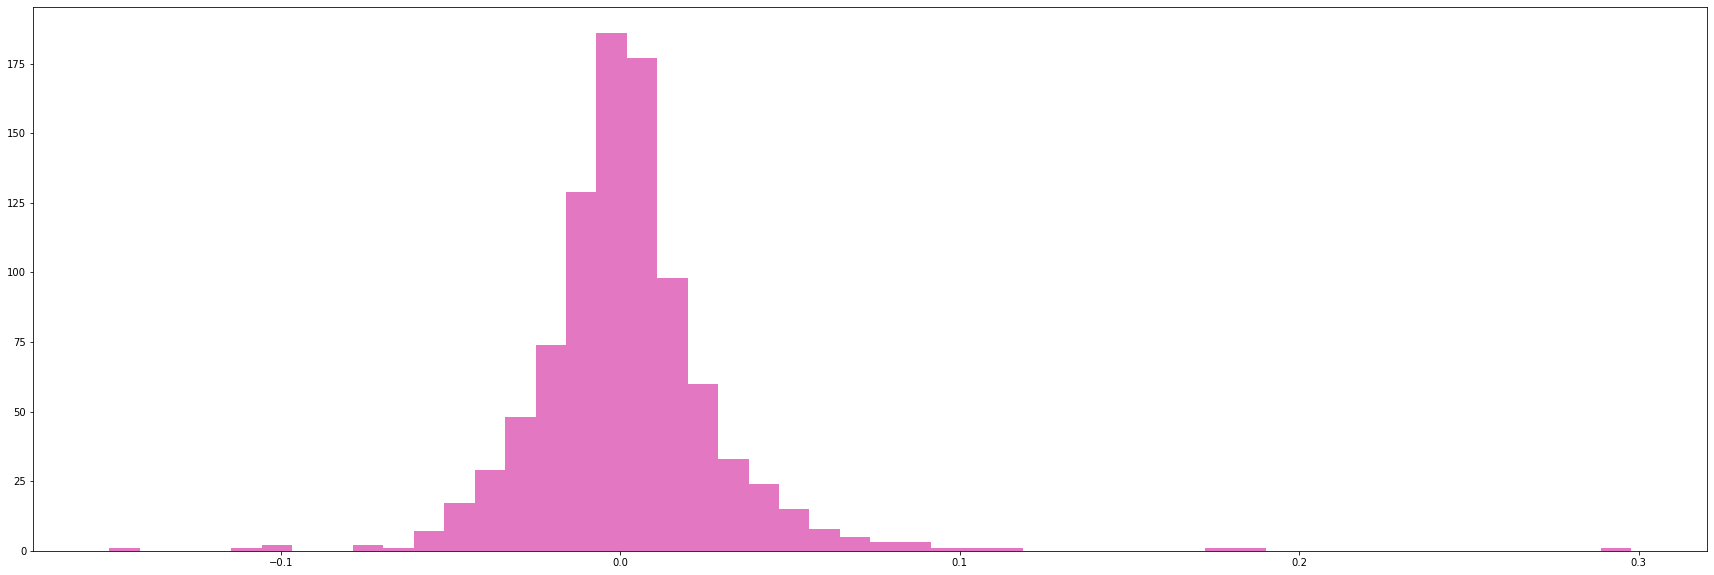

Ret_MinusOne


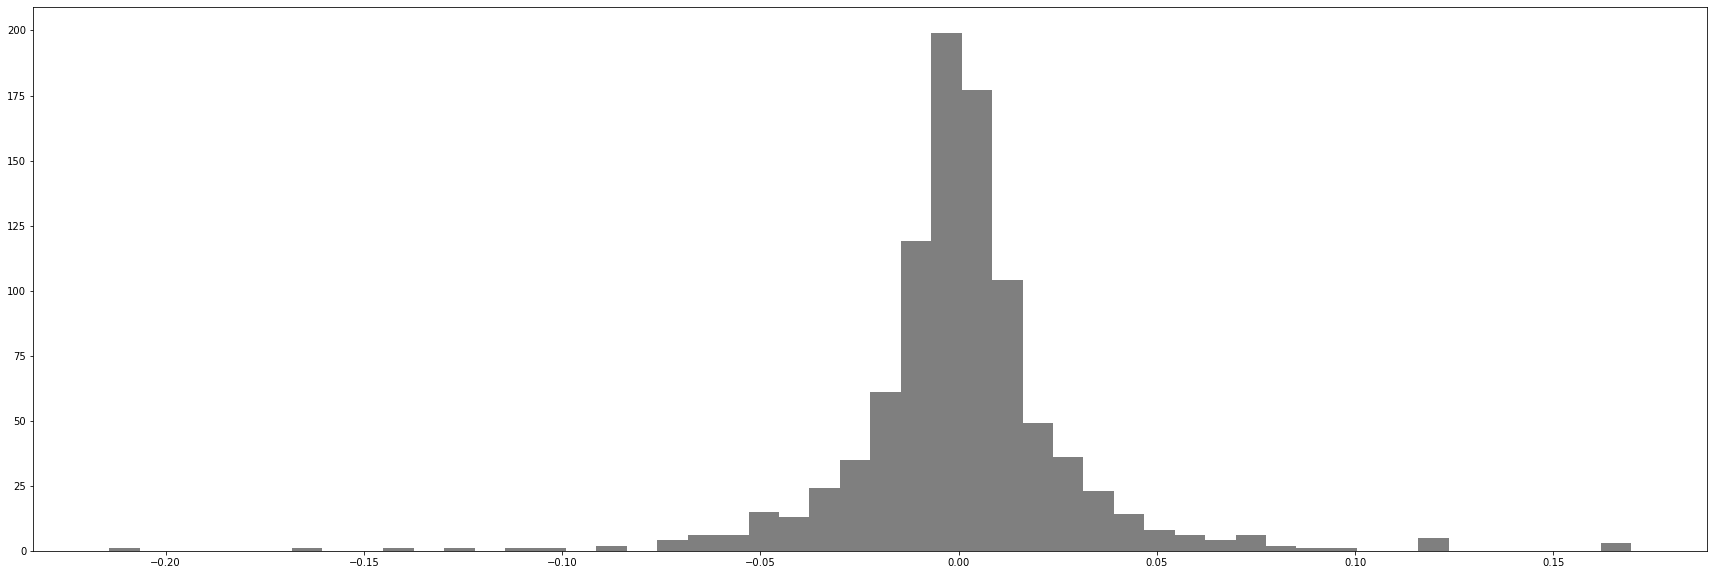

Ret_2


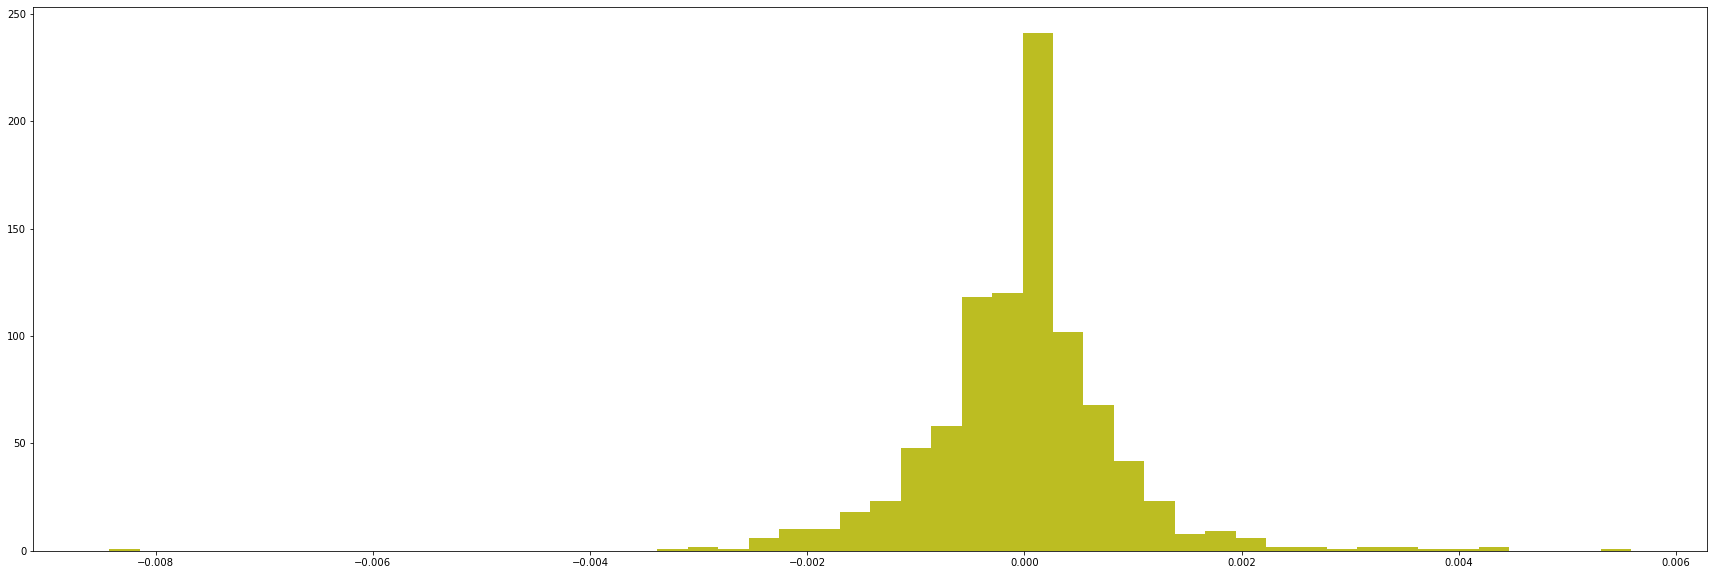

Ret_3


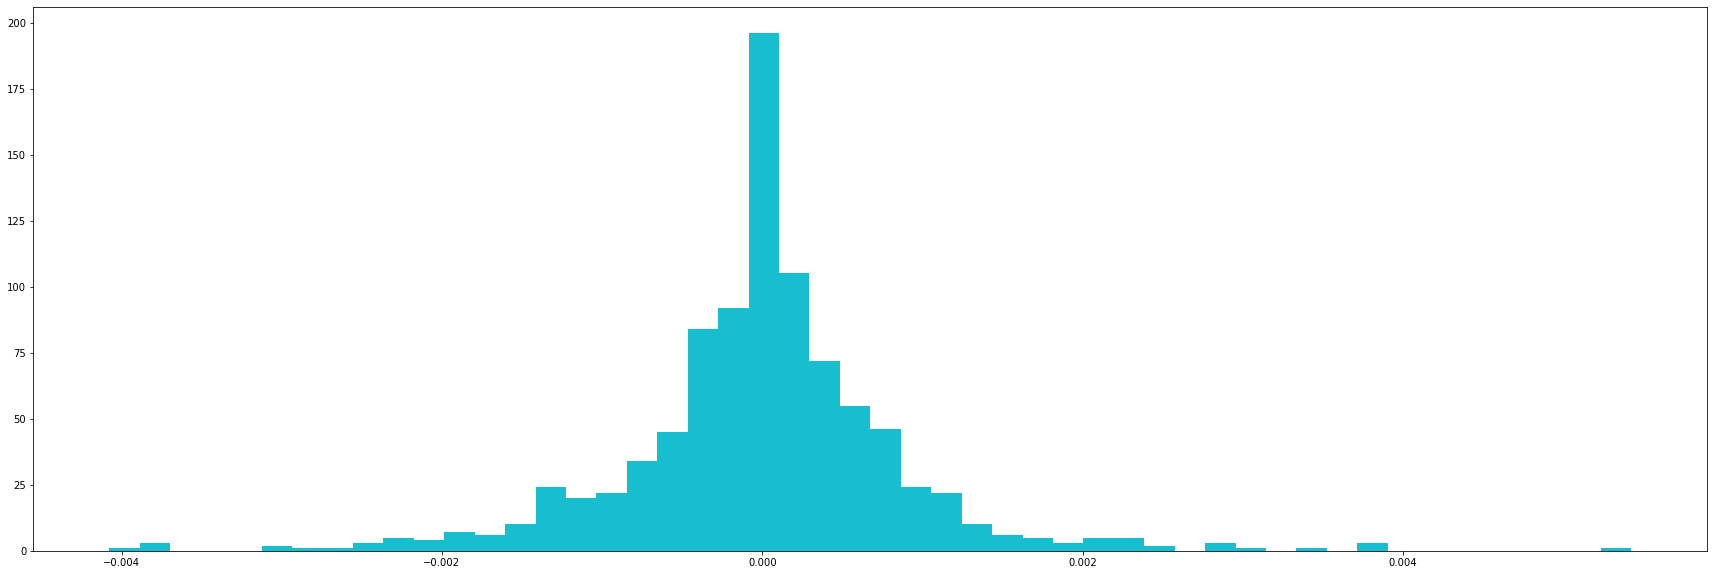

Ret_4


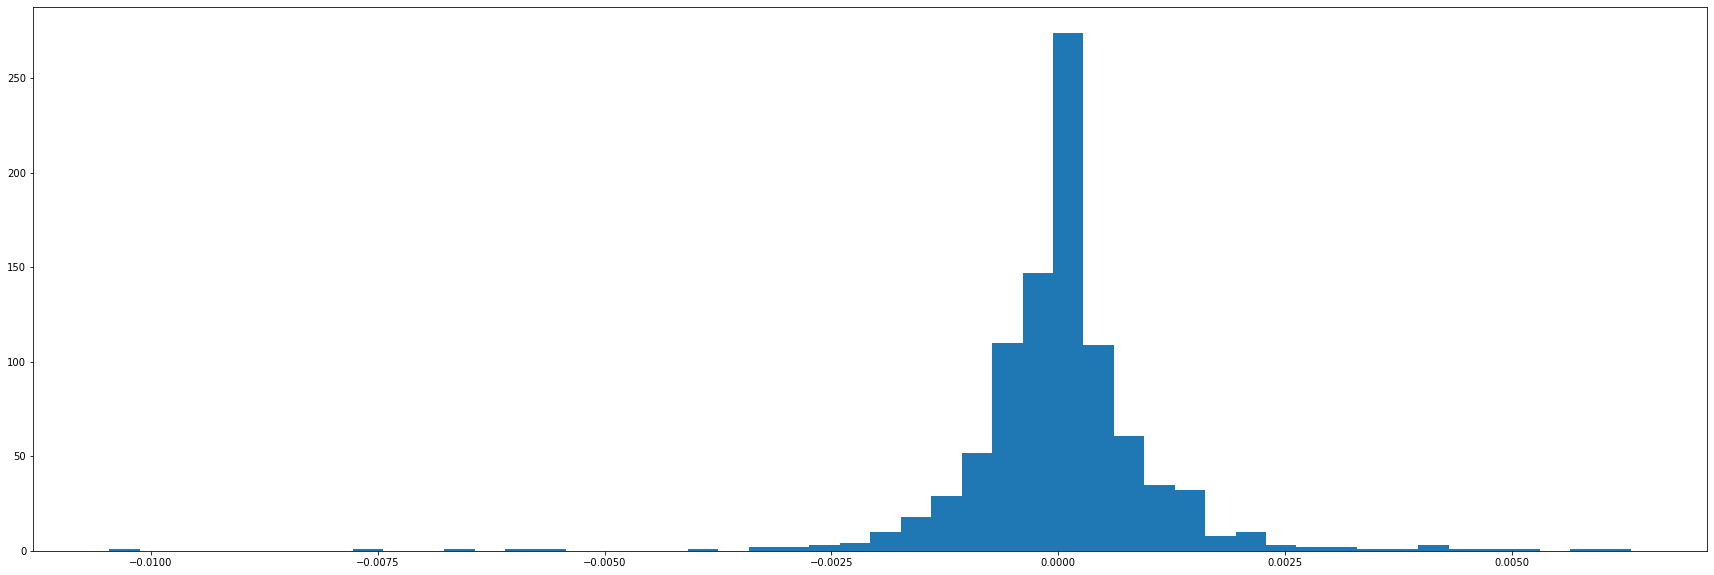

Ret_5


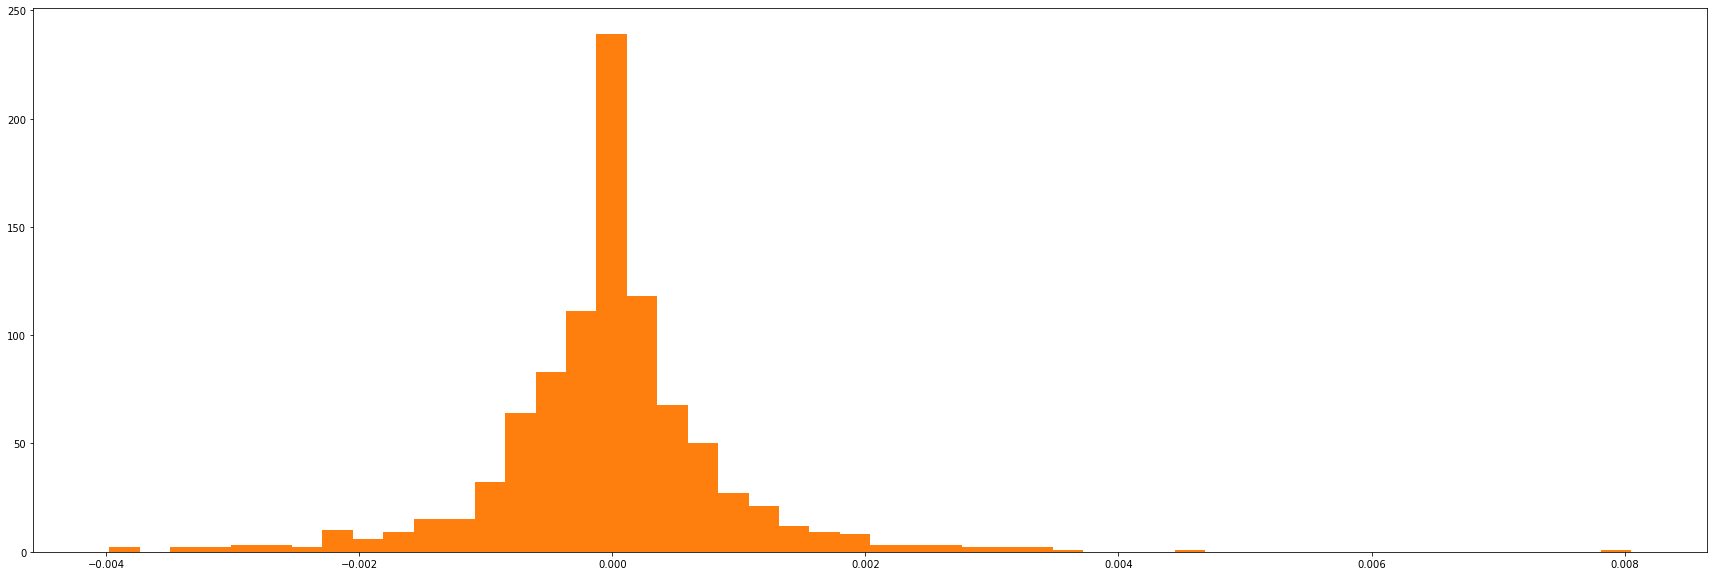

Ret_6


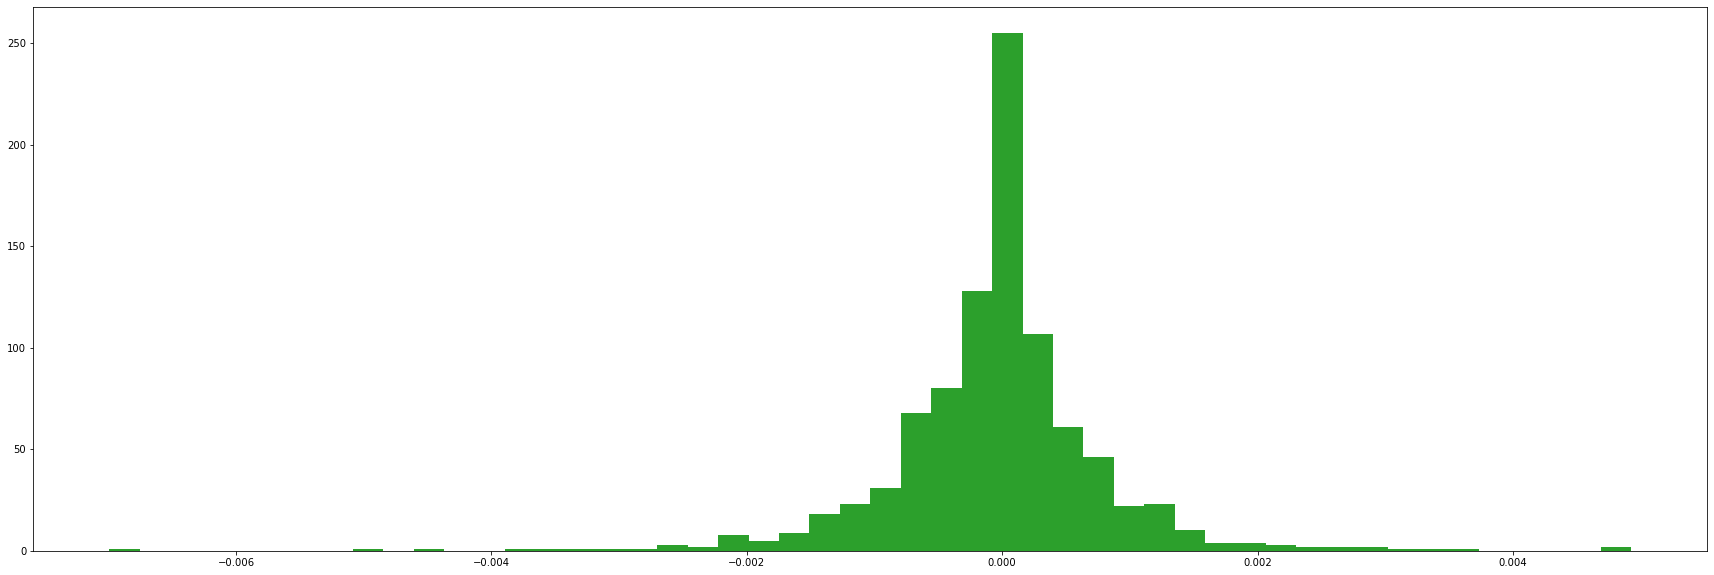

Ret_7


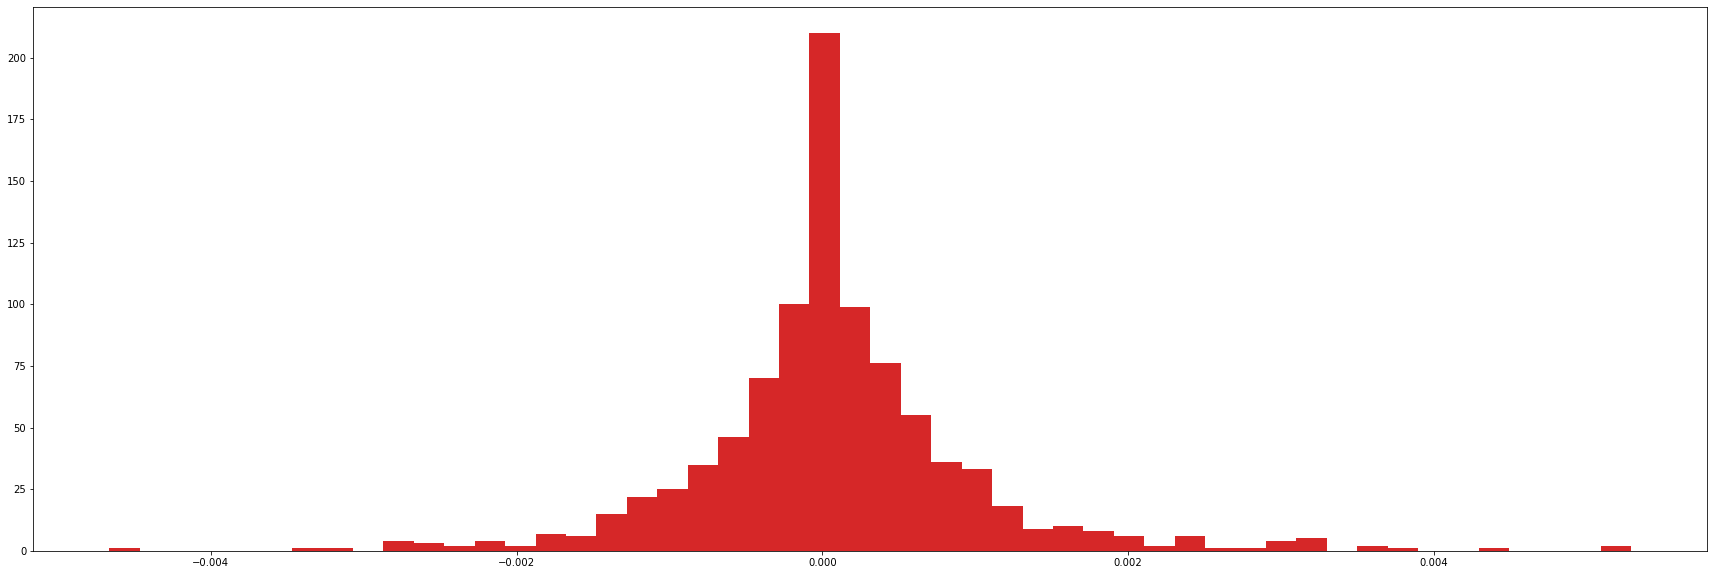

Ret_8


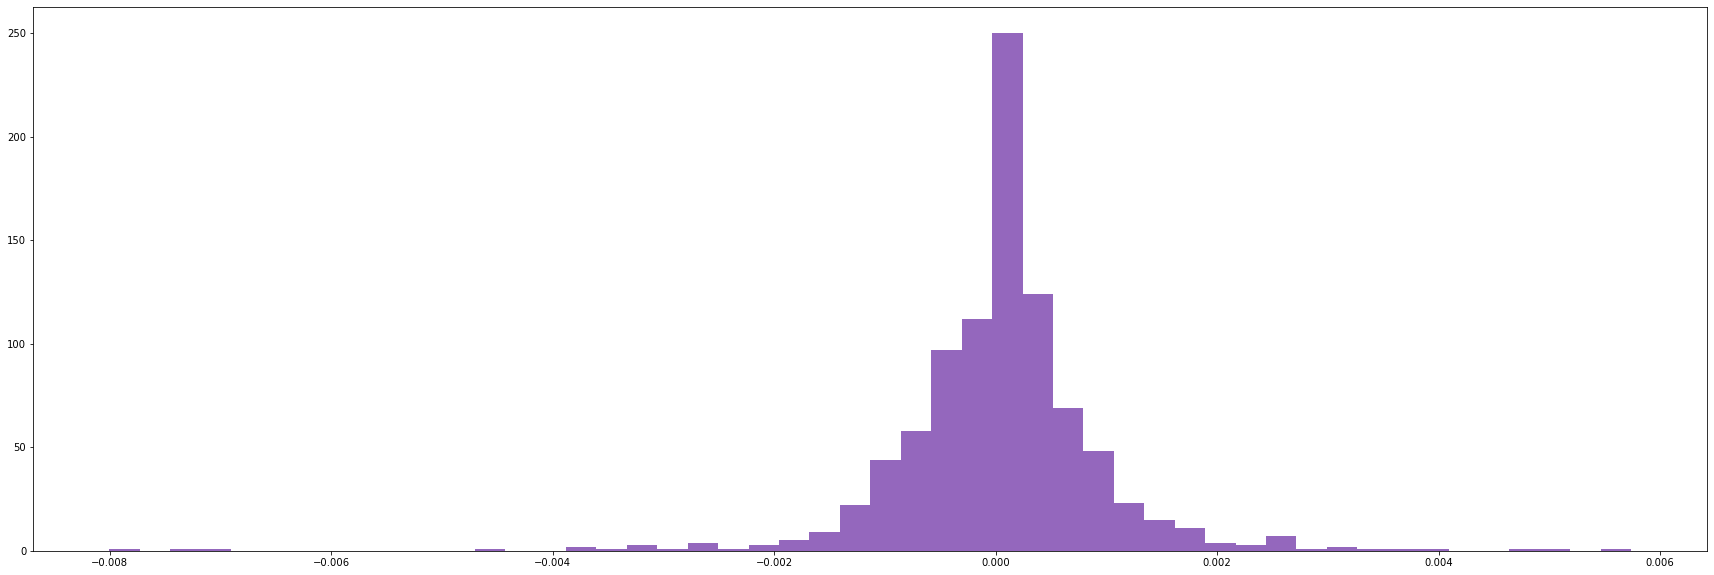

Ret_9


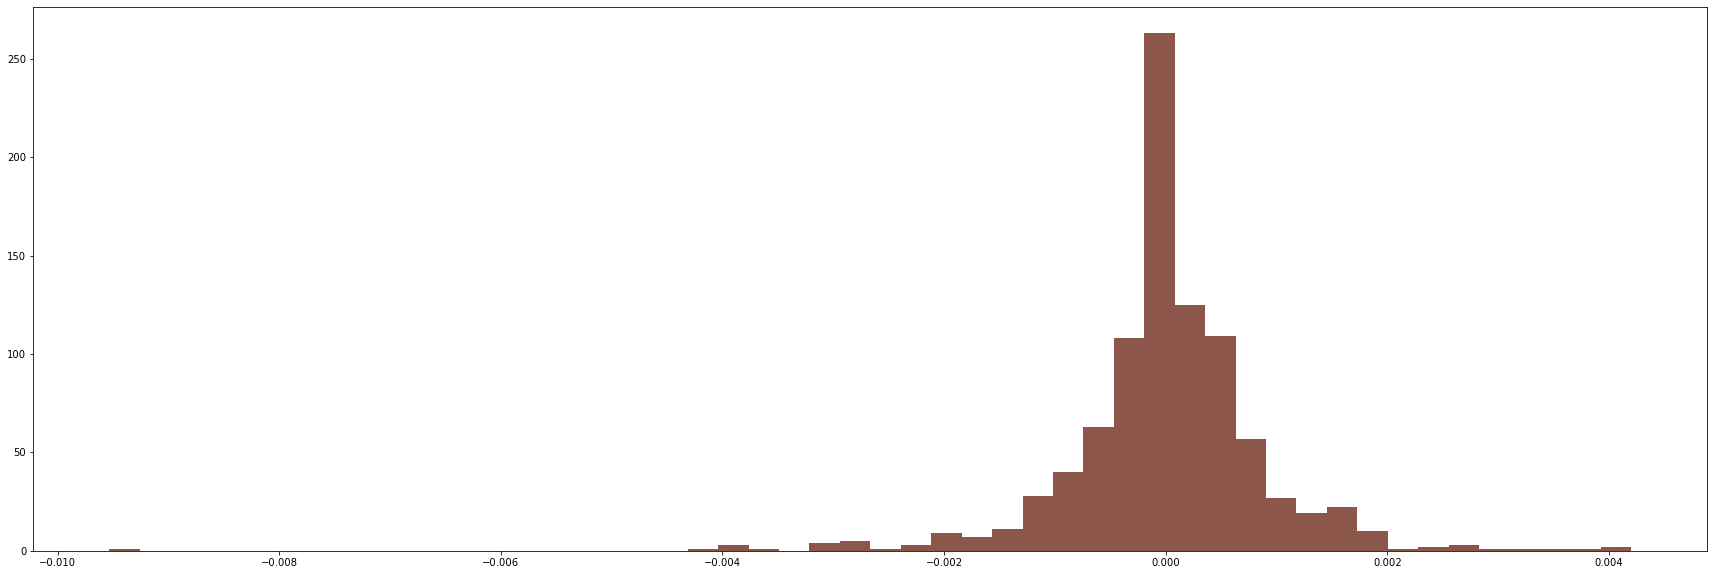

Ret_10


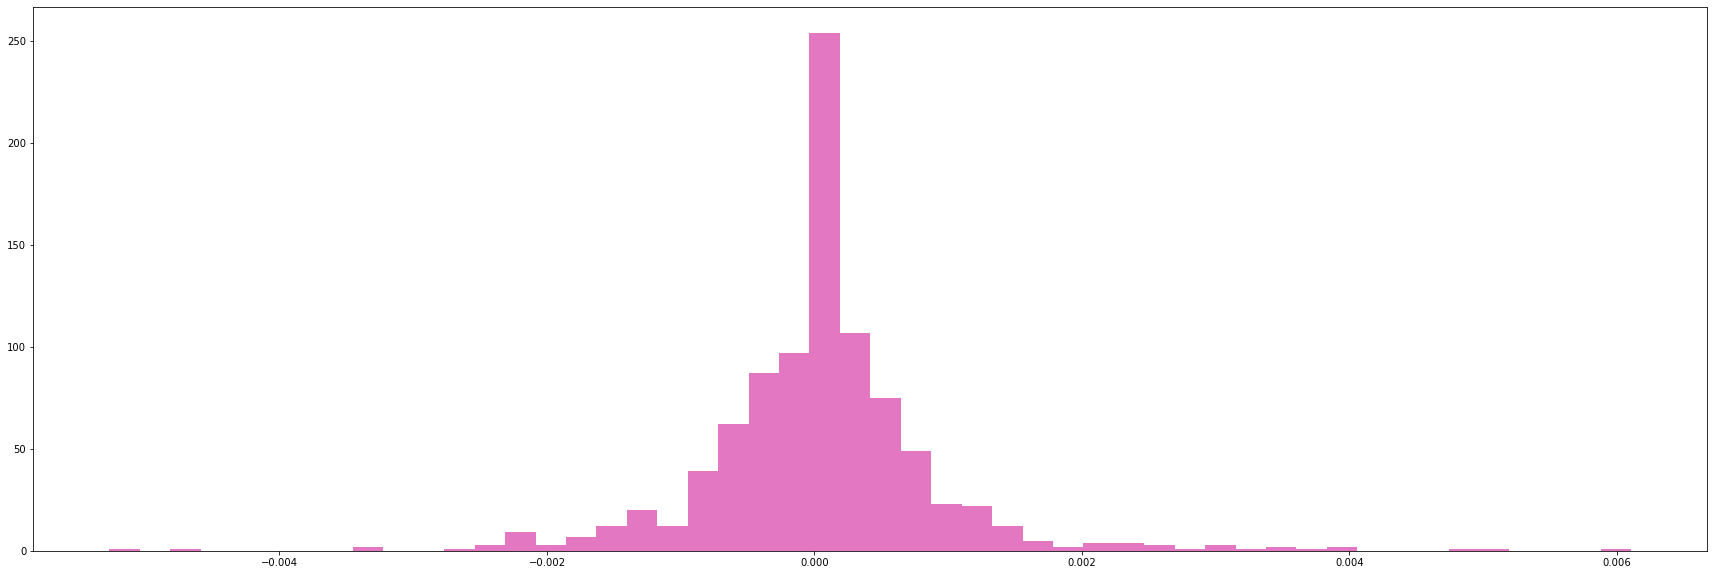

Ret_11


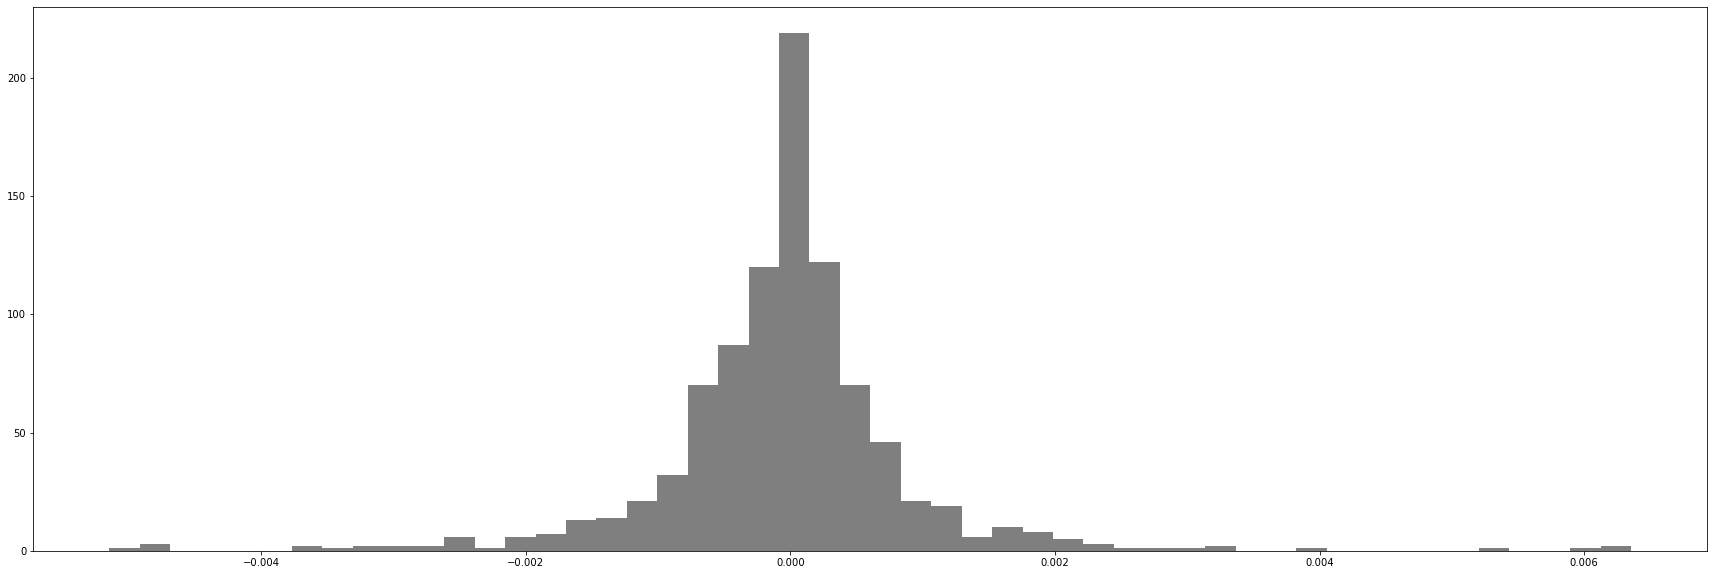

Ret_12


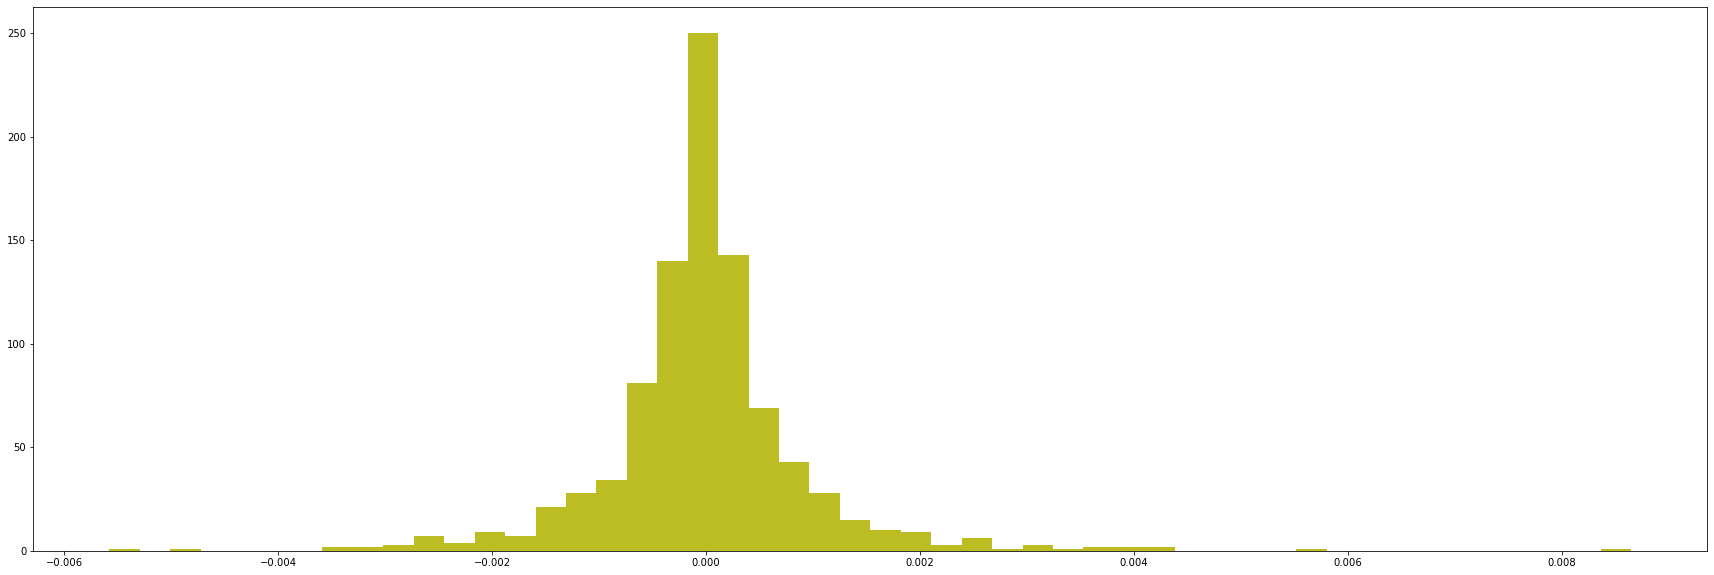

Ret_13


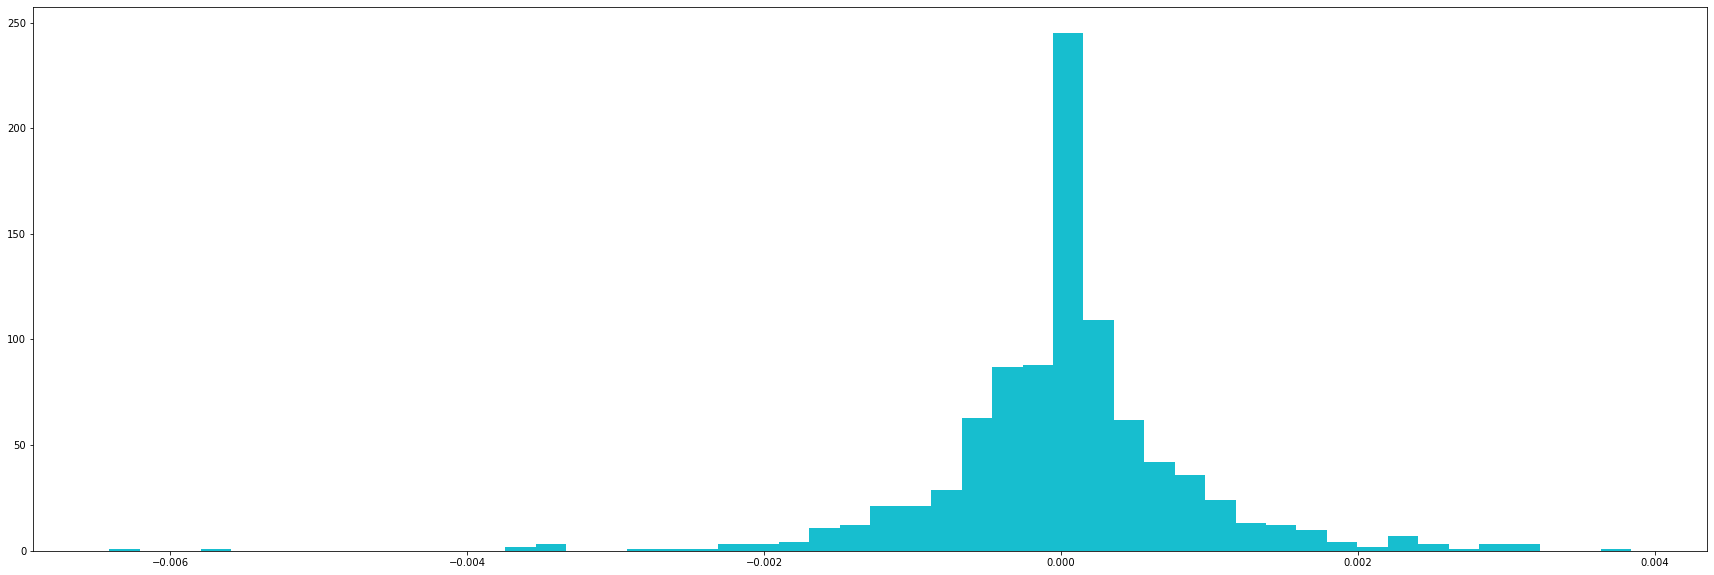

Ret_14


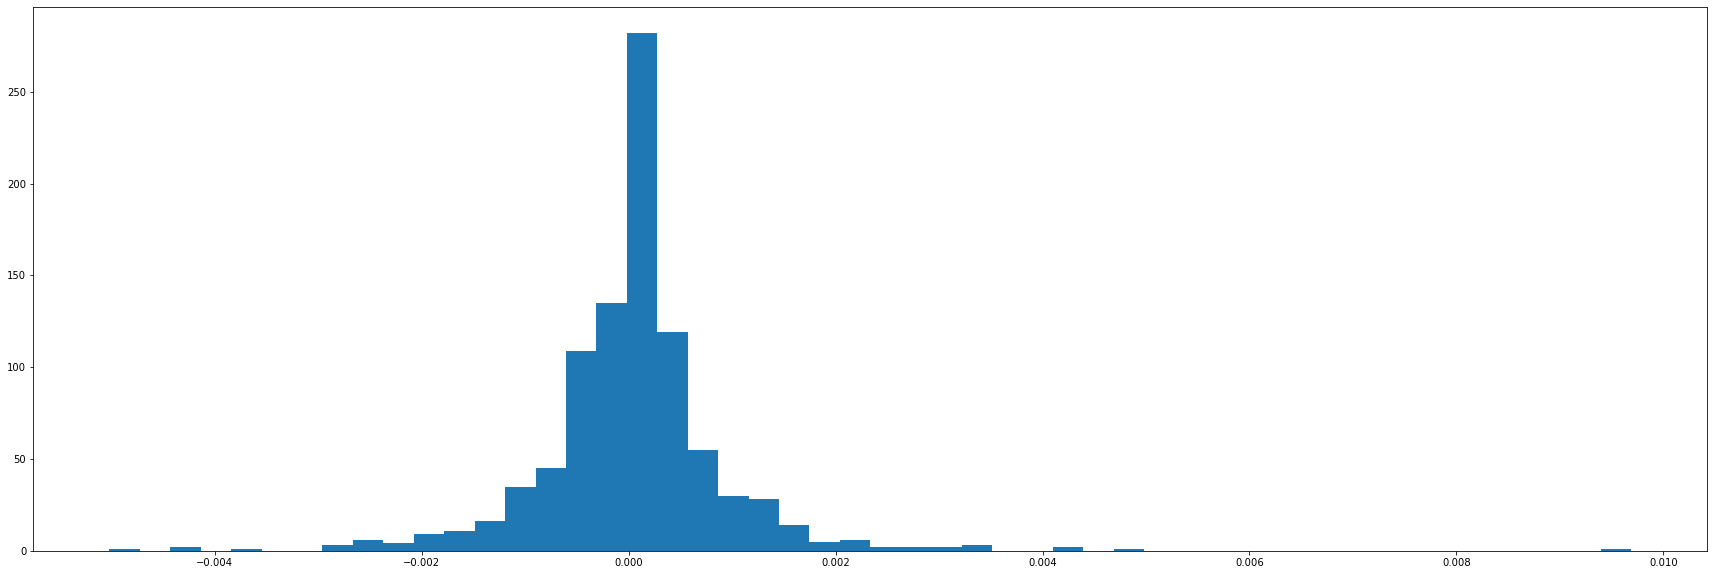

Ret_15


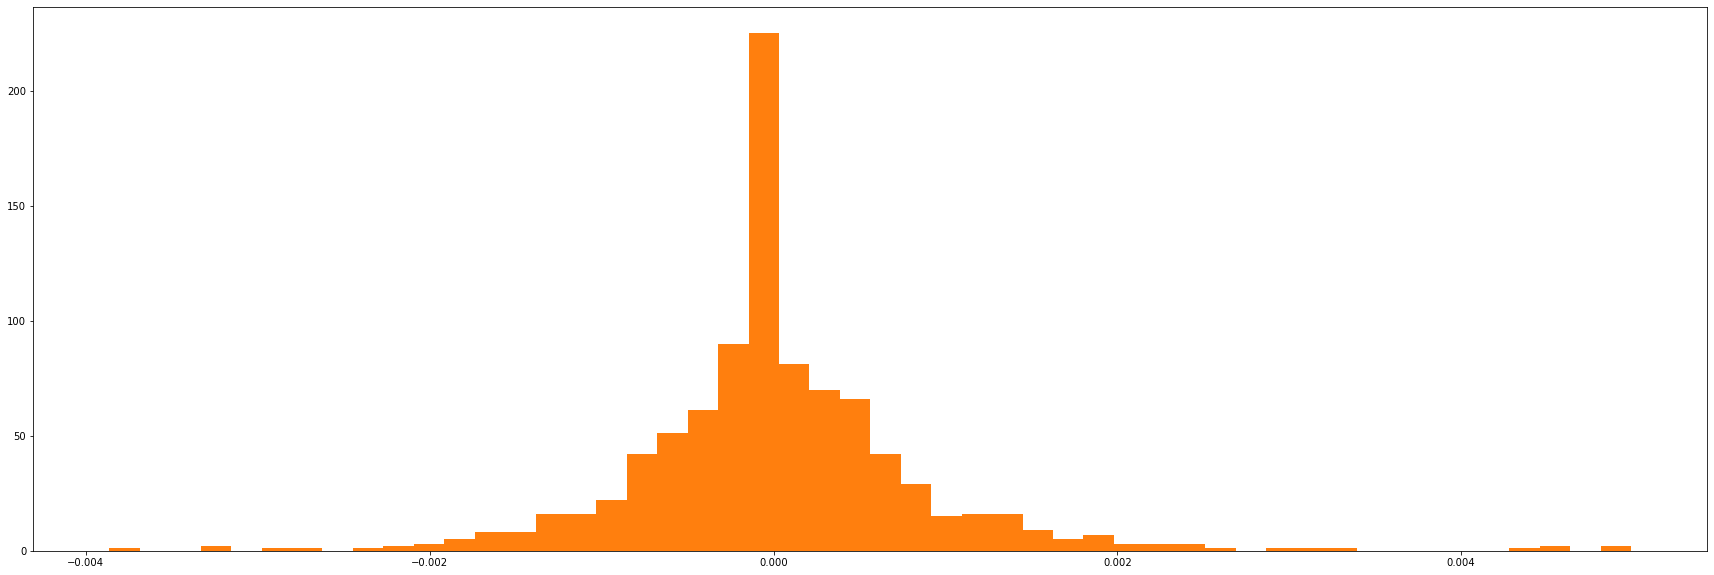

Ret_16


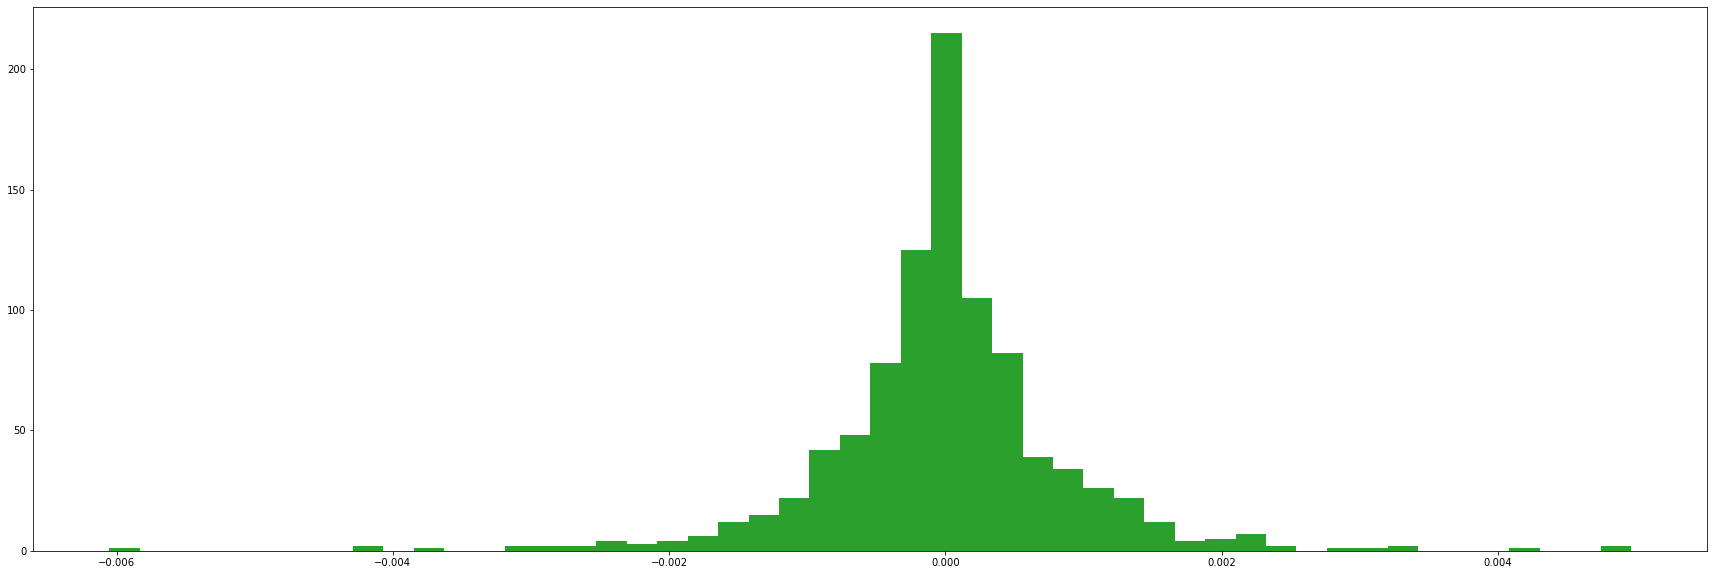

Ret_17


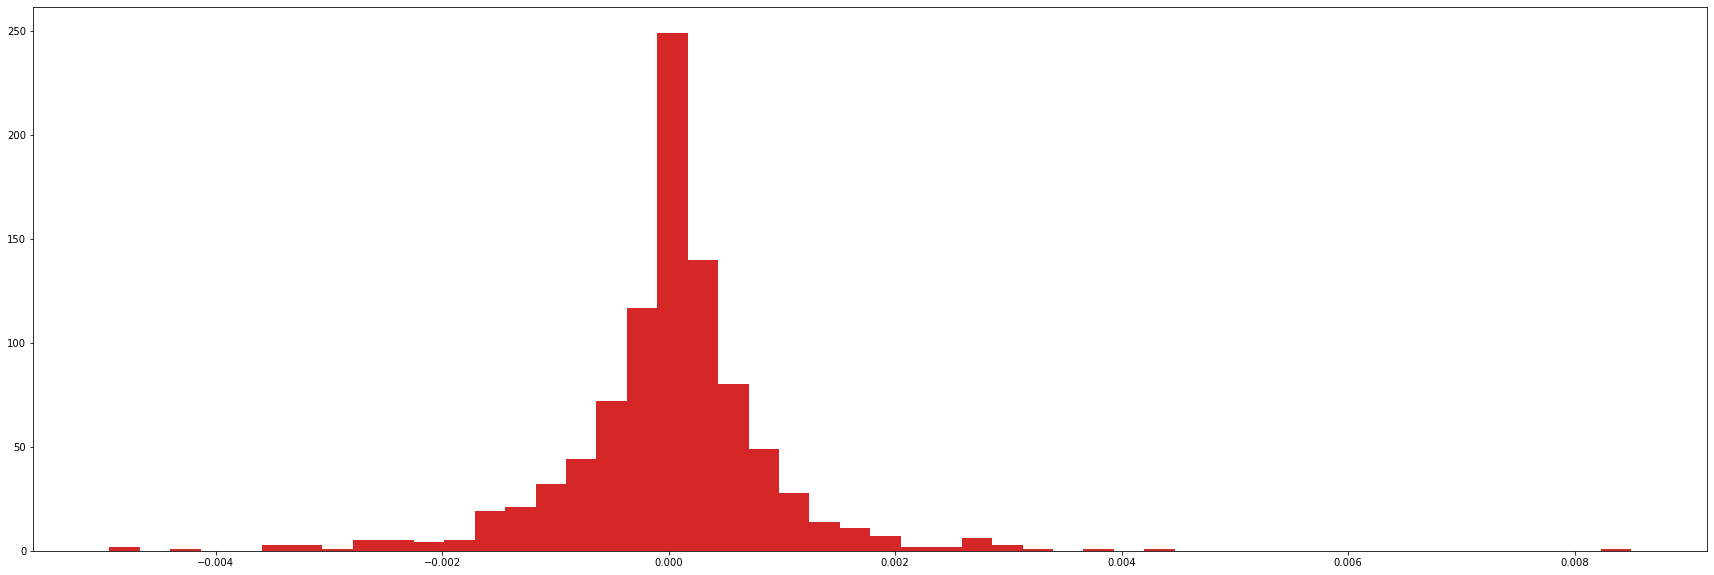

Ret_18


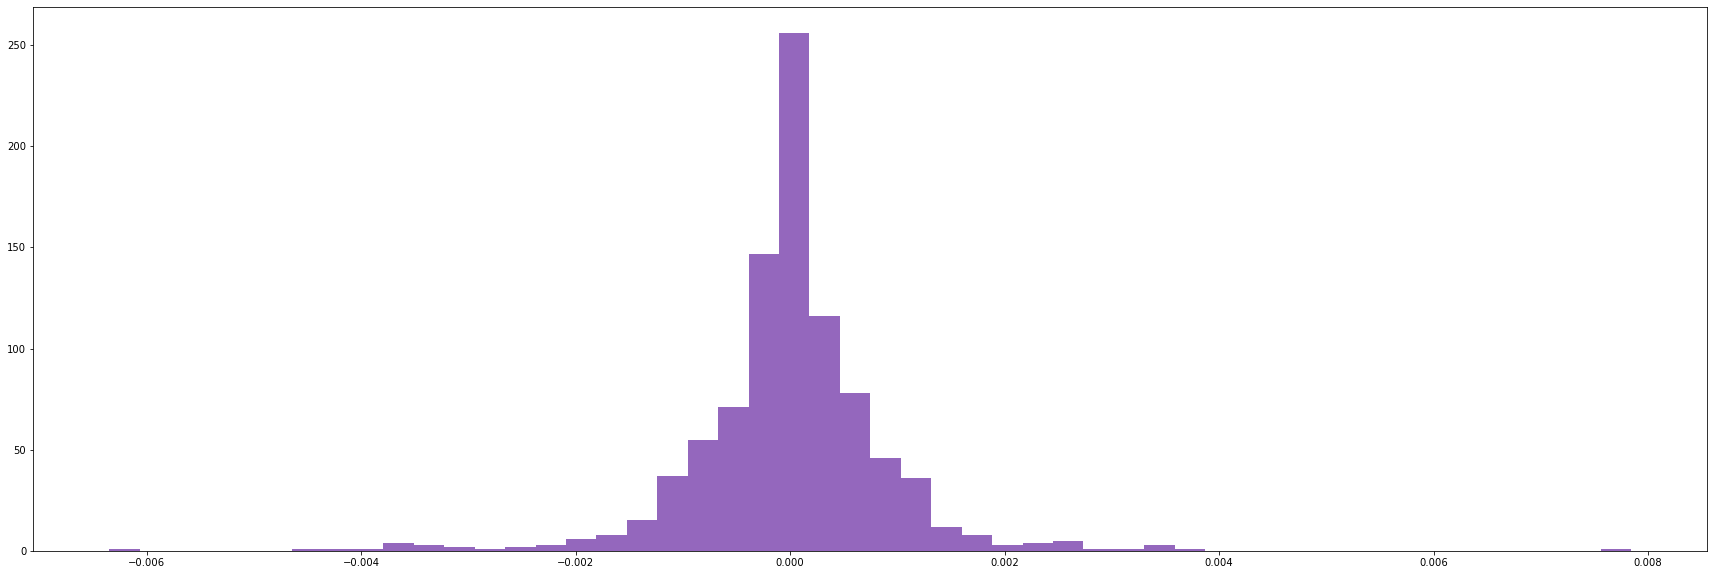

Ret_19


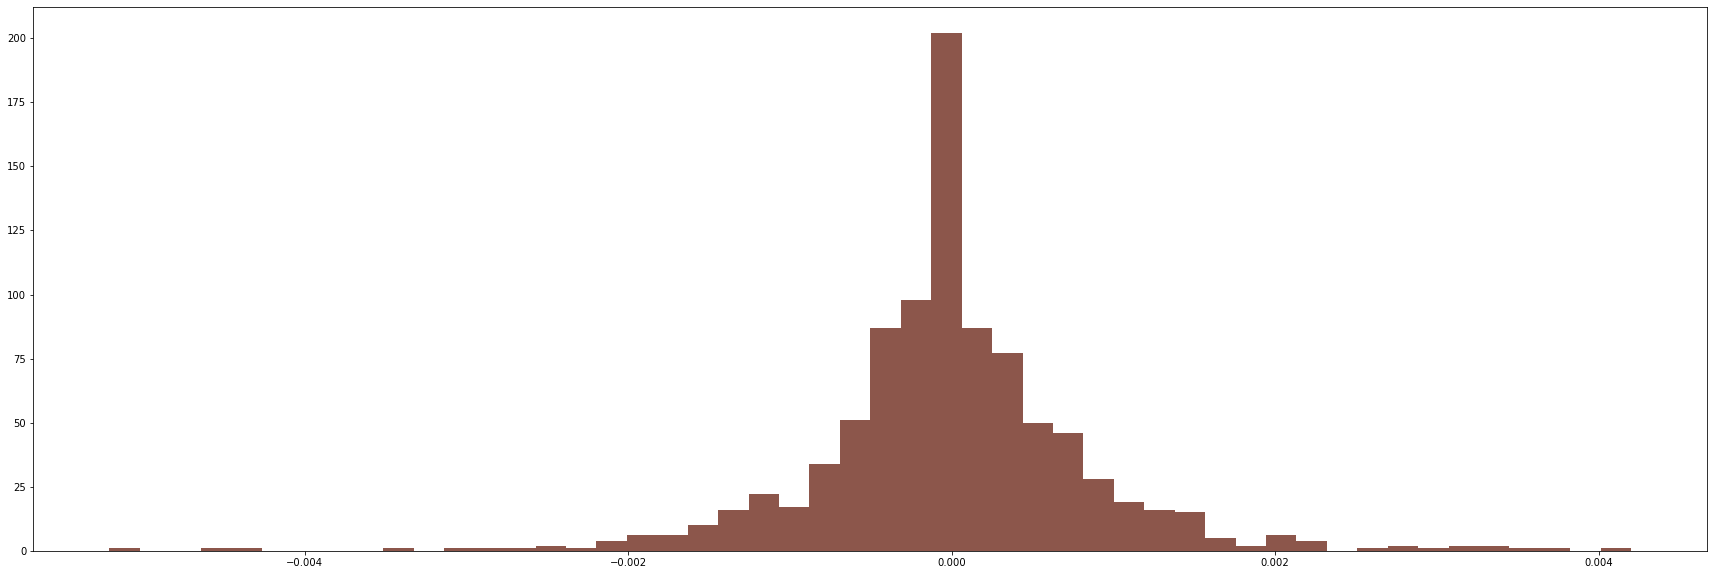

Ret_20


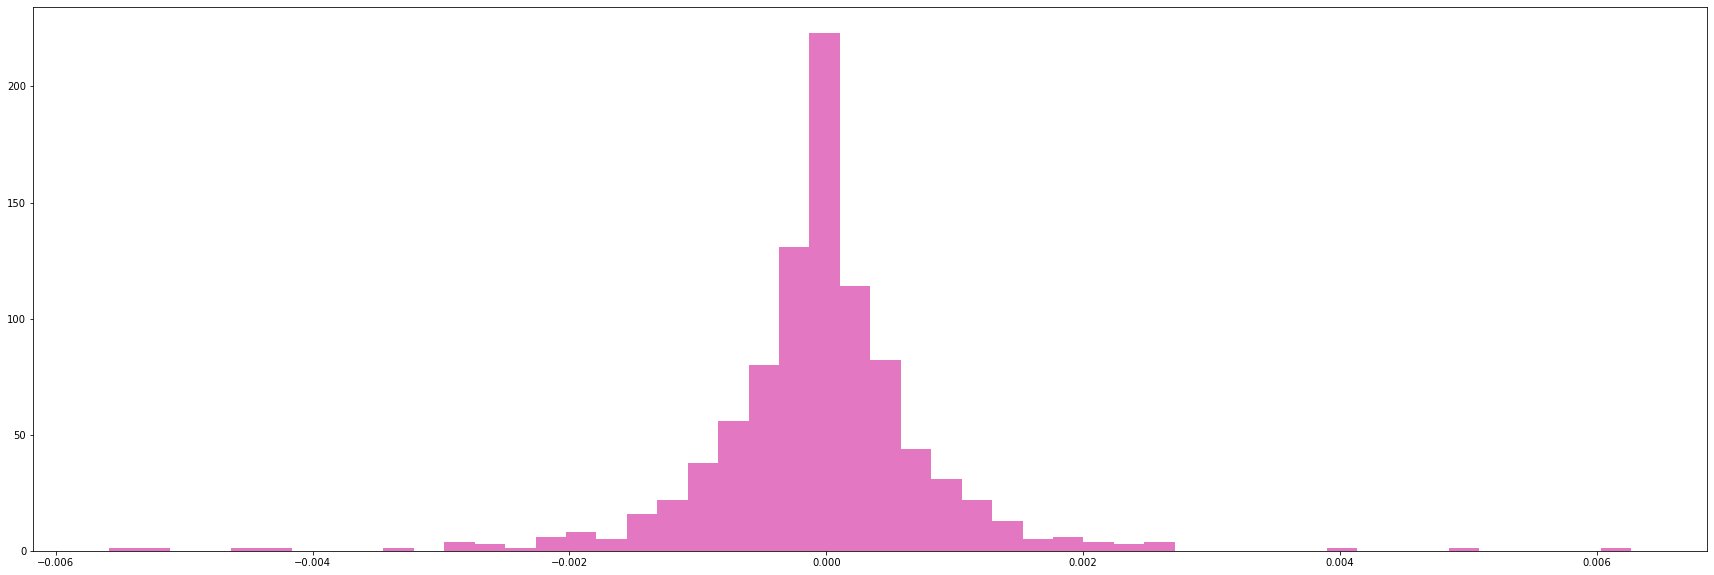

Ret_21


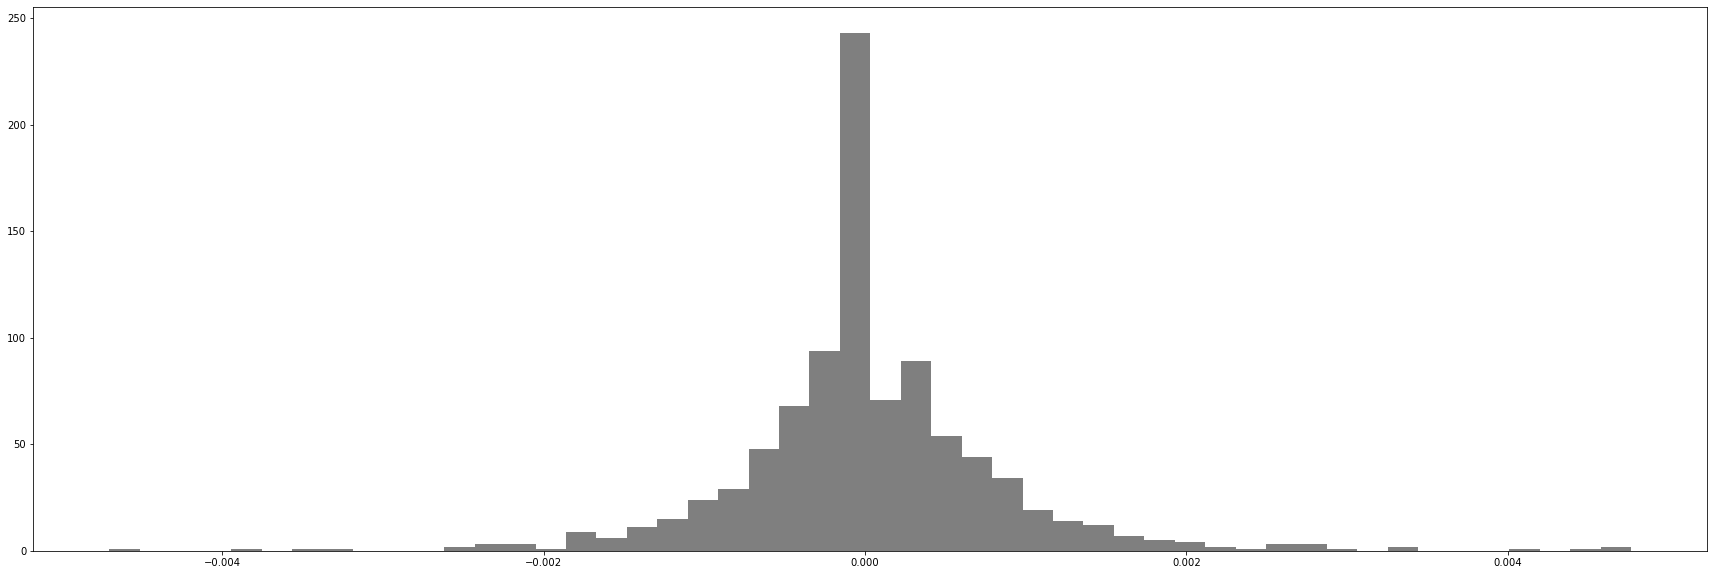

Ret_22


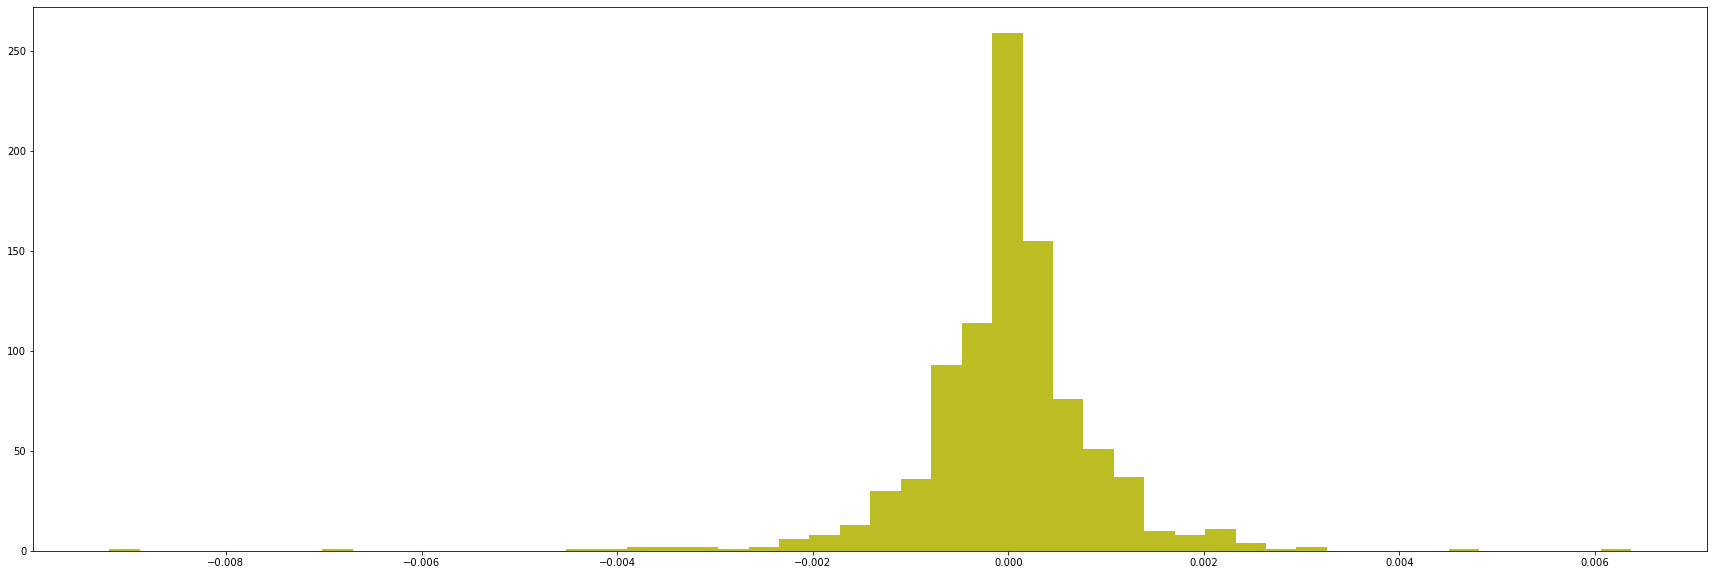

Ret_23


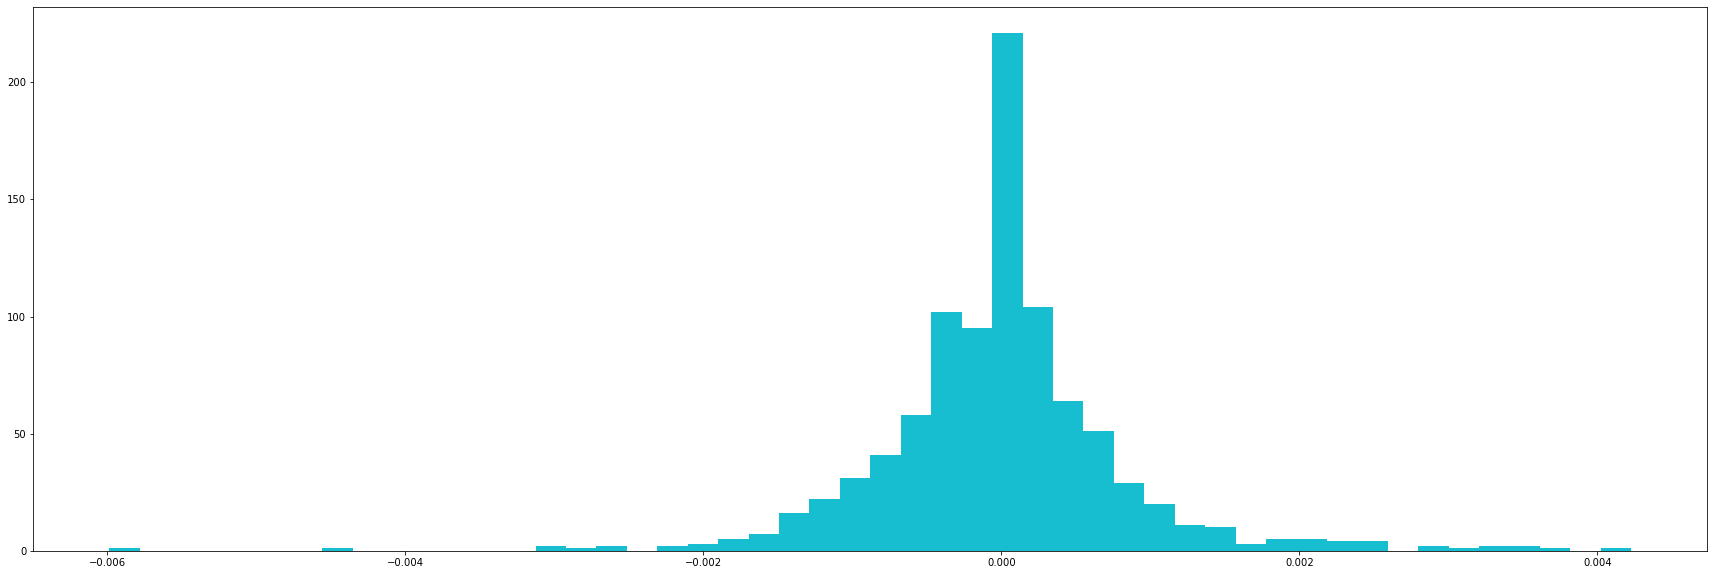

Ret_24


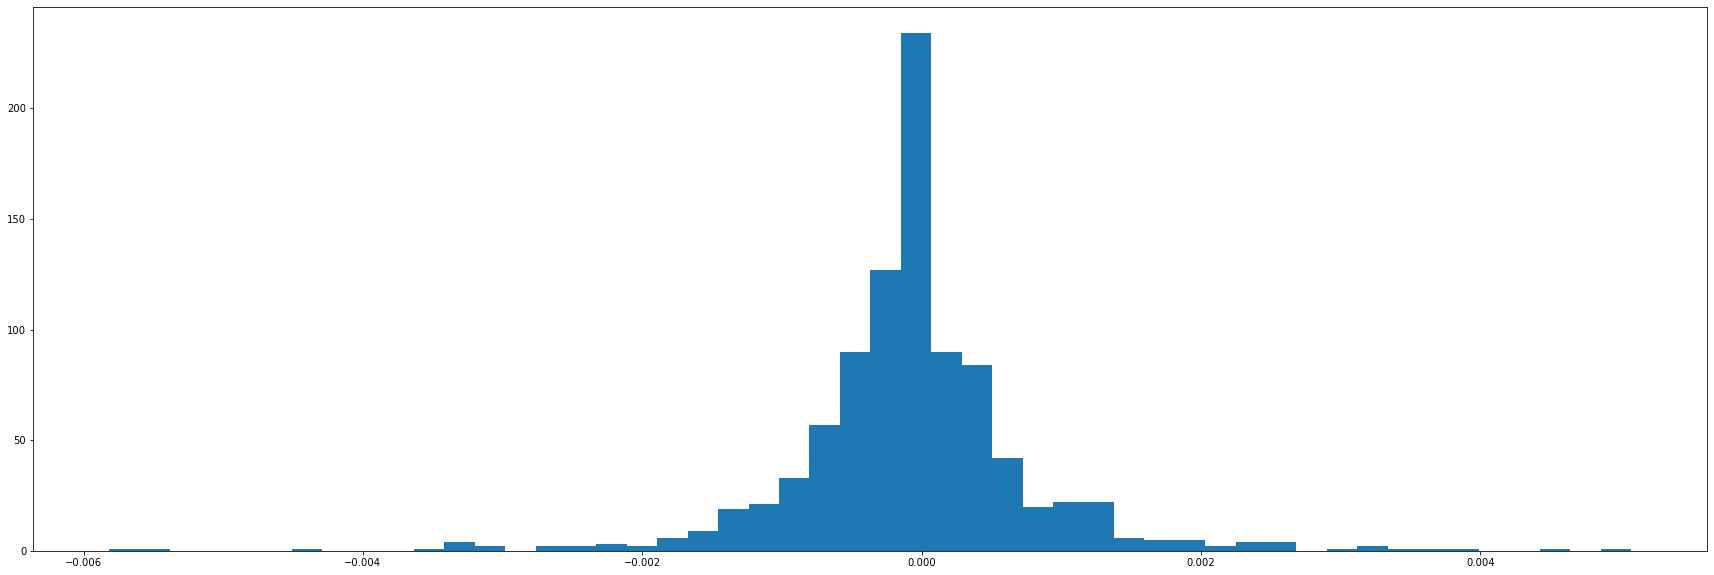

Ret_25


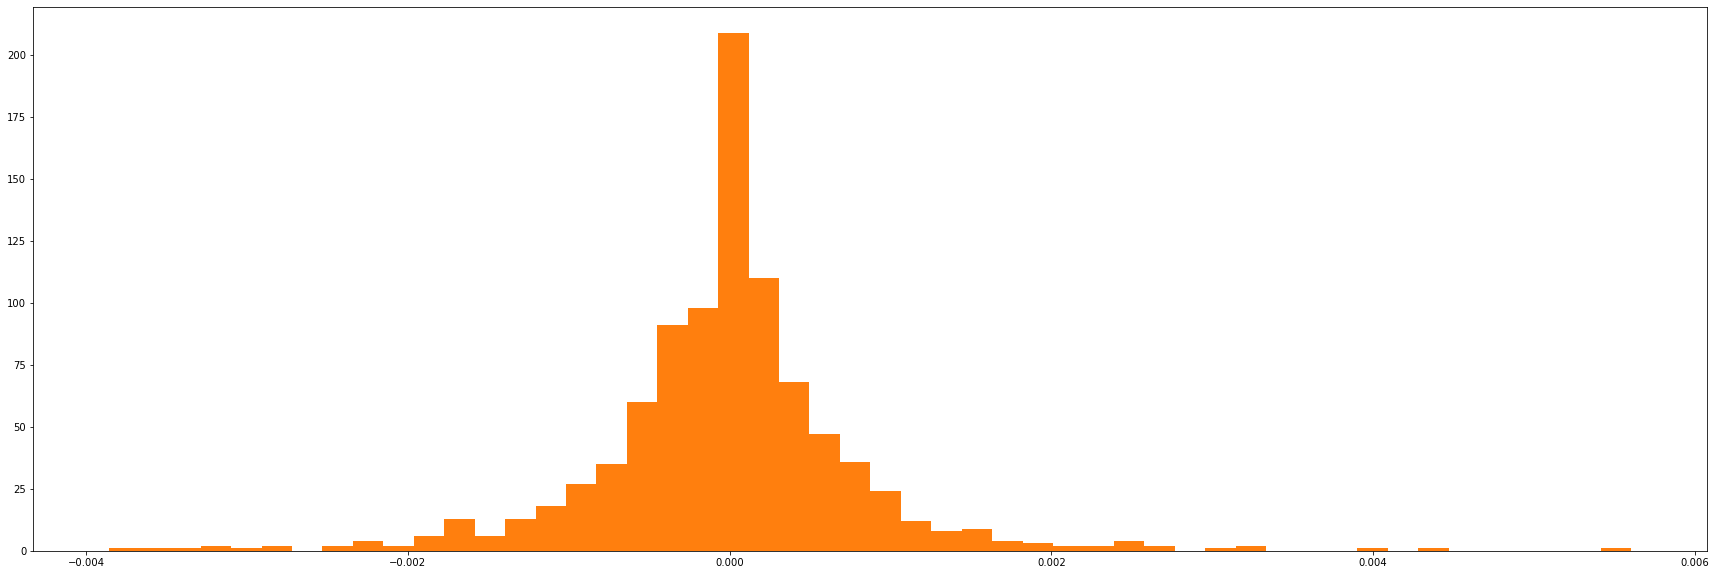

Ret_26


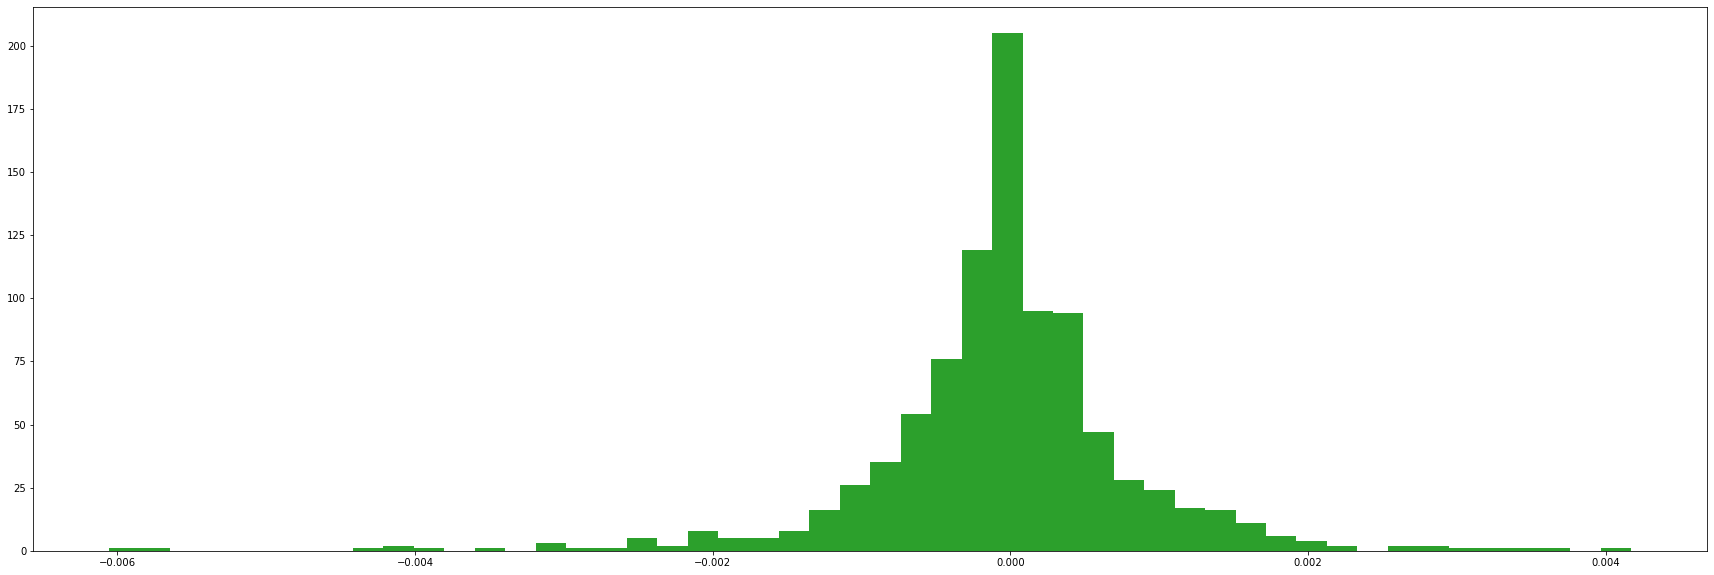

Ret_27


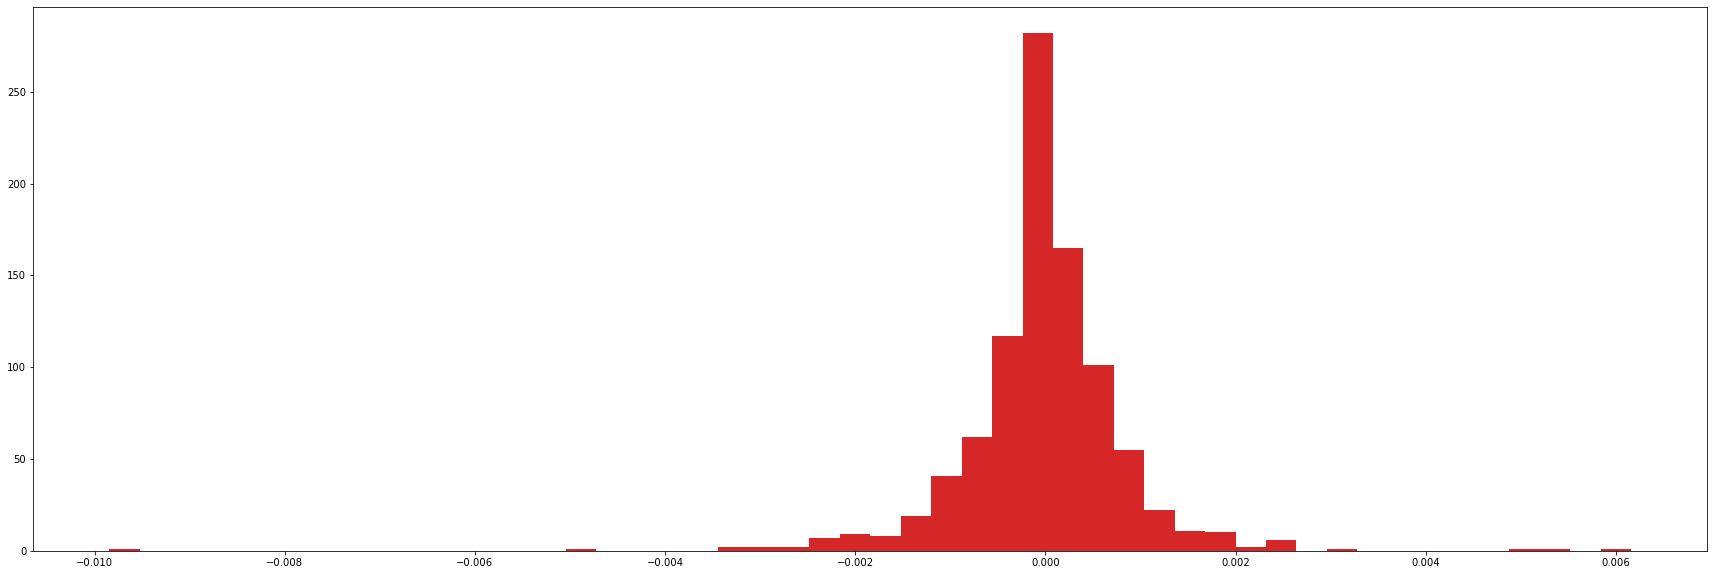

Ret_28


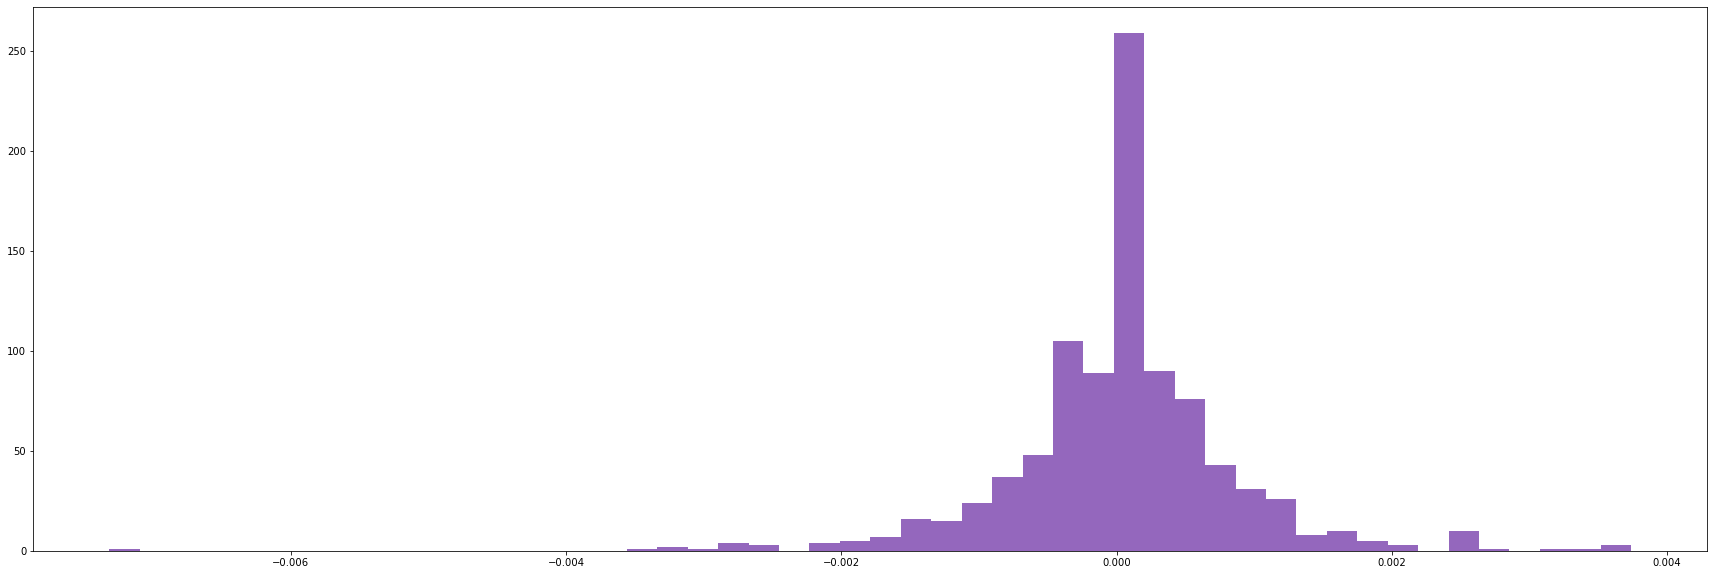

Ret_29


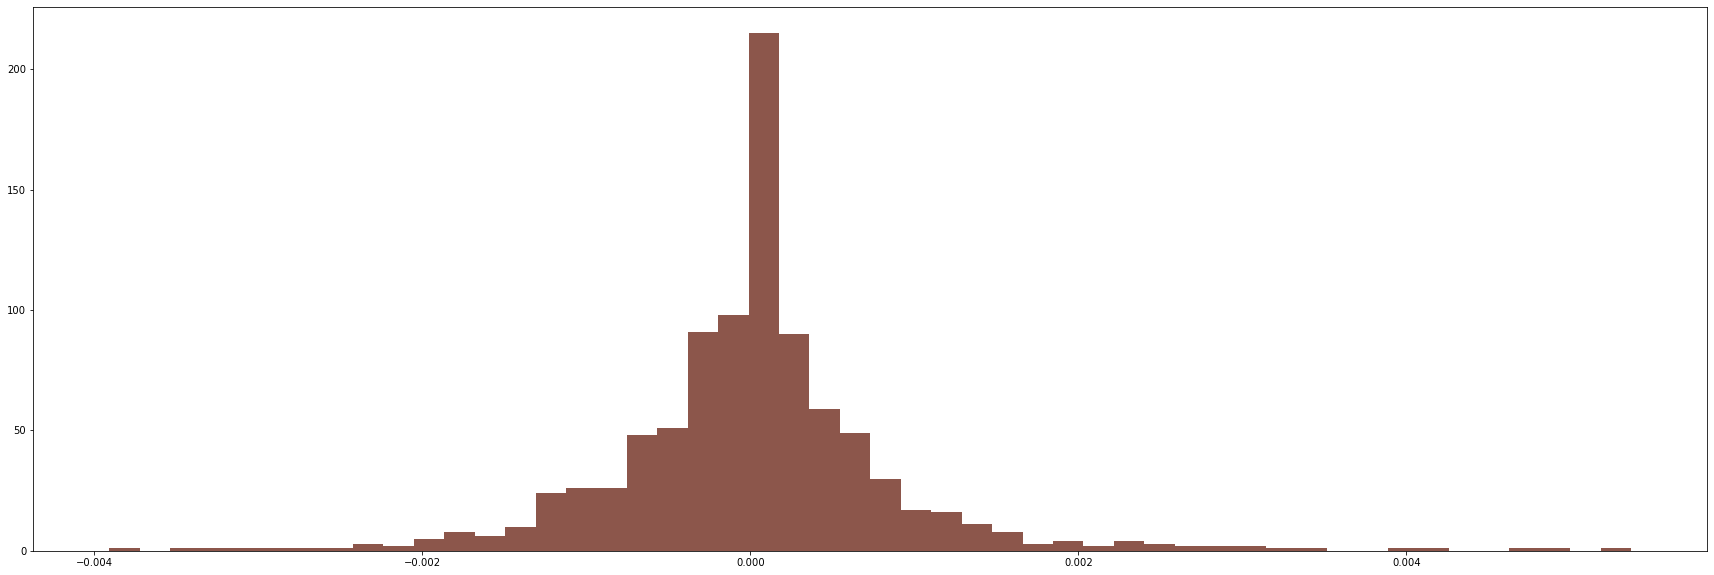

Ret_30


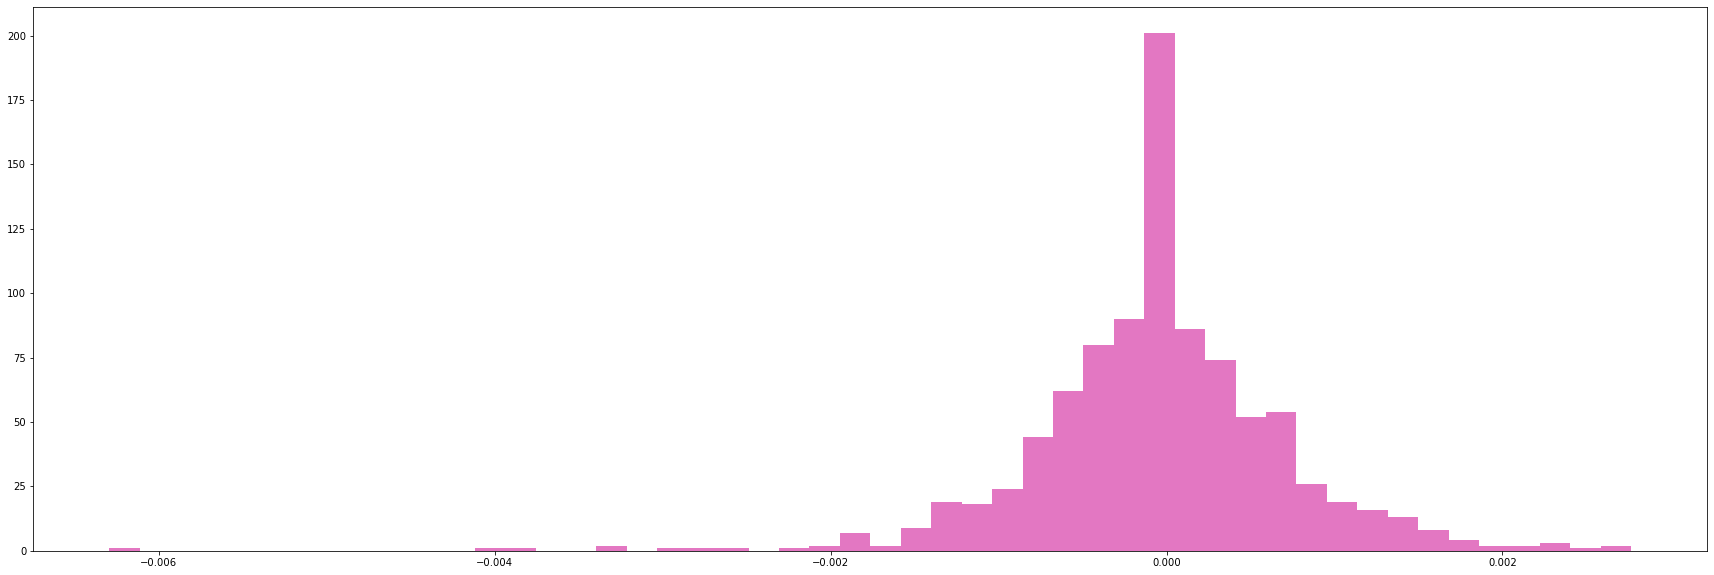

Ret_31


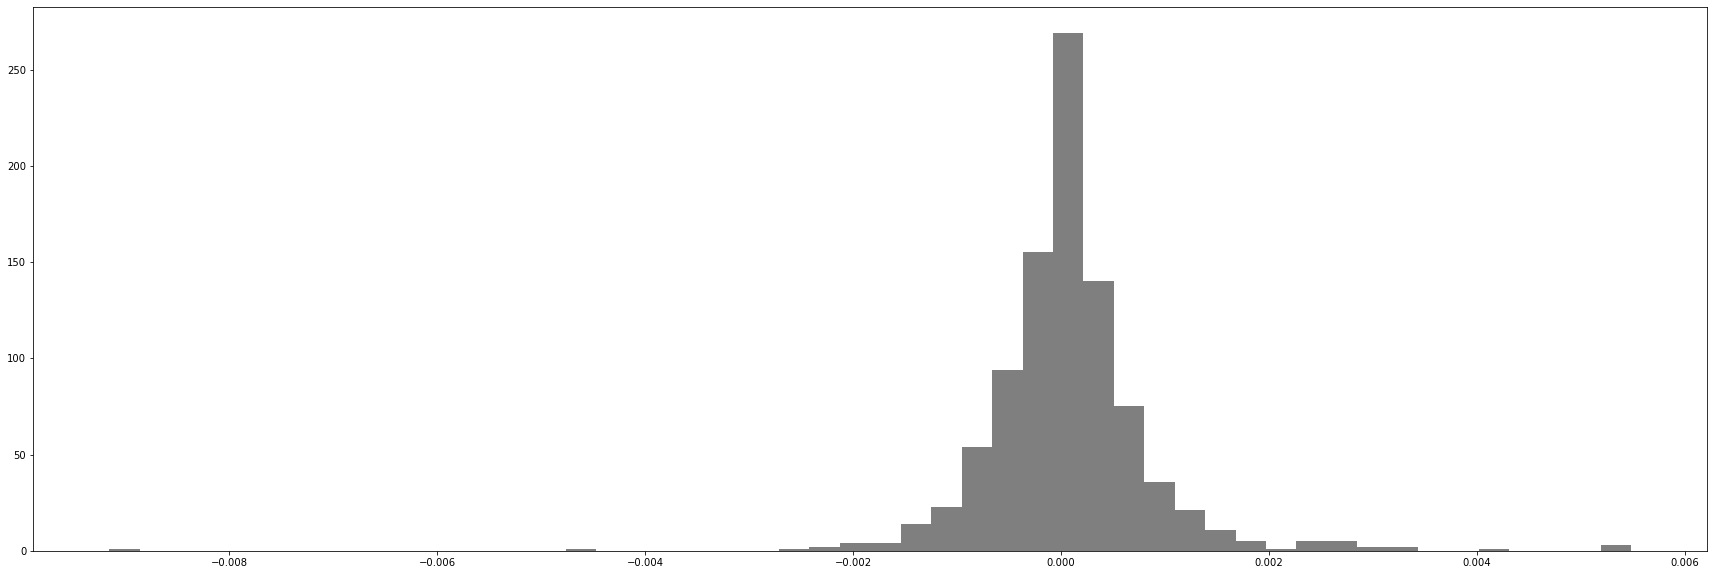

Ret_32


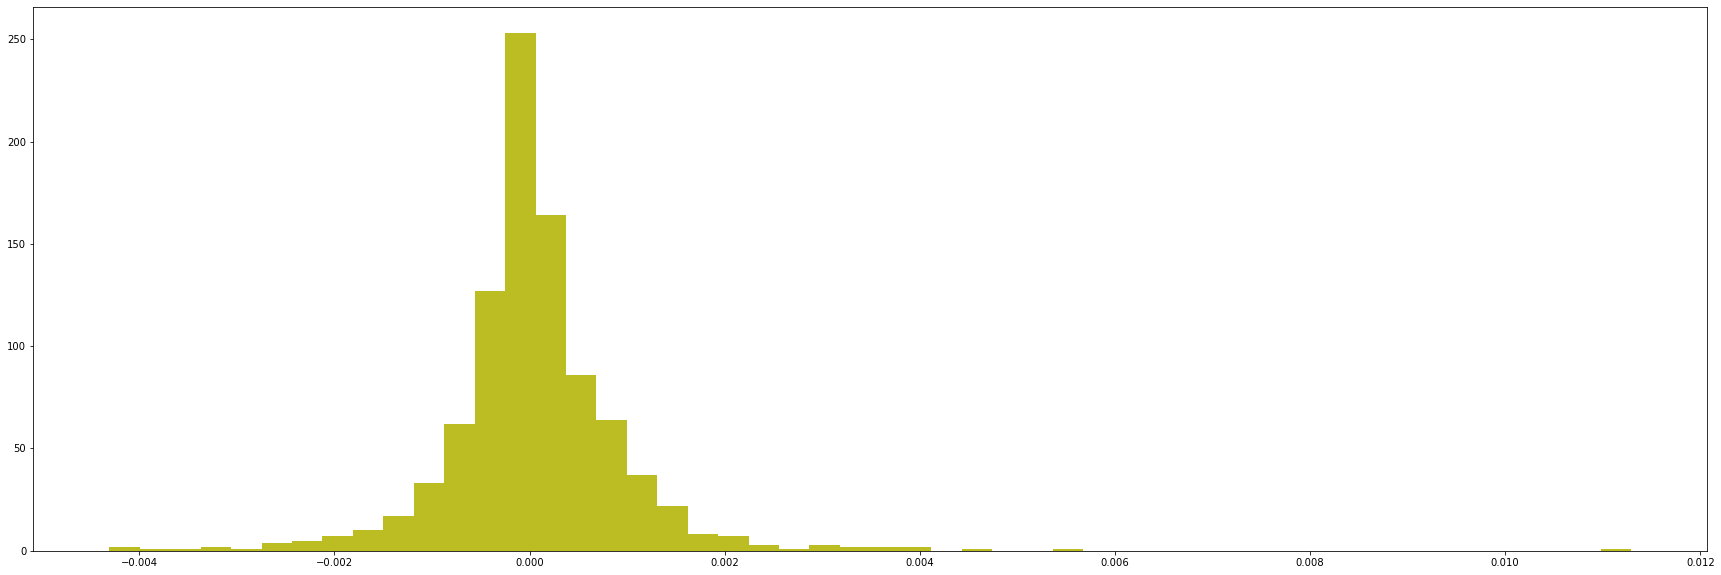

Ret_33


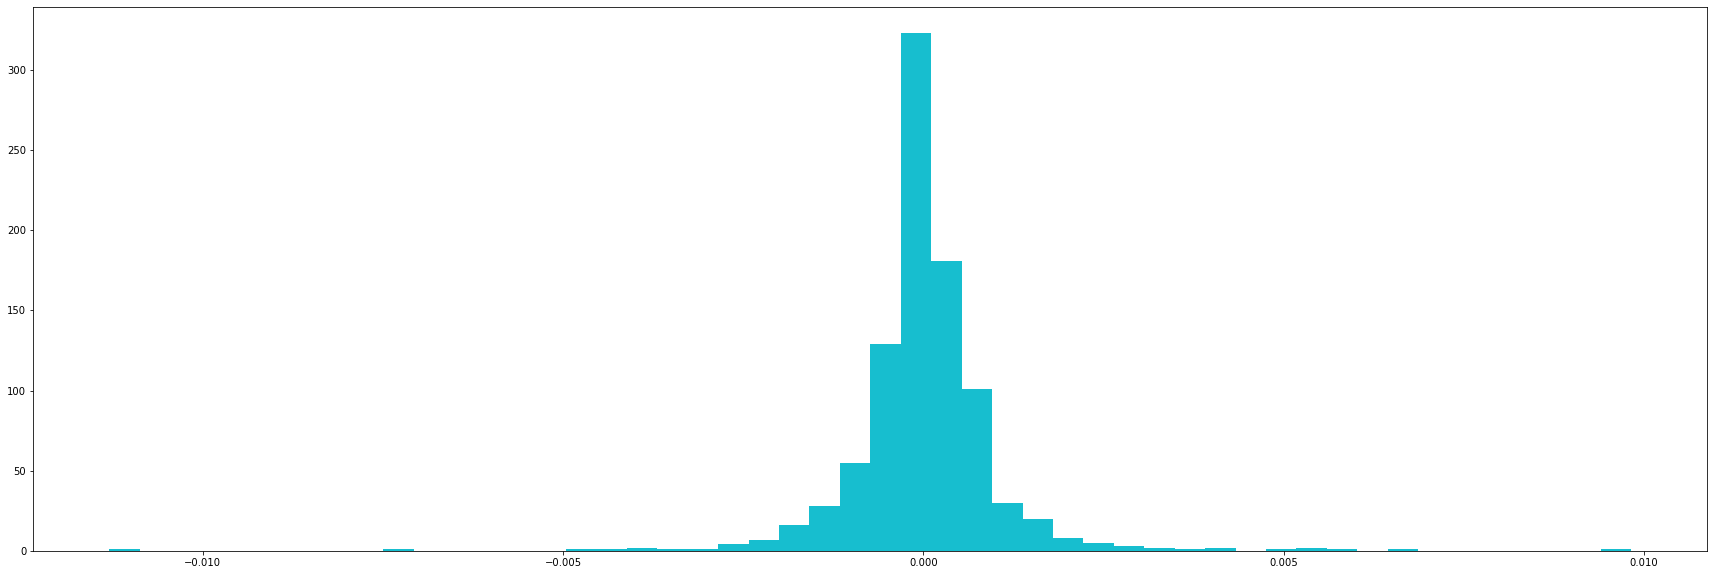

Ret_34


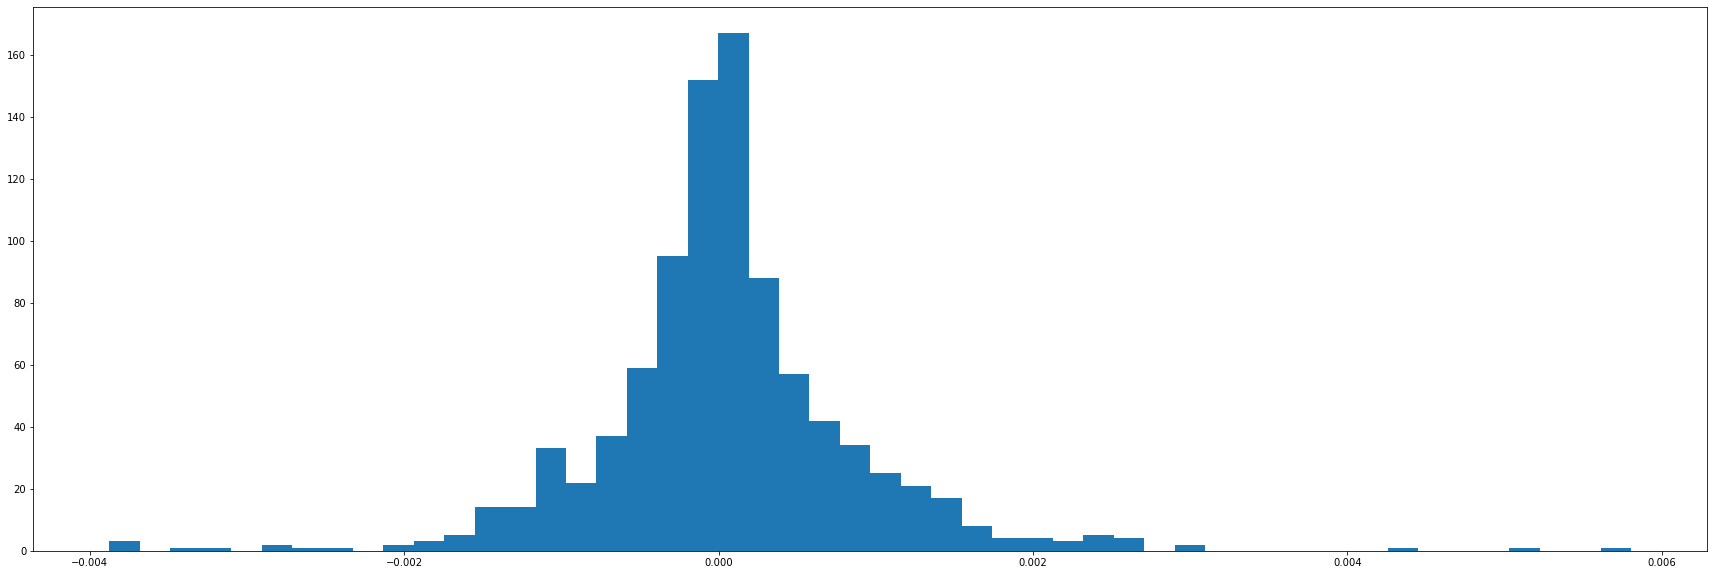

Ret_35


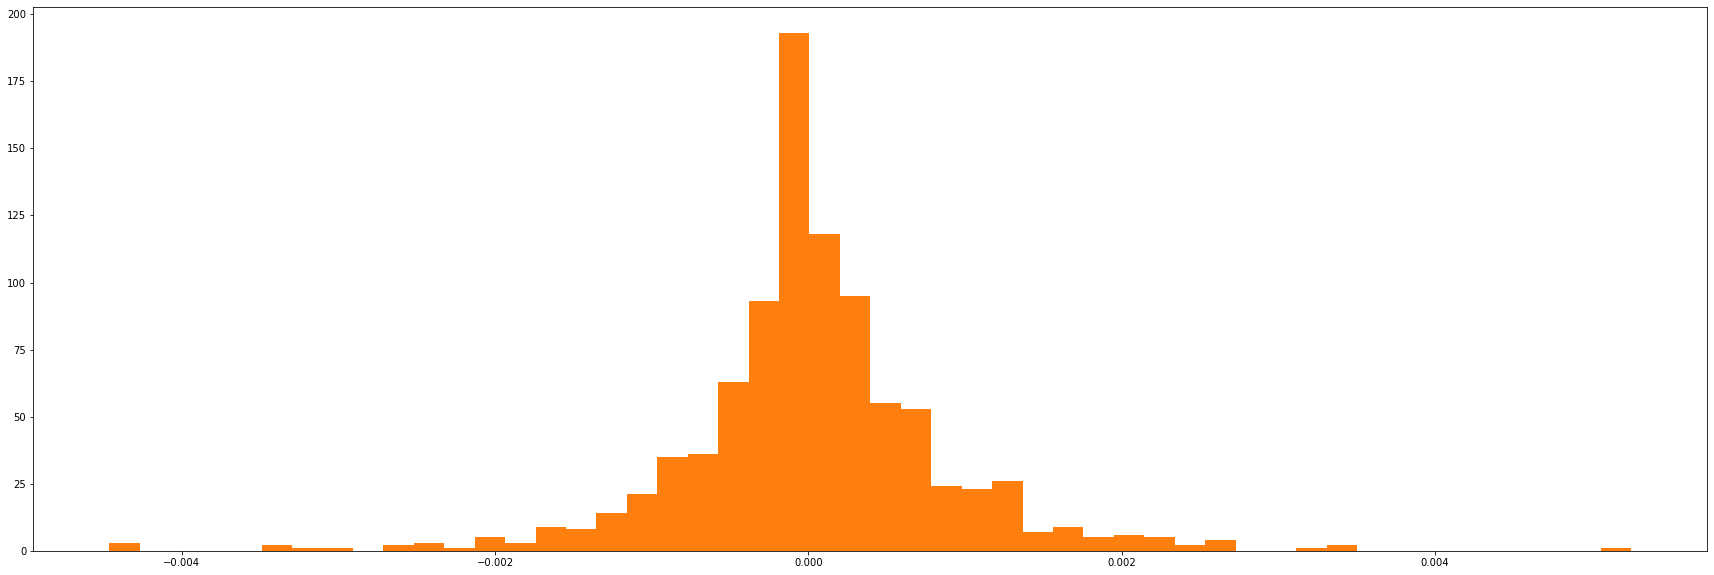

Ret_36


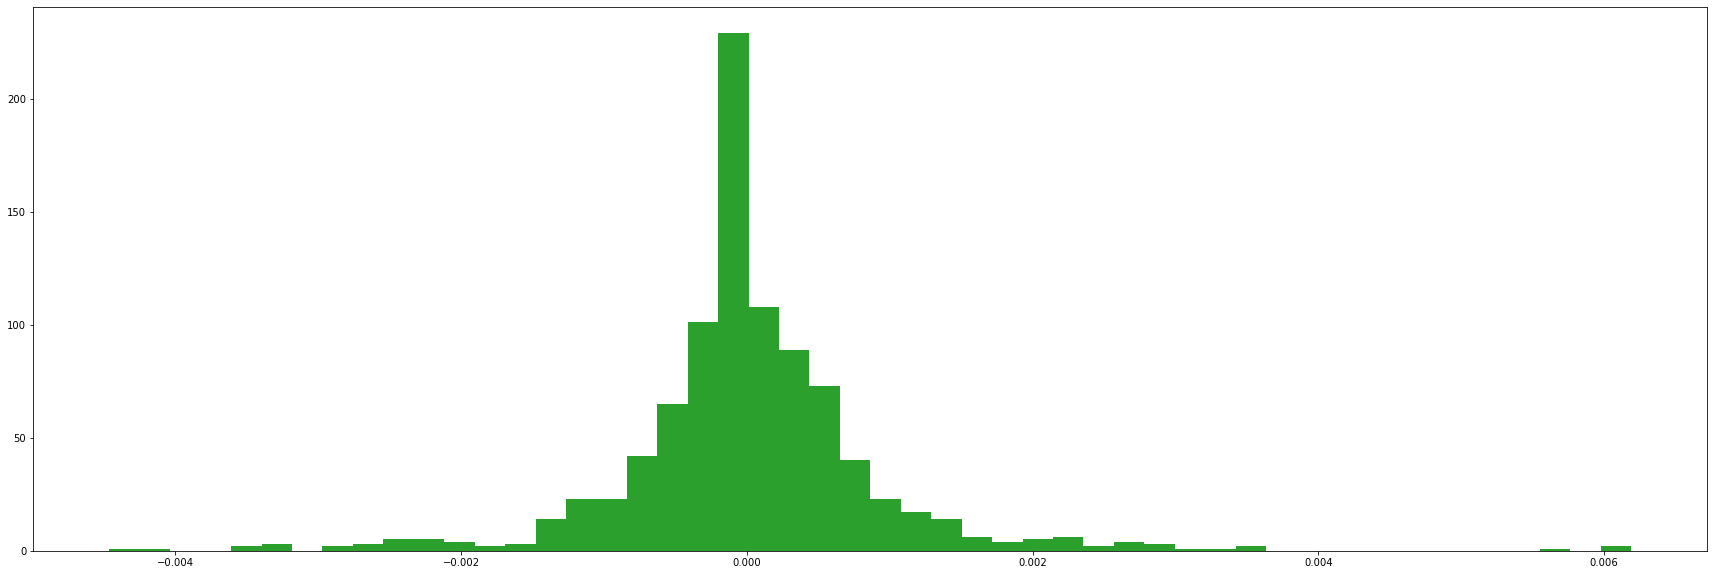

Ret_37


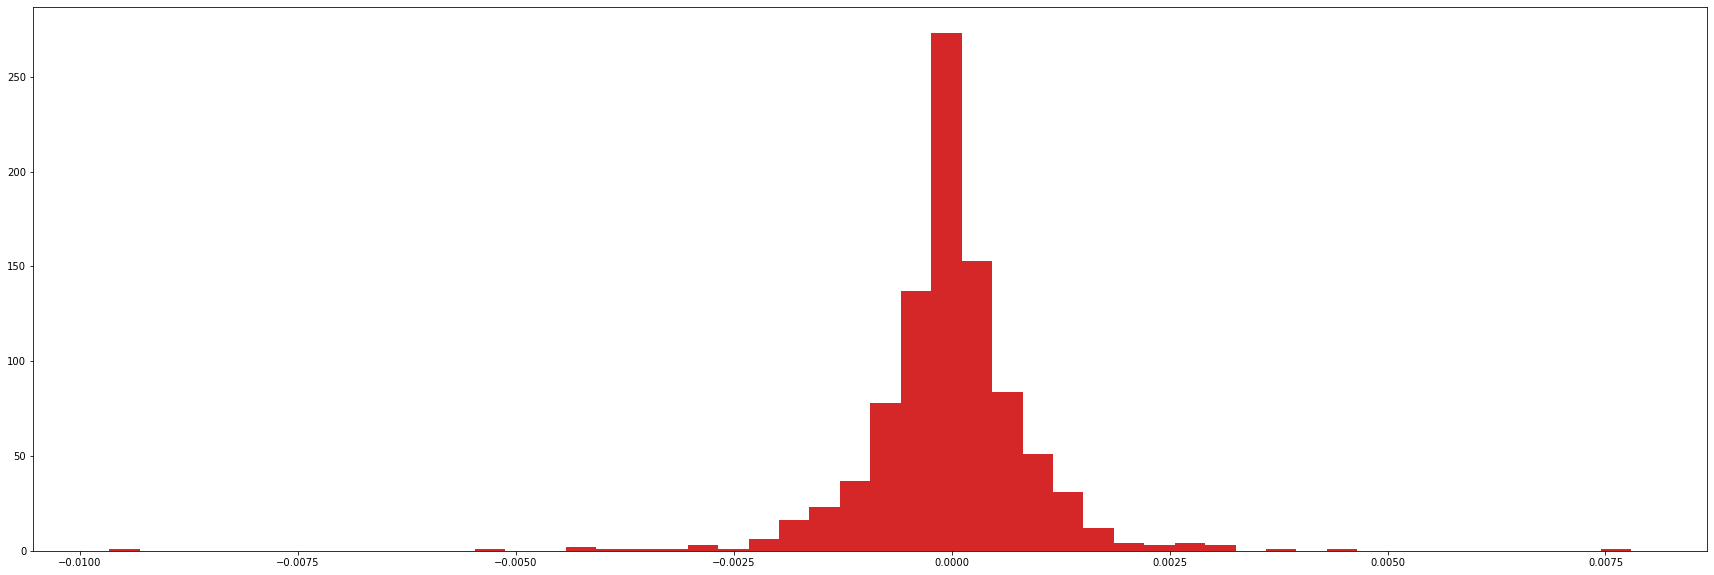

Ret_38


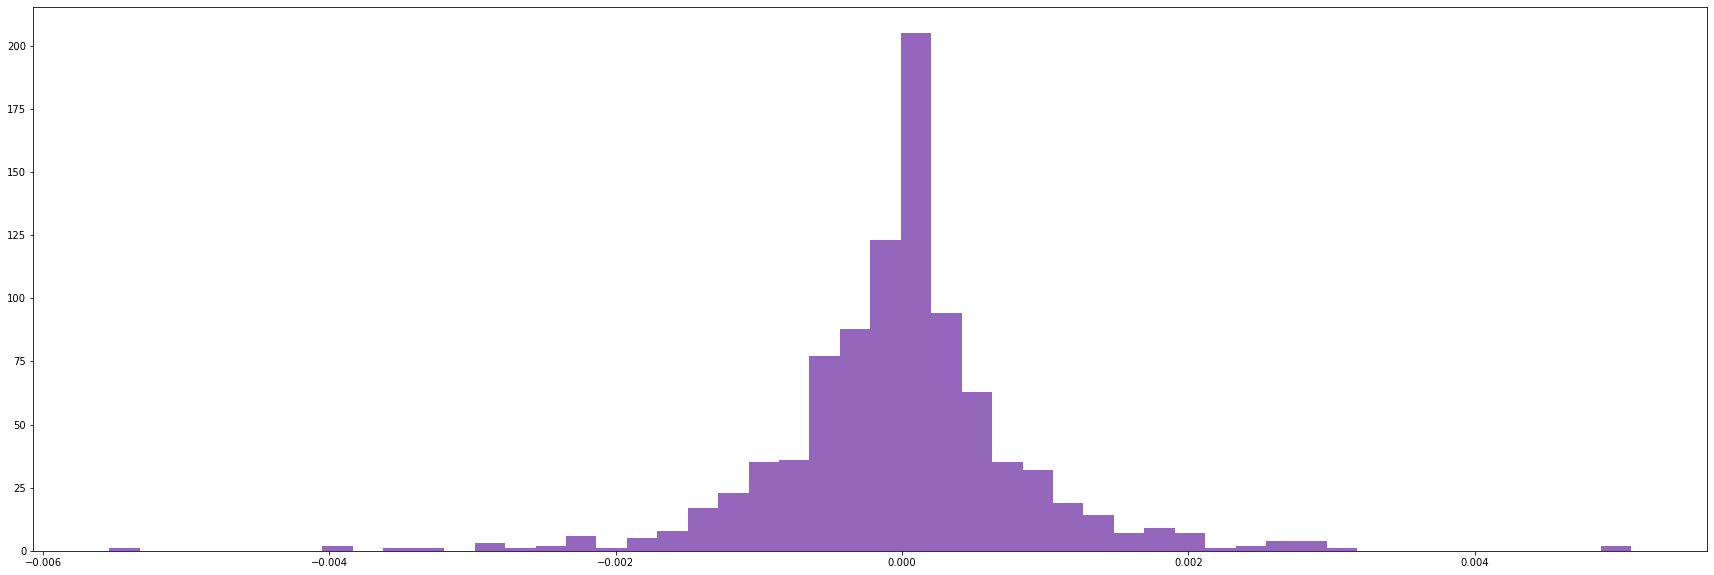

Ret_39


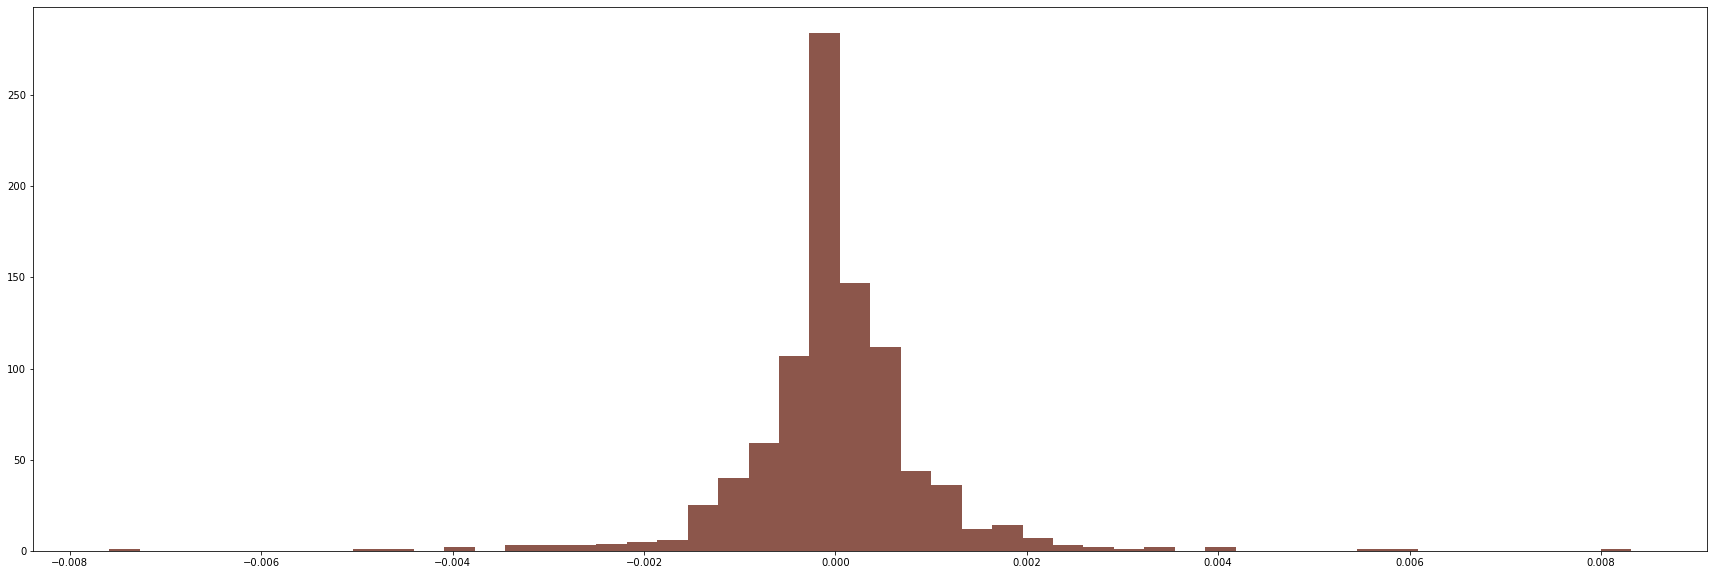

Ret_40


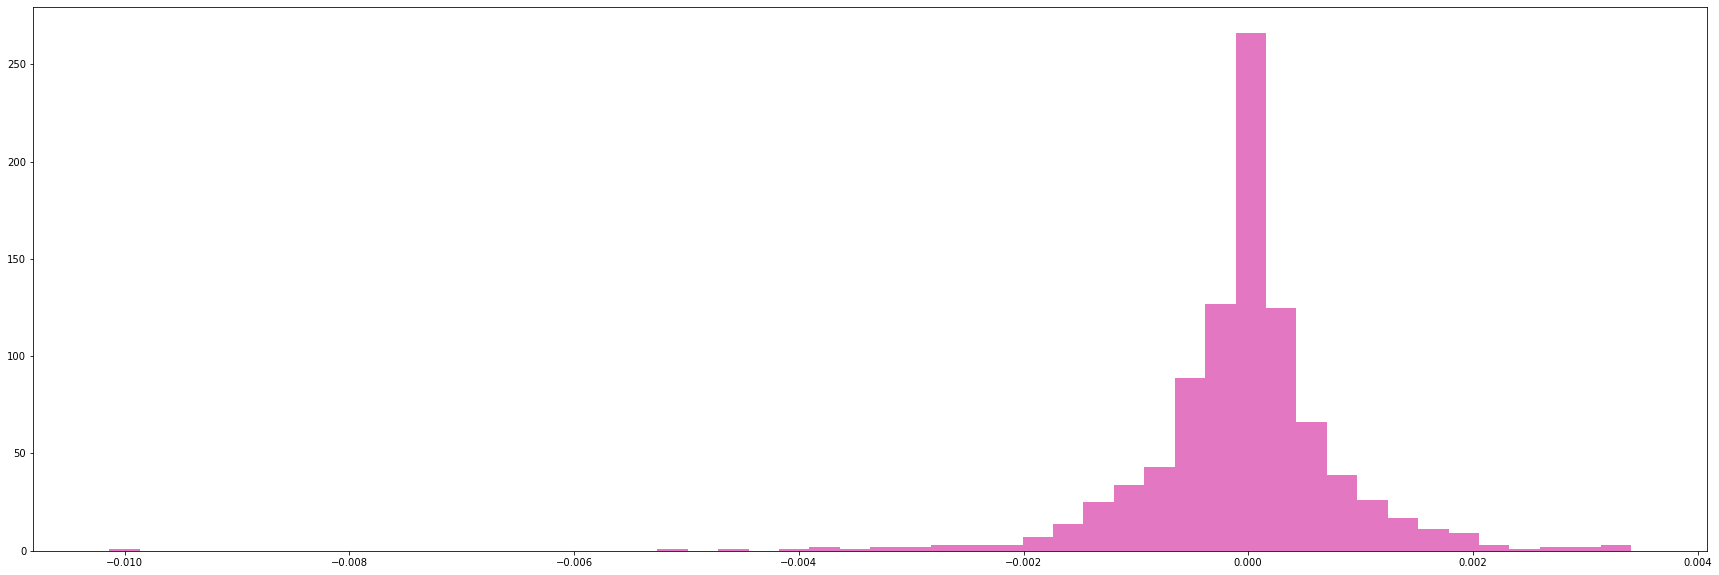

Ret_41


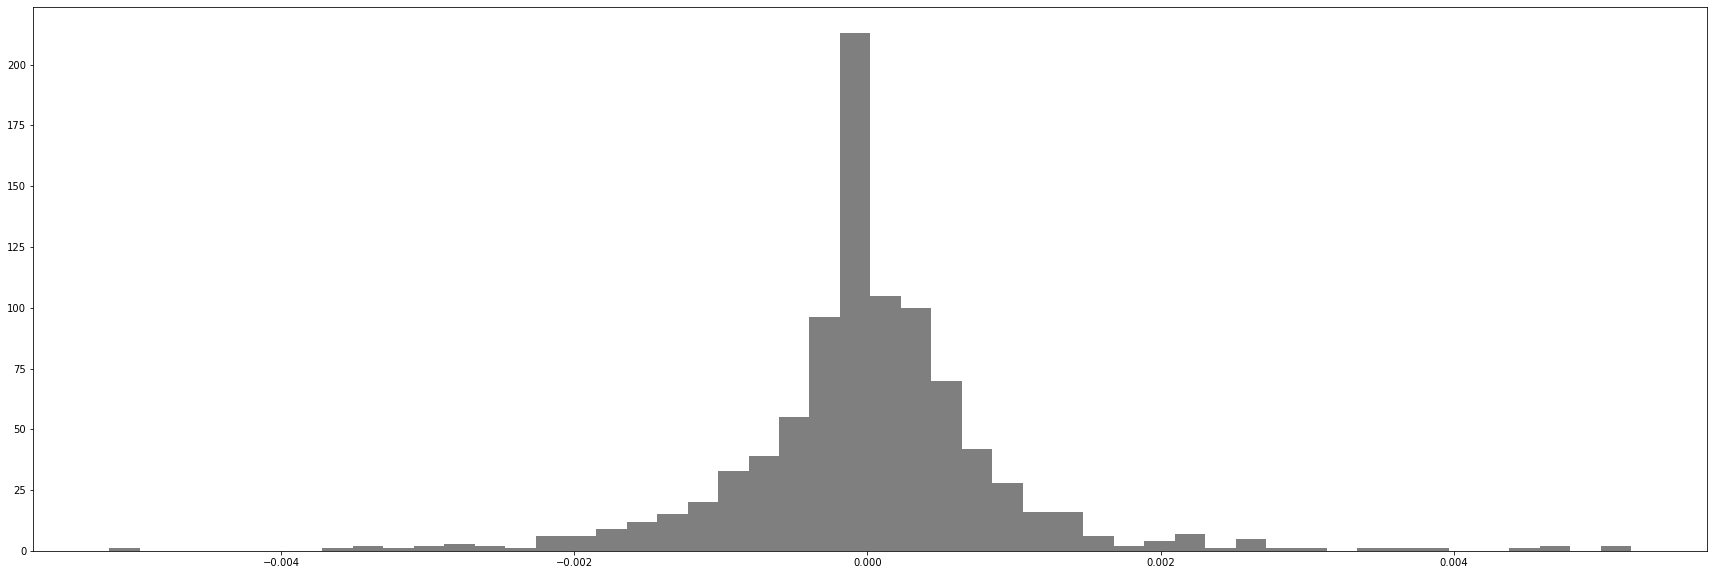

Ret_42


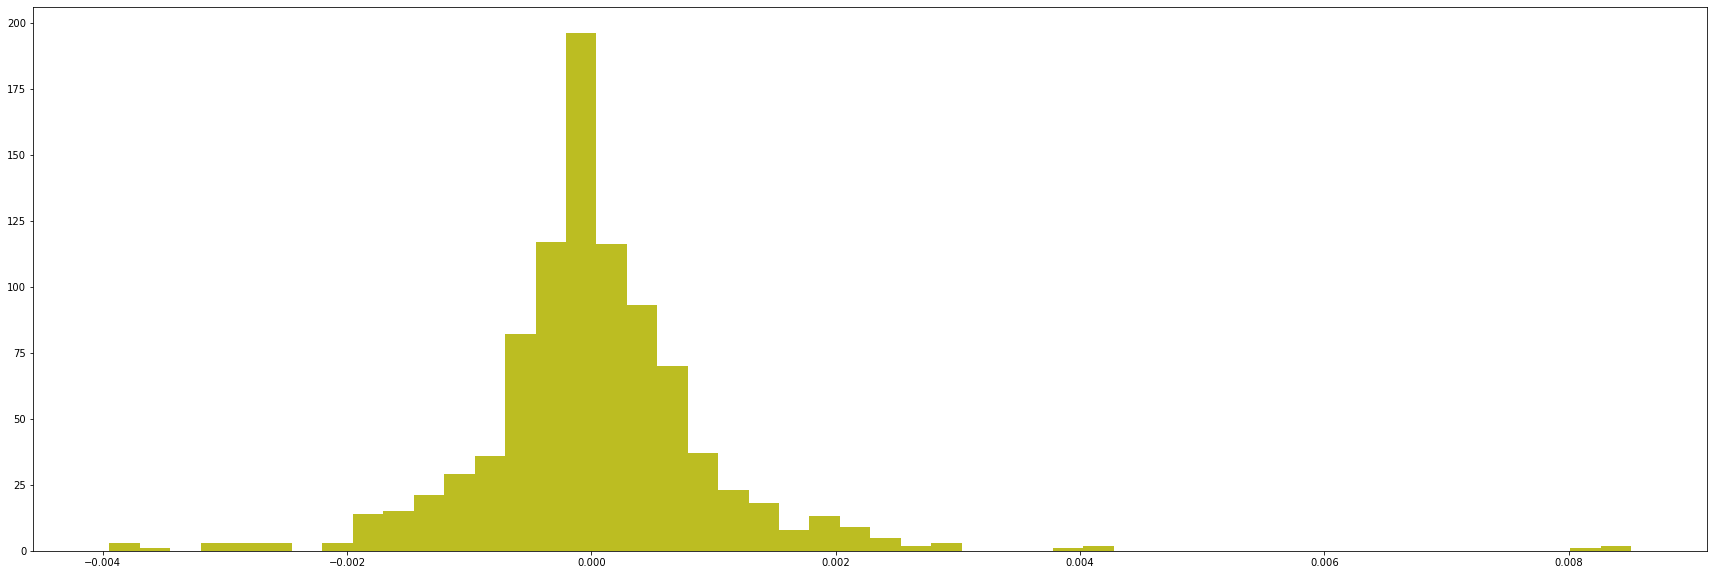

Ret_43


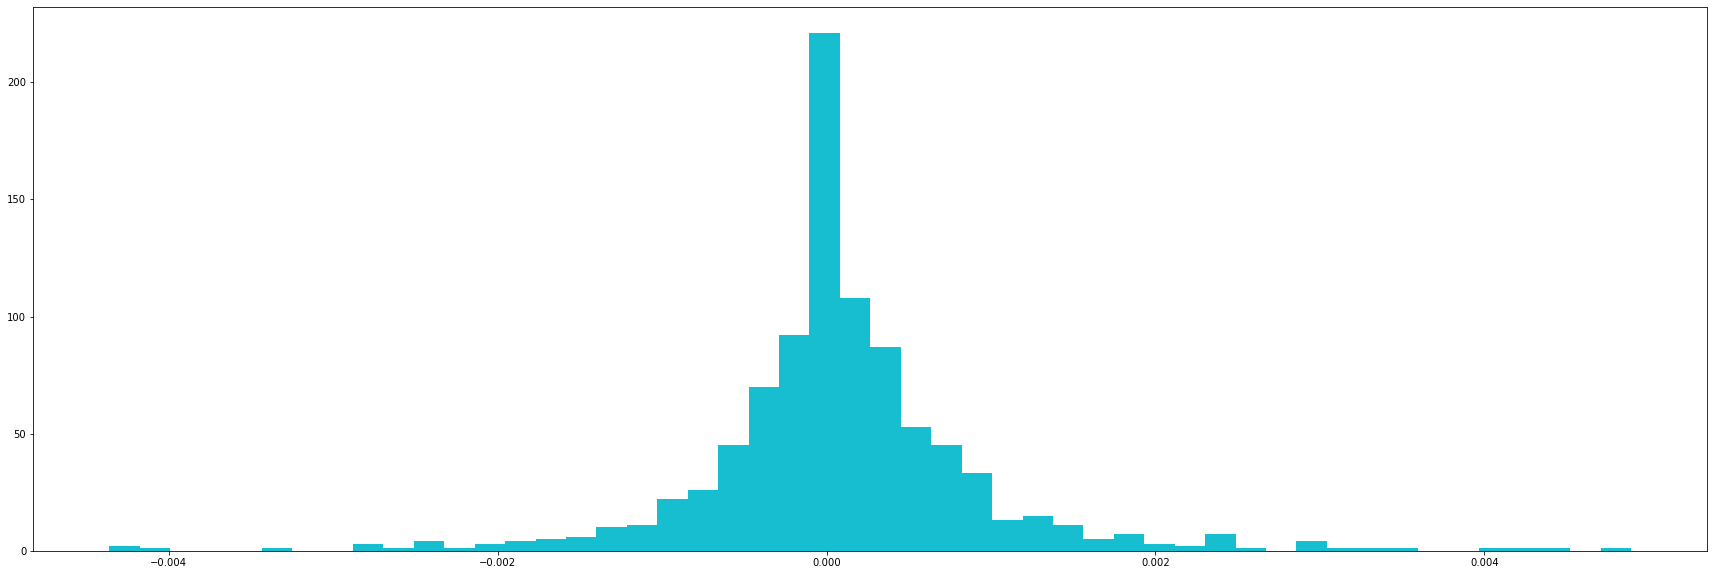

Ret_44


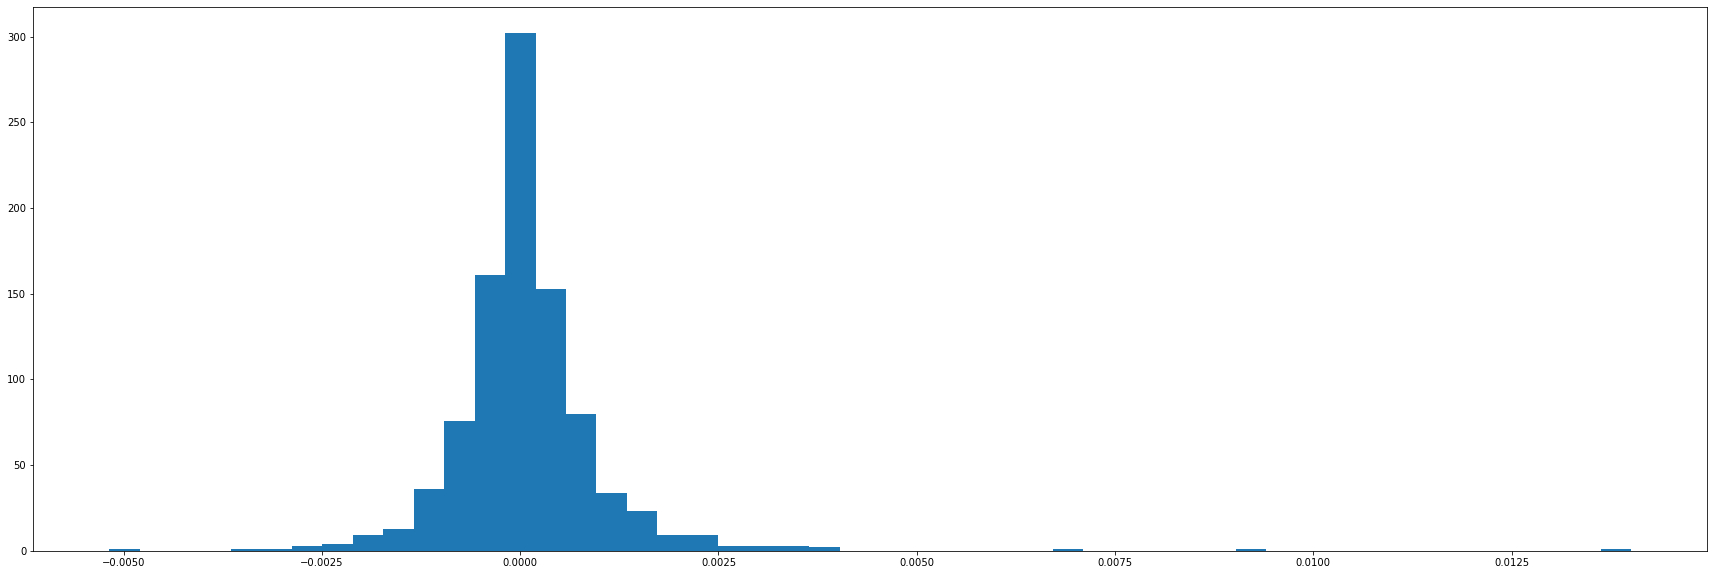

Ret_45


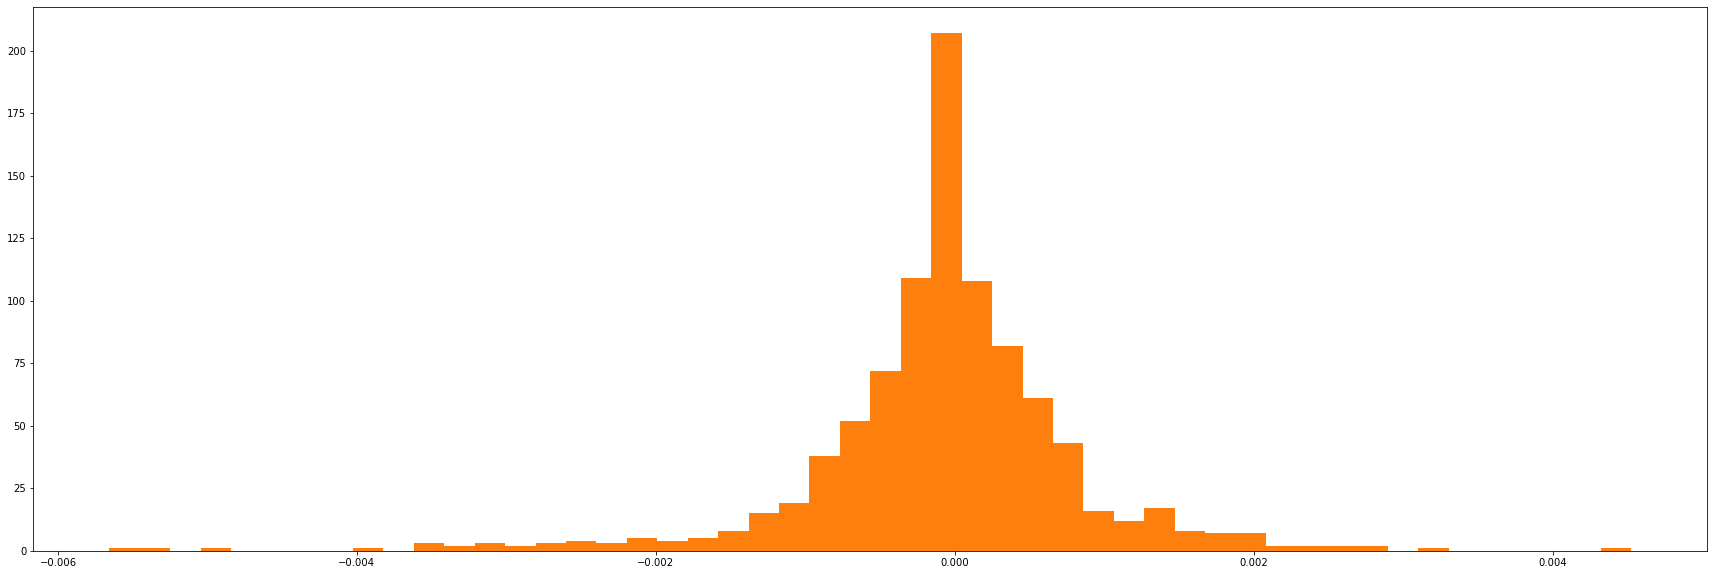

Ret_46


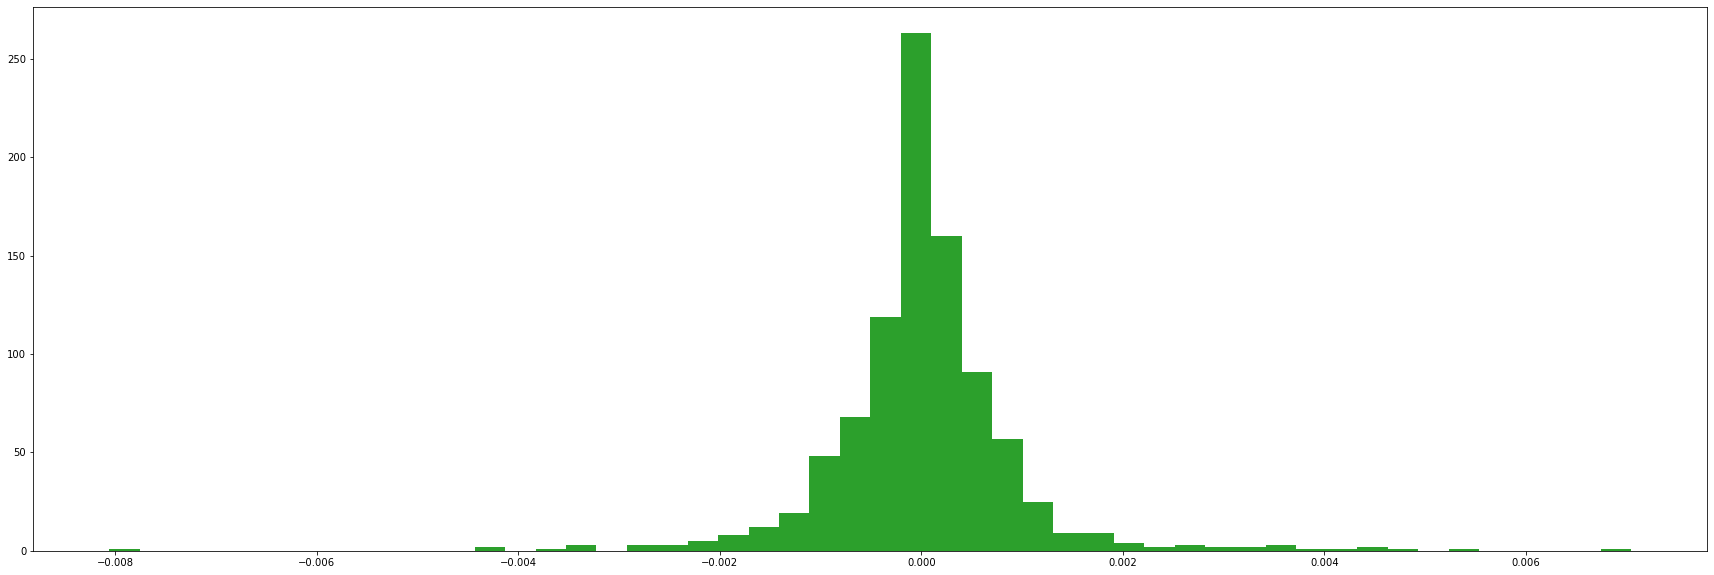

Ret_47


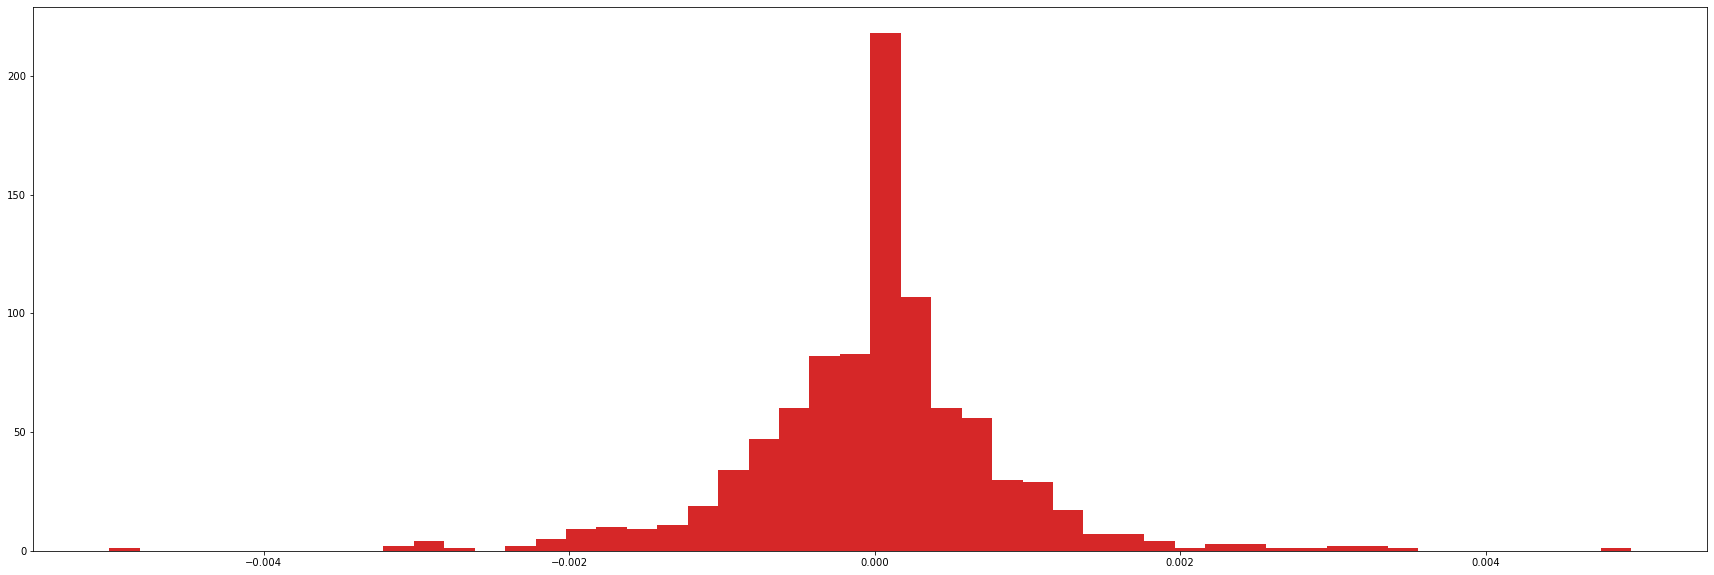

Ret_48


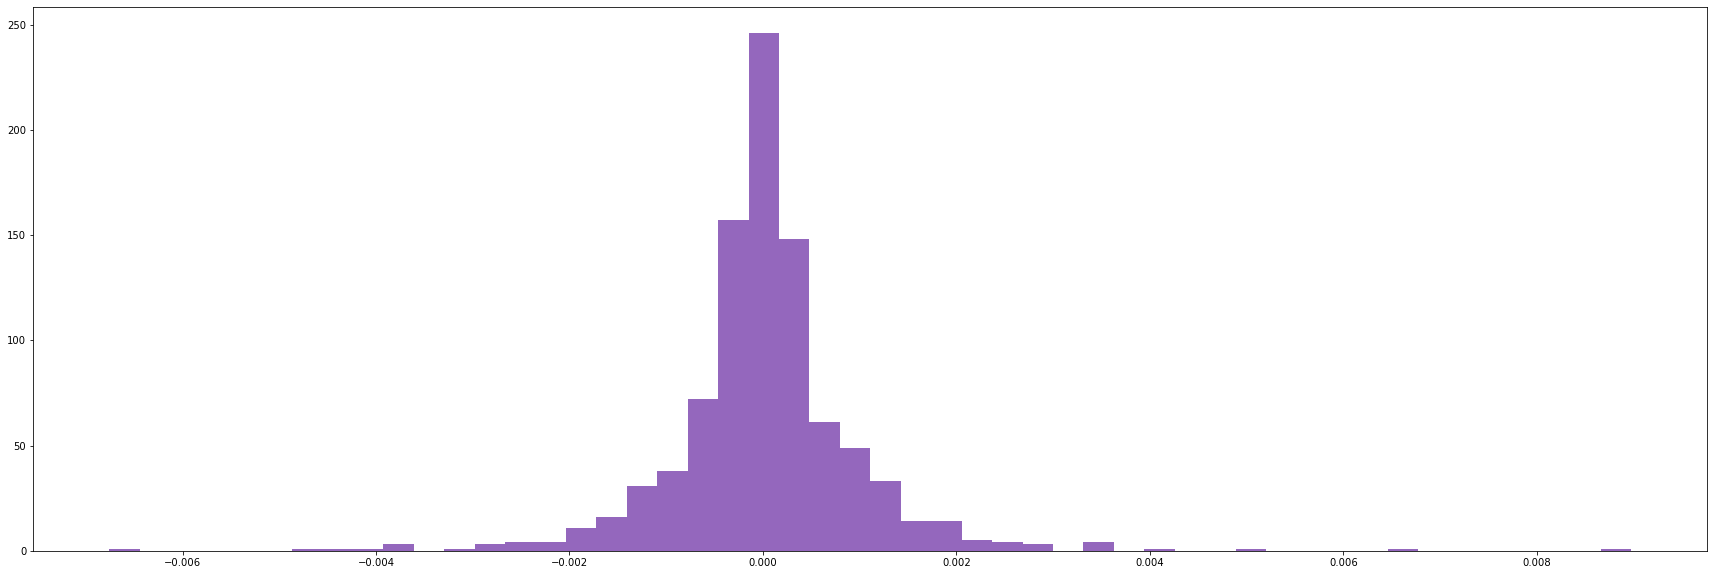

Ret_49


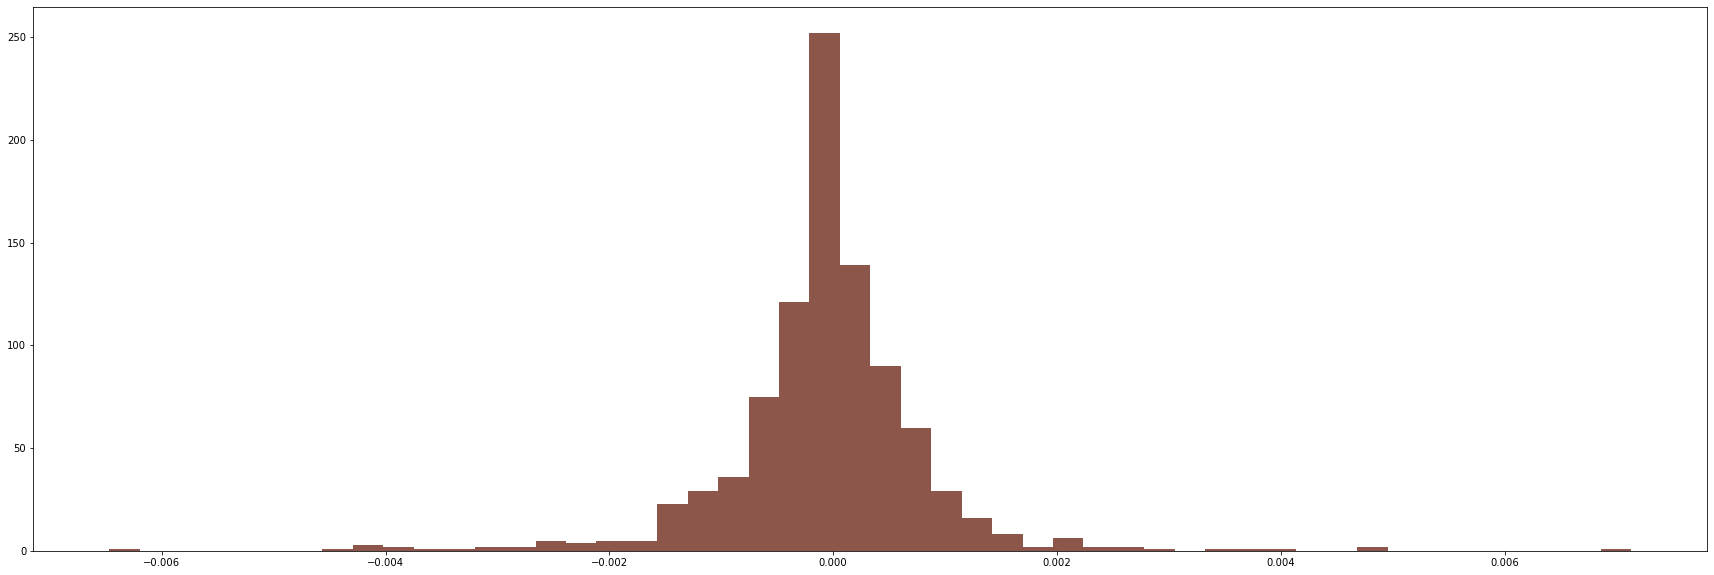

Ret_50


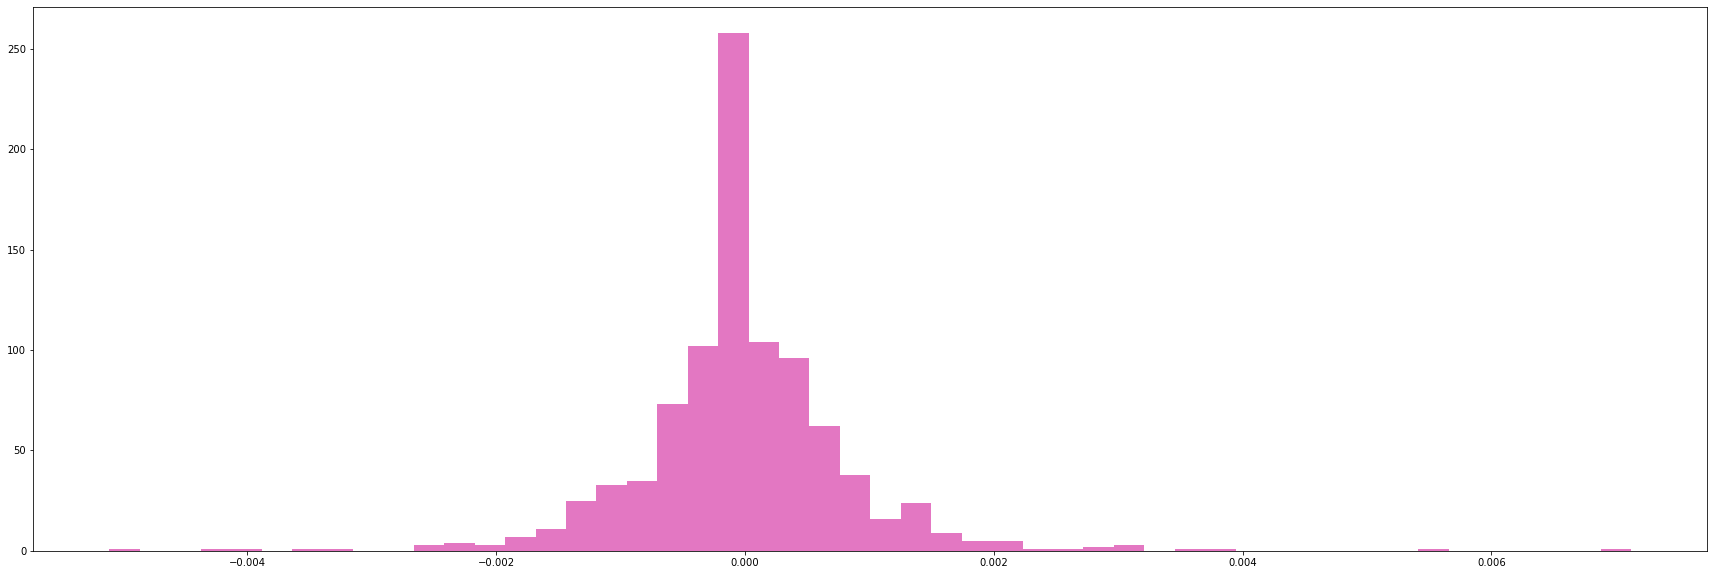

Ret_51


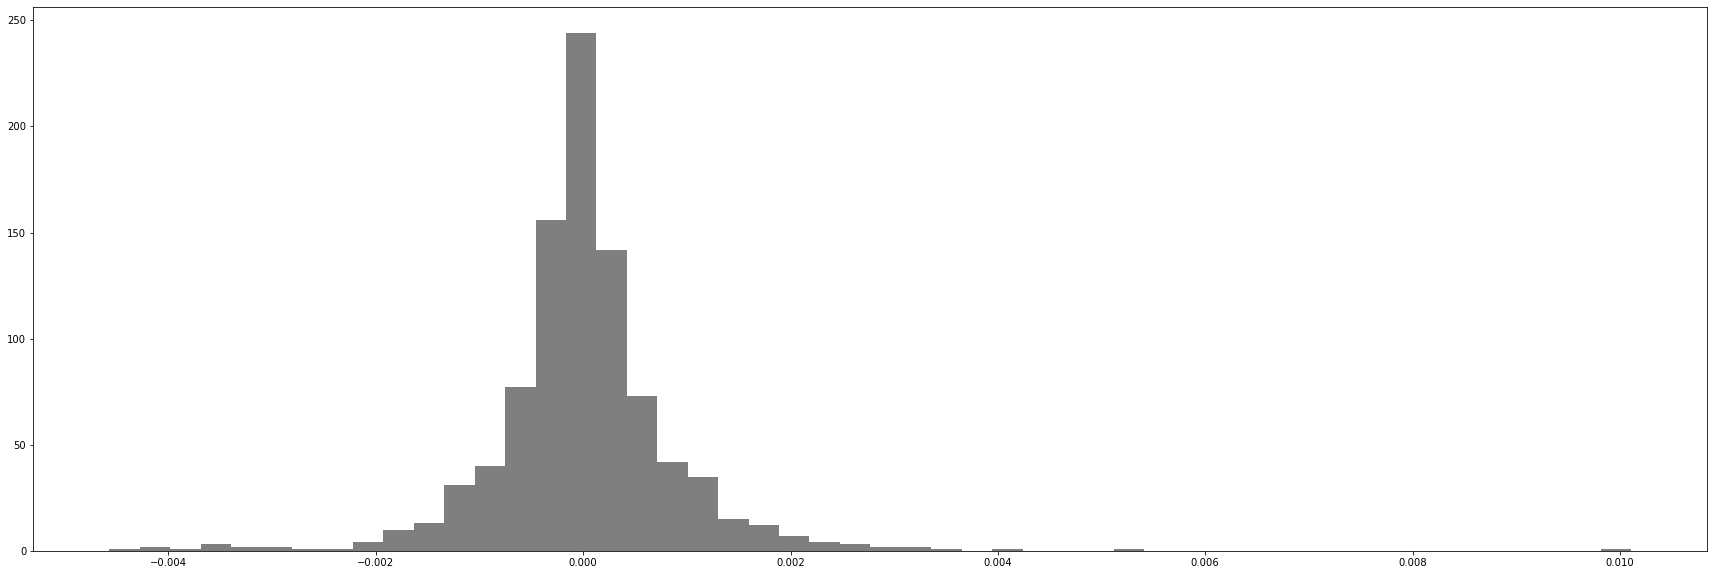

Ret_52


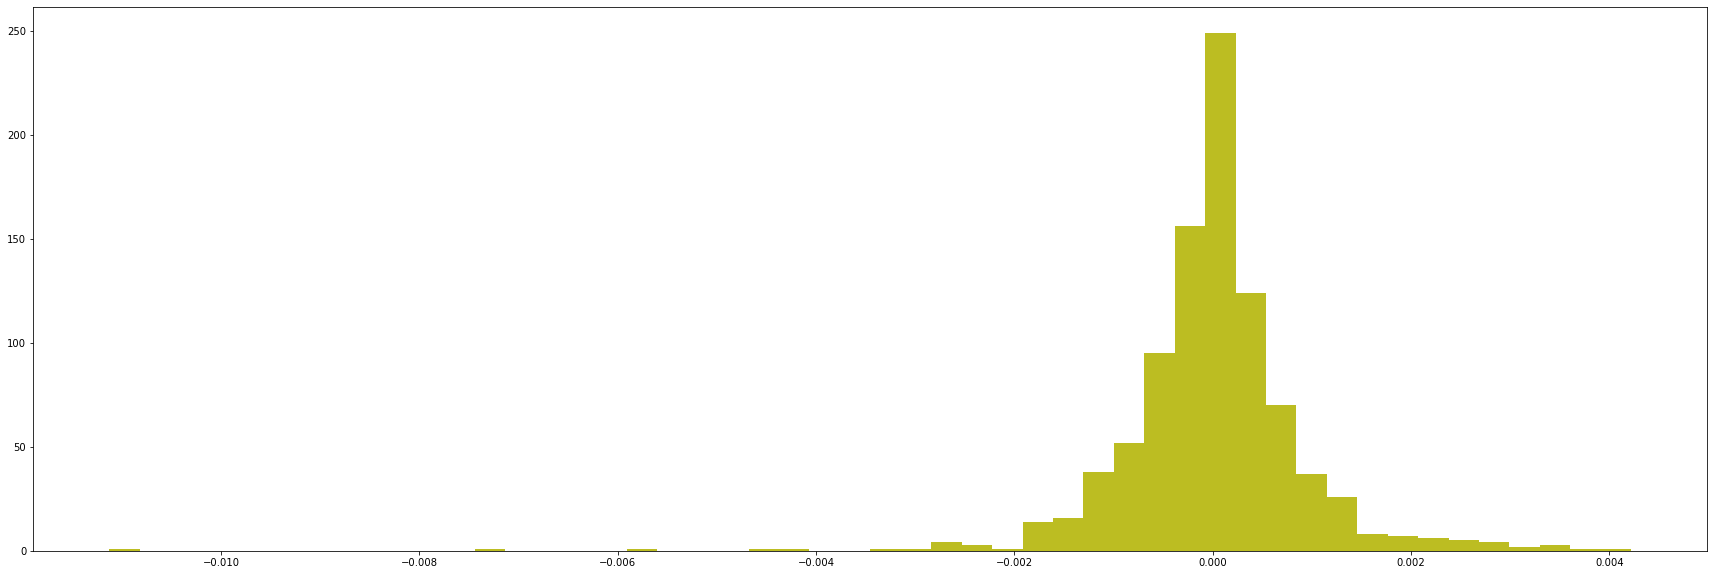

Ret_53


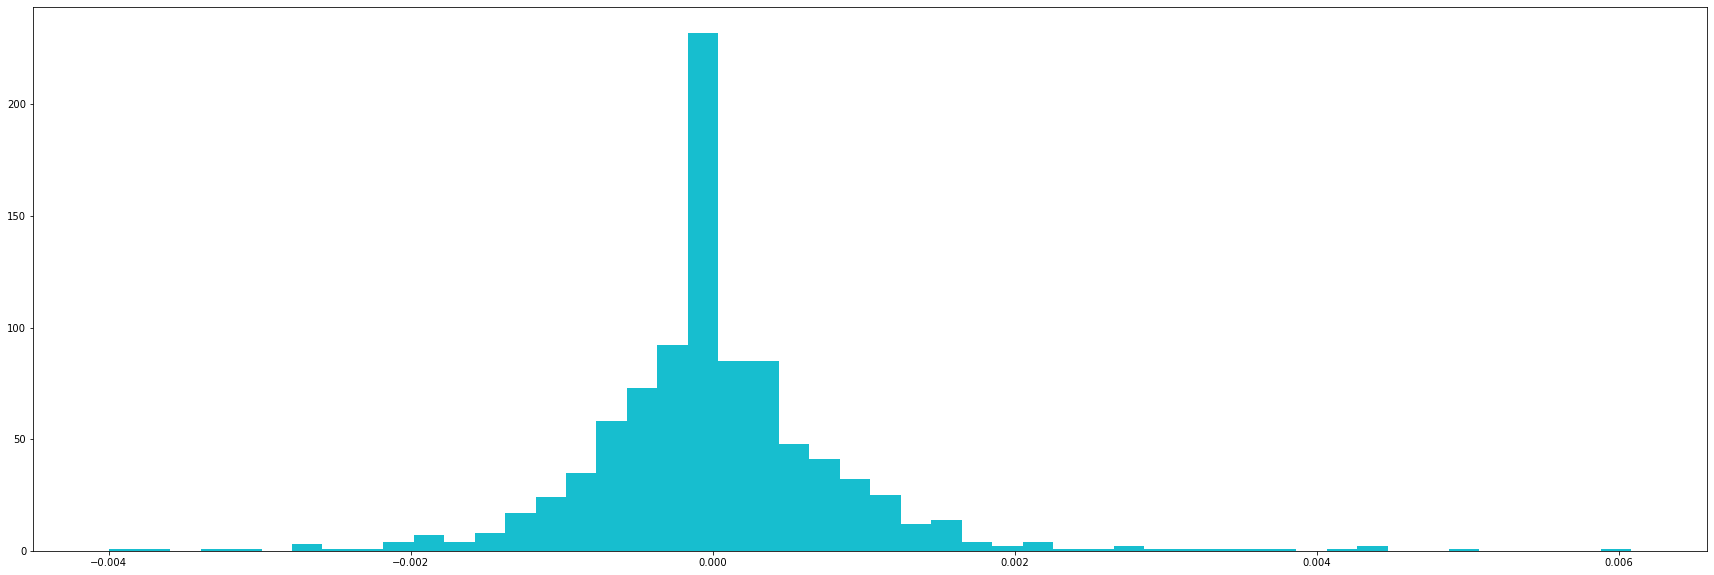

Ret_54


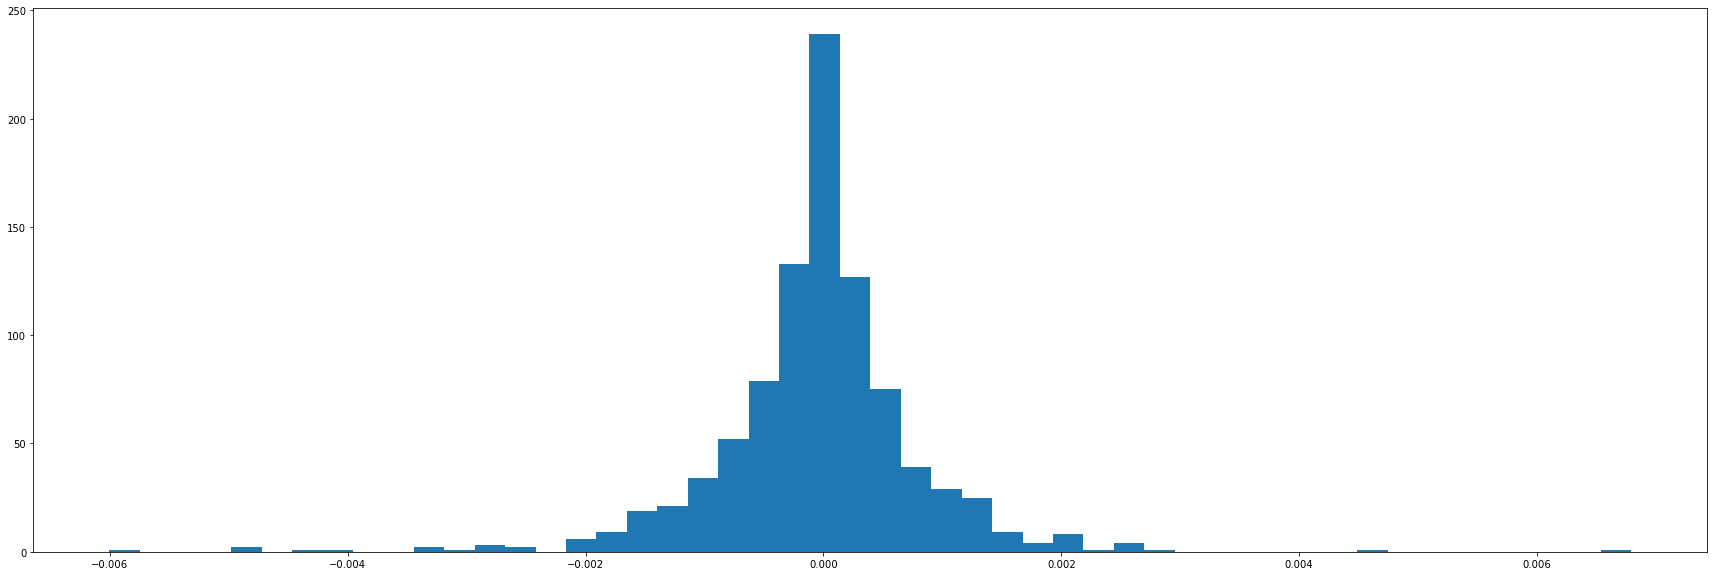

Ret_55


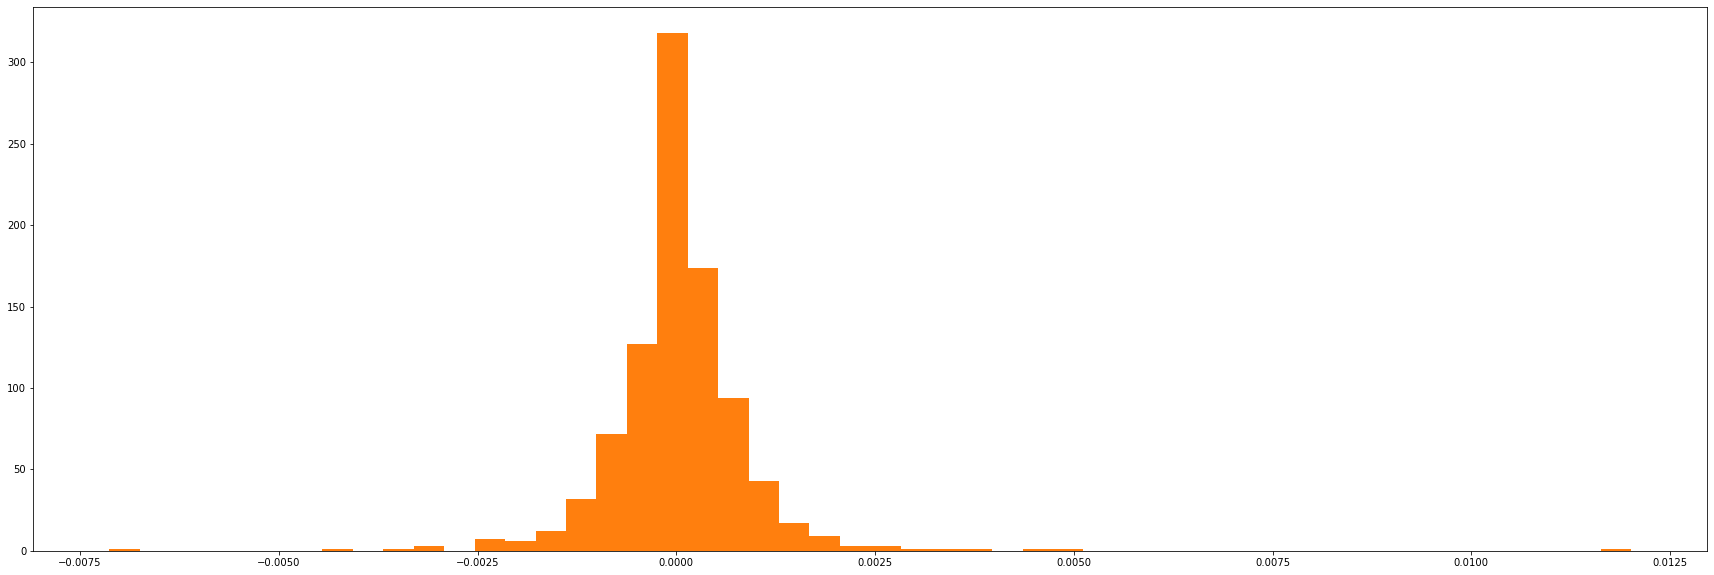

Ret_56


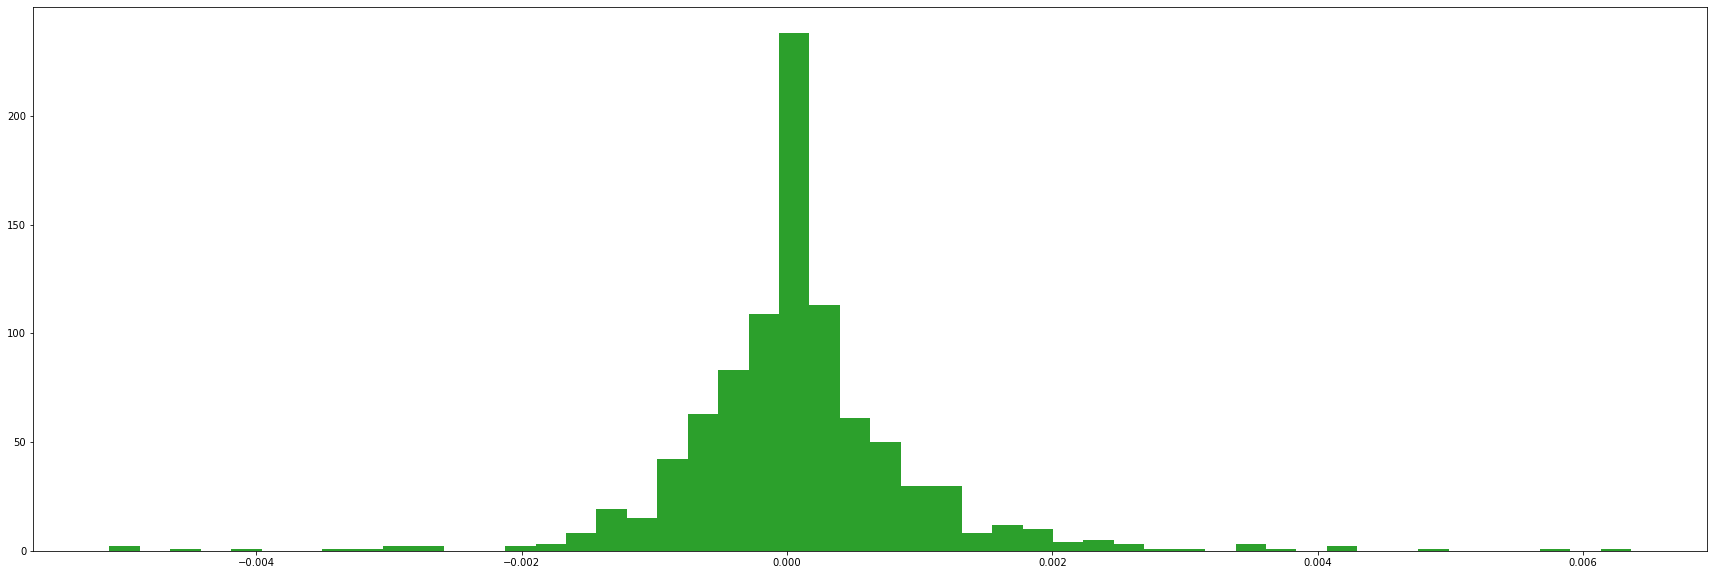

Ret_57


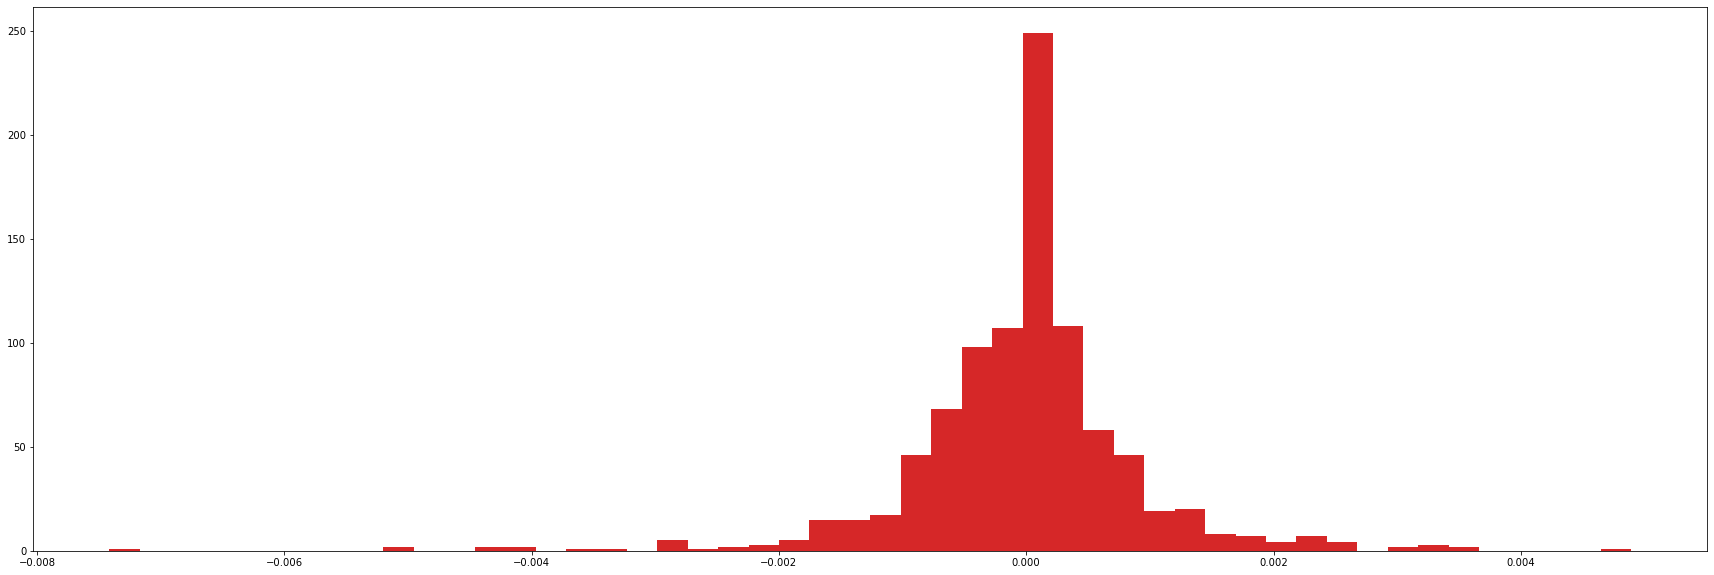

Ret_58


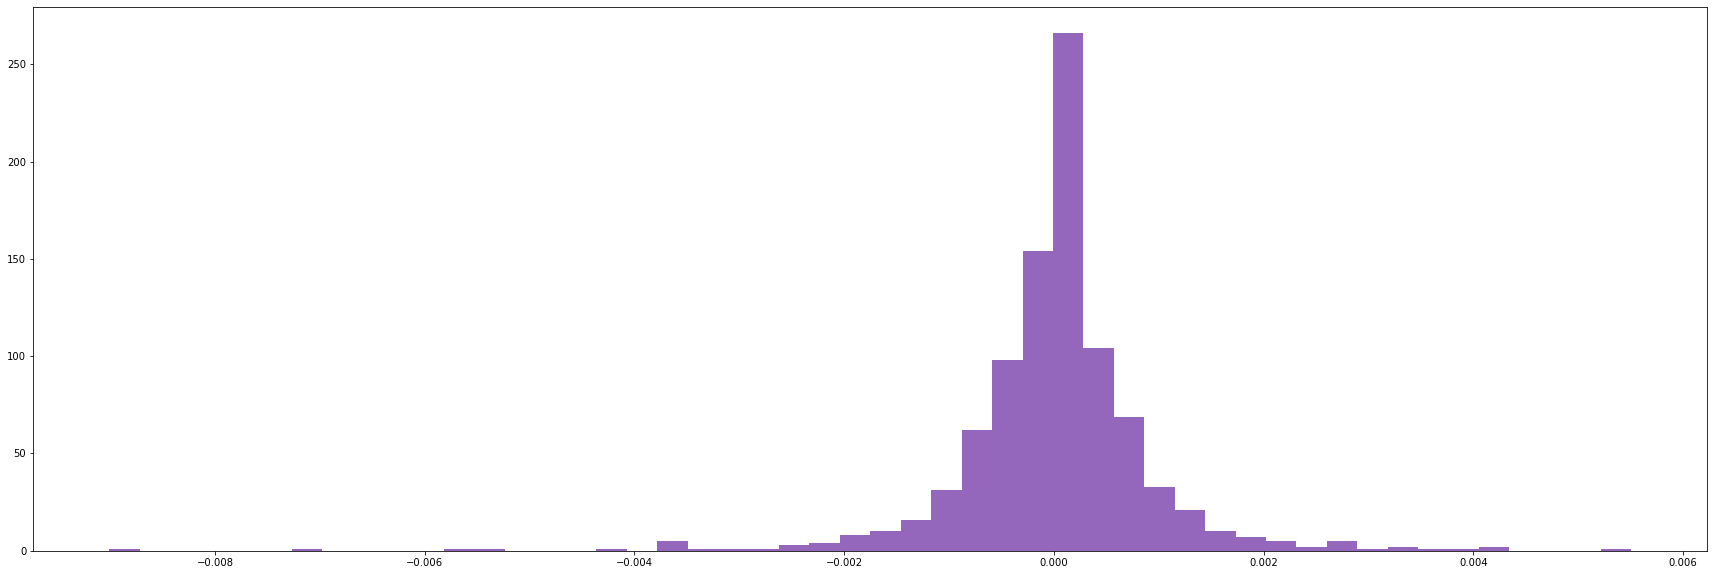

Ret_59


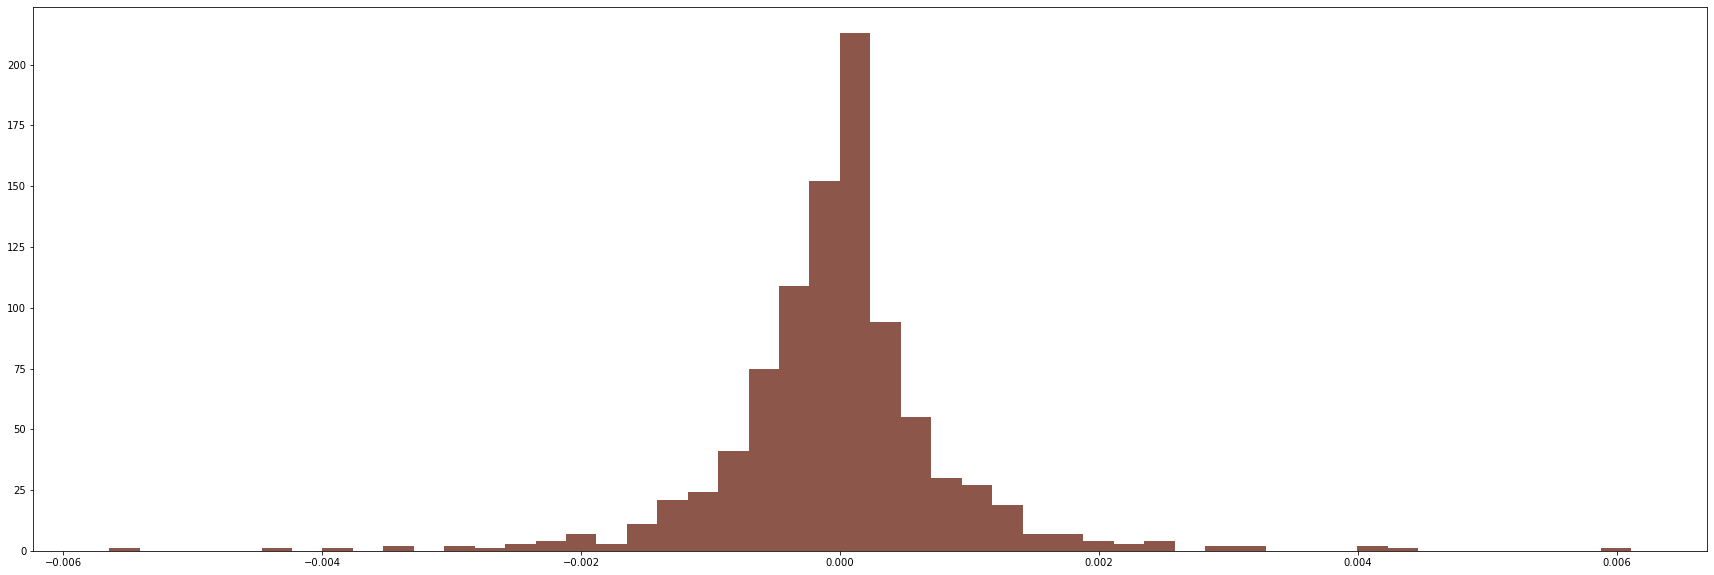

Ret_60


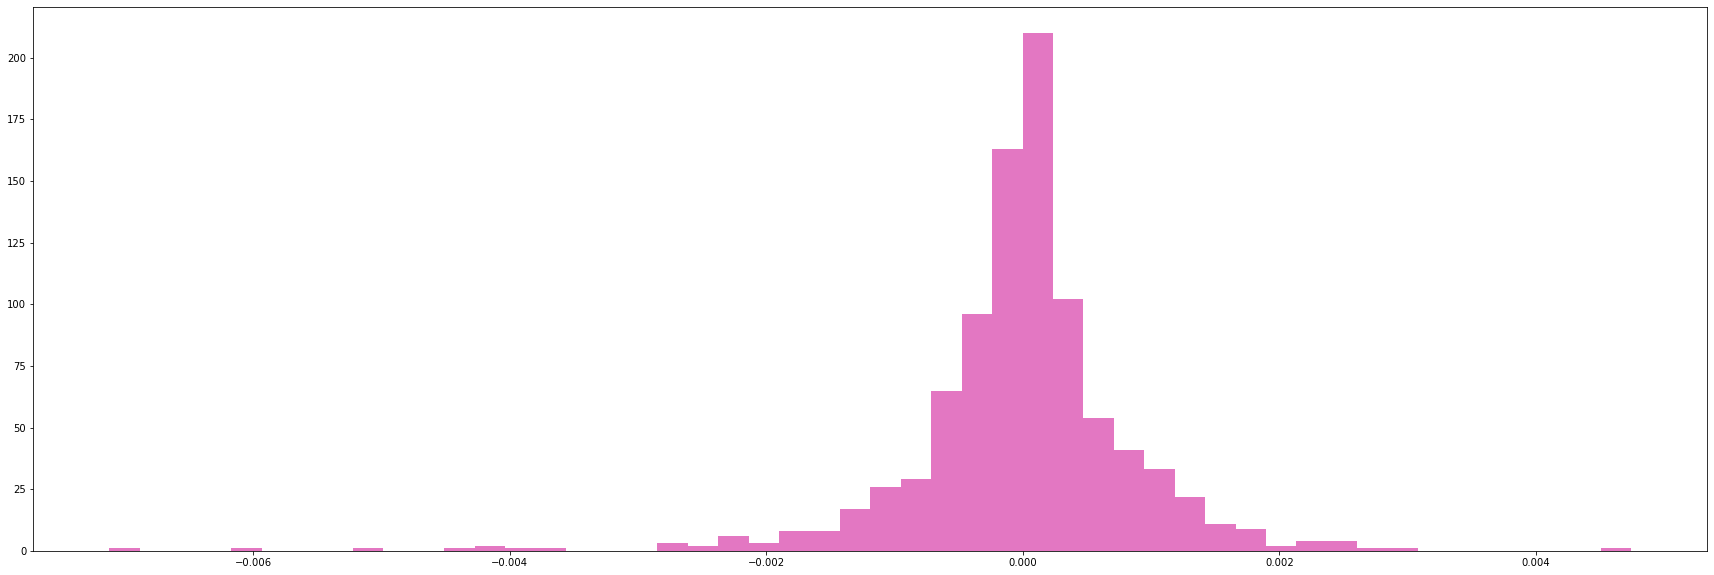

Ret_61


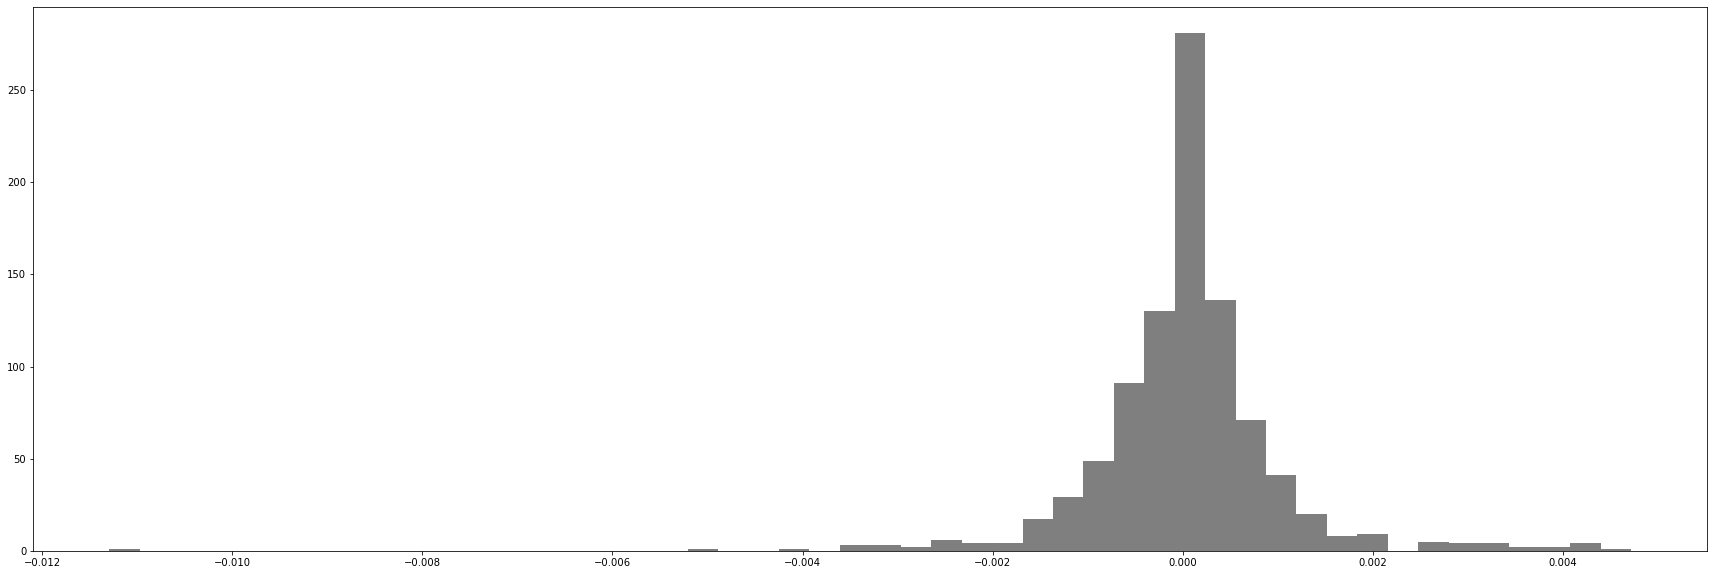

Ret_62


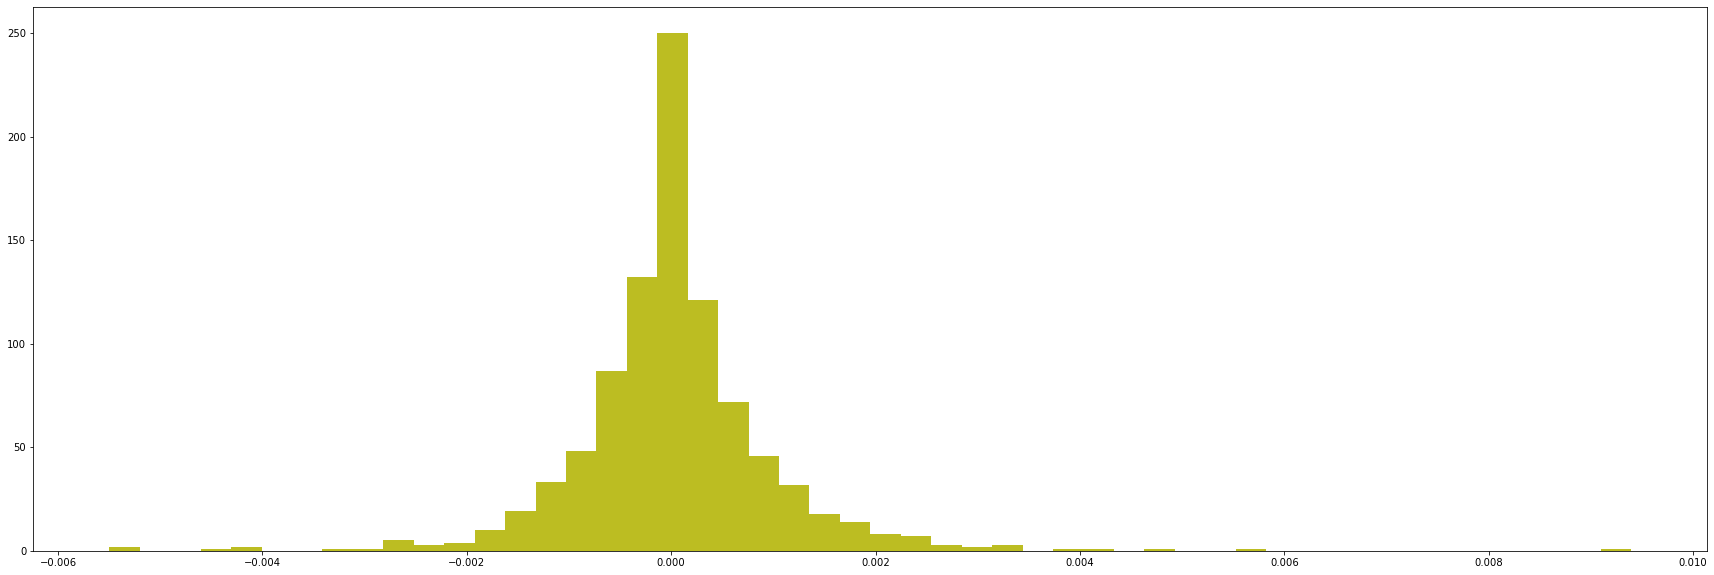

Ret_63


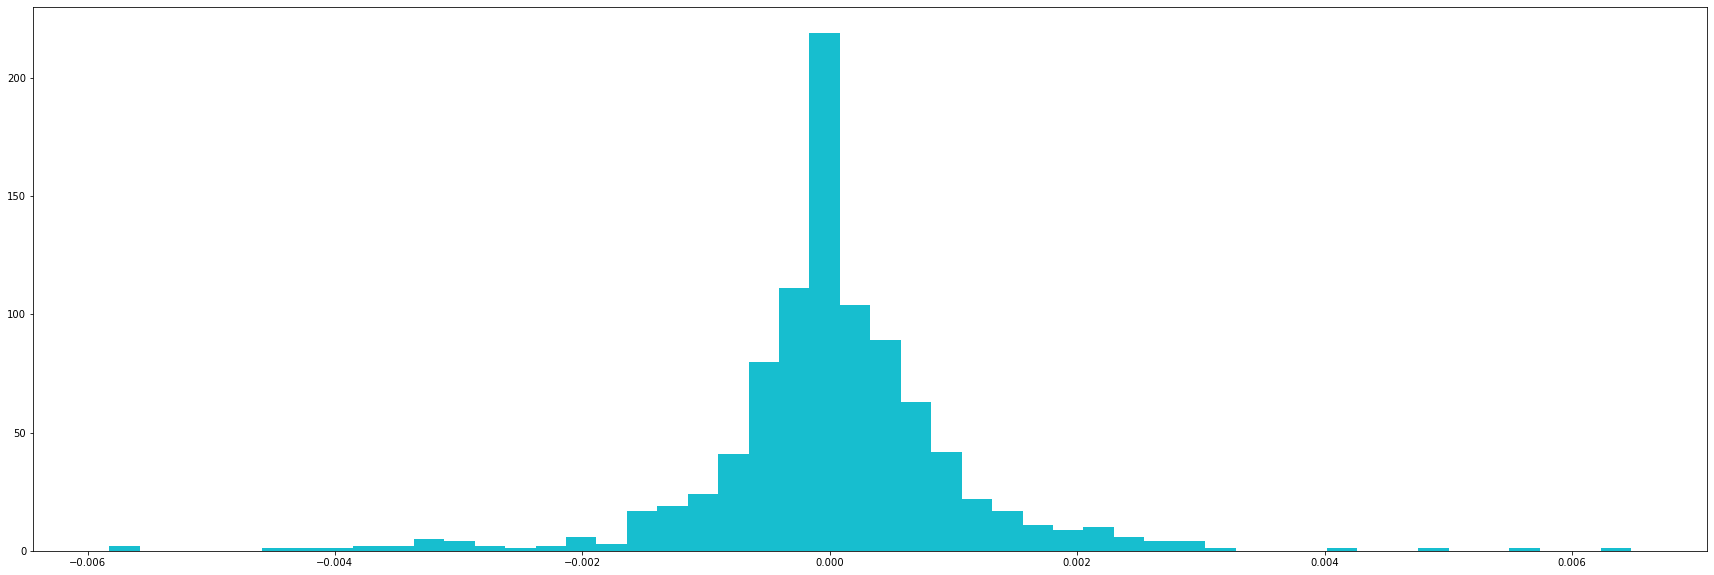

Ret_64


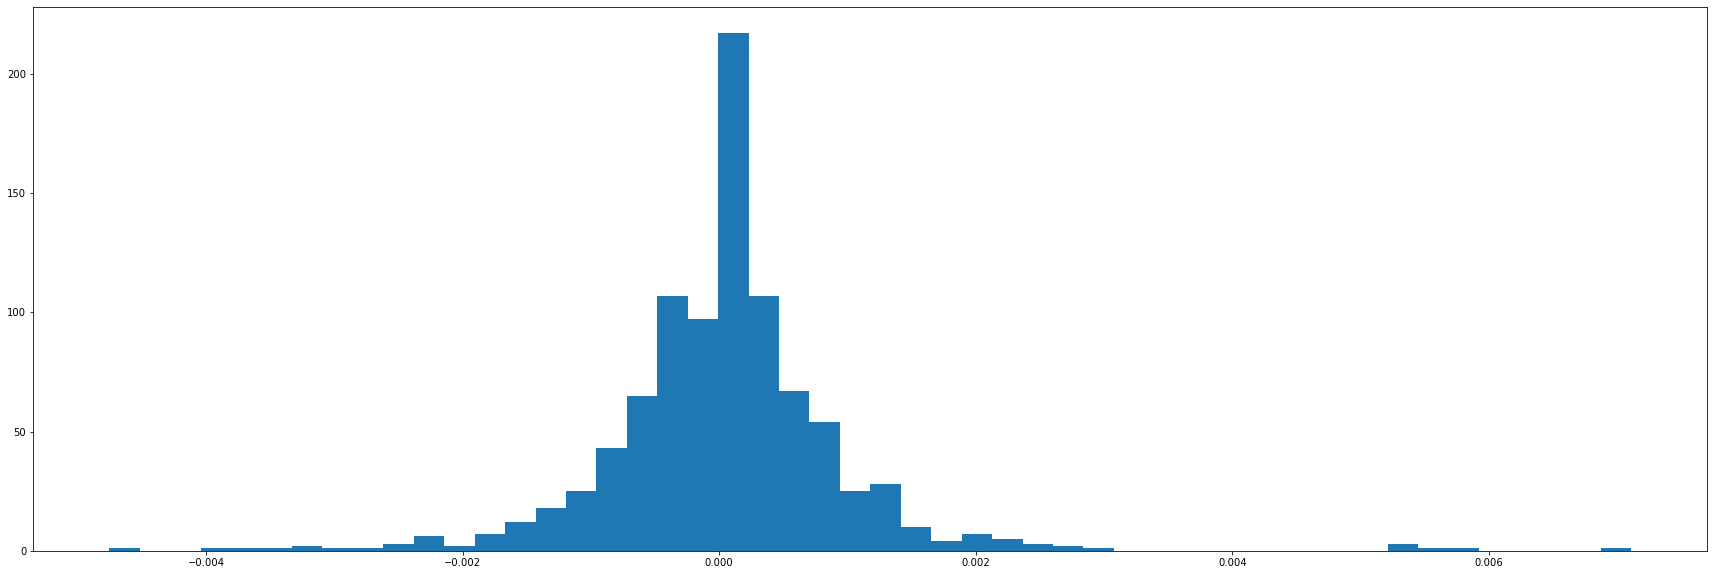

Ret_65


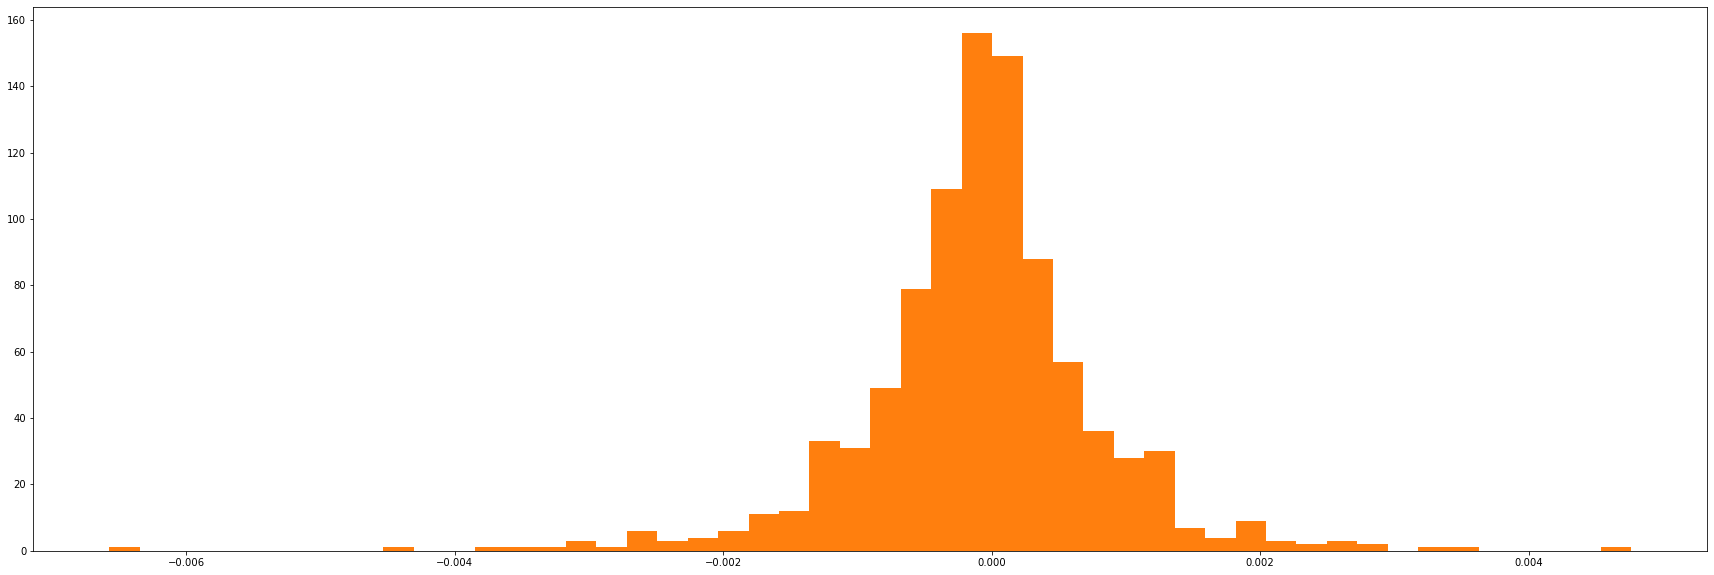

Ret_66


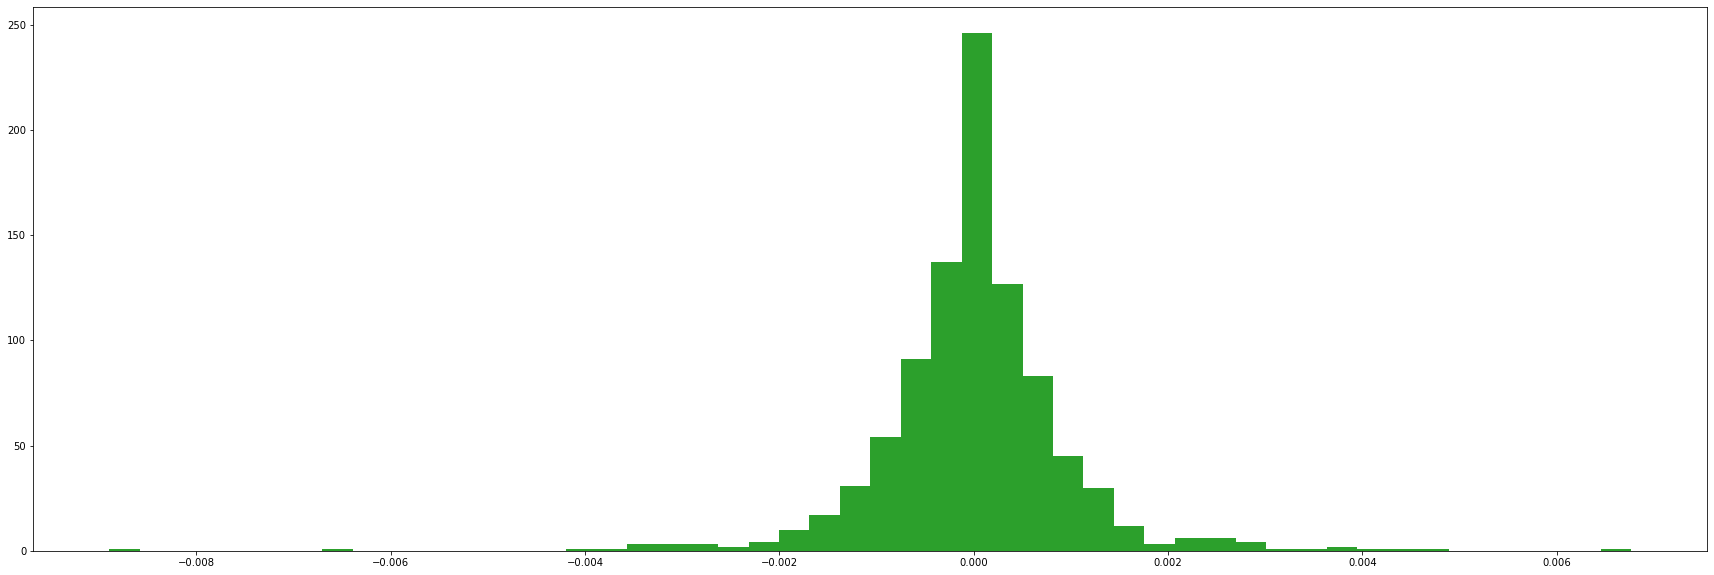

Ret_67


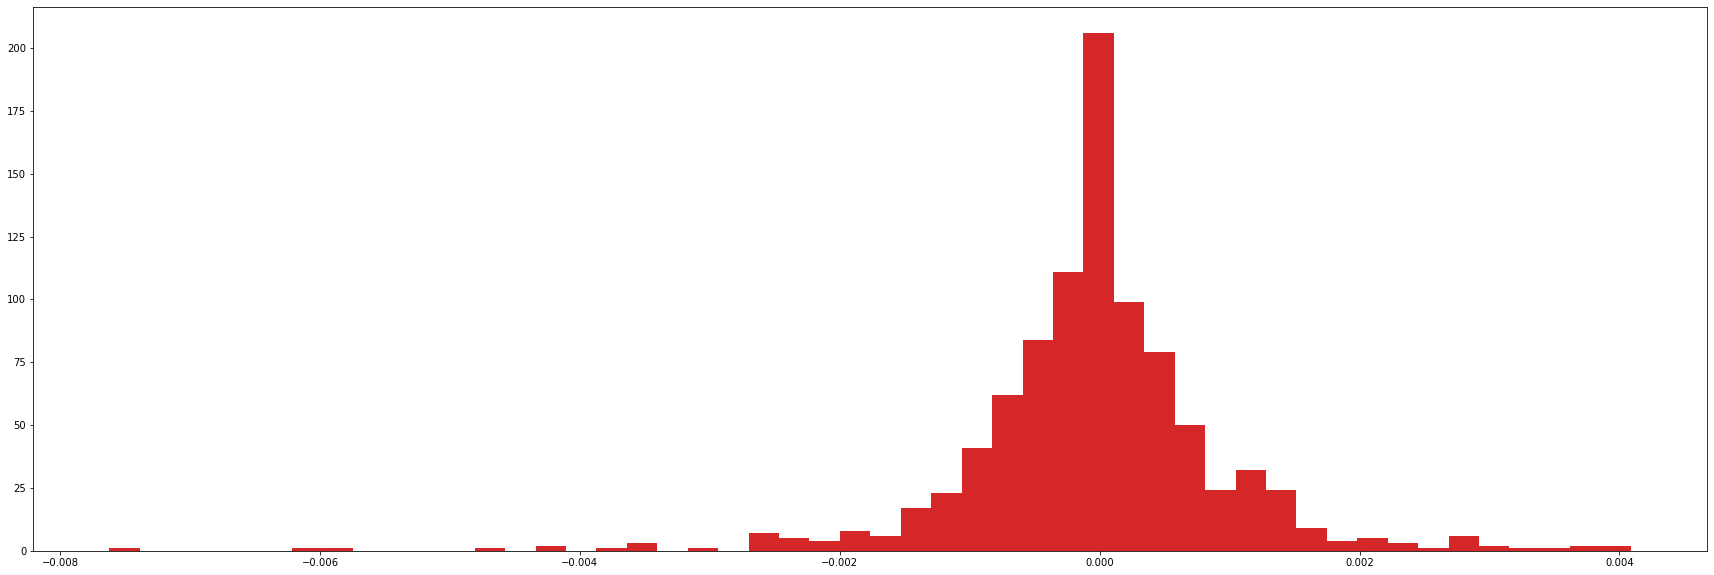

Ret_68


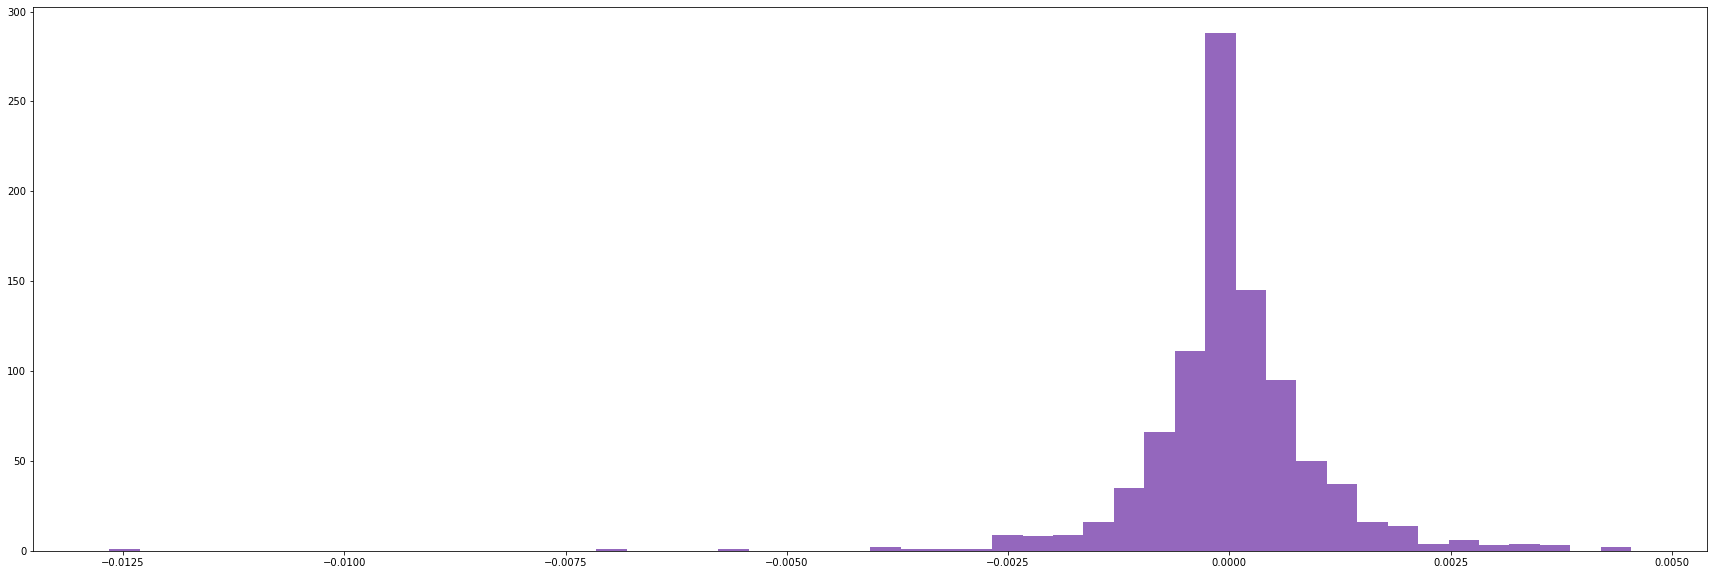

Ret_69


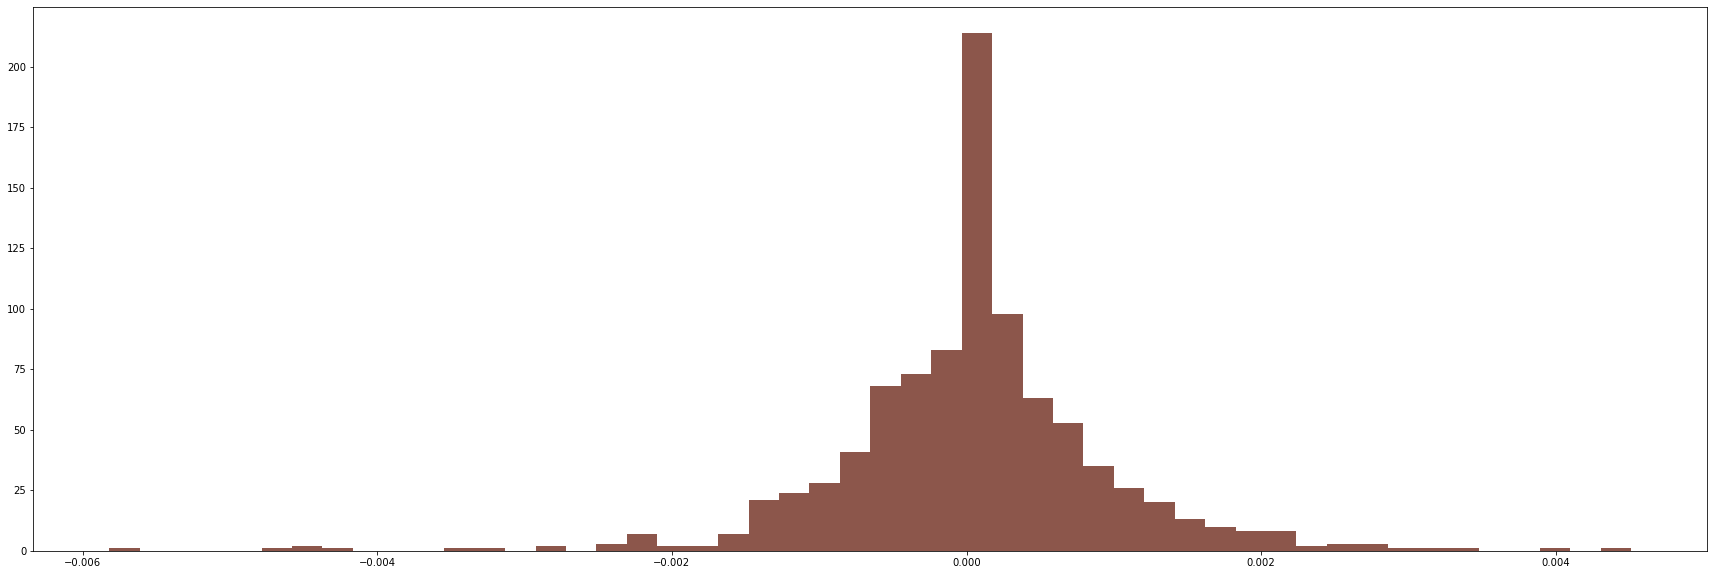

Ret_70


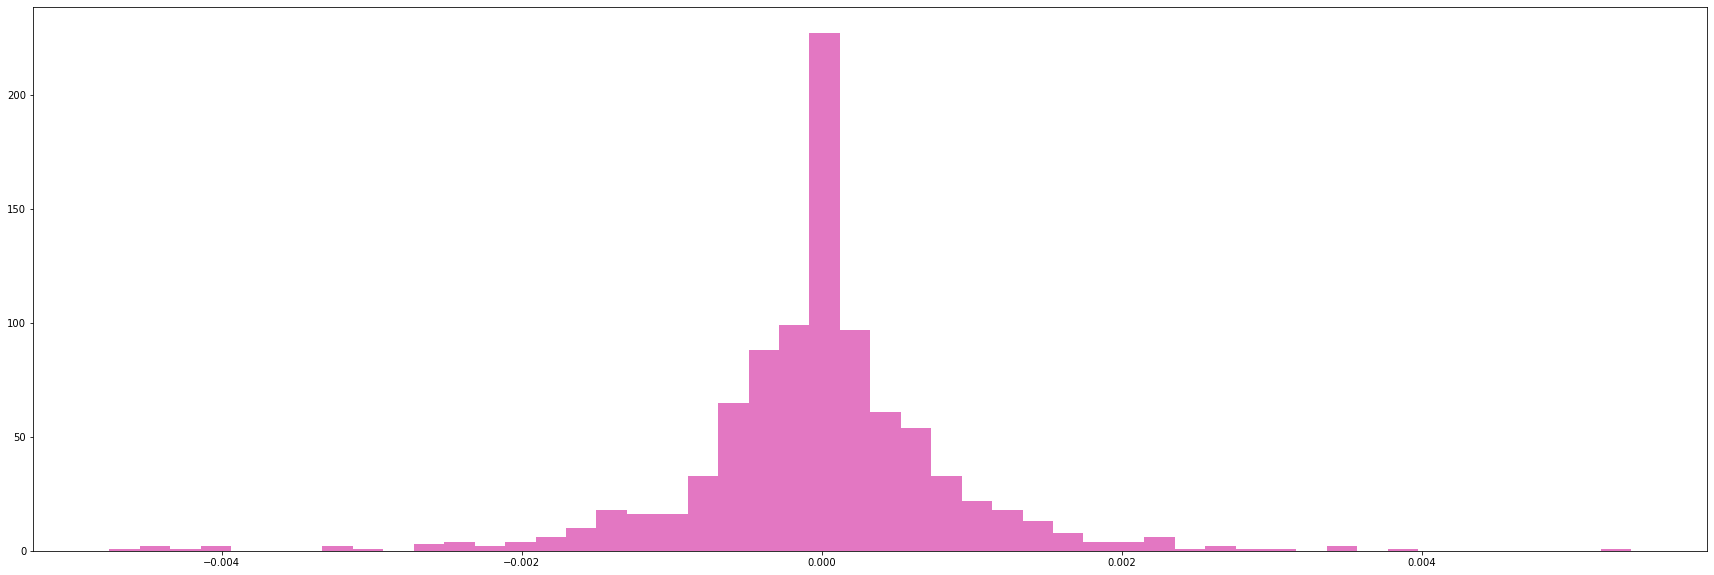

Ret_71


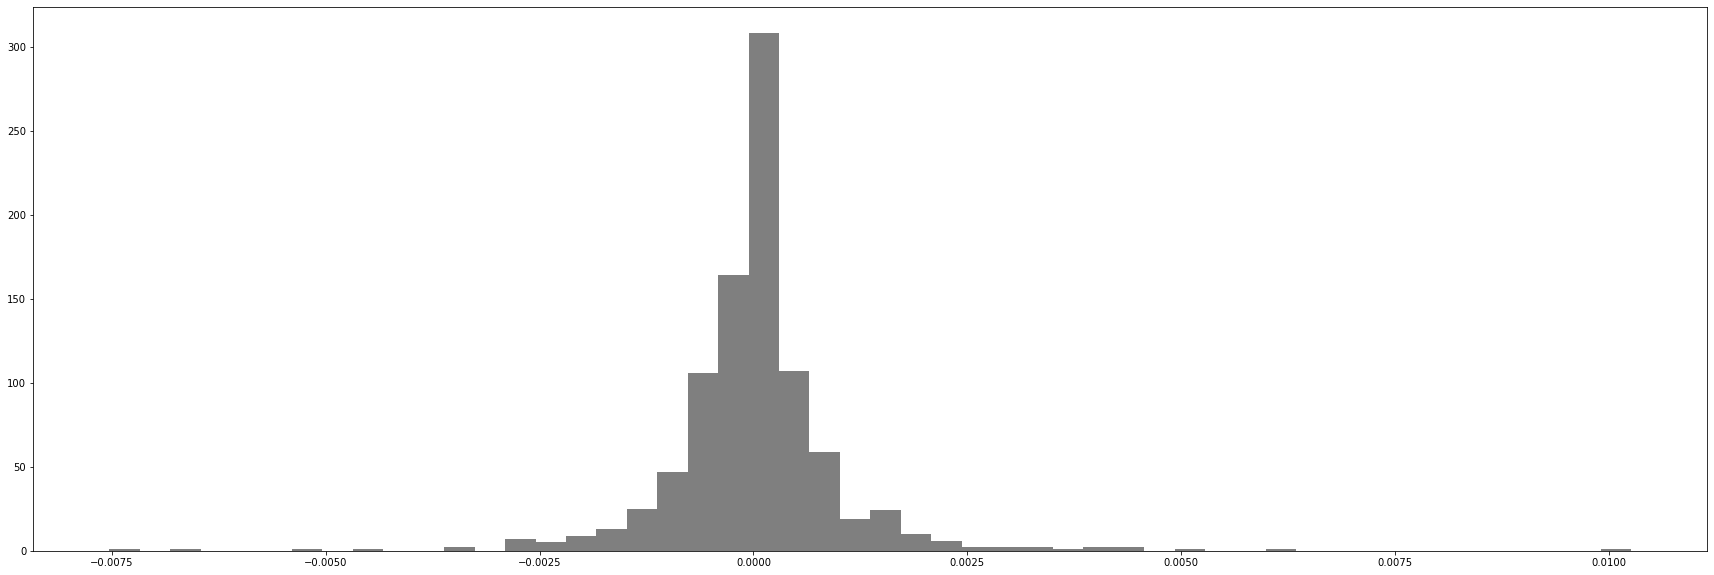

Ret_72


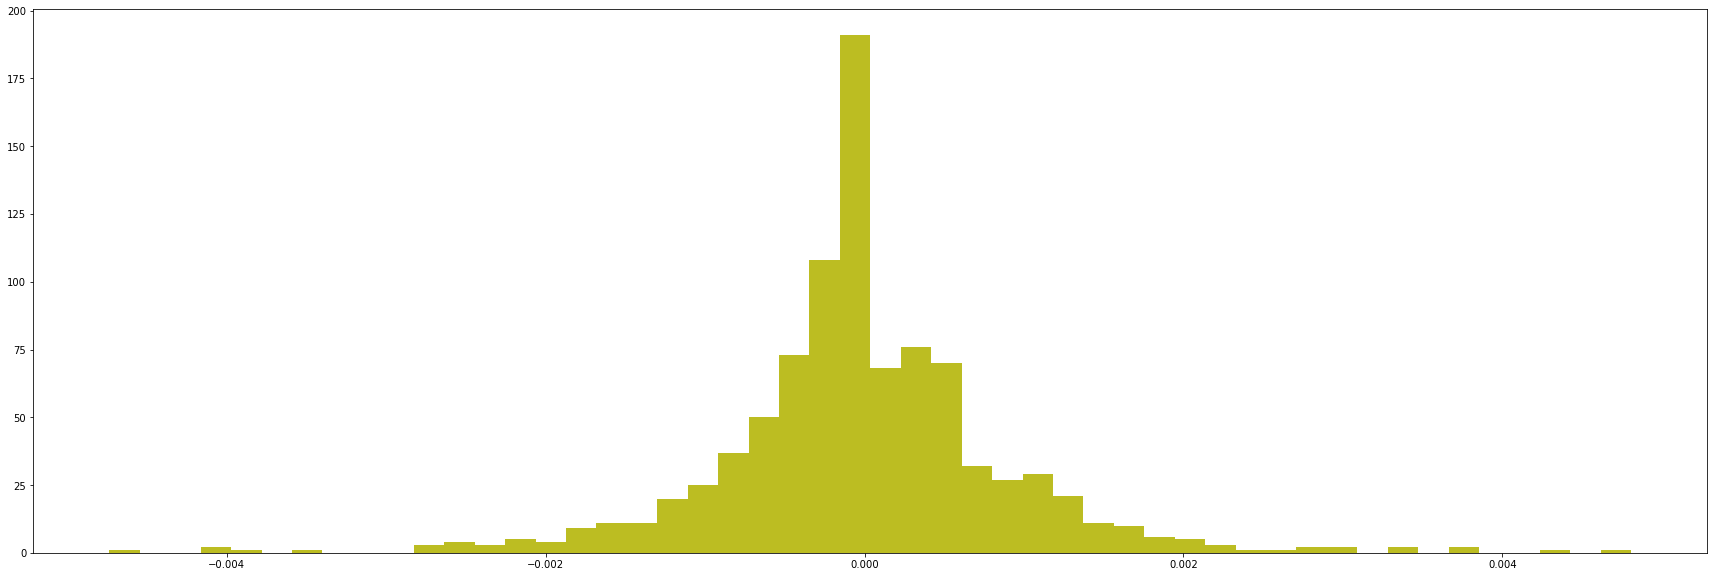

Ret_73


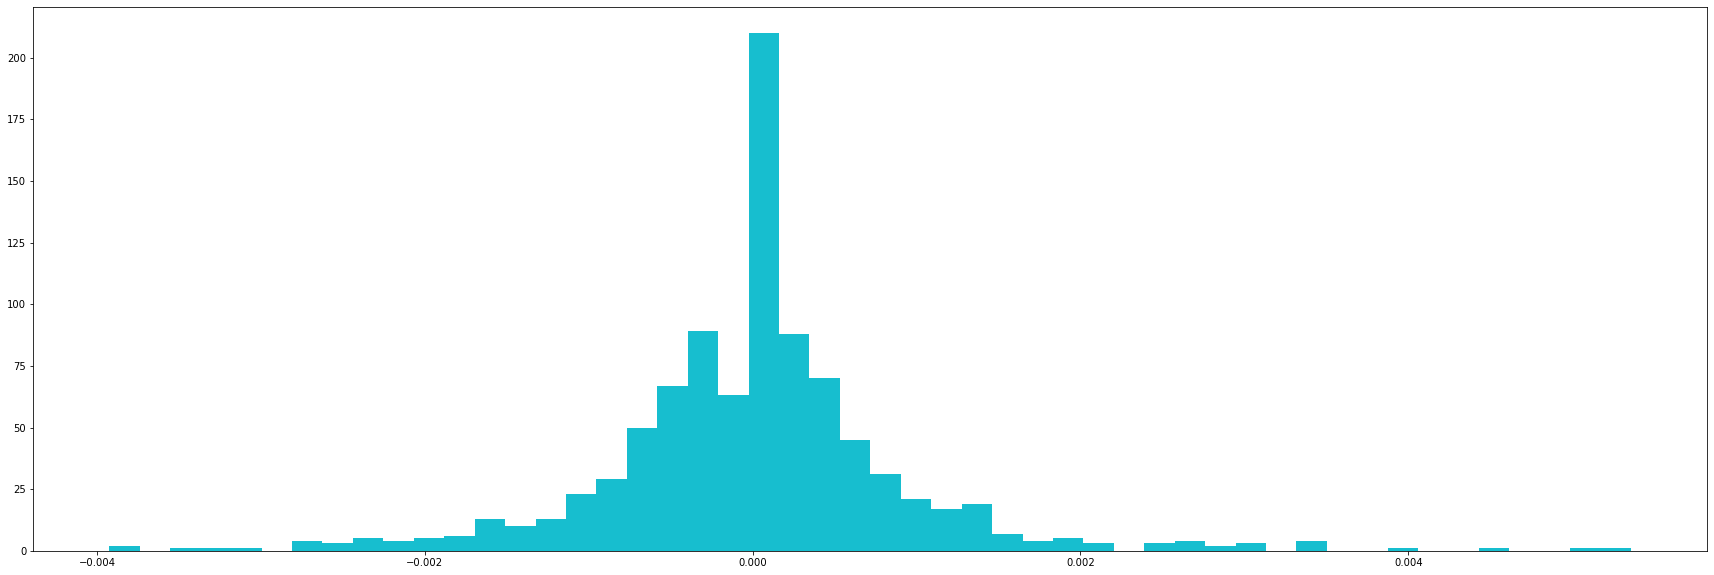

Ret_74


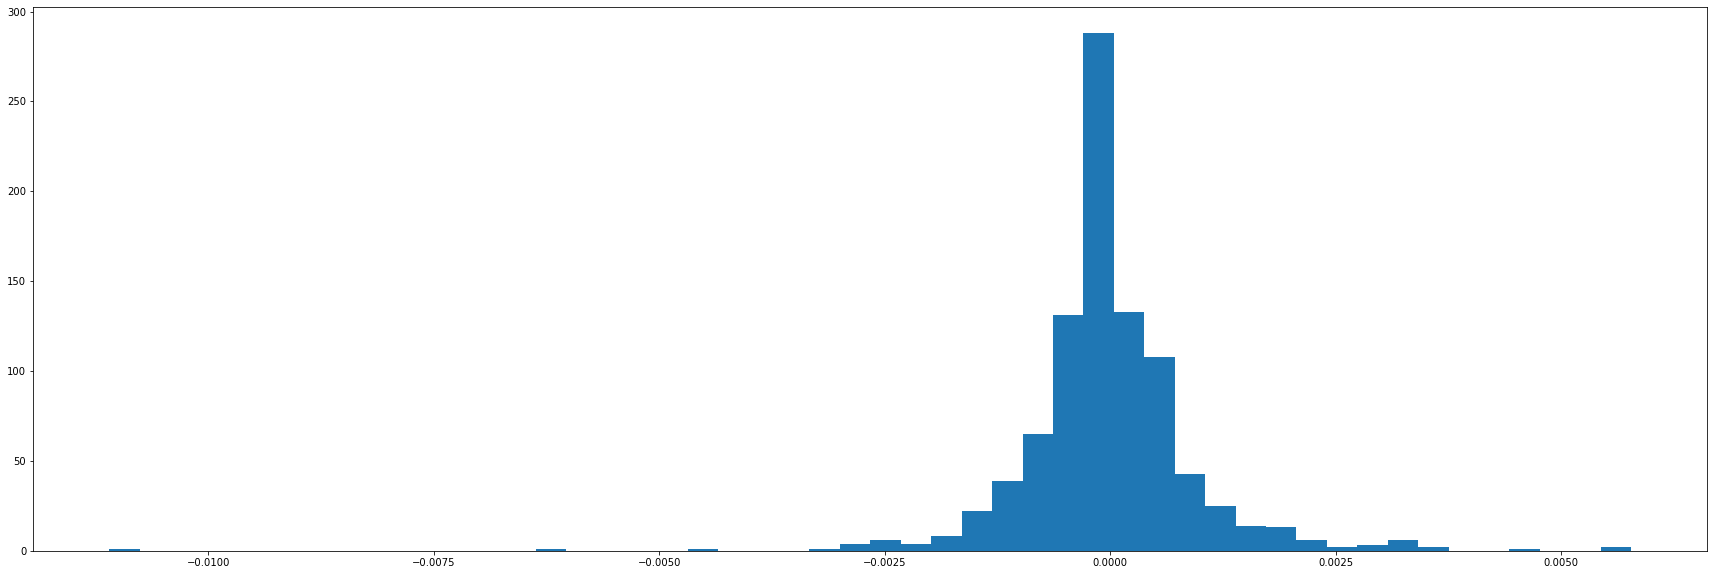

Ret_75


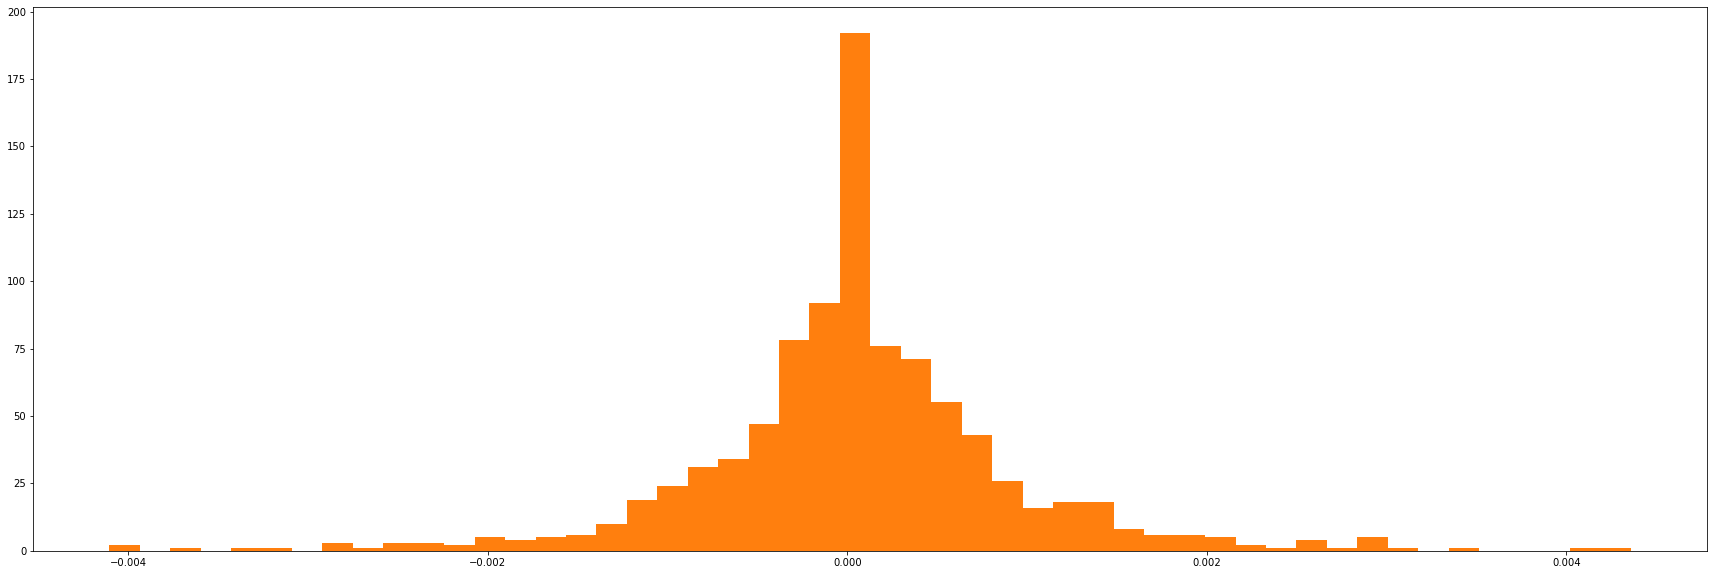

Ret_76


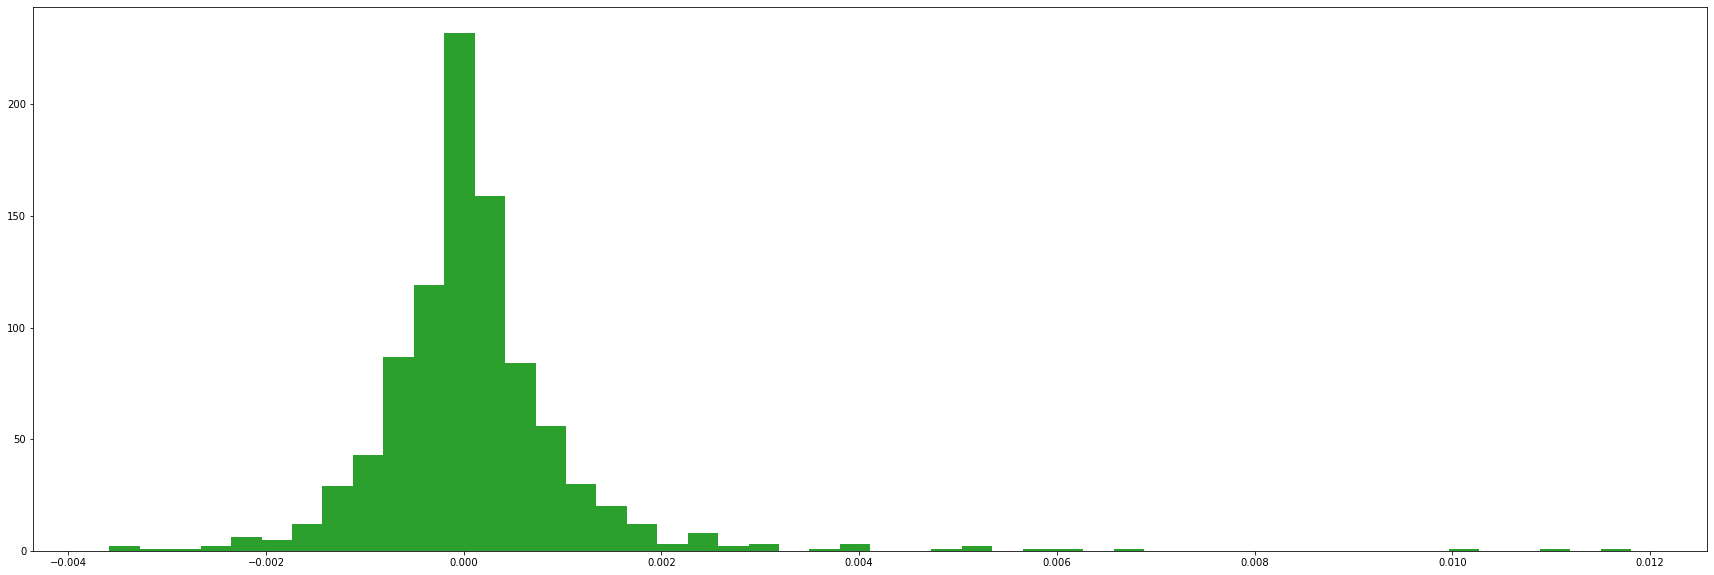

Ret_77


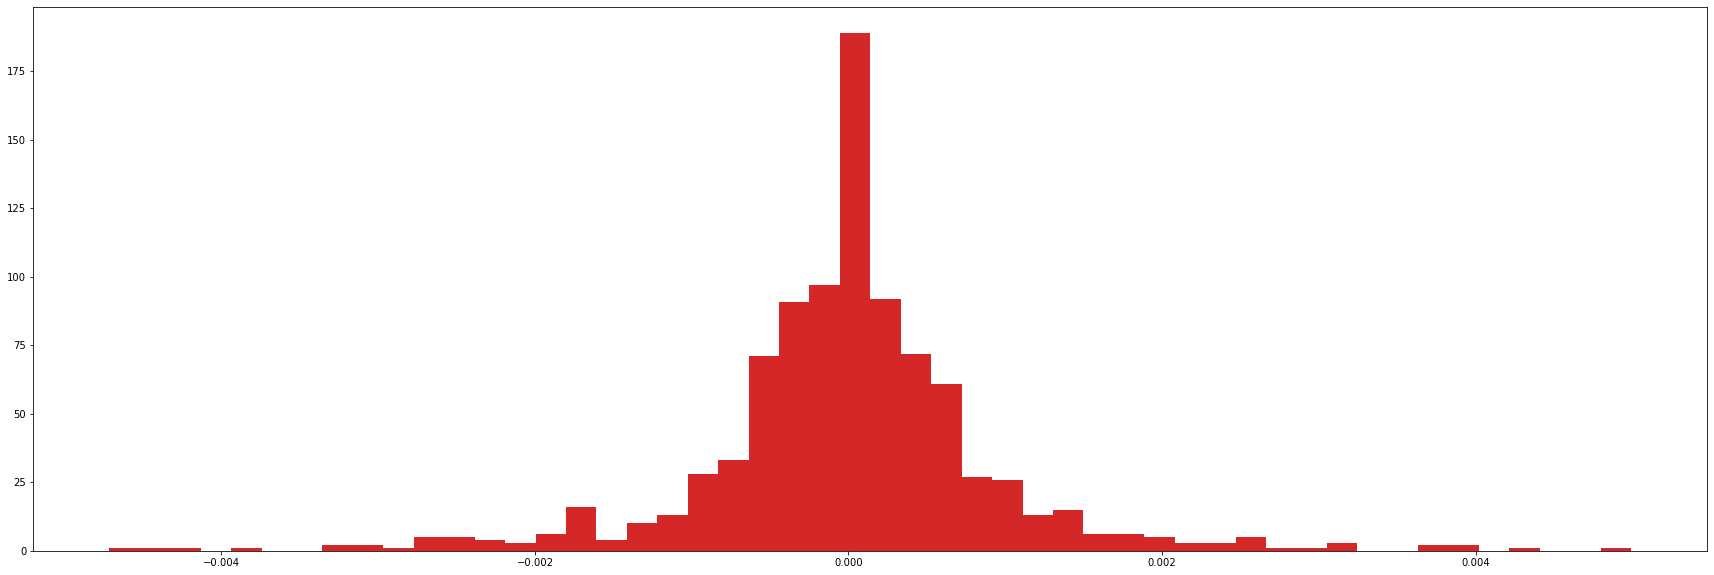

Ret_78


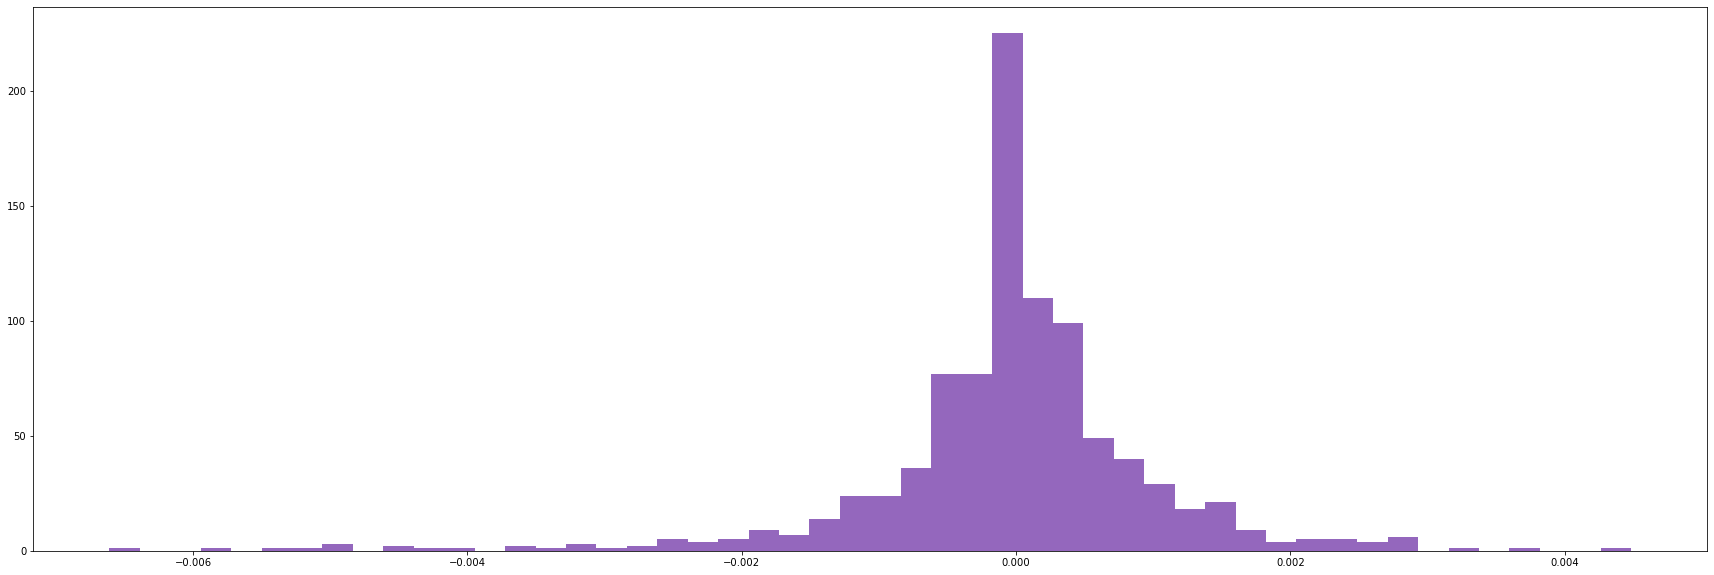

Ret_79


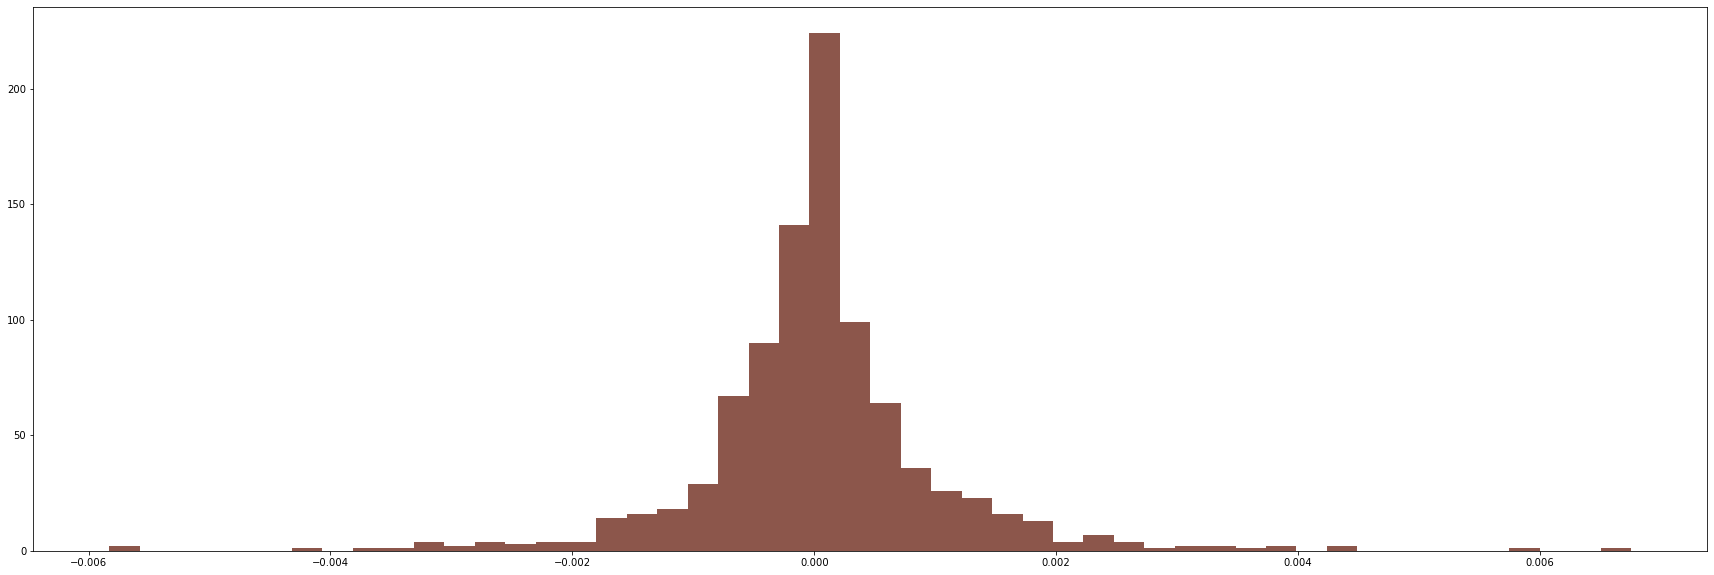

Ret_80


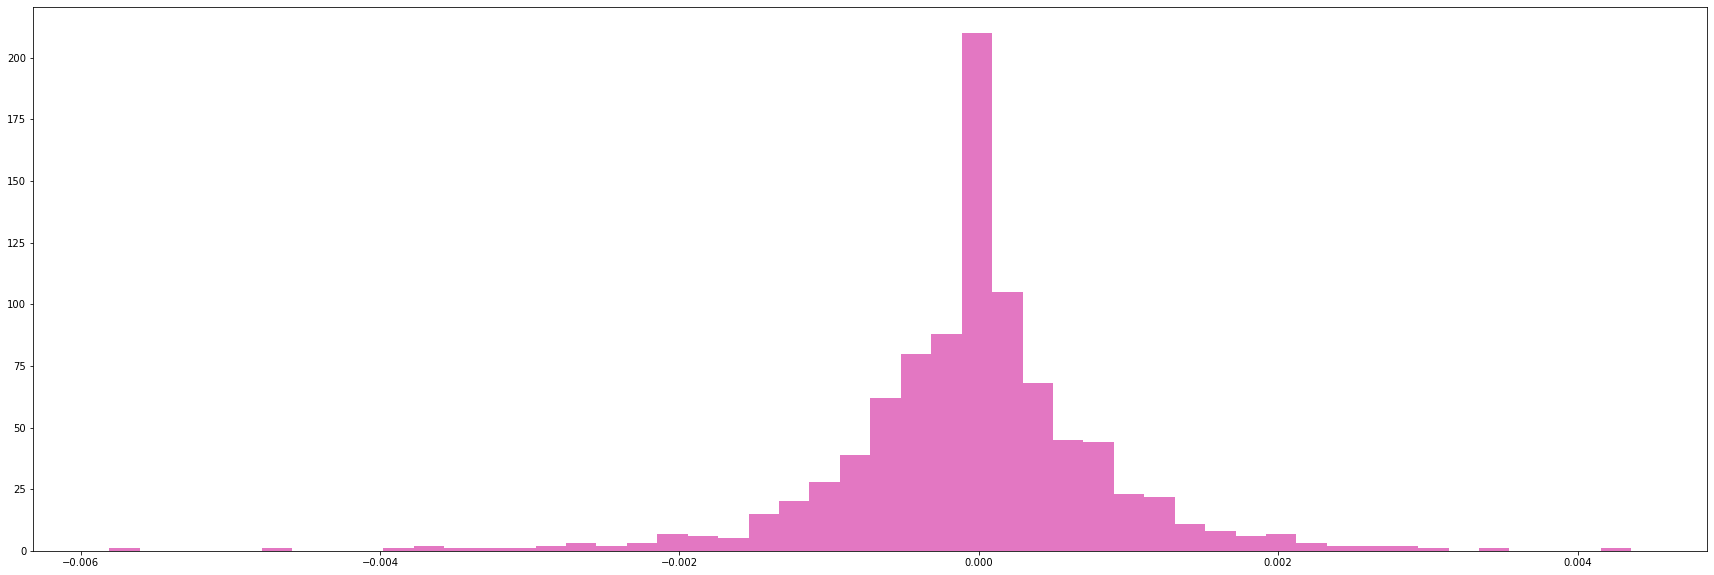

Ret_81


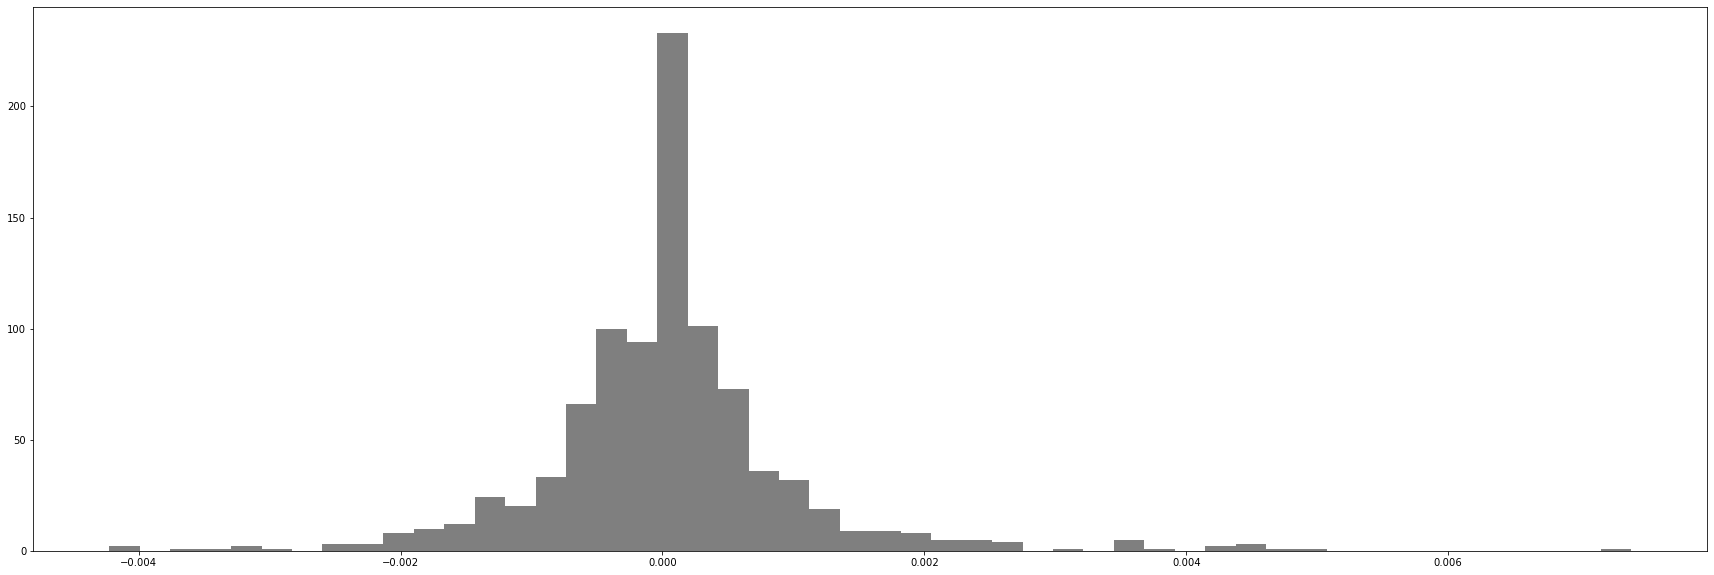

Ret_82


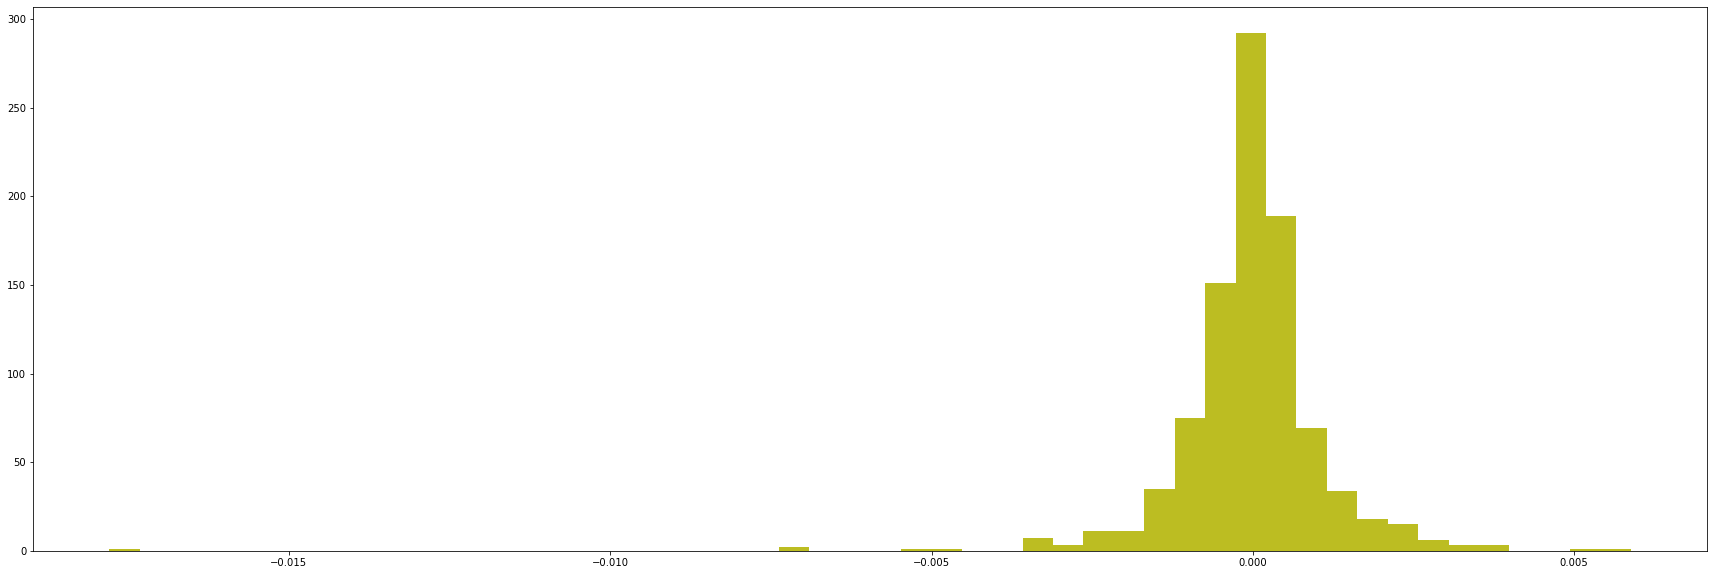

Ret_83


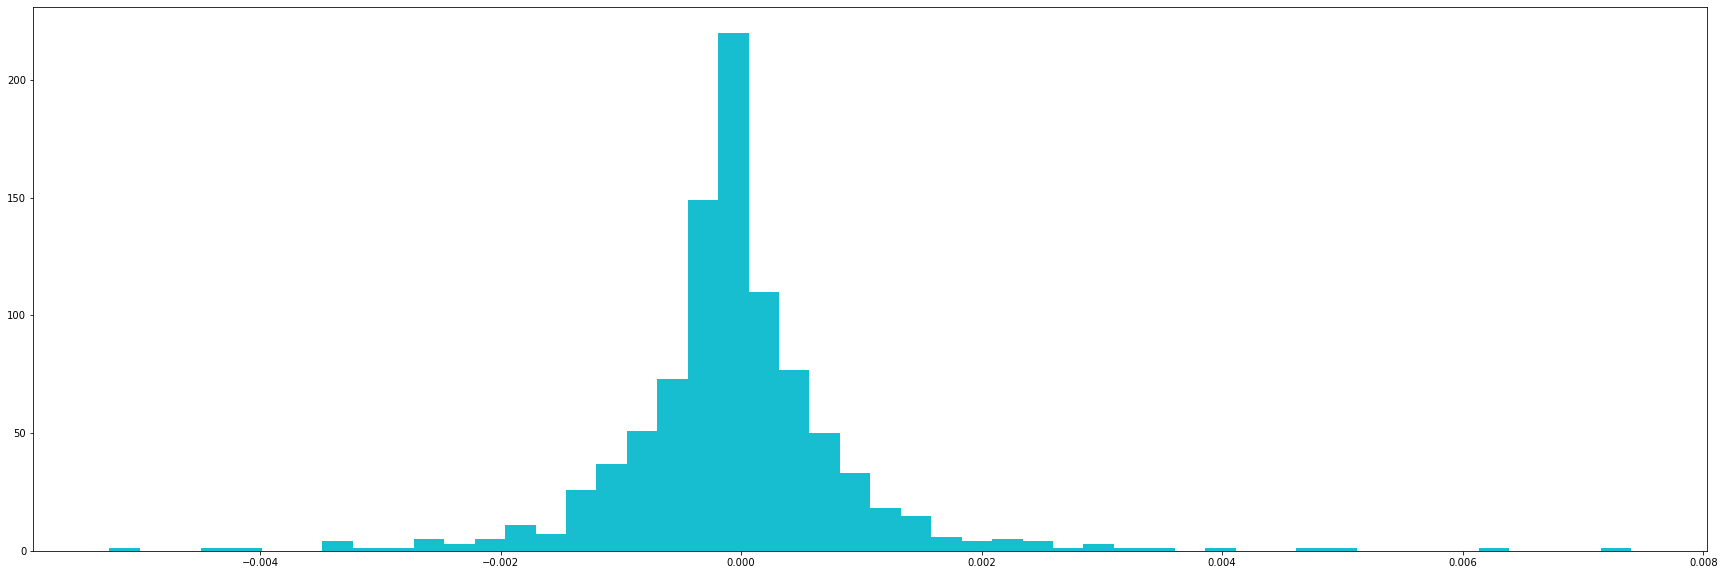

Ret_84


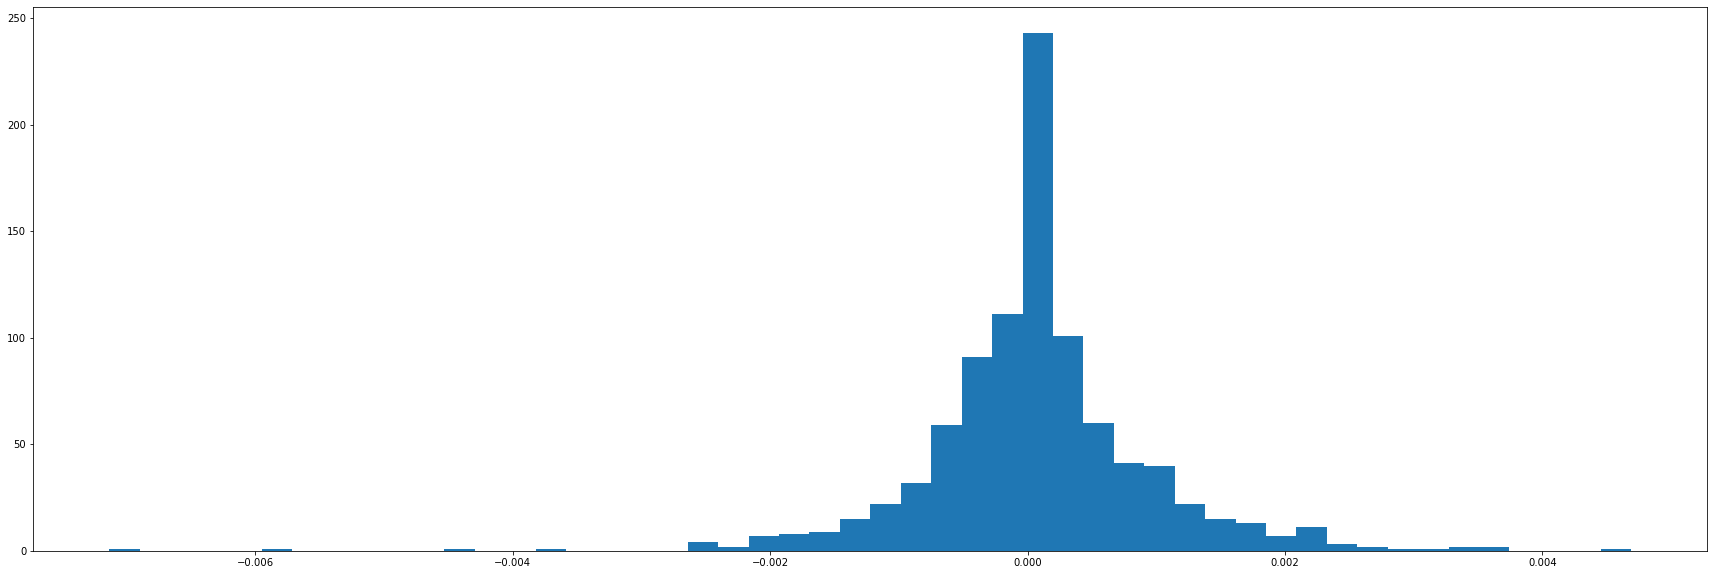

Ret_85


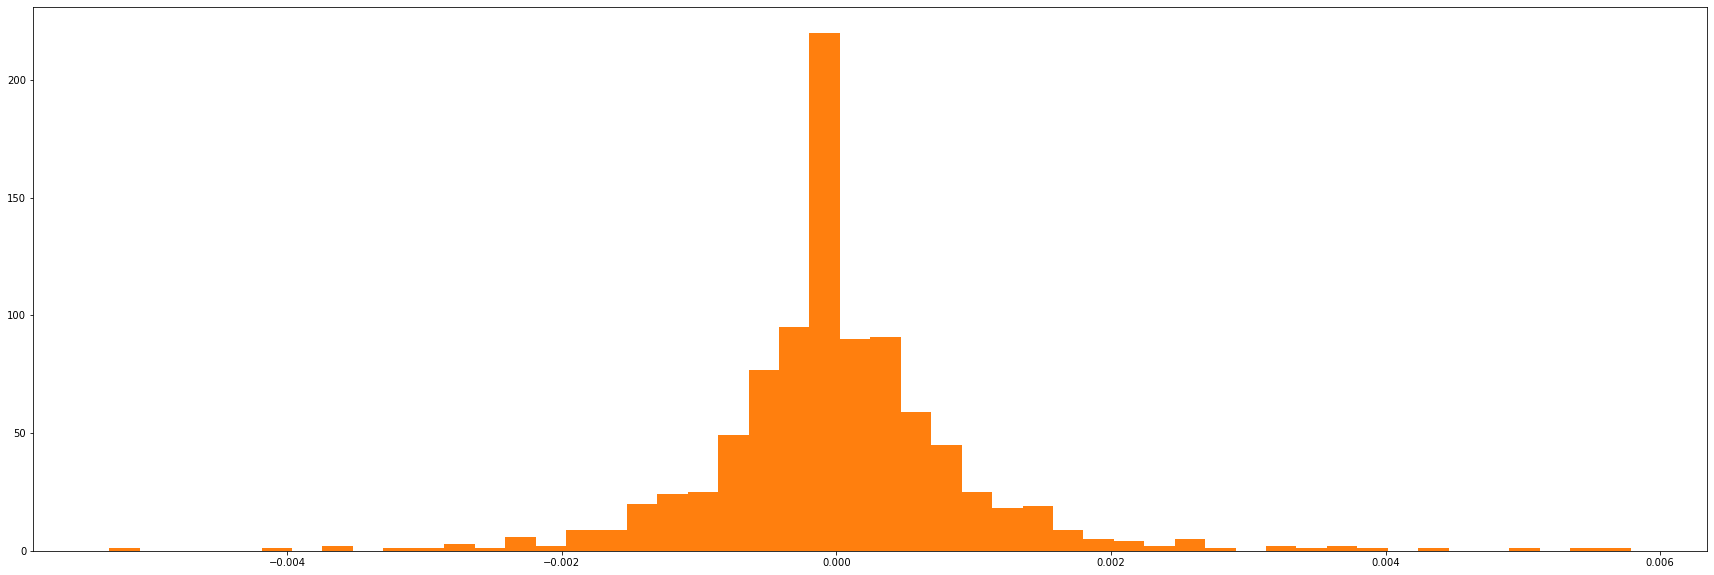

Ret_86


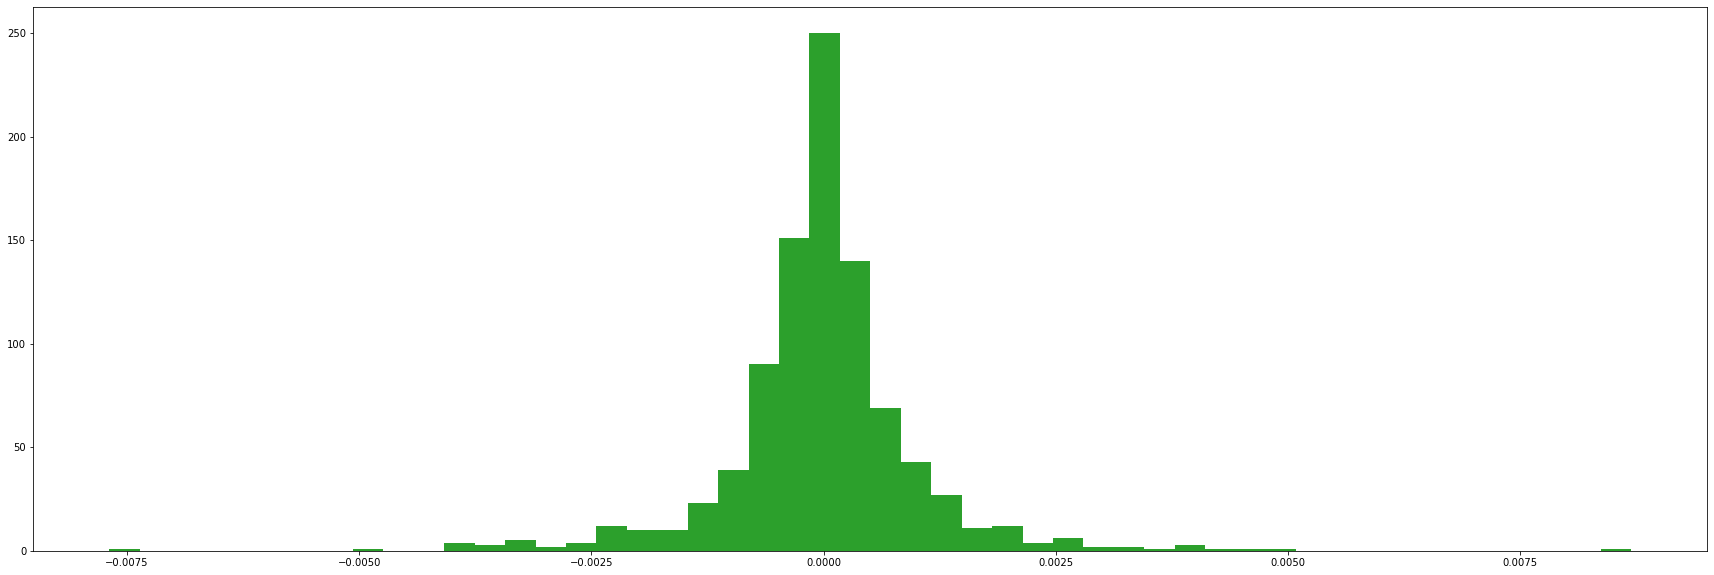

Ret_87


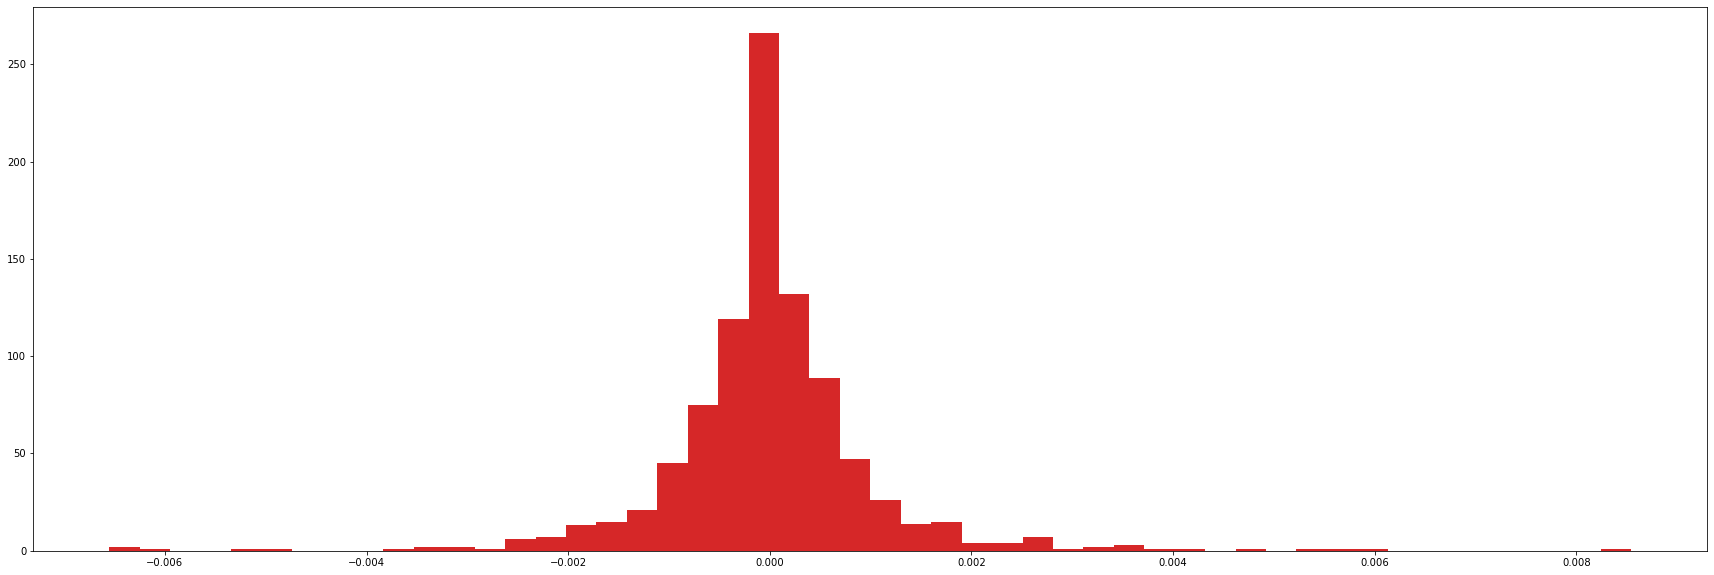

Ret_88


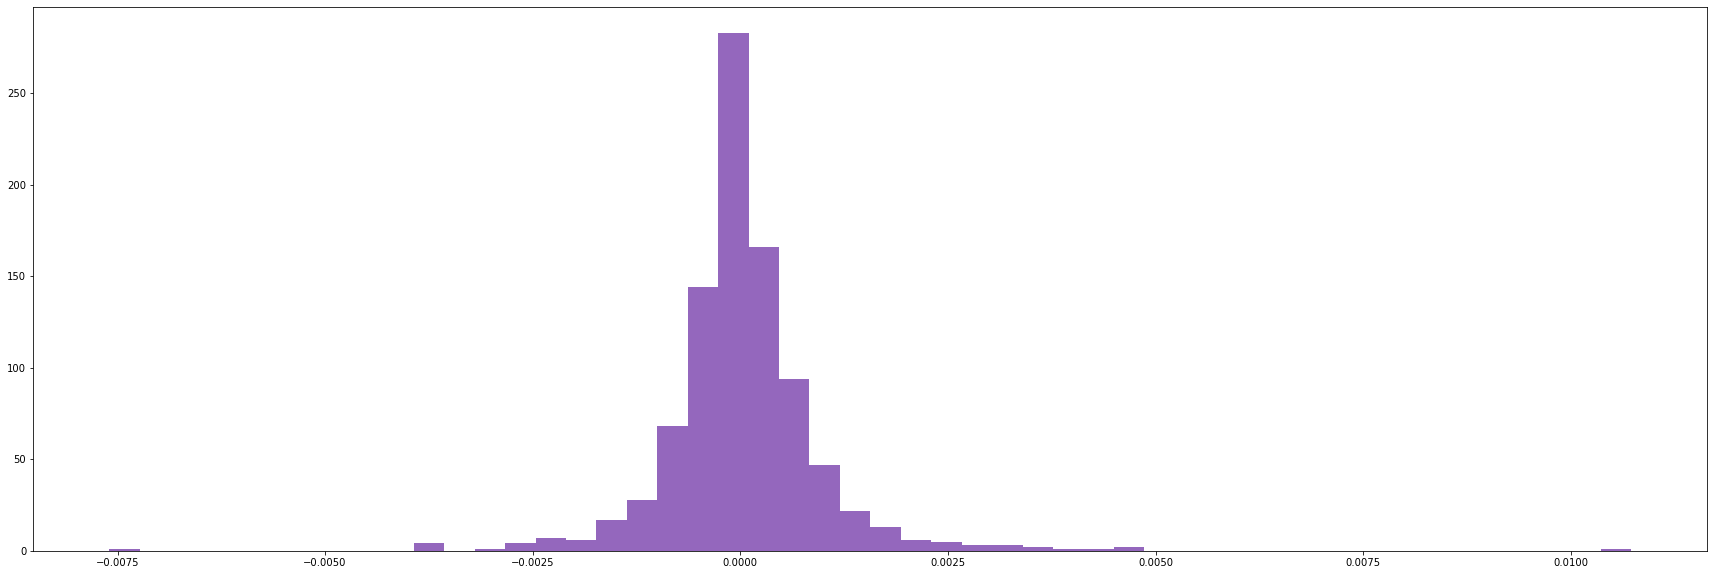

Ret_89


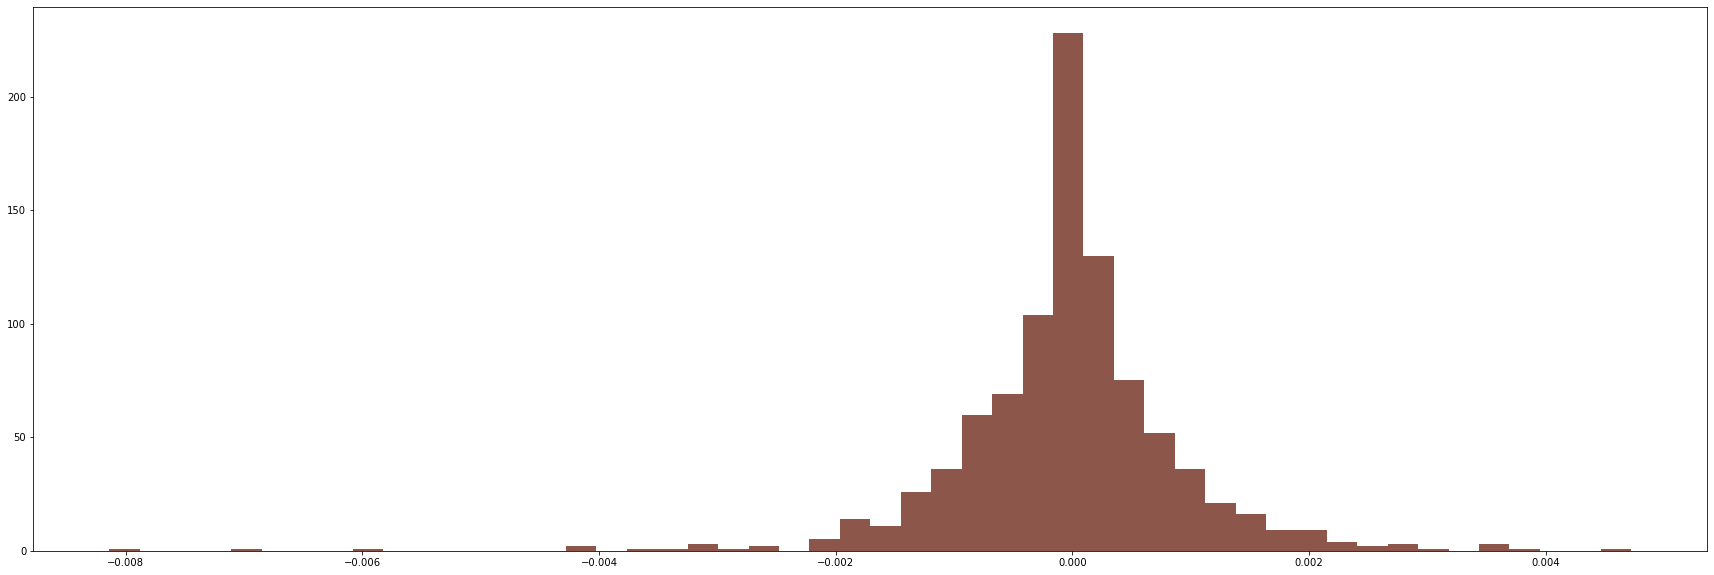

Ret_90


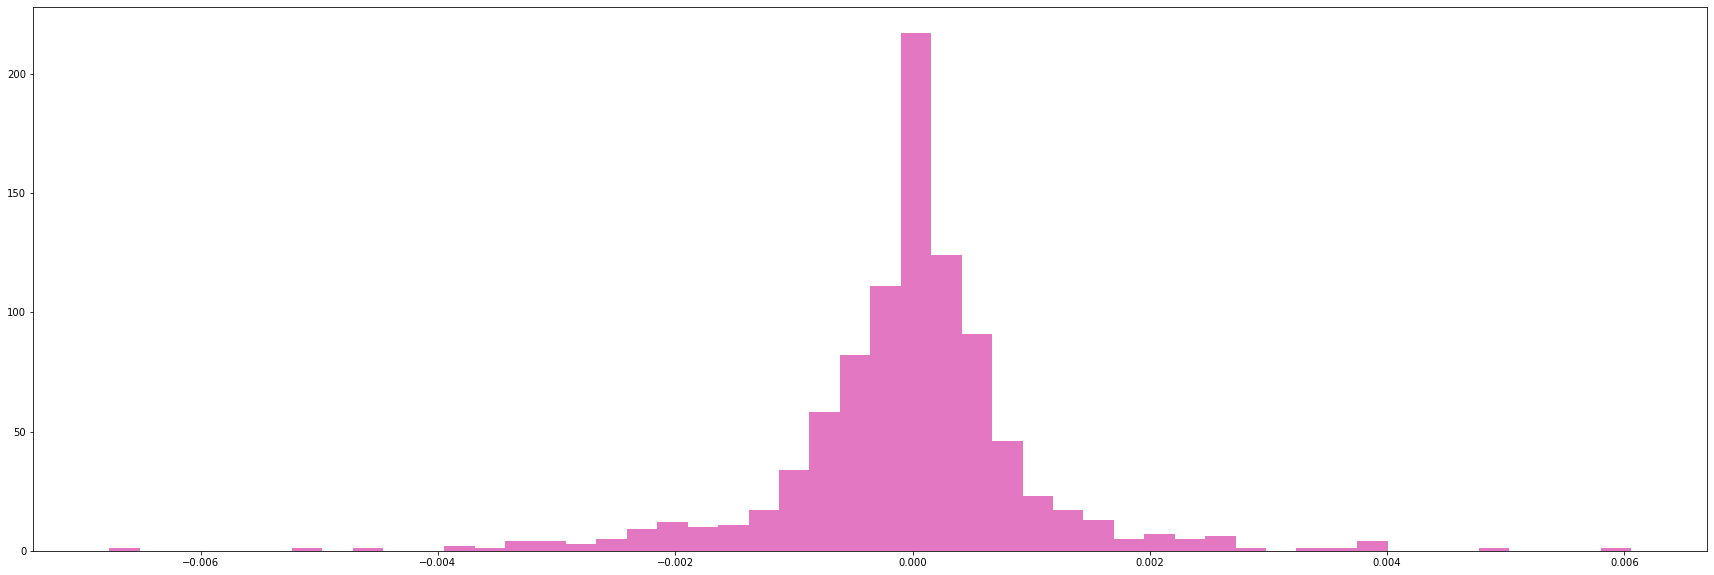

Ret_91


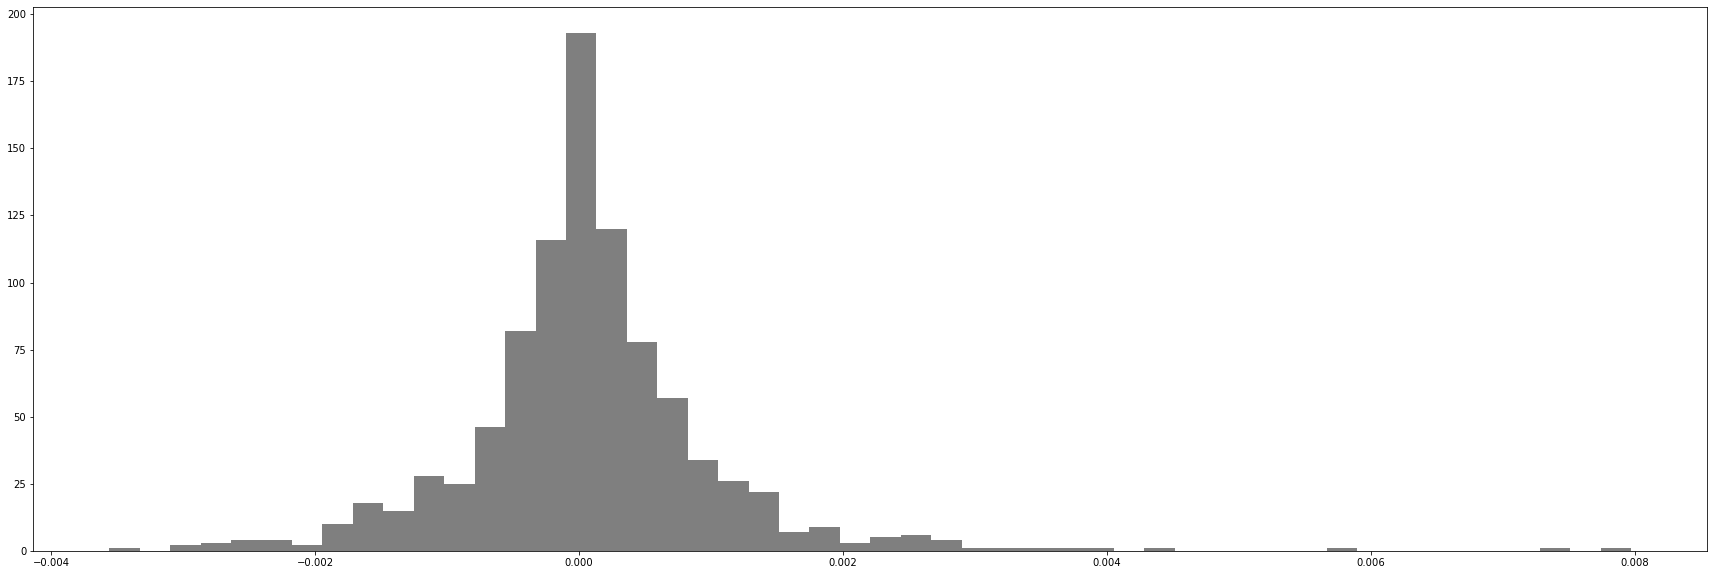

Ret_92


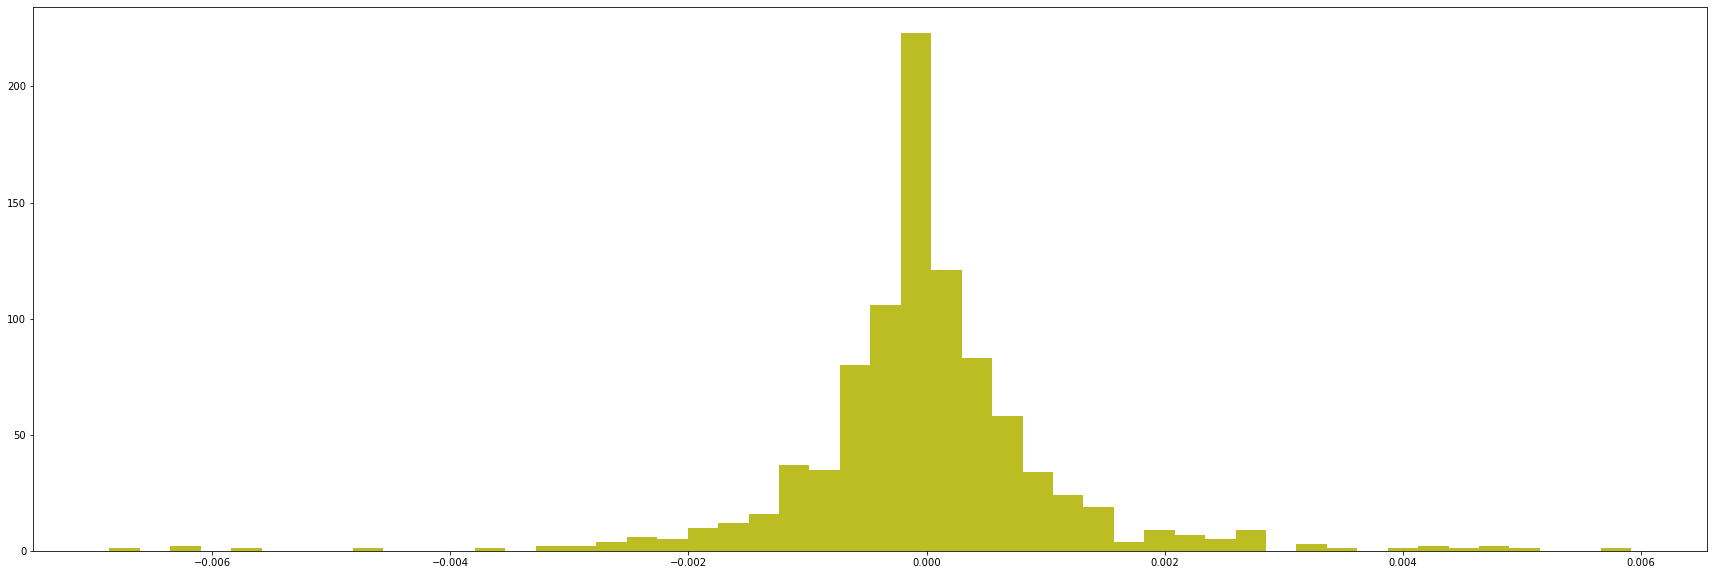

Ret_93


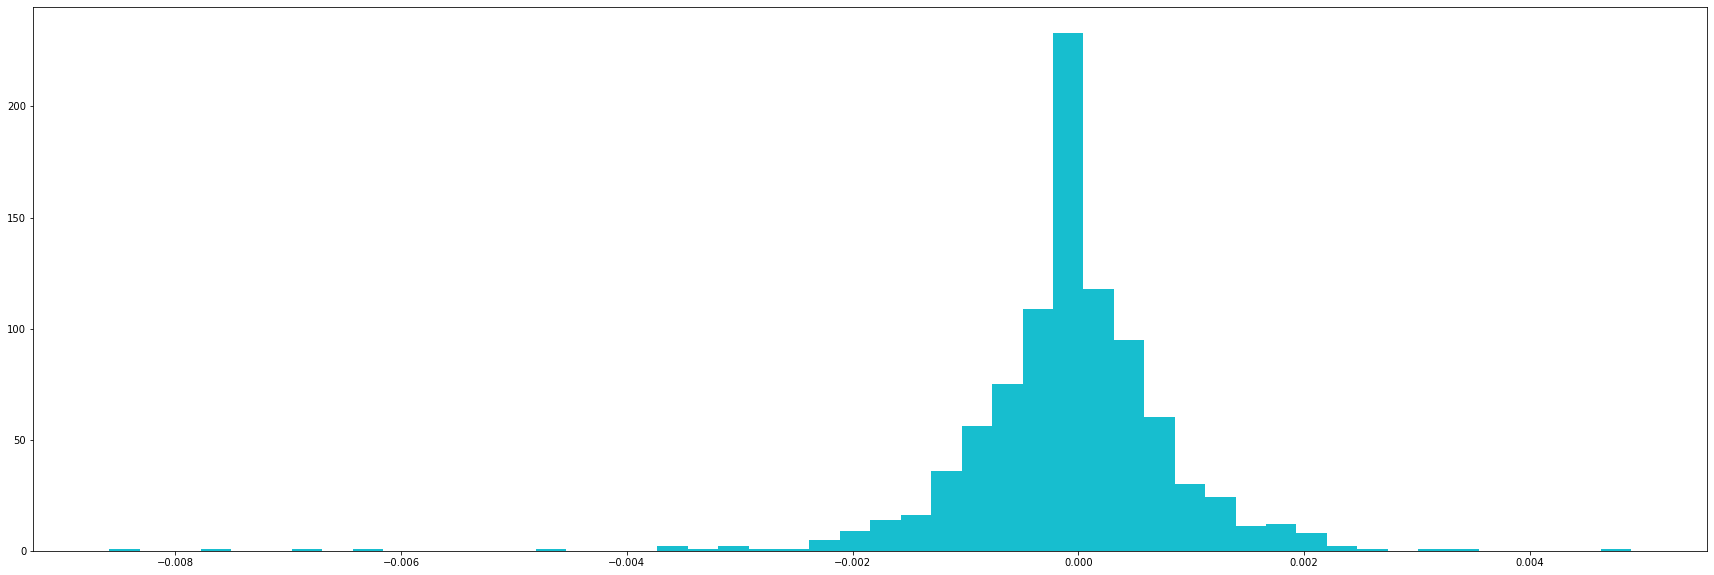

Ret_94


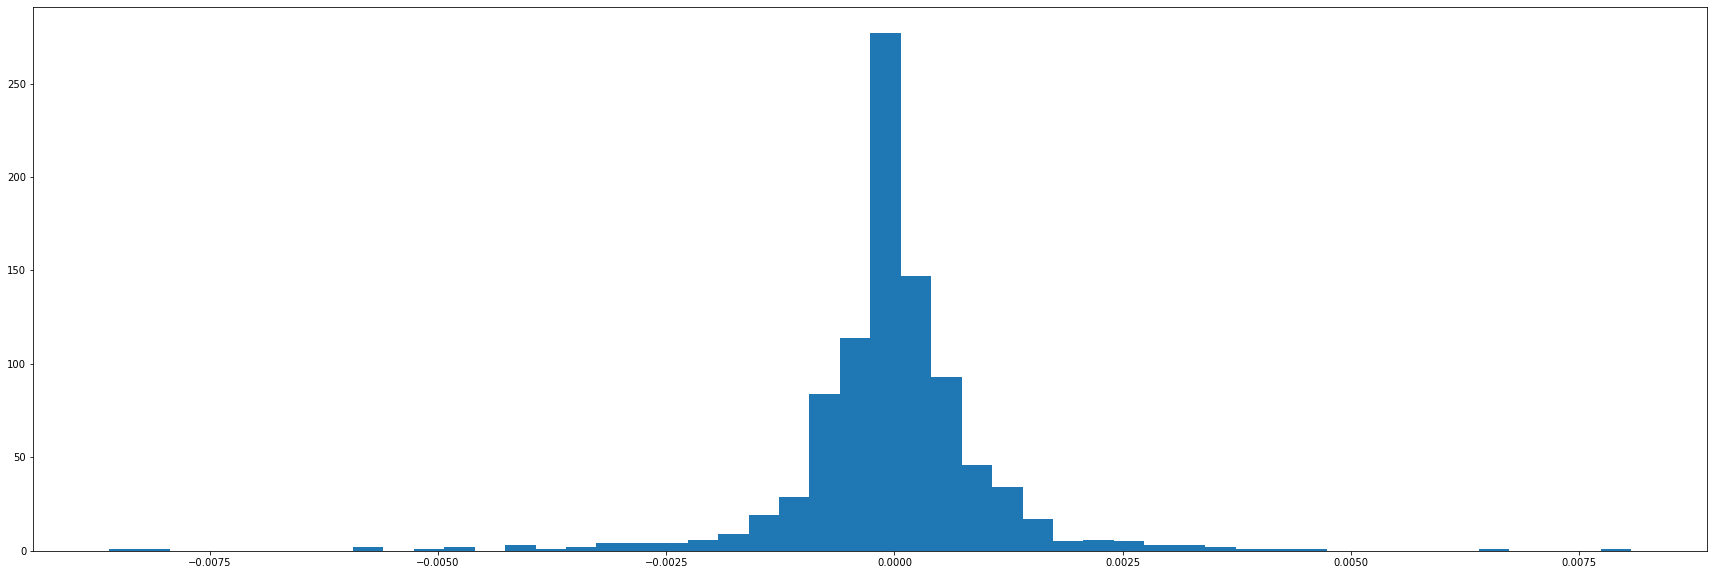

Ret_95


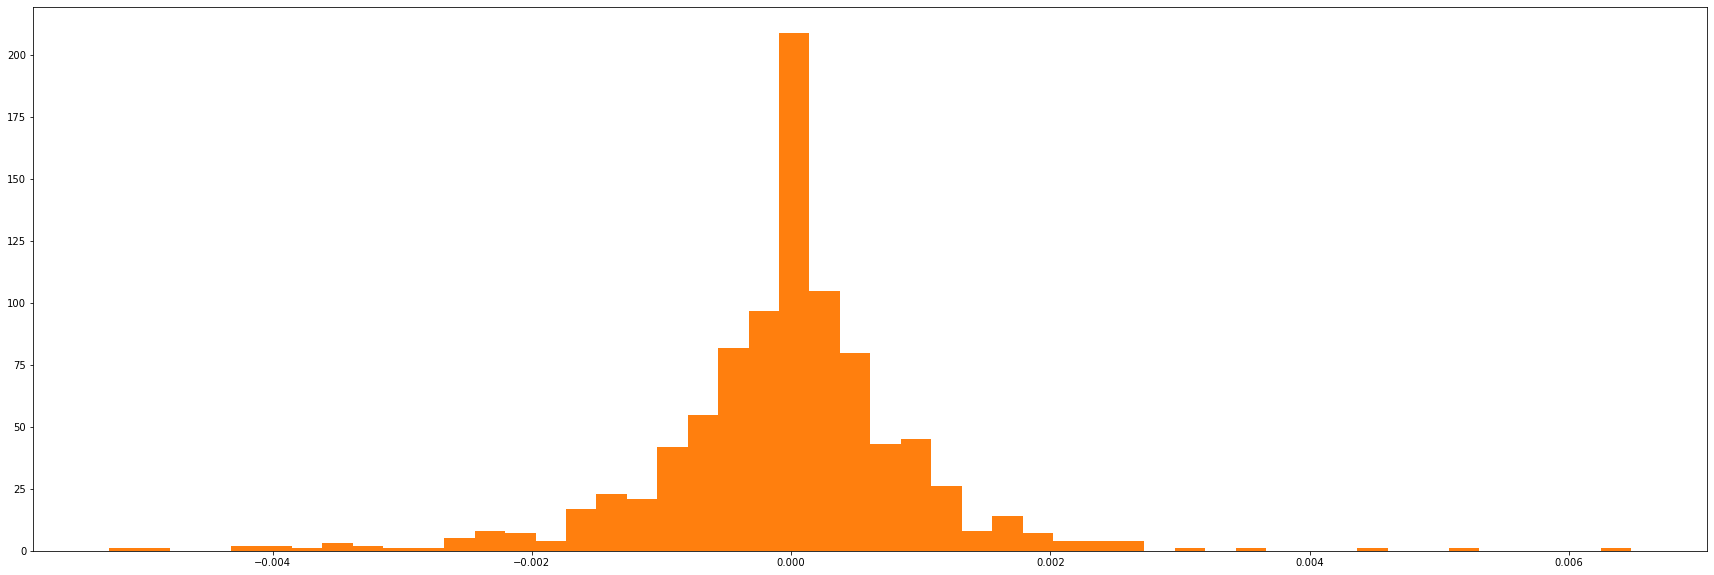

Ret_96


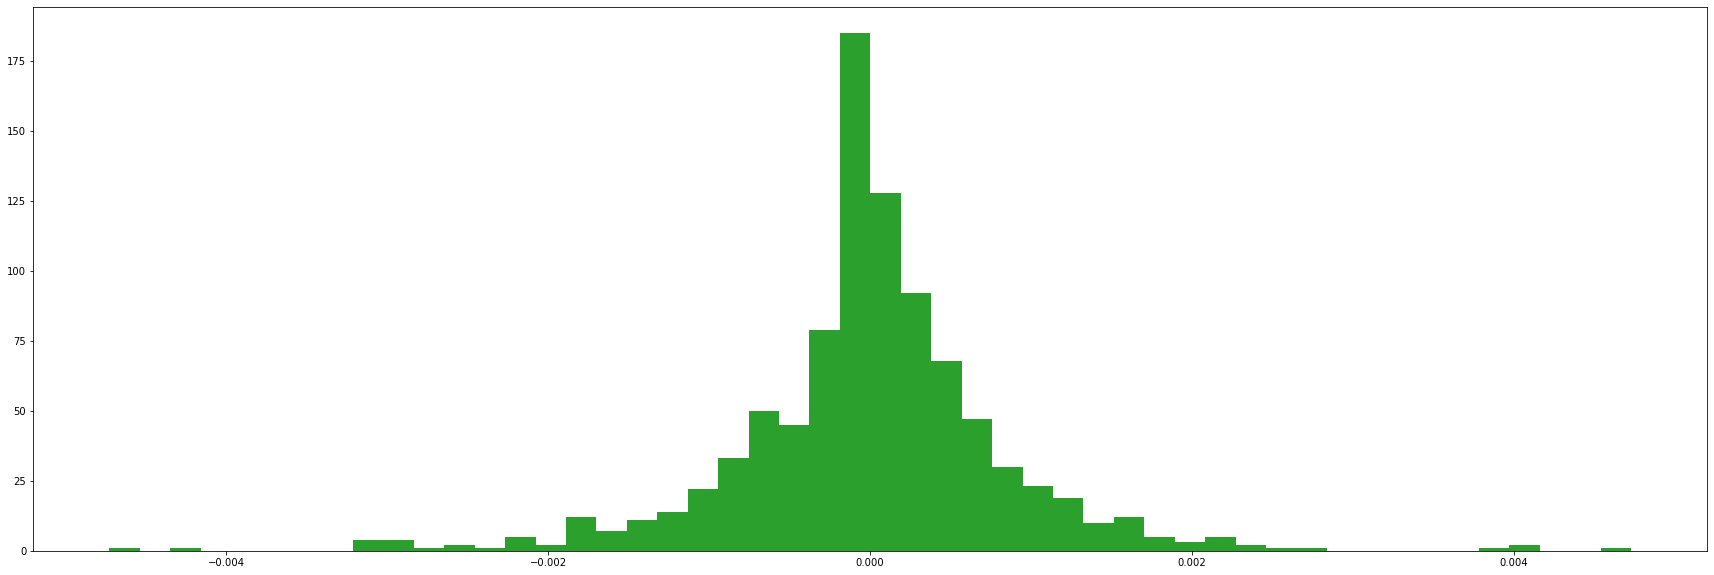

Ret_97


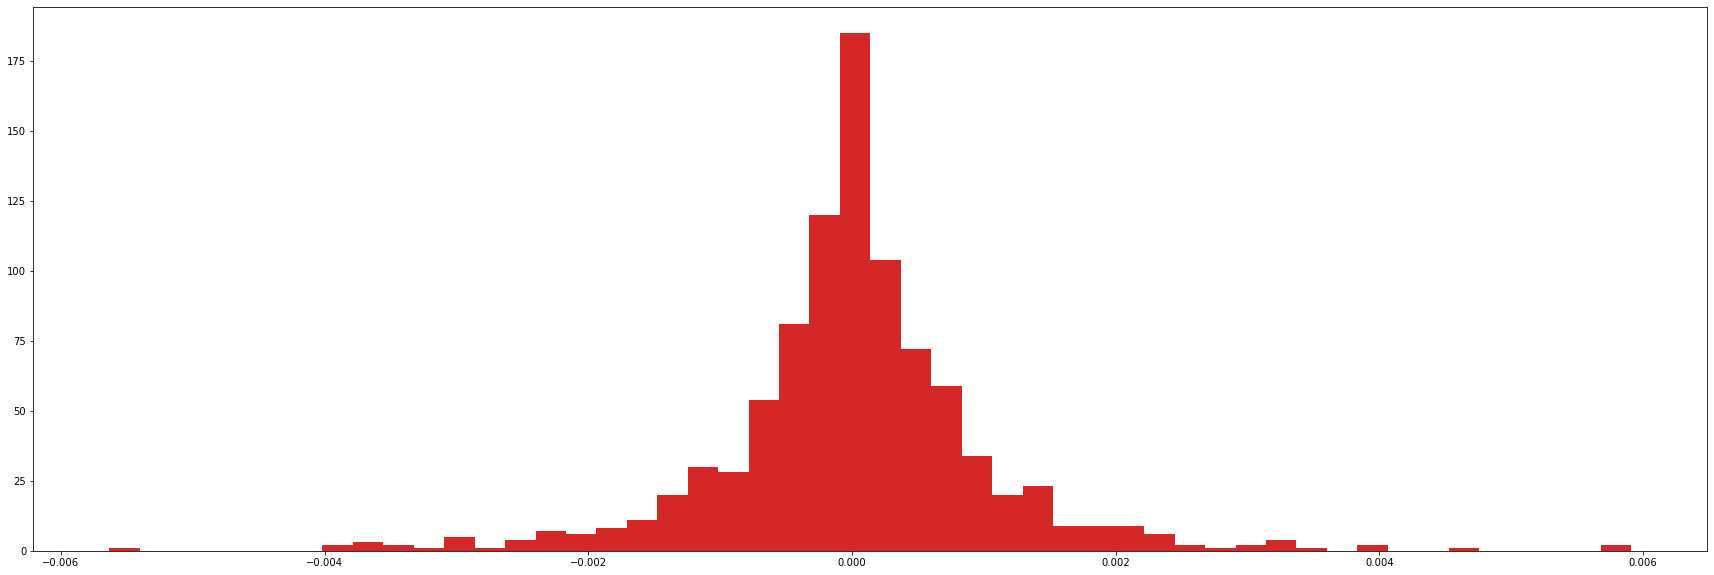

Ret_98


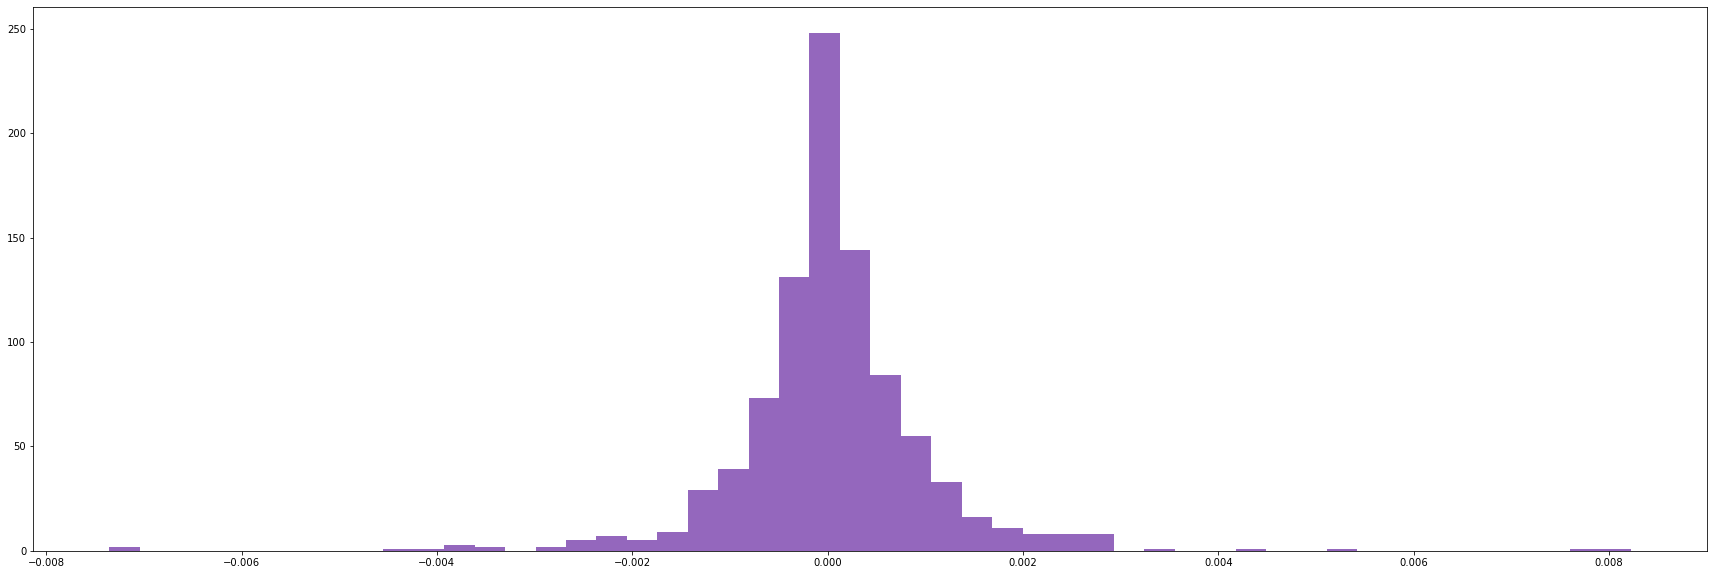

Ret_99


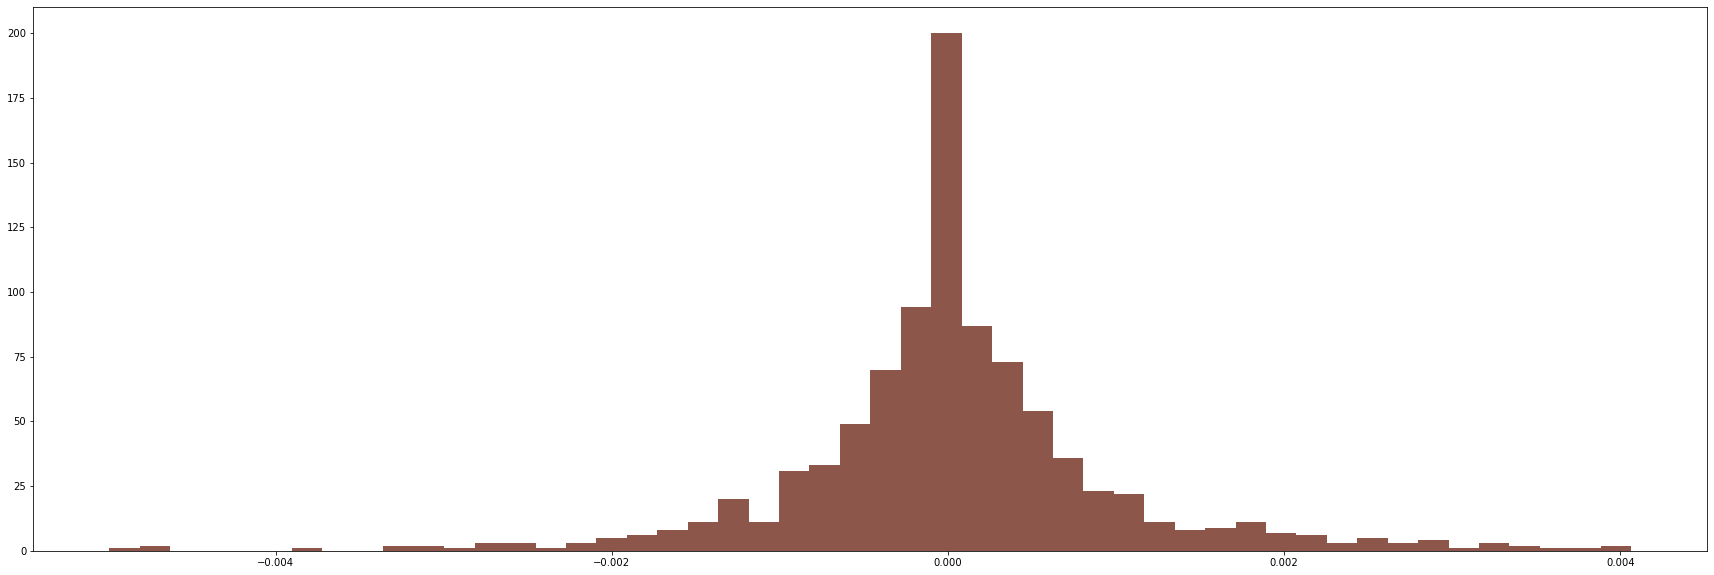

Ret_100


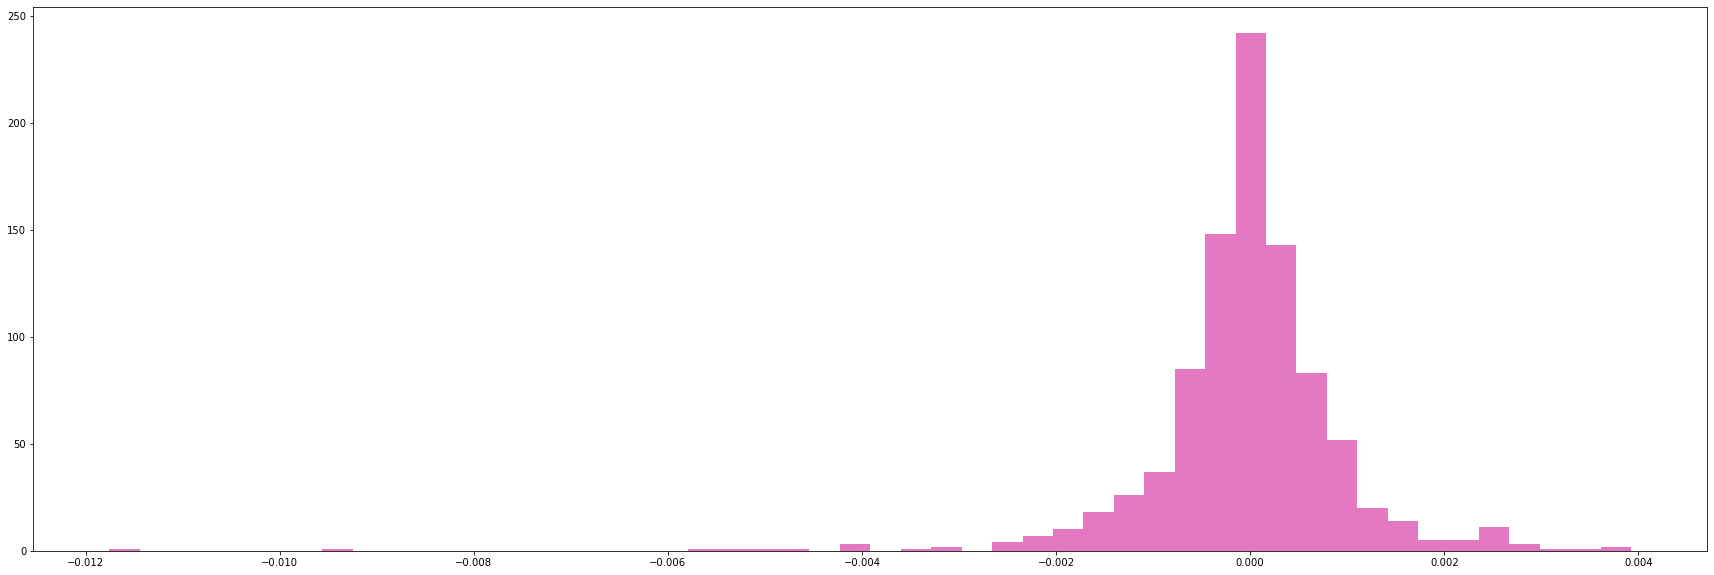

Ret_101


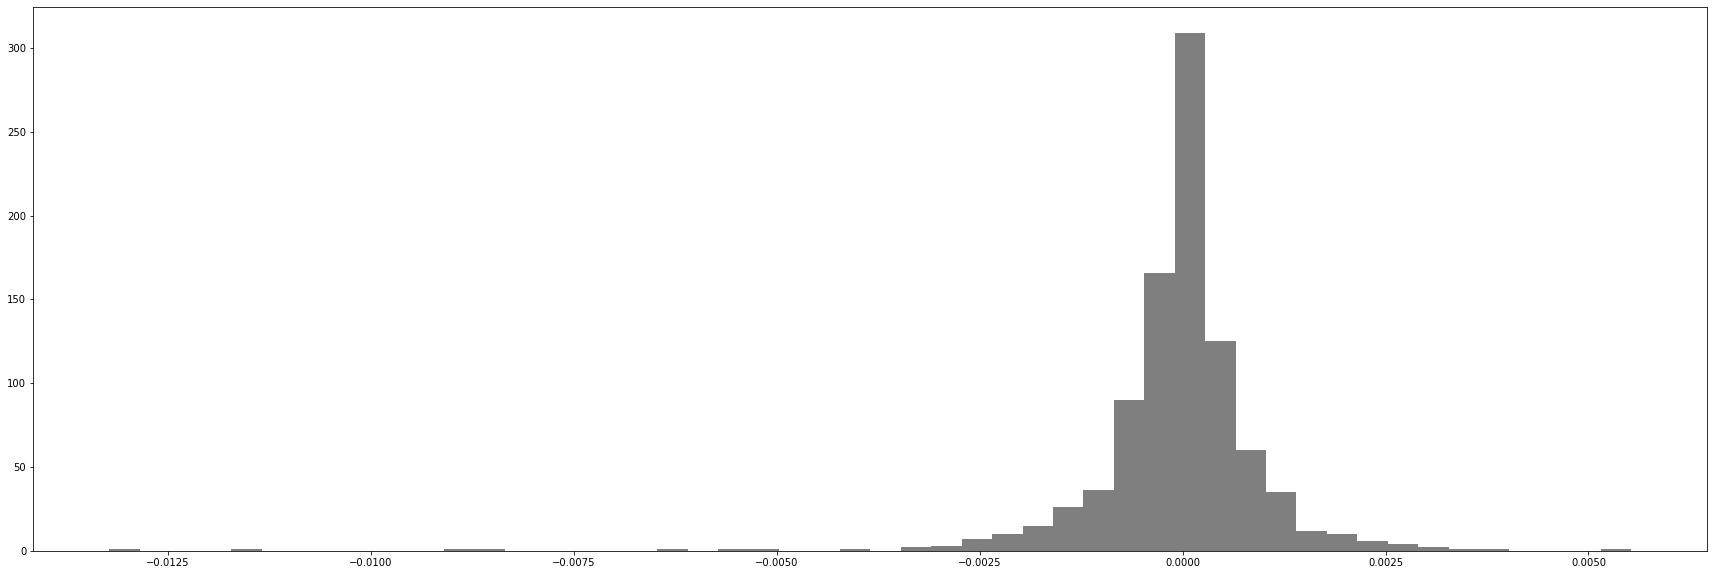

Ret_102


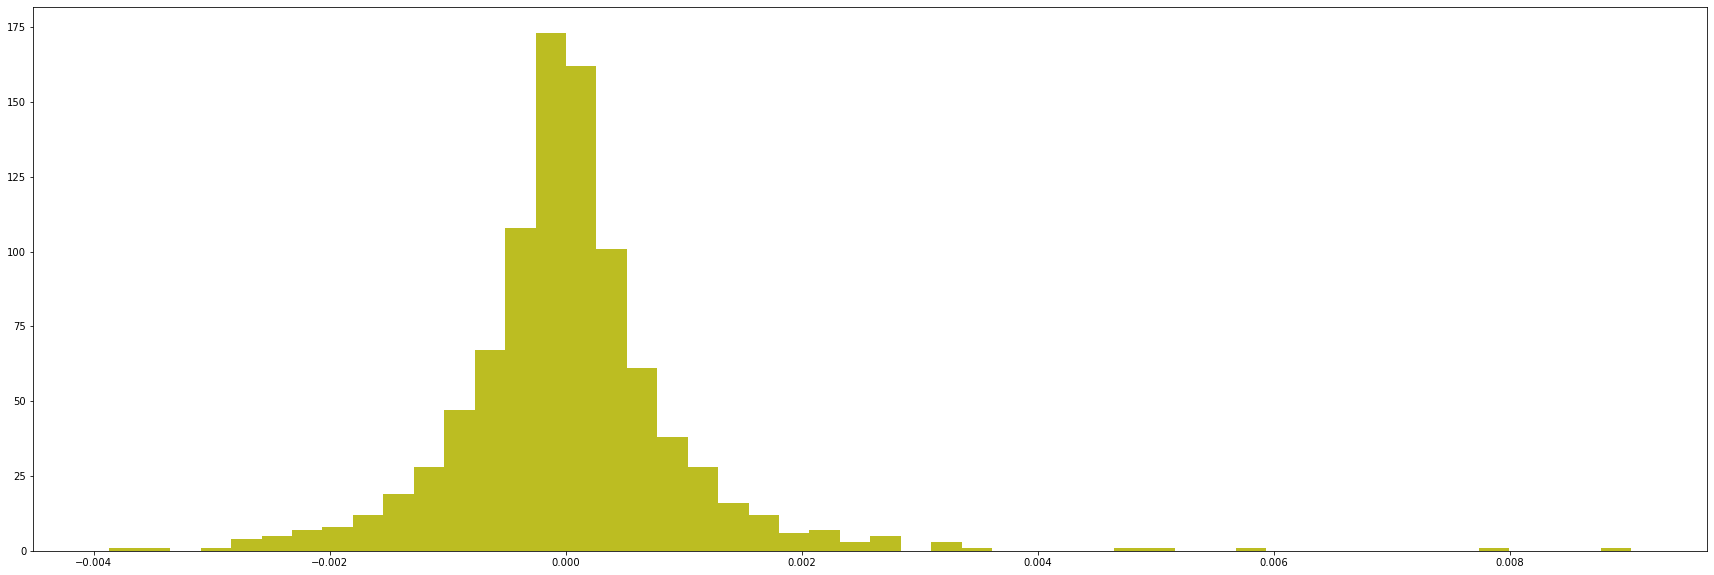

Ret_103


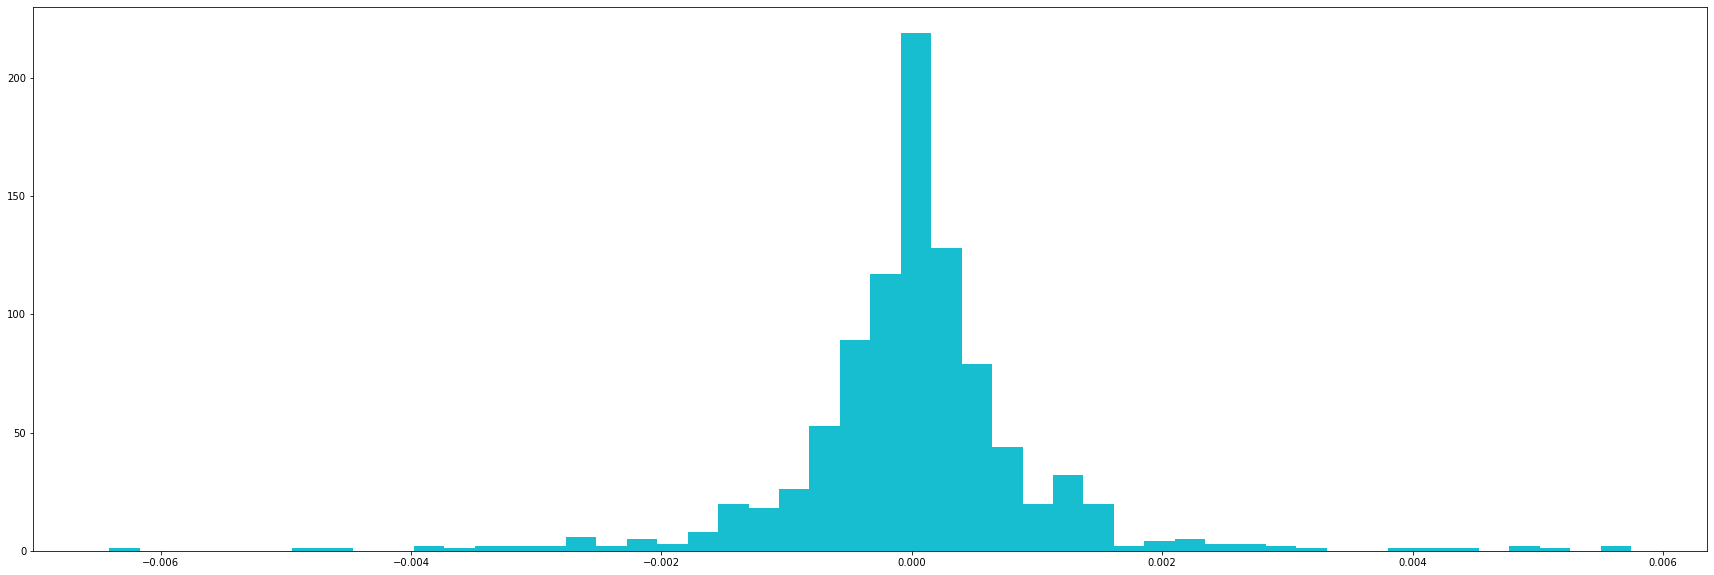

Ret_104


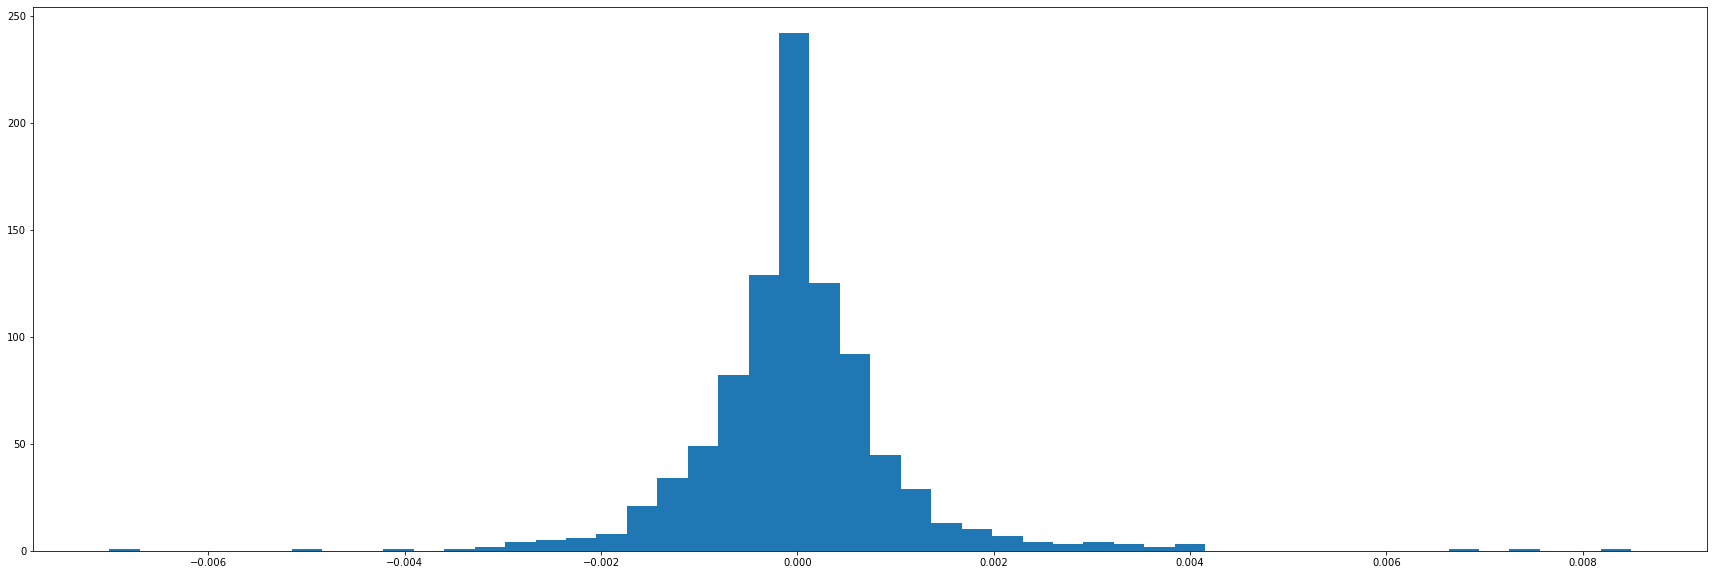

Ret_105


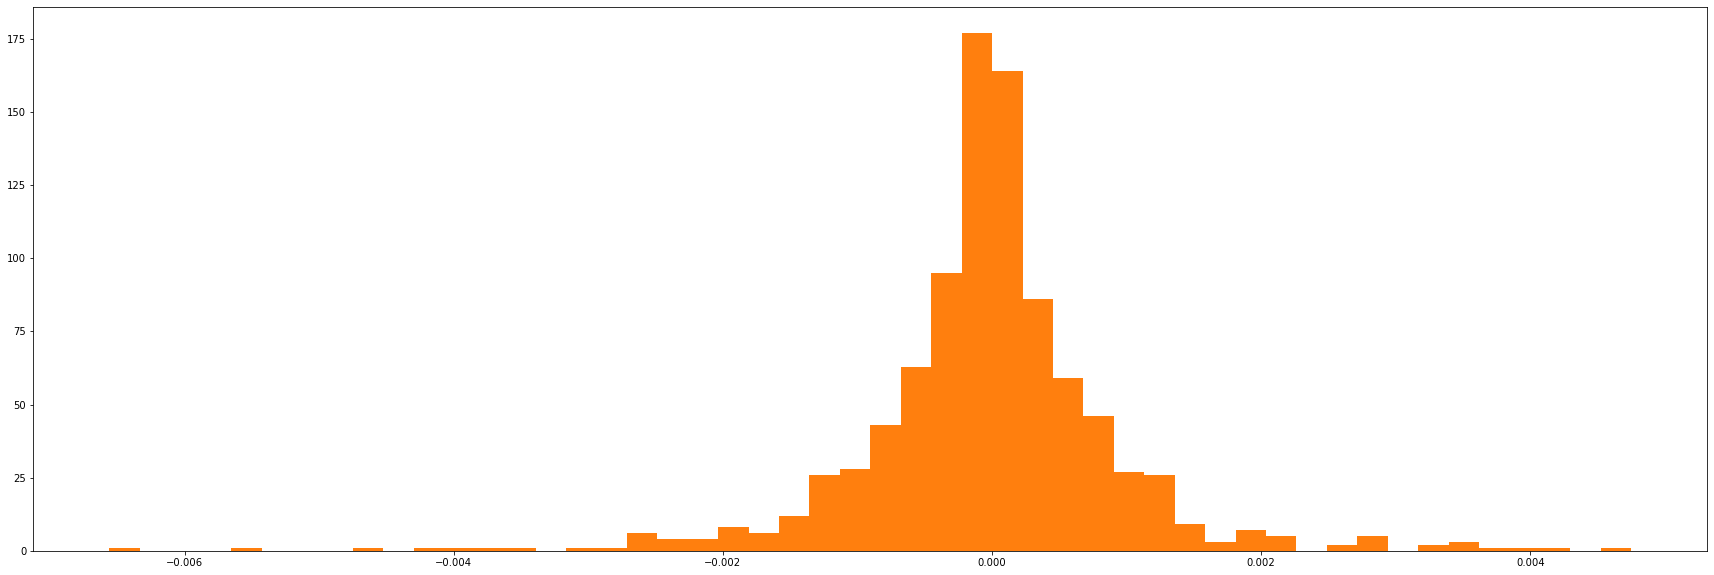

Ret_106


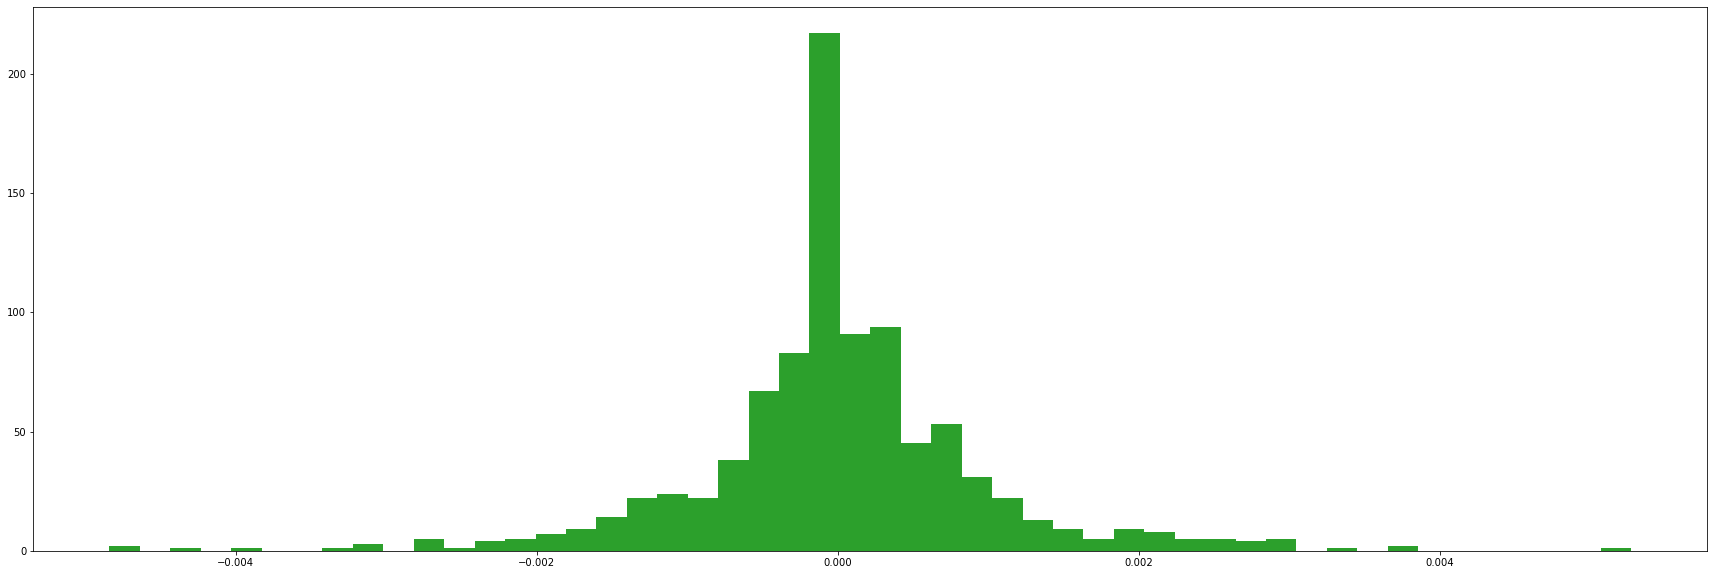

Ret_107


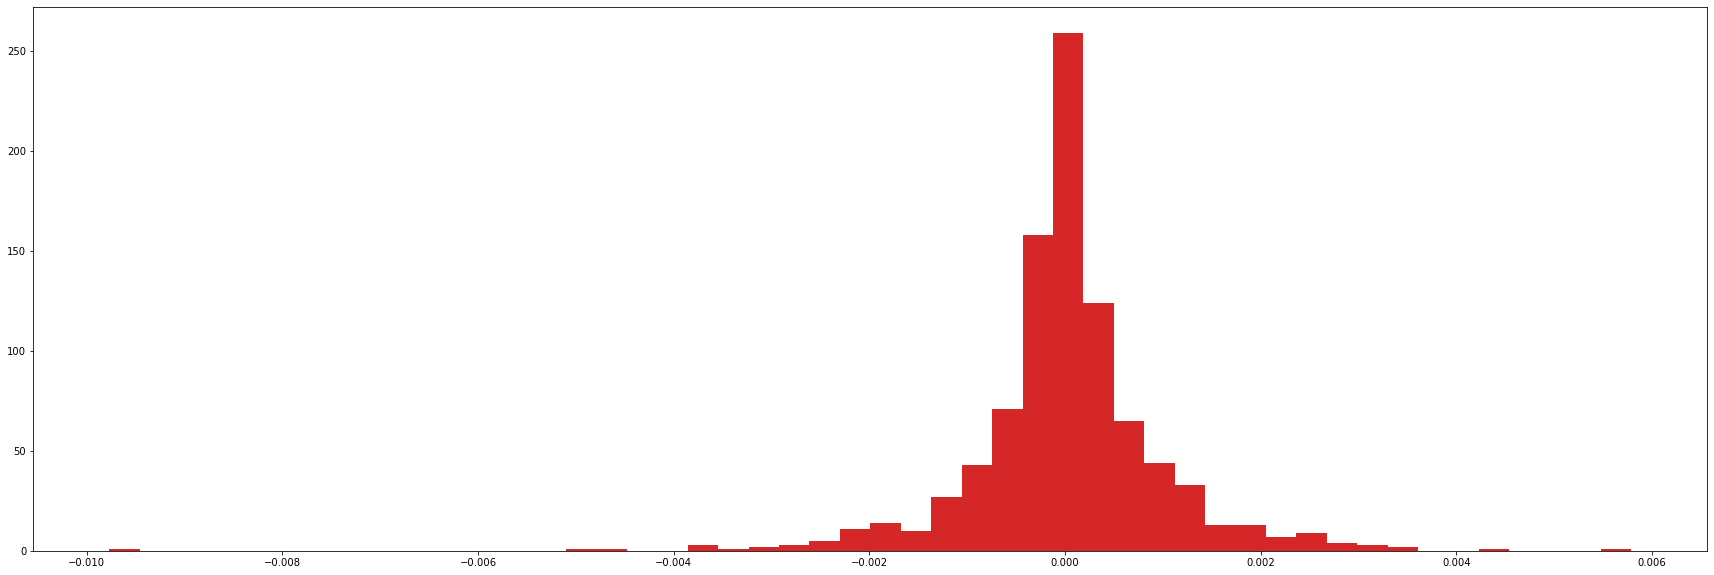

Ret_108


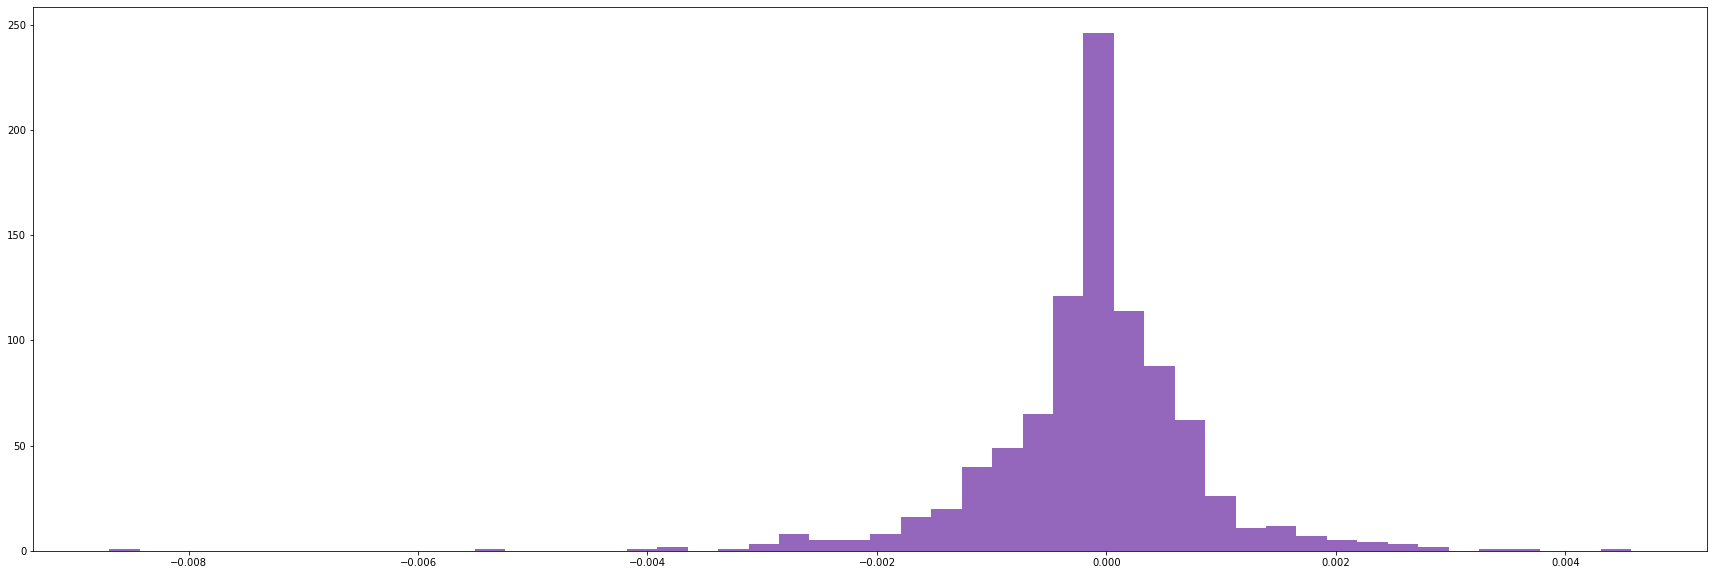

Ret_109


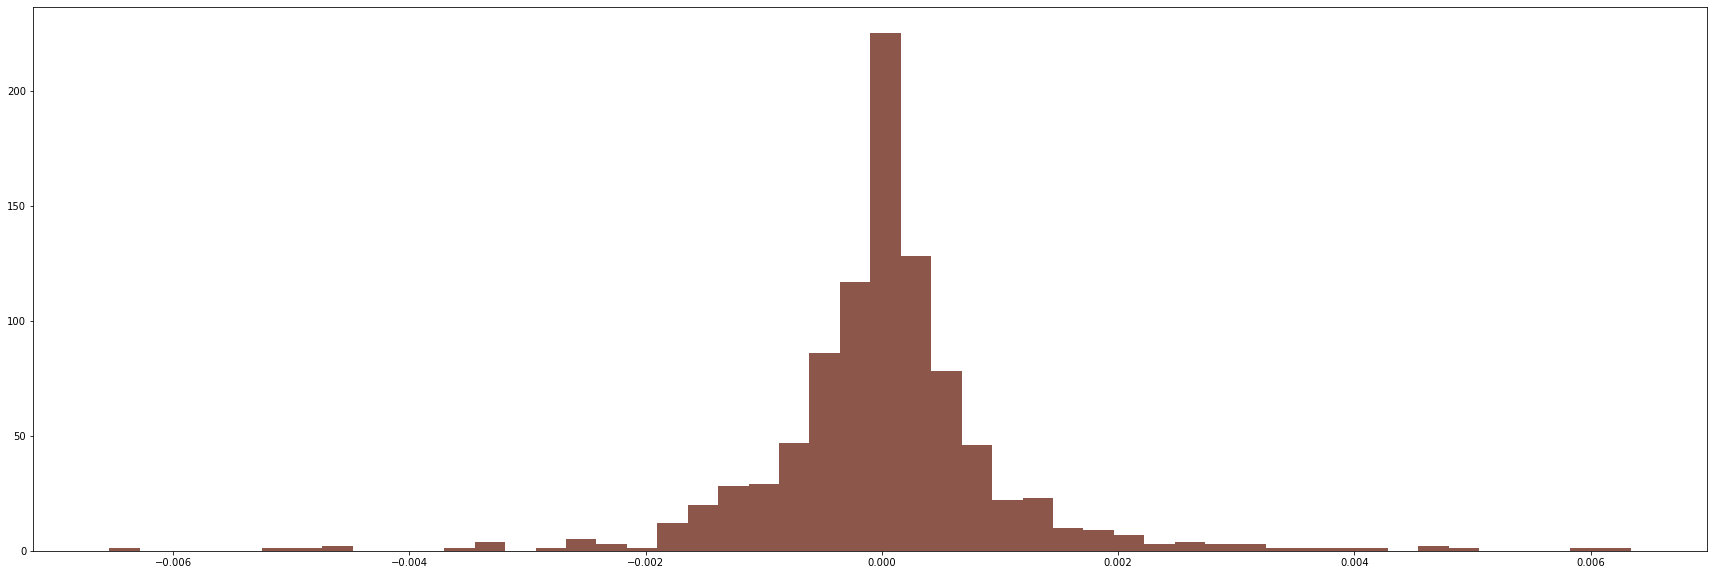

Ret_110


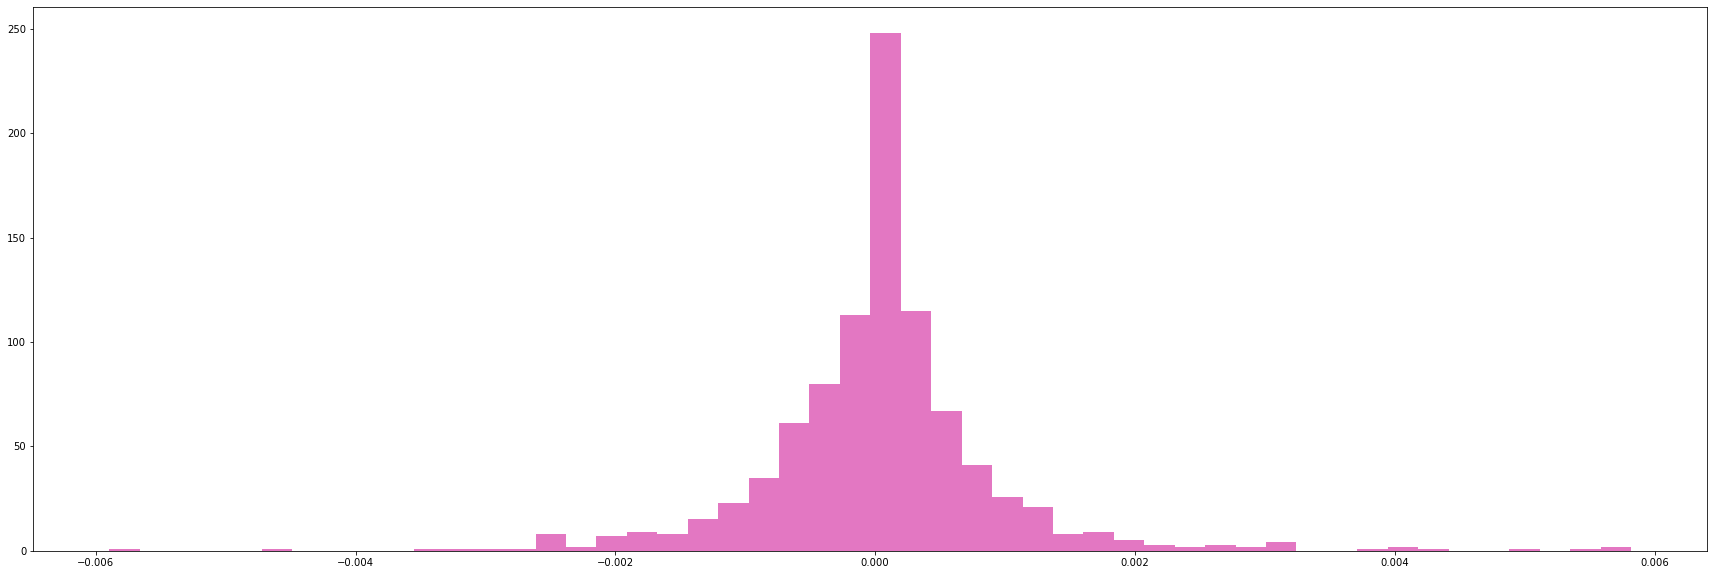

Ret_111


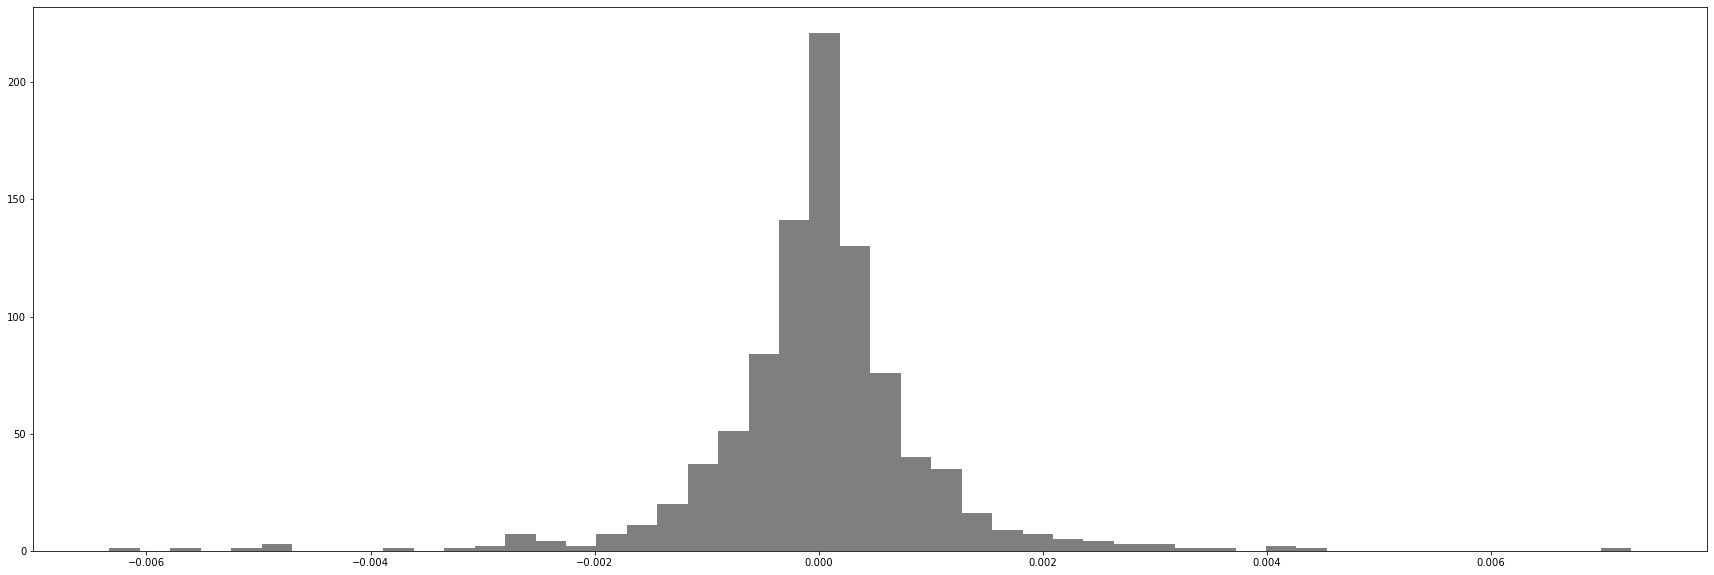

Ret_112


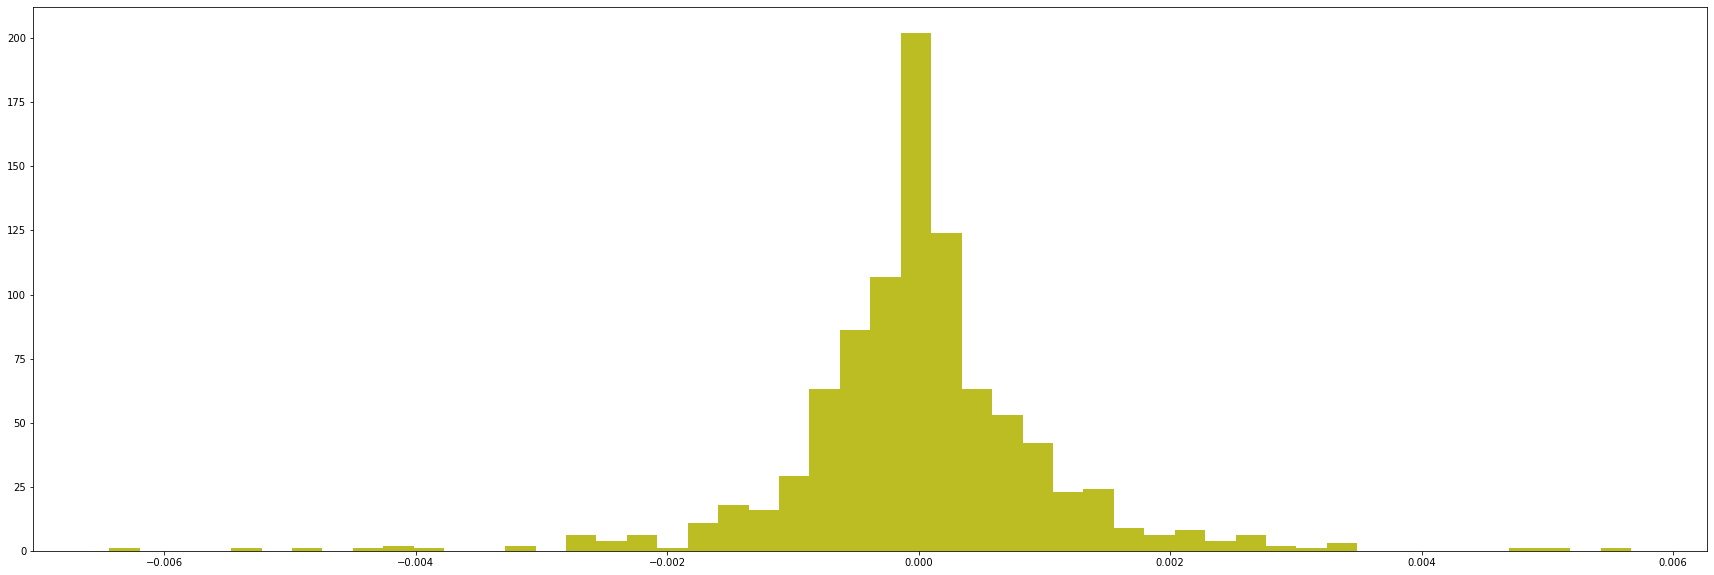

Ret_113


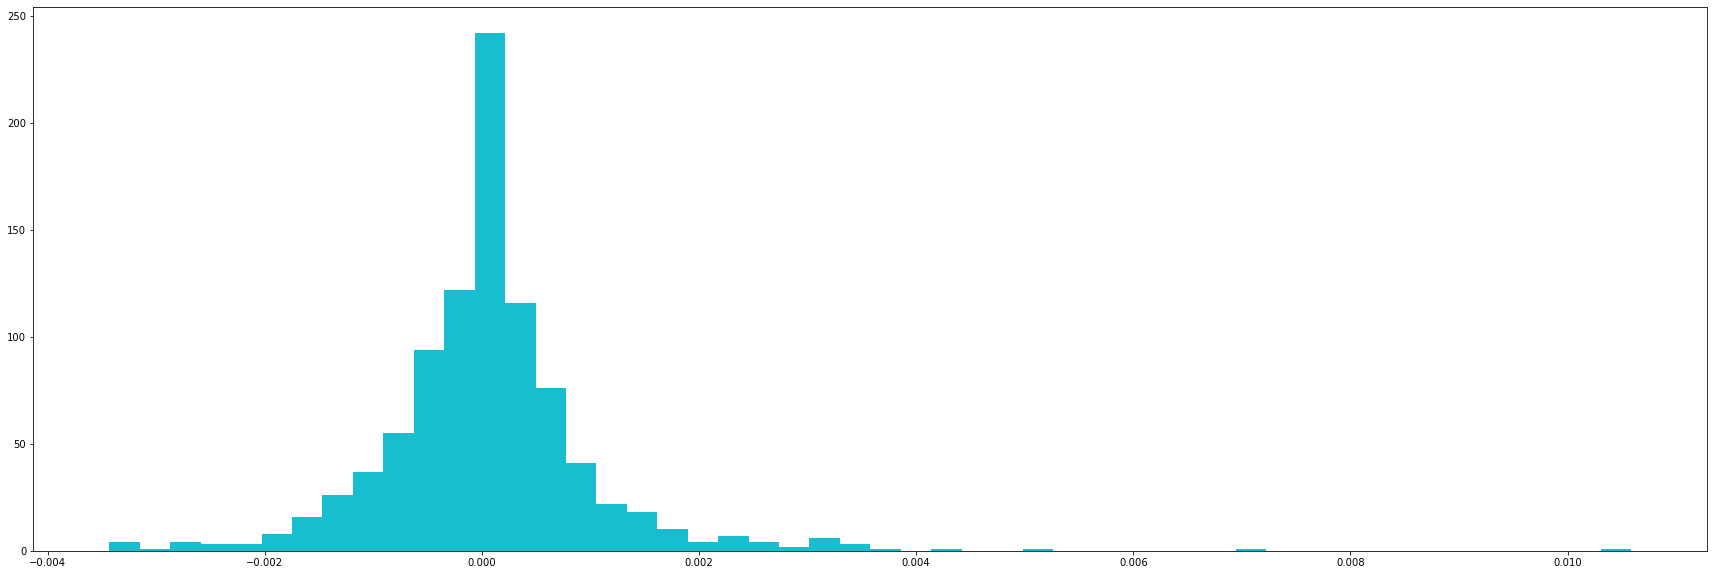

Ret_114


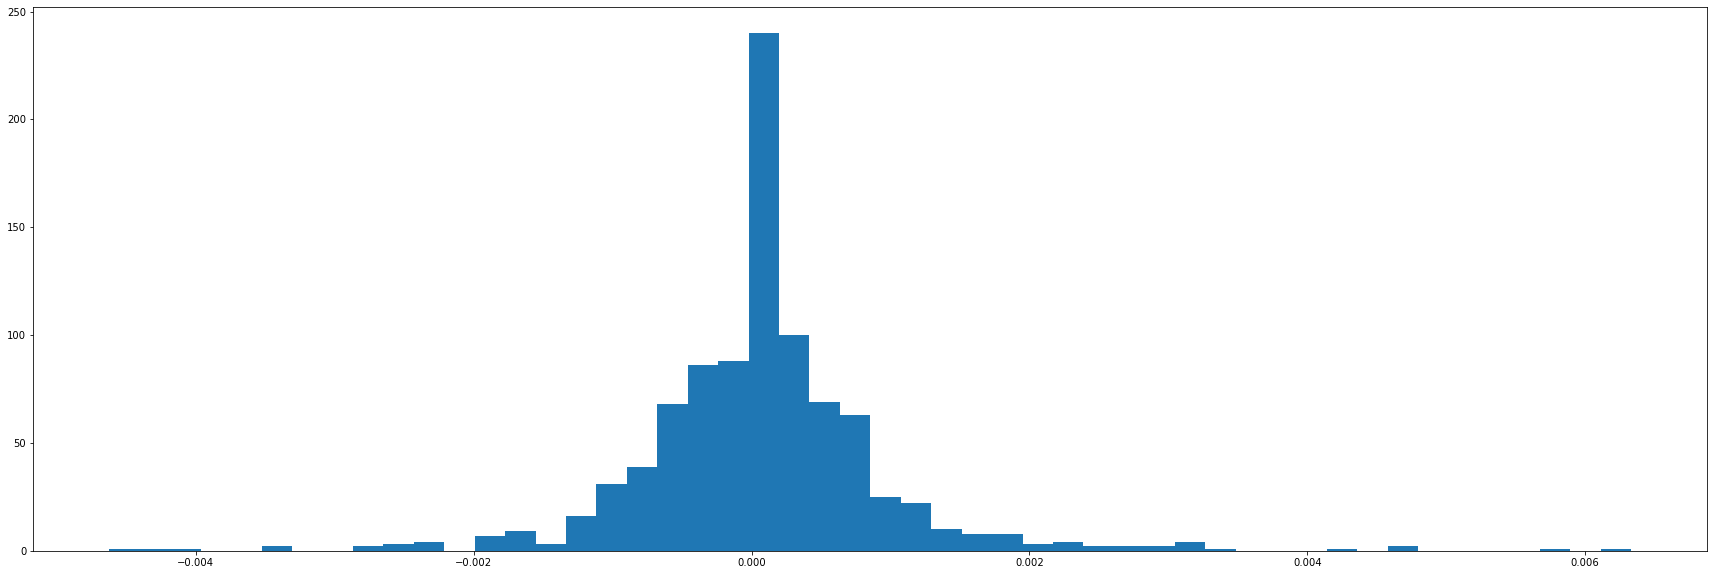

Ret_115


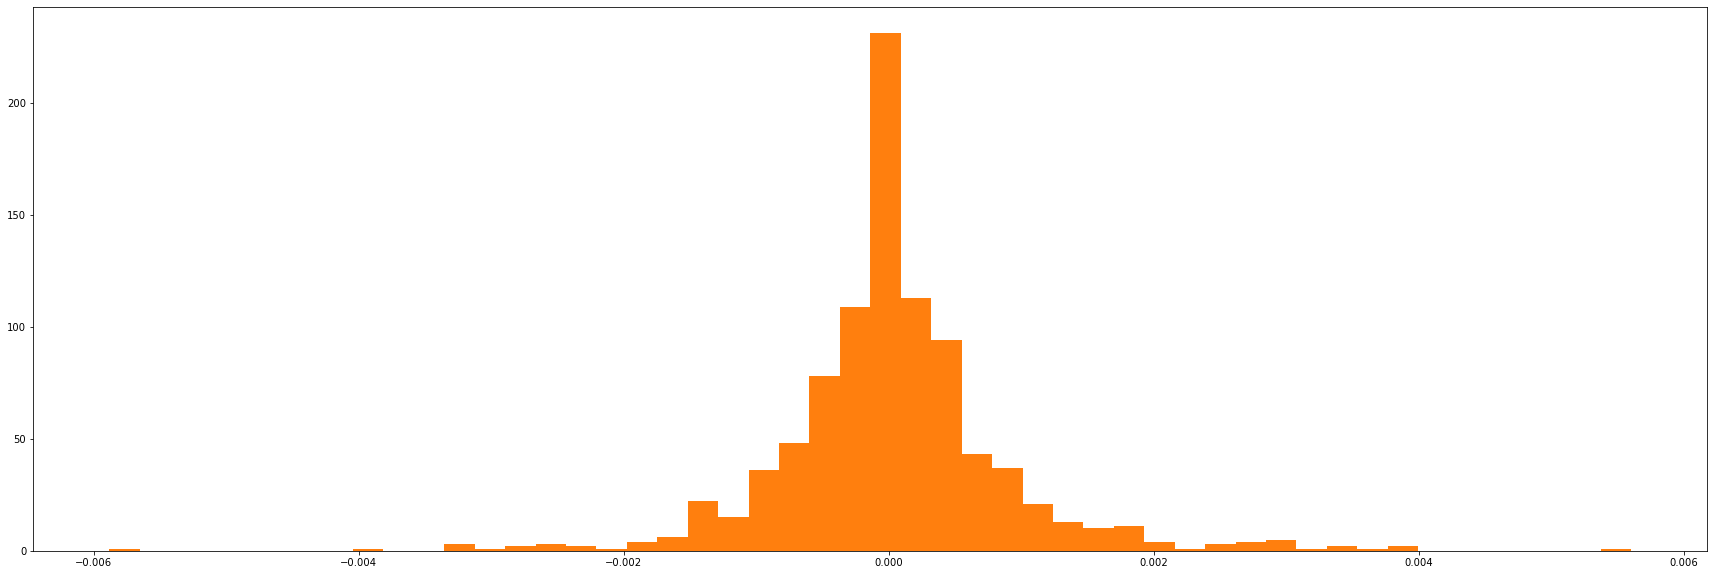

Ret_116


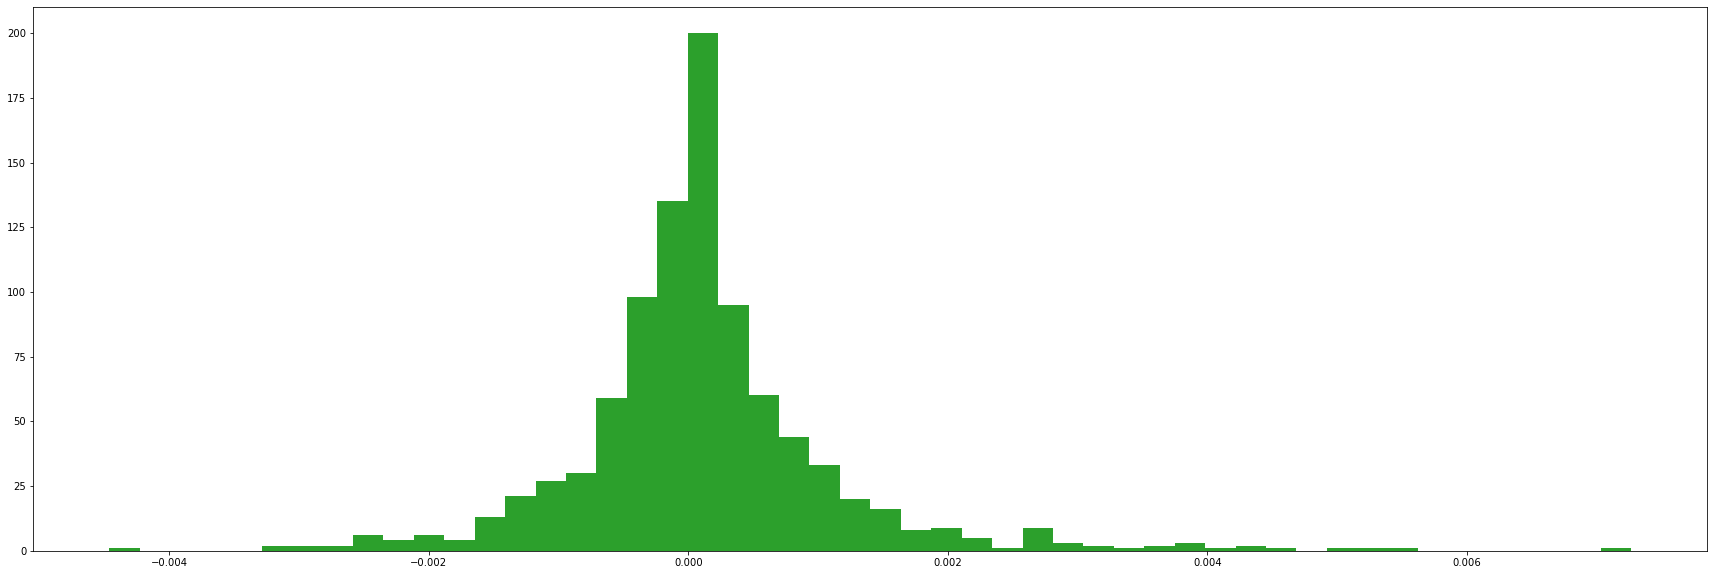

Ret_117


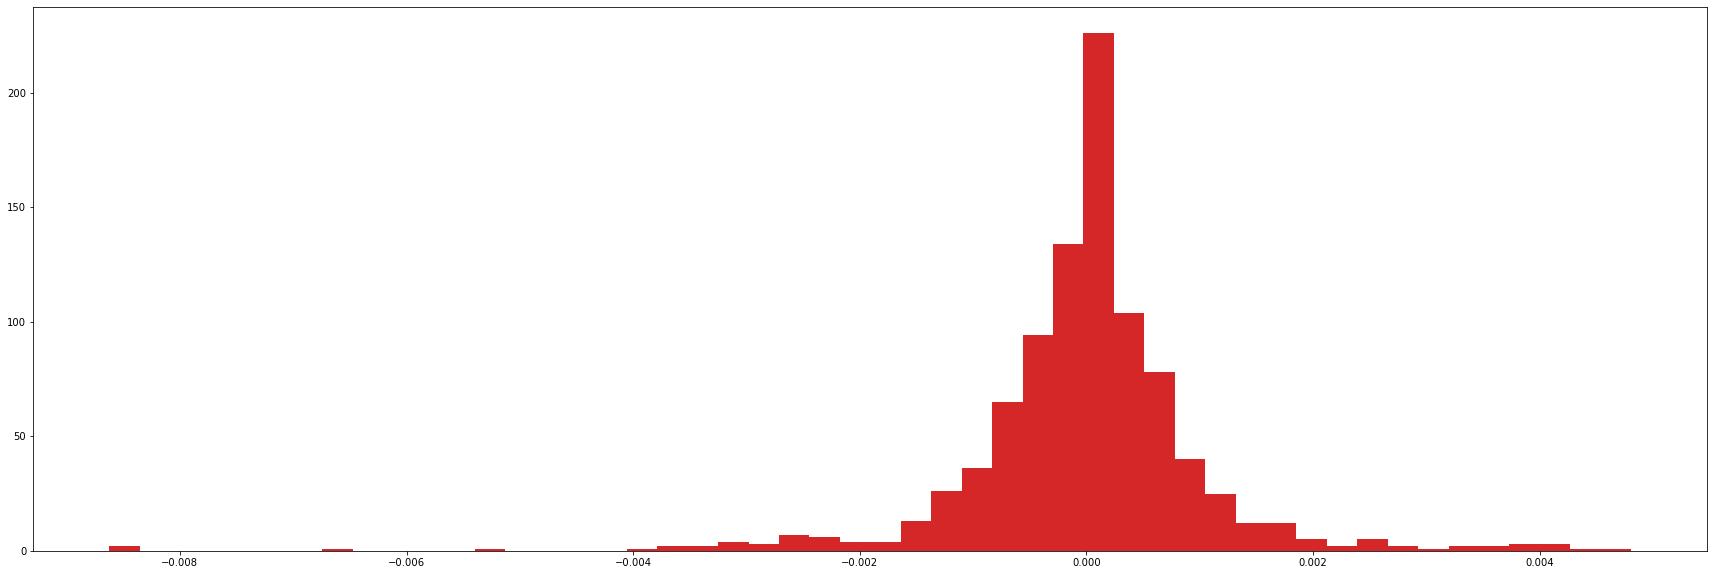

Ret_118


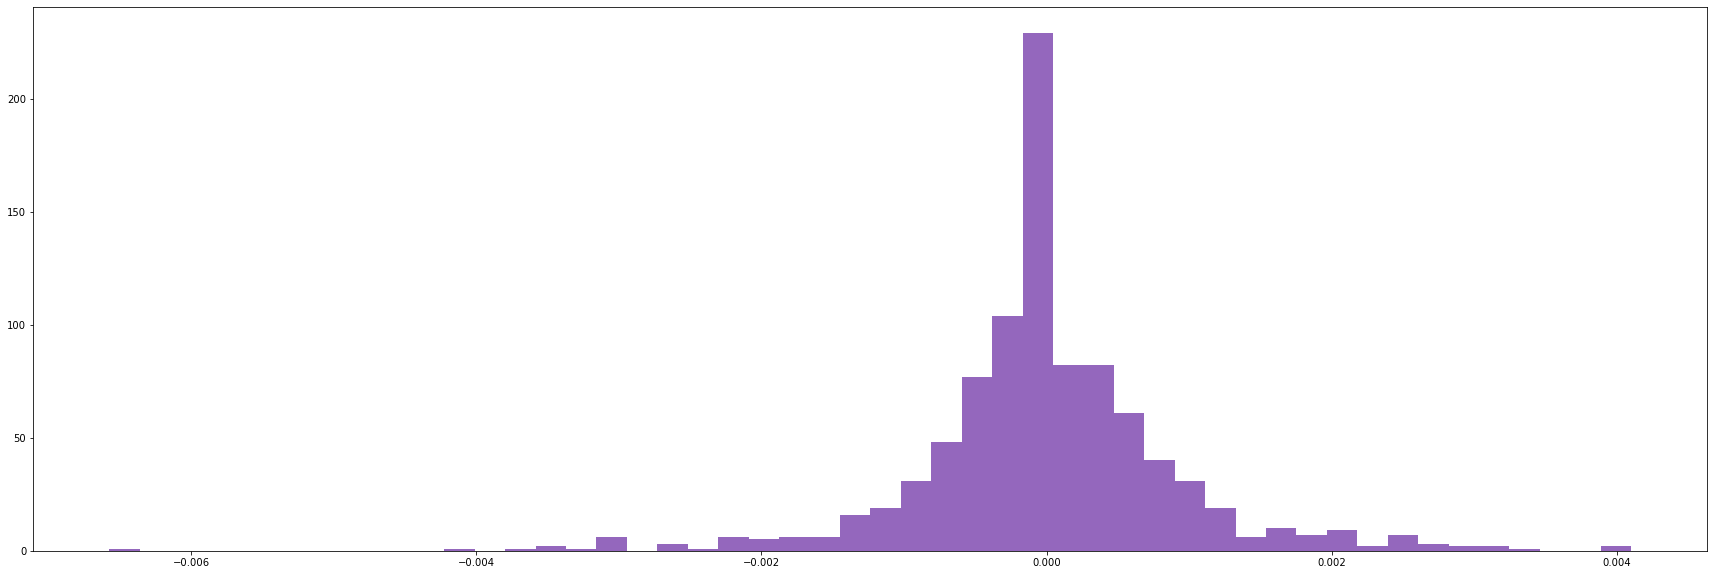

Ret_119


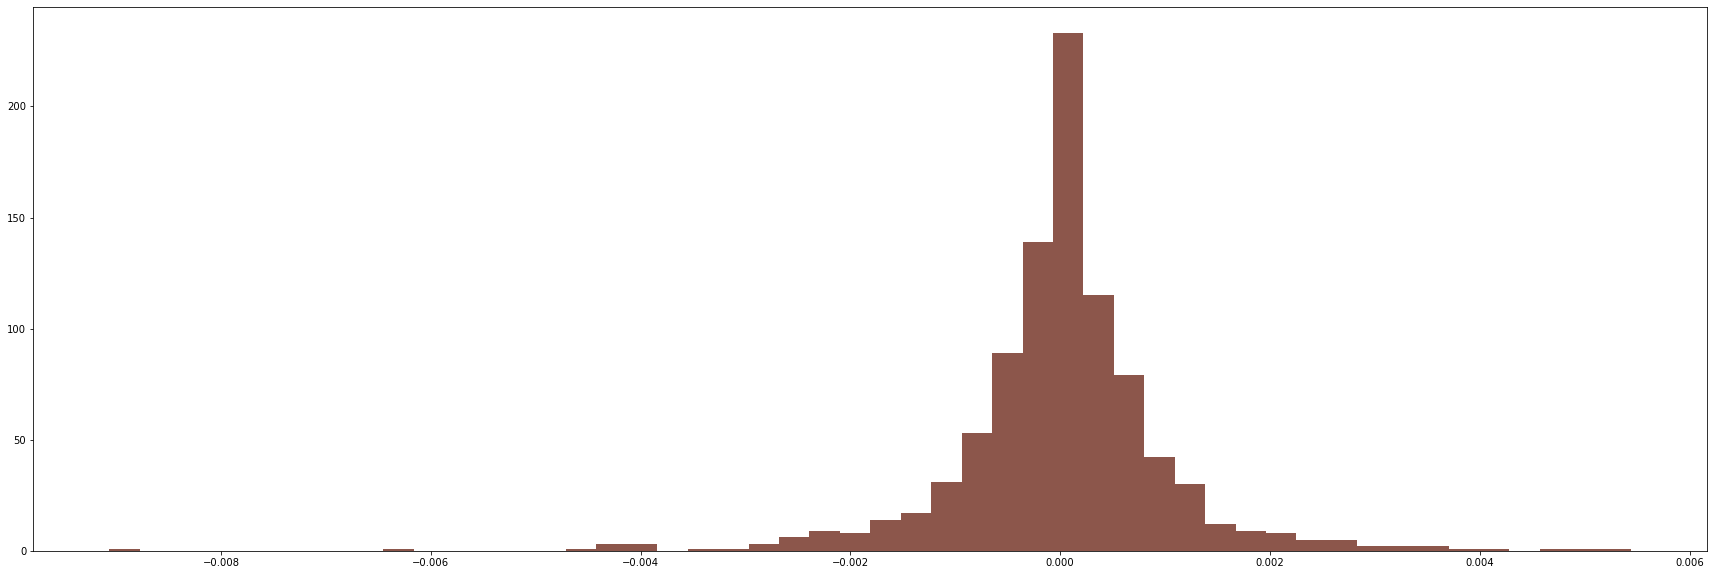

Ret_120


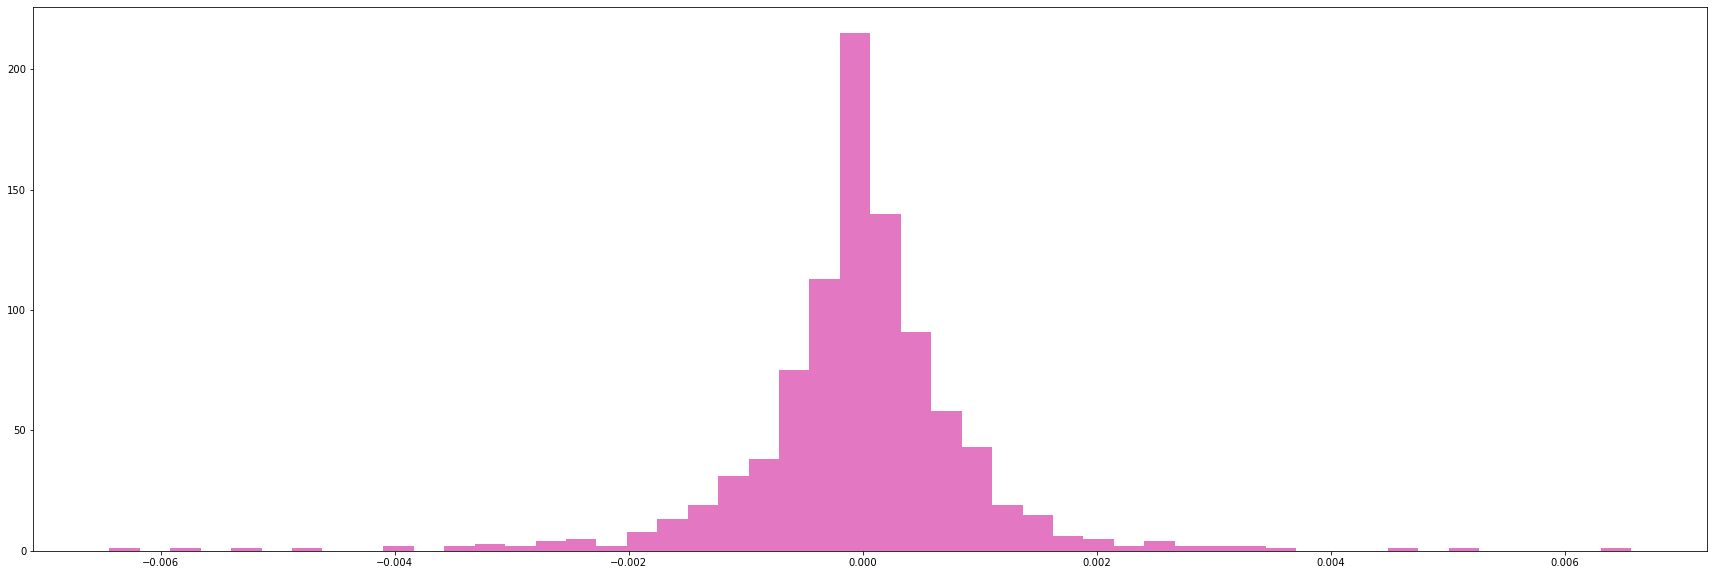

Ret_121


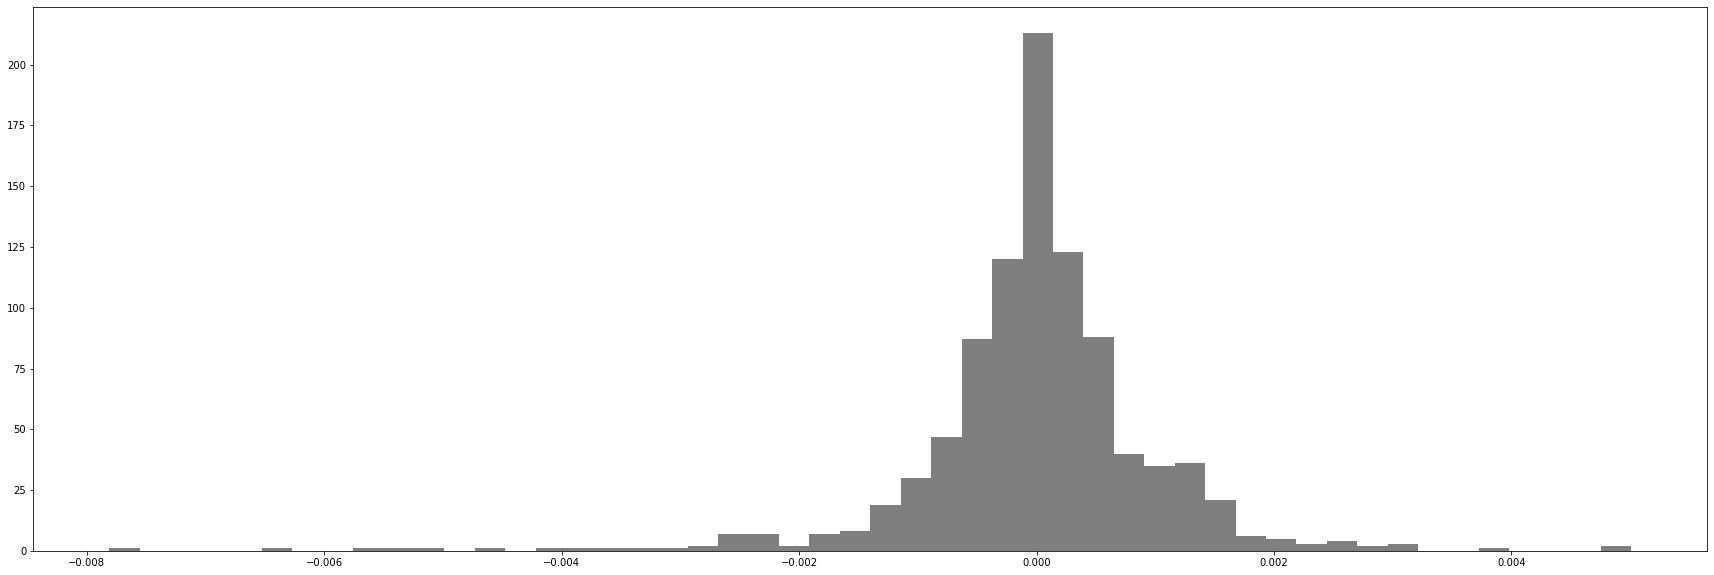

Ret_122


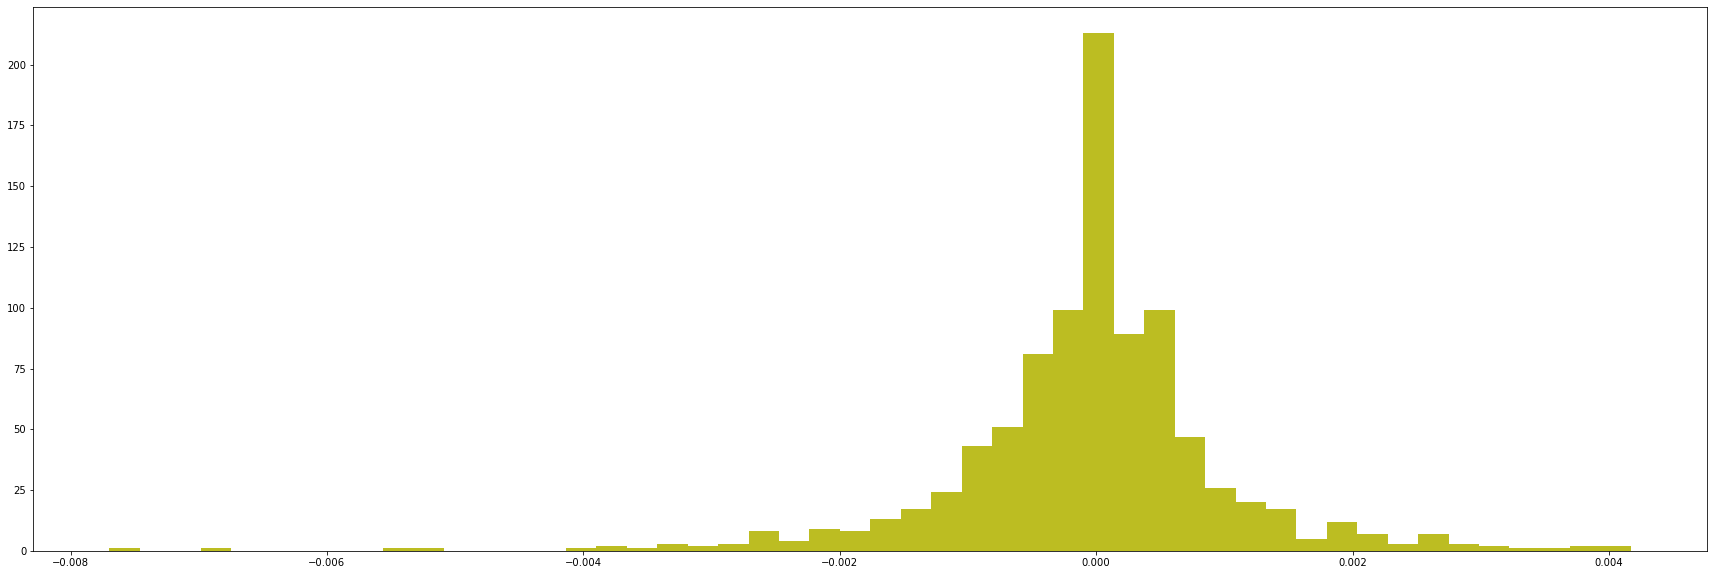

Ret_123


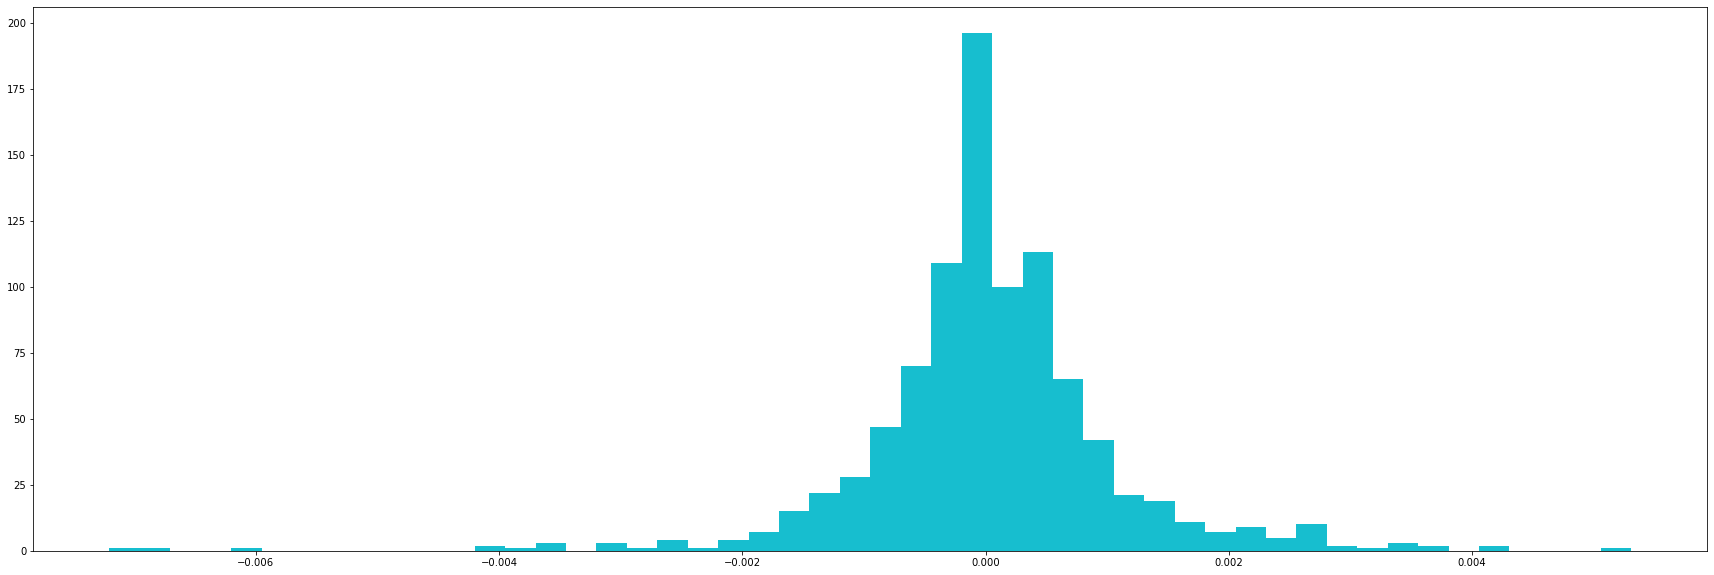

Ret_124


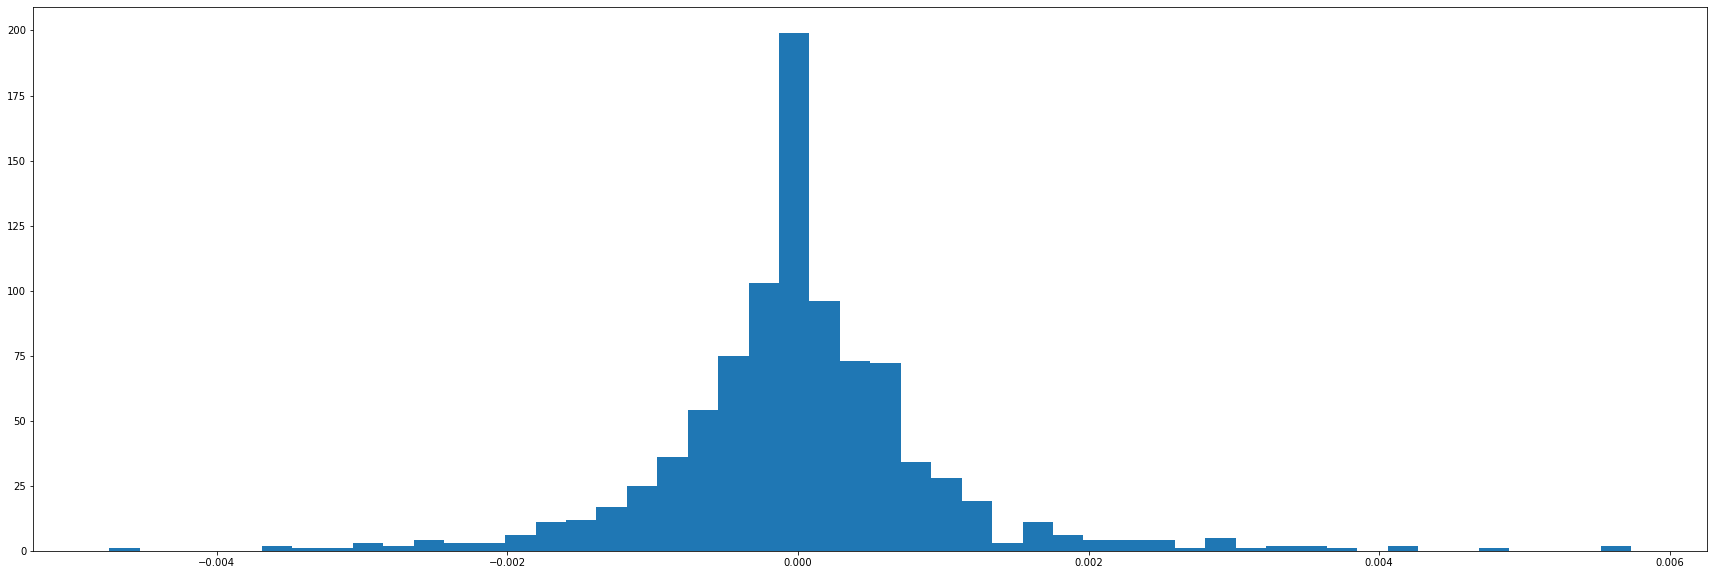

Ret_125


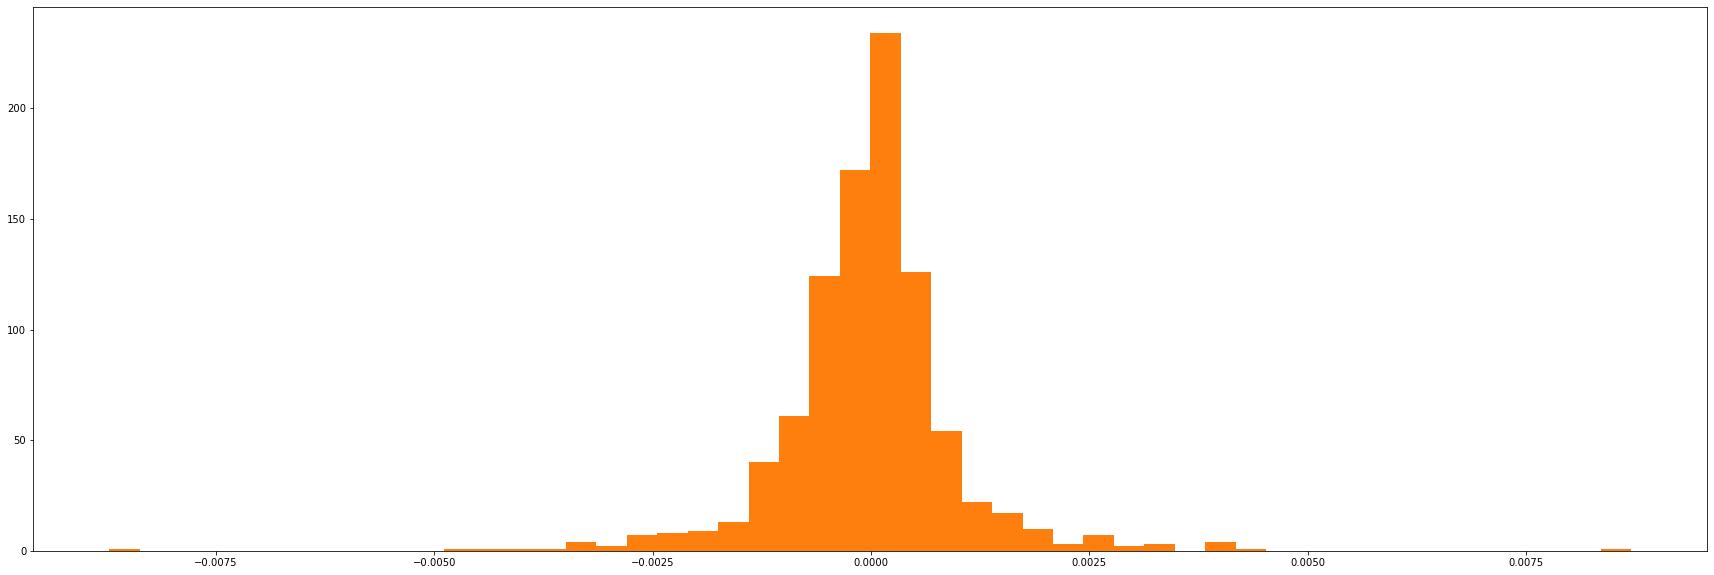

Ret_126


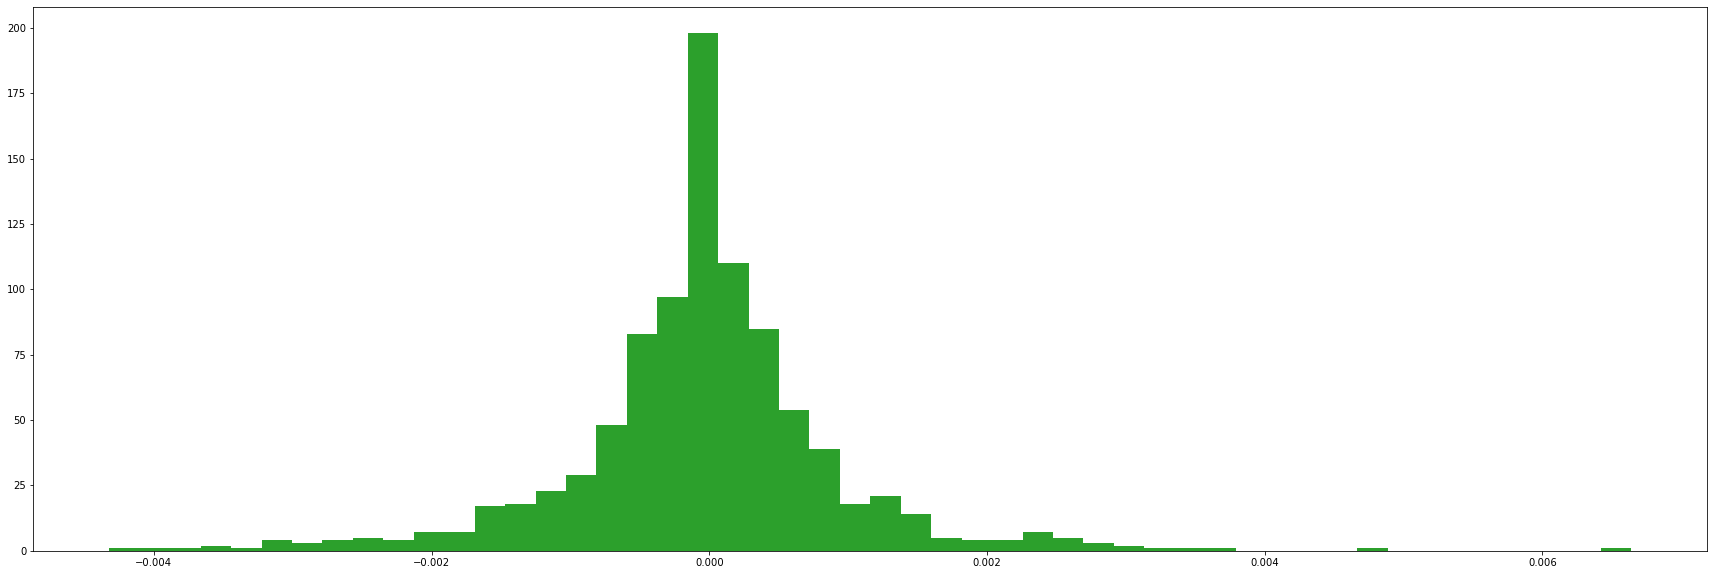

Ret_127


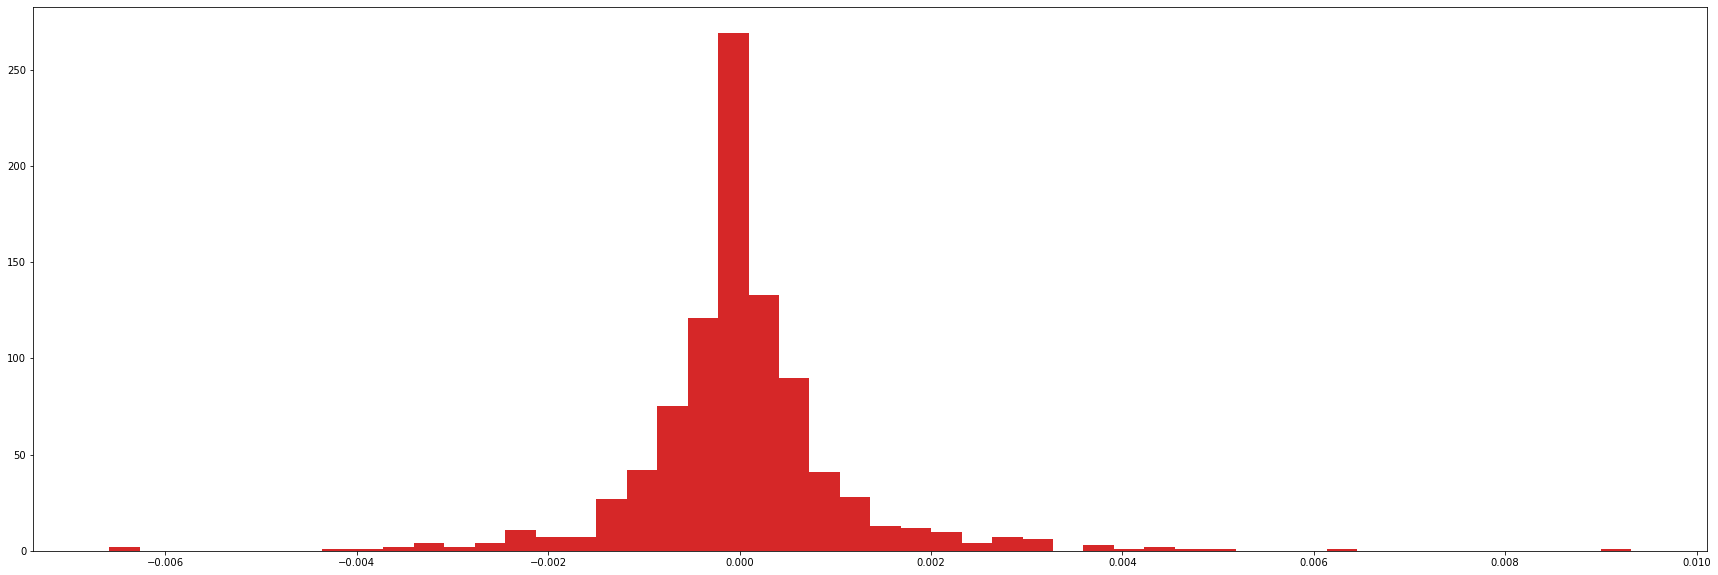

Ret_128


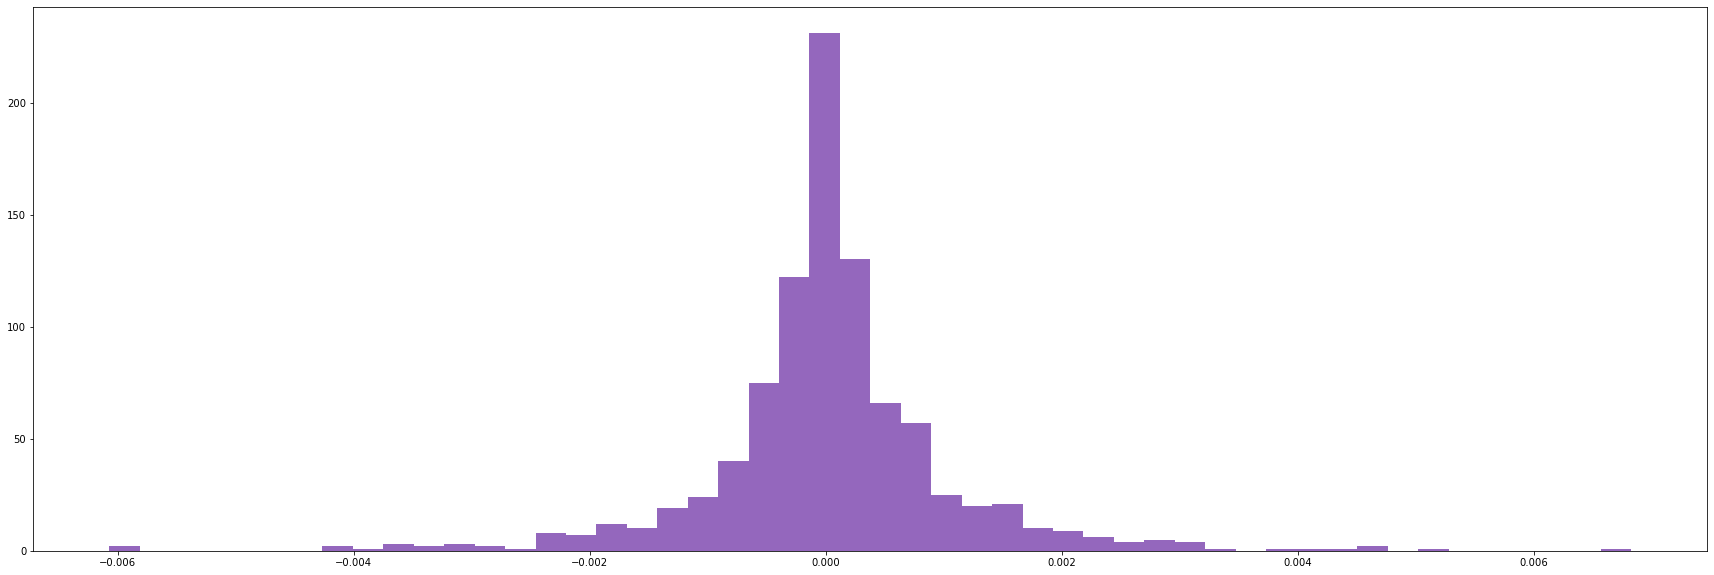

Ret_129


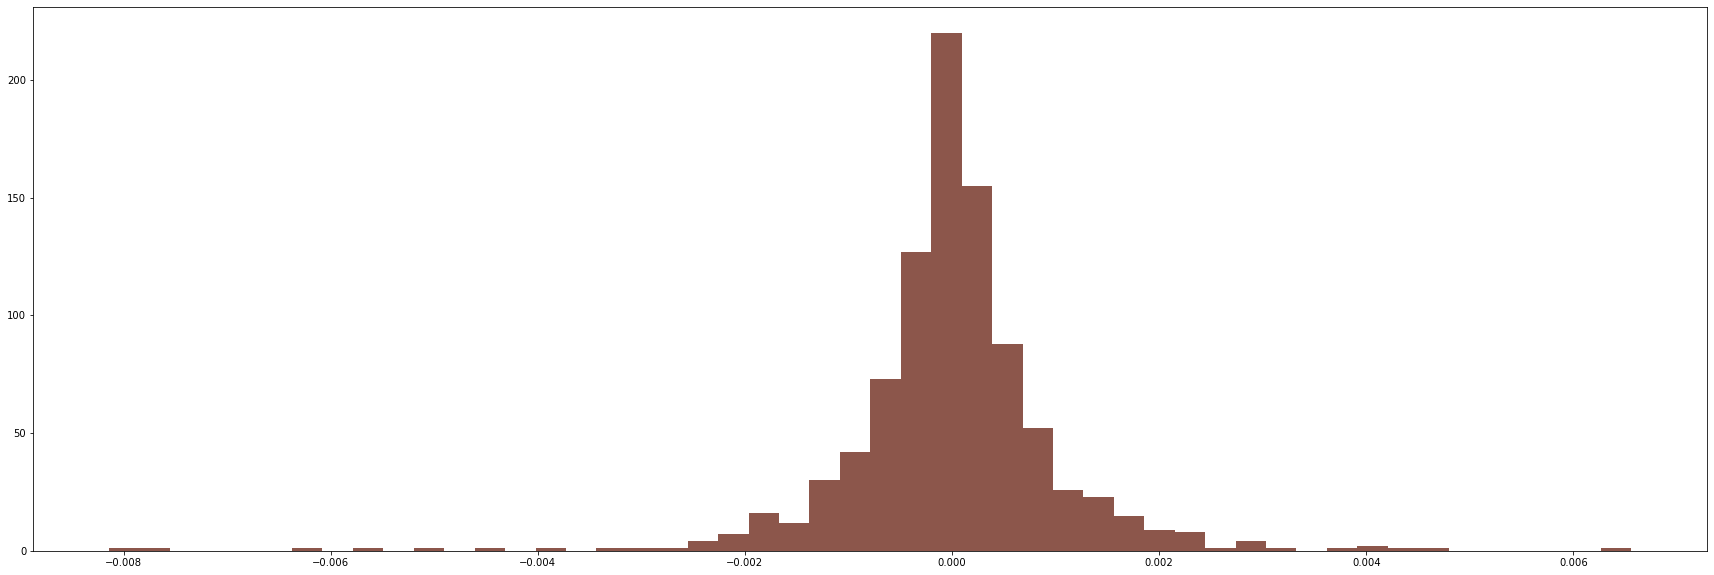

Ret_130


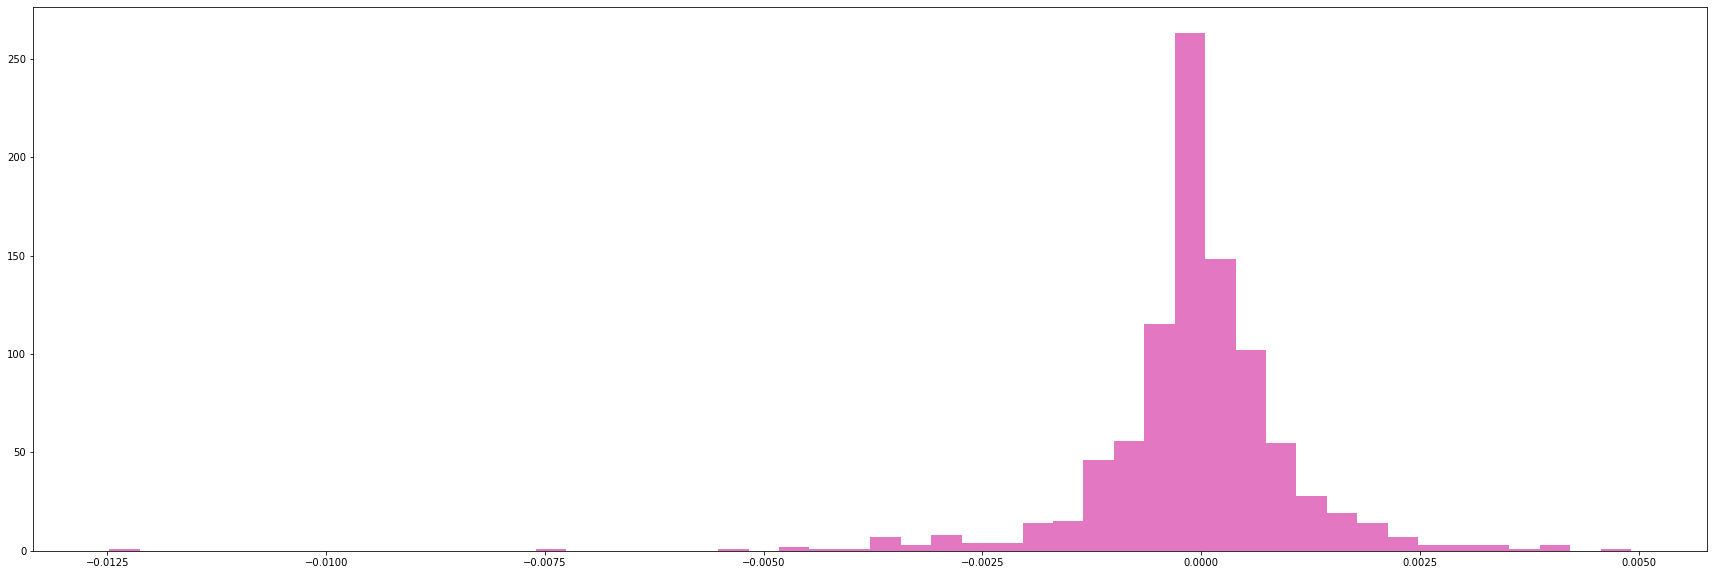

Ret_131


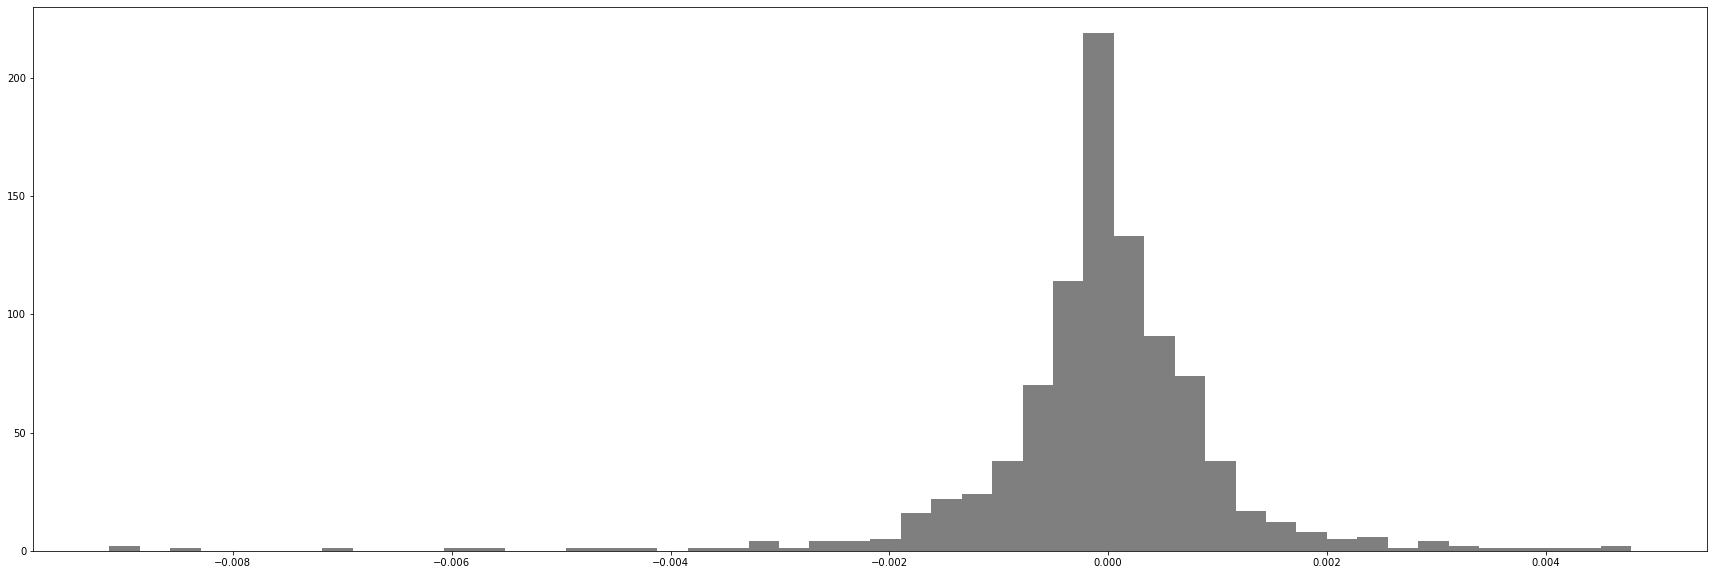

Ret_132


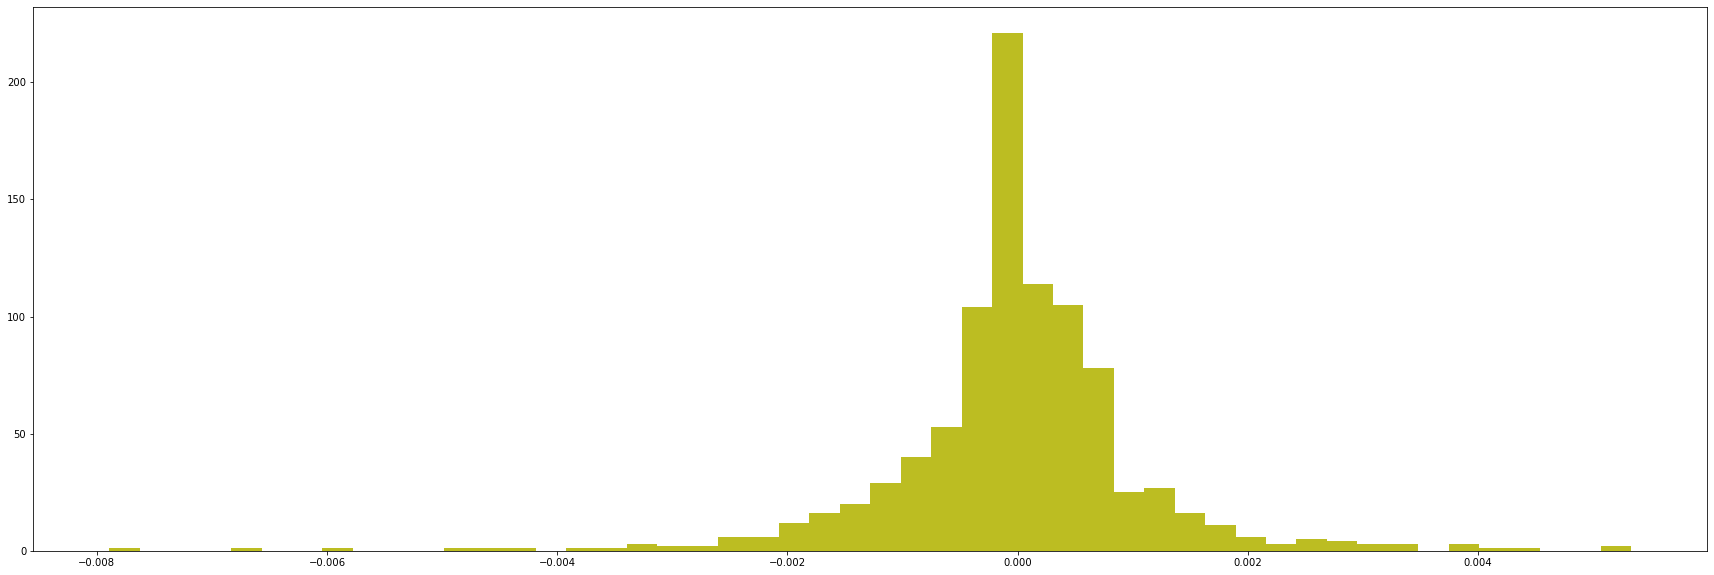

Ret_133


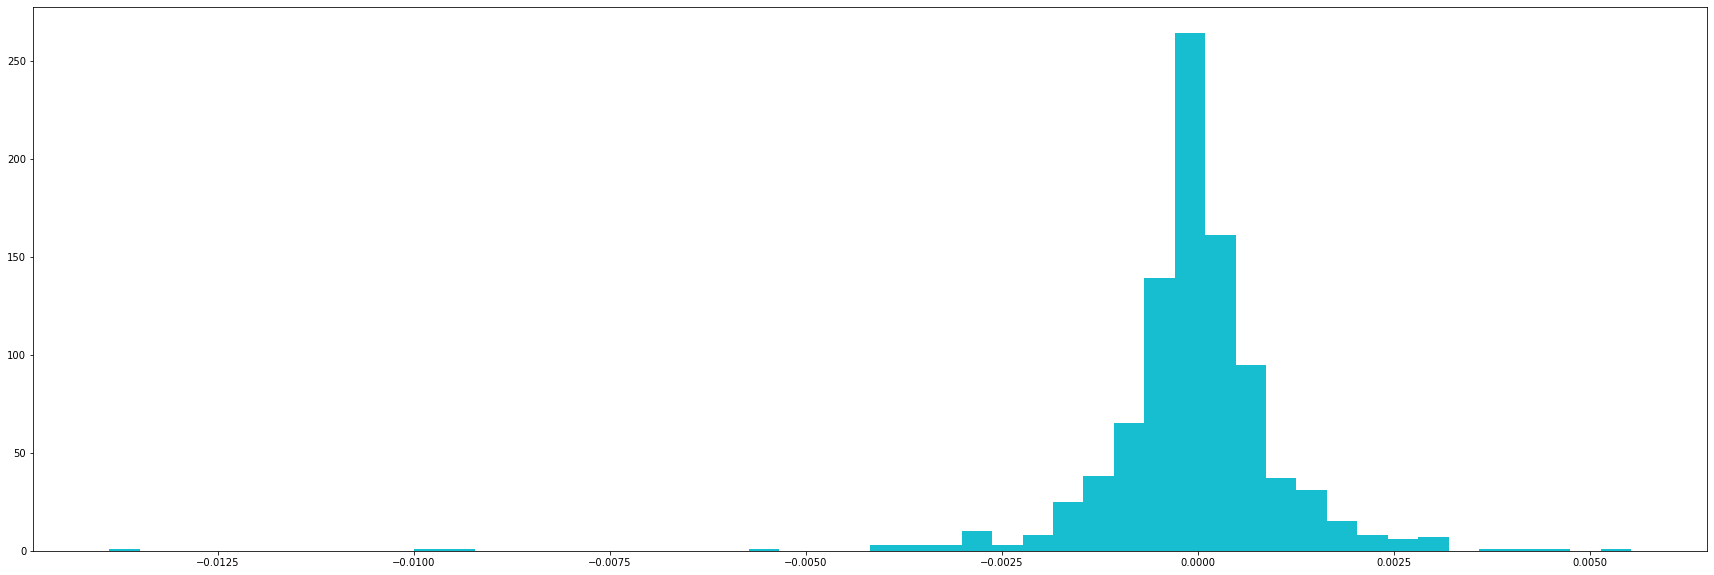

Ret_134


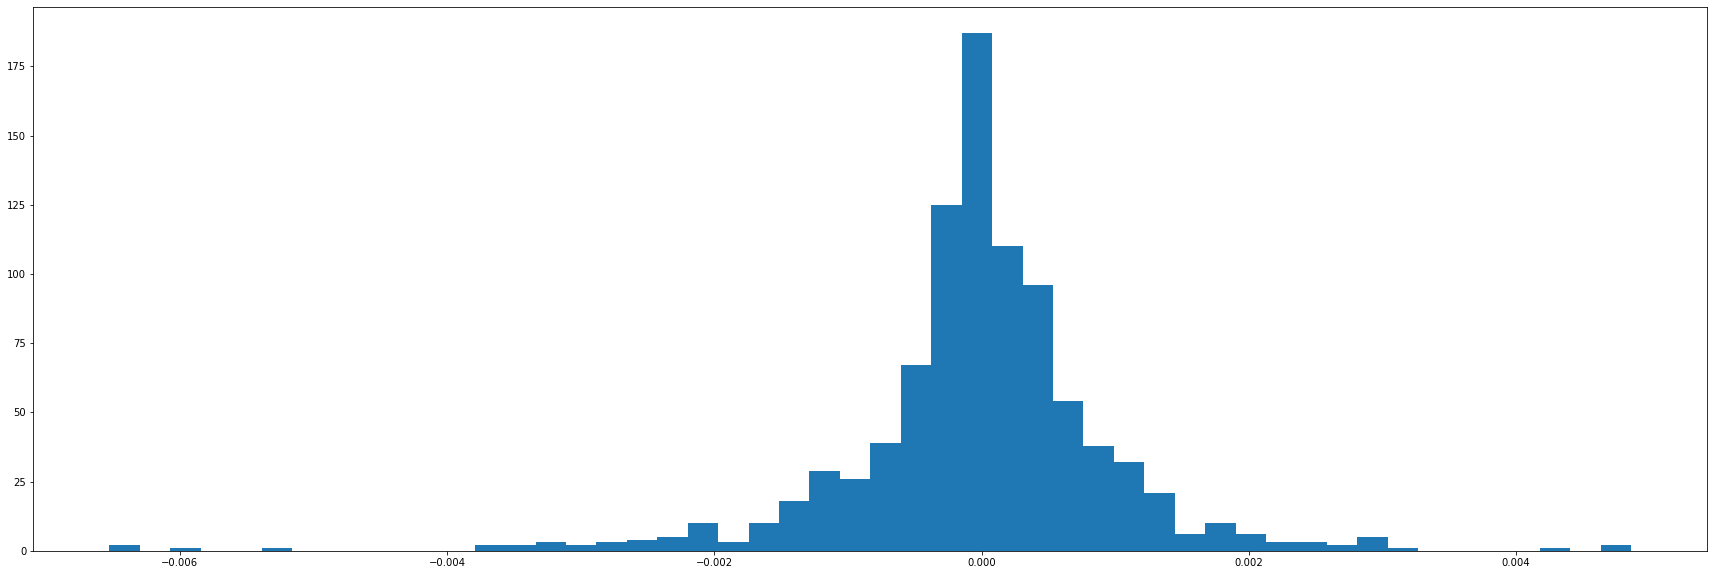

Ret_135


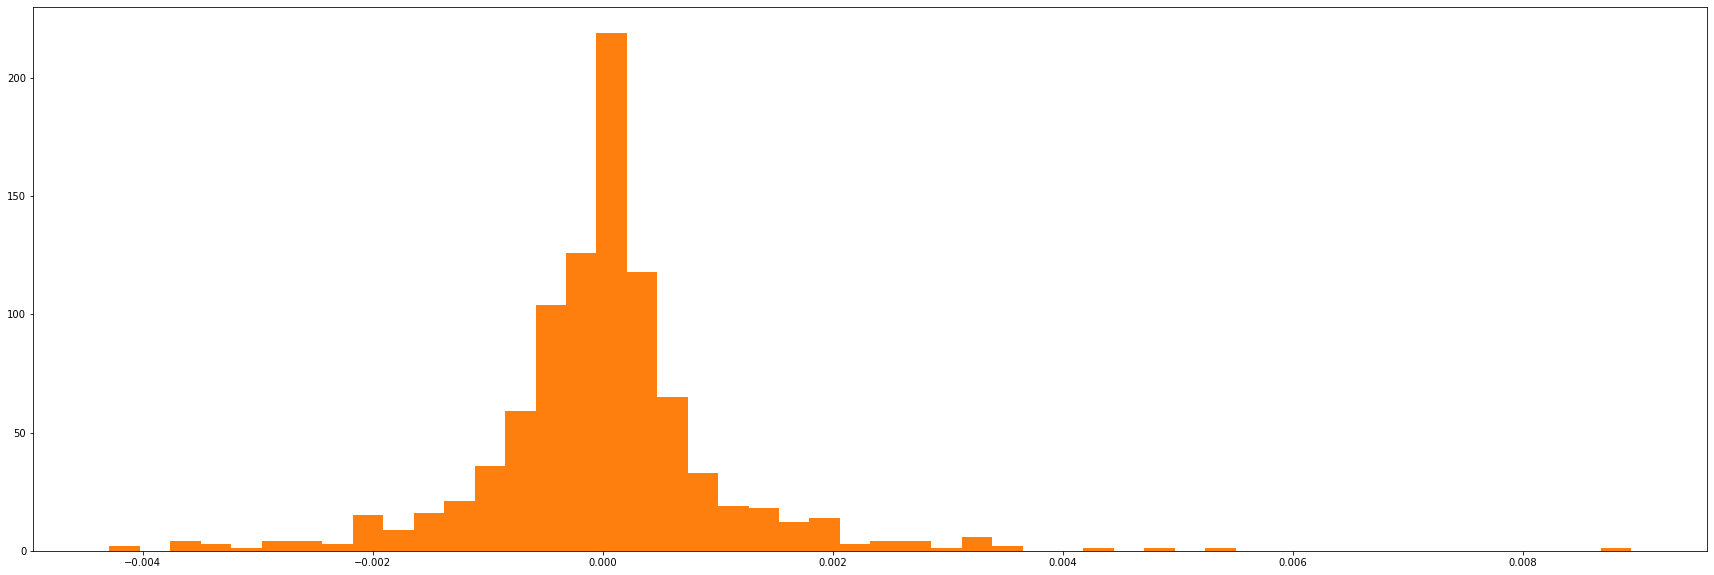

Ret_136


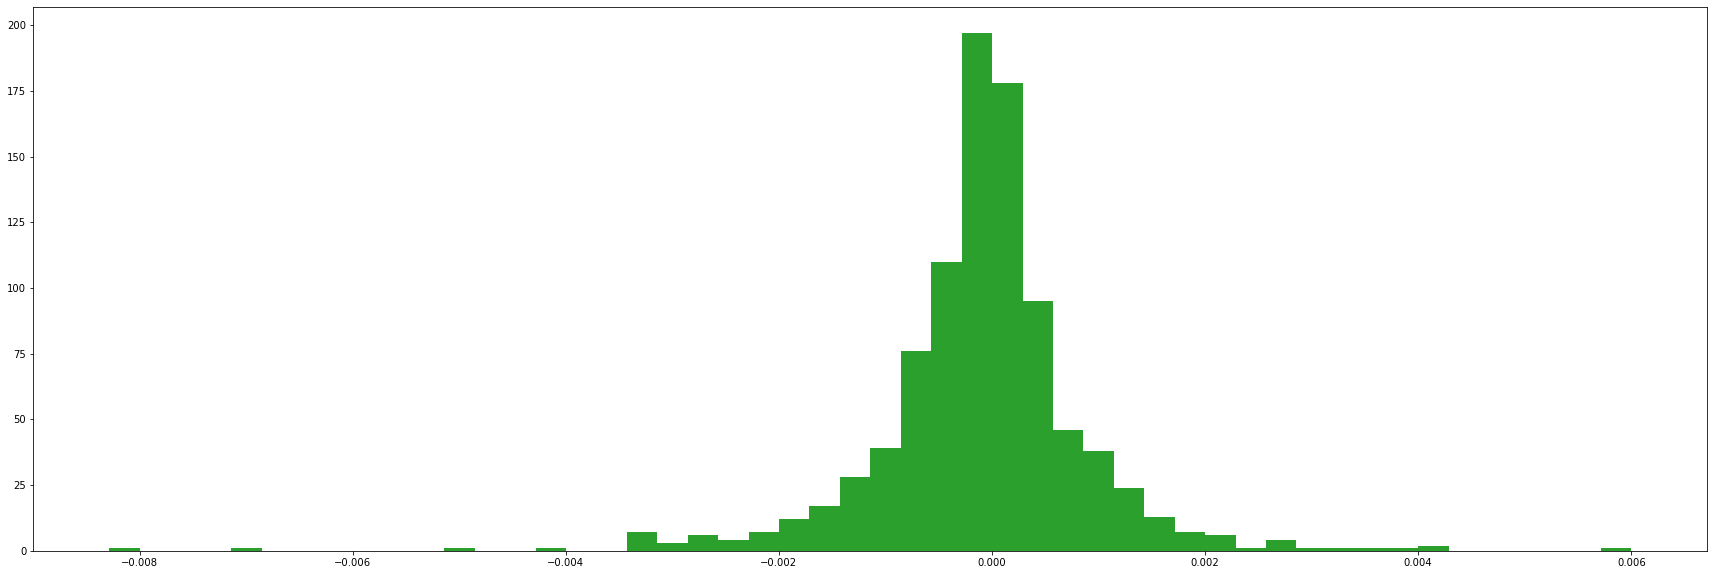

Ret_137


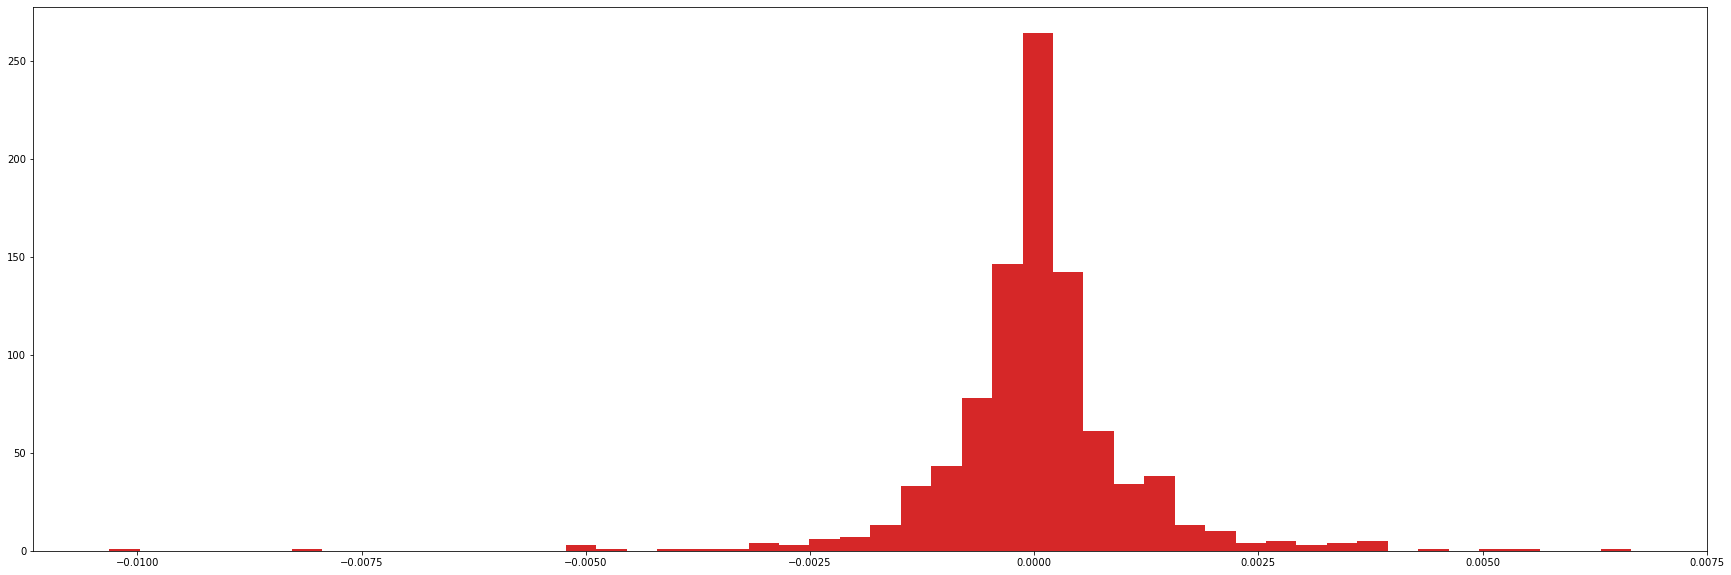

Ret_138


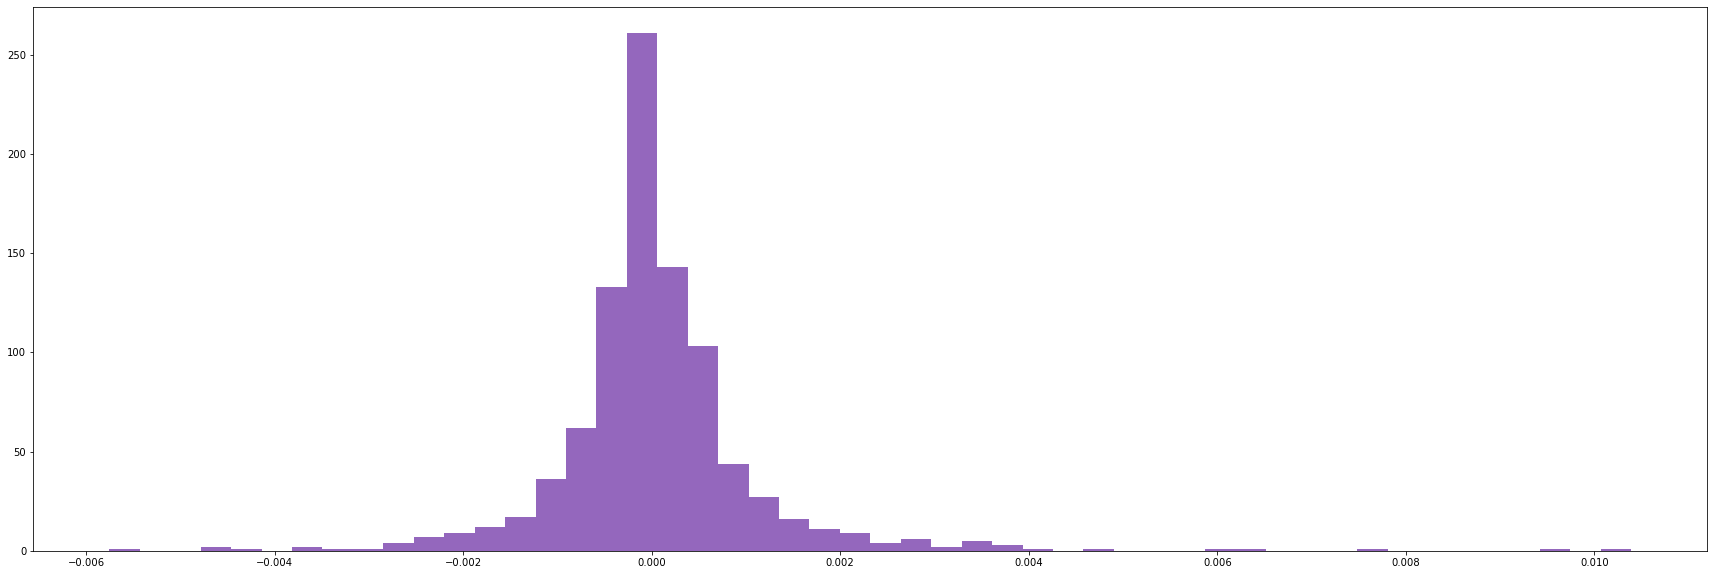

Ret_139


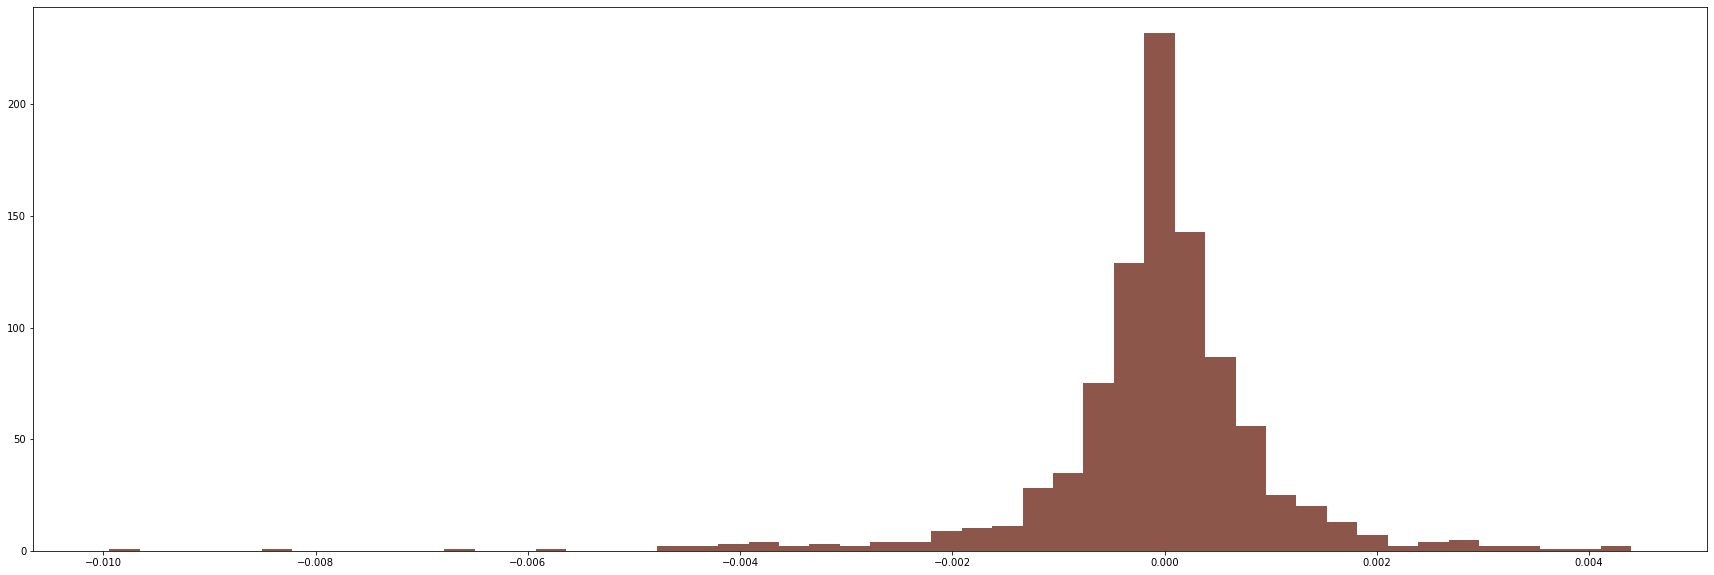

Ret_140


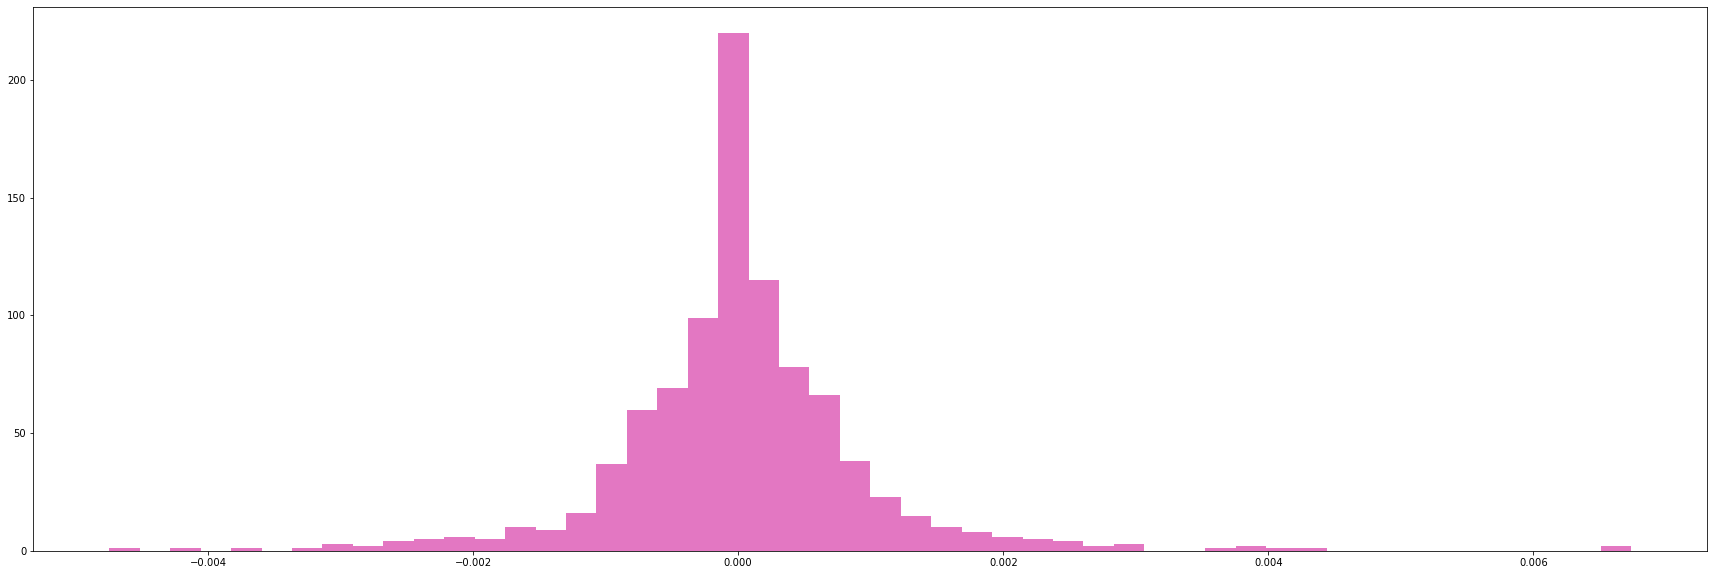

Ret_141


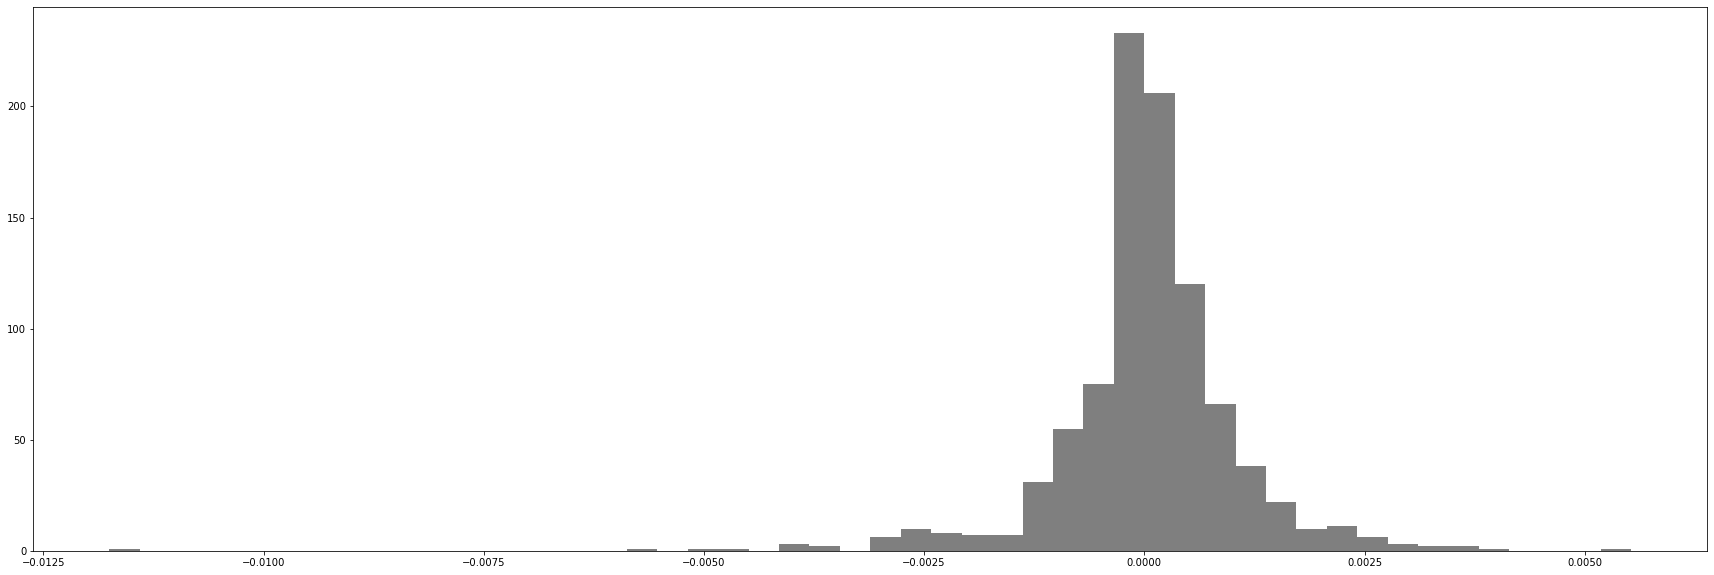

Ret_142


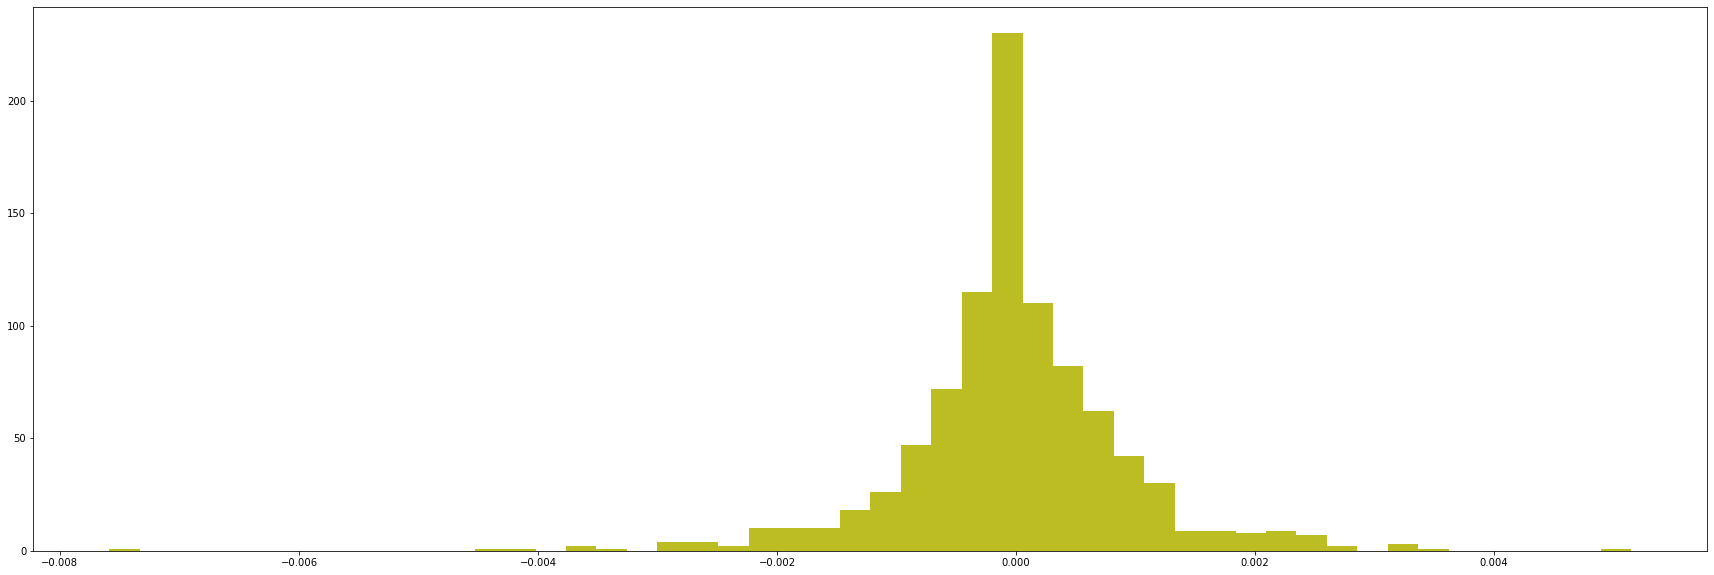

Ret_143


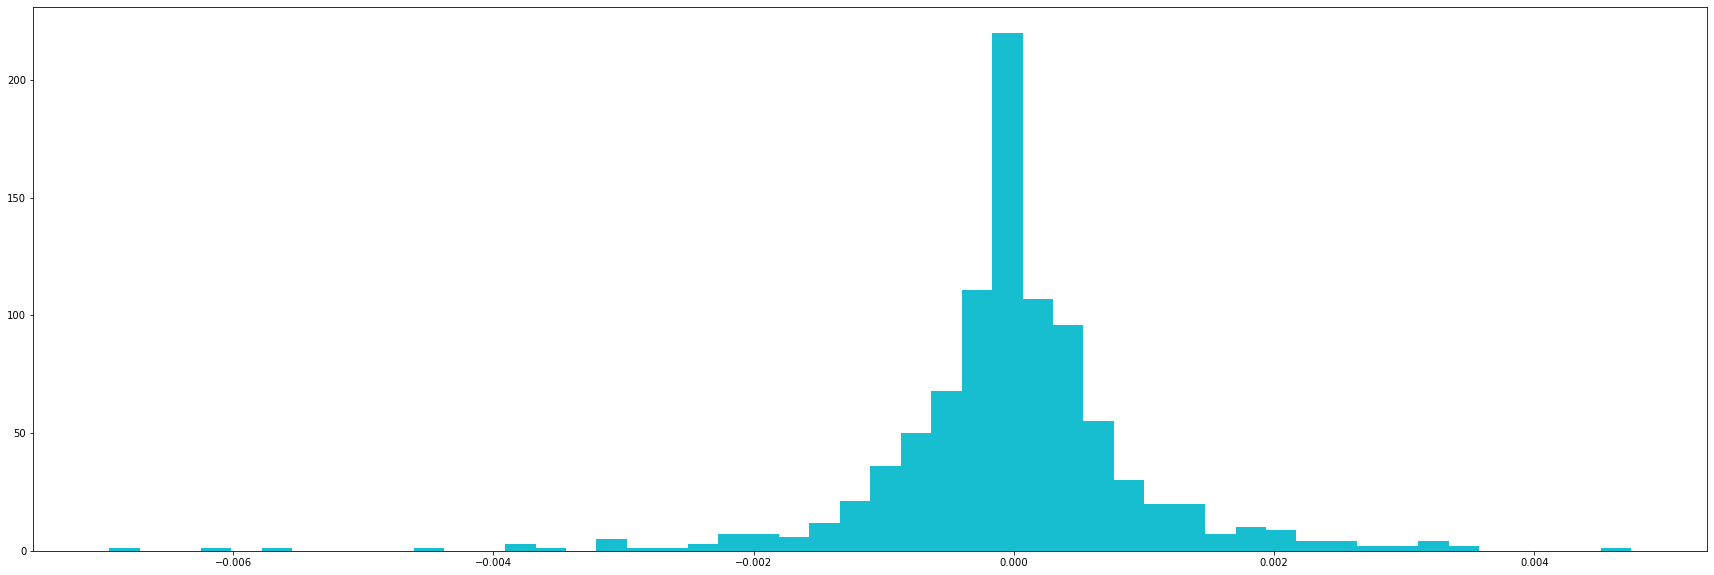

Ret_144


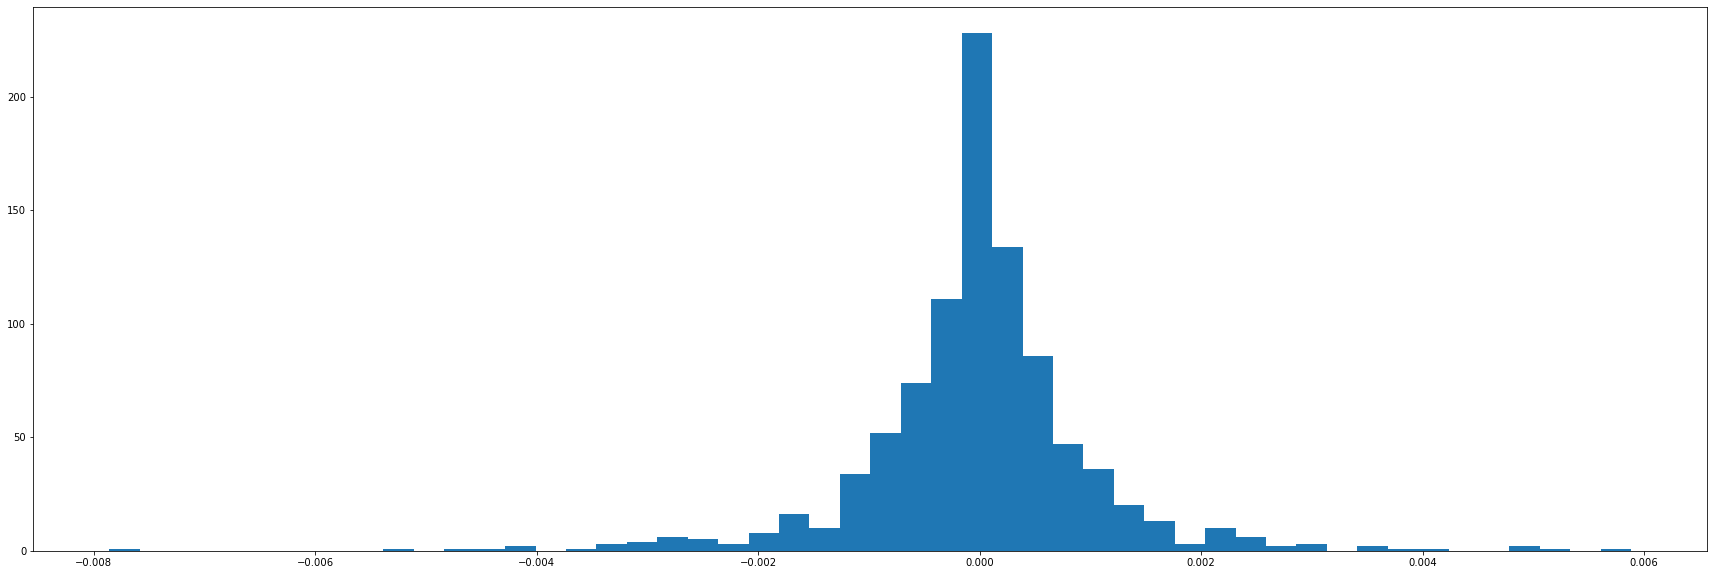

Ret_145


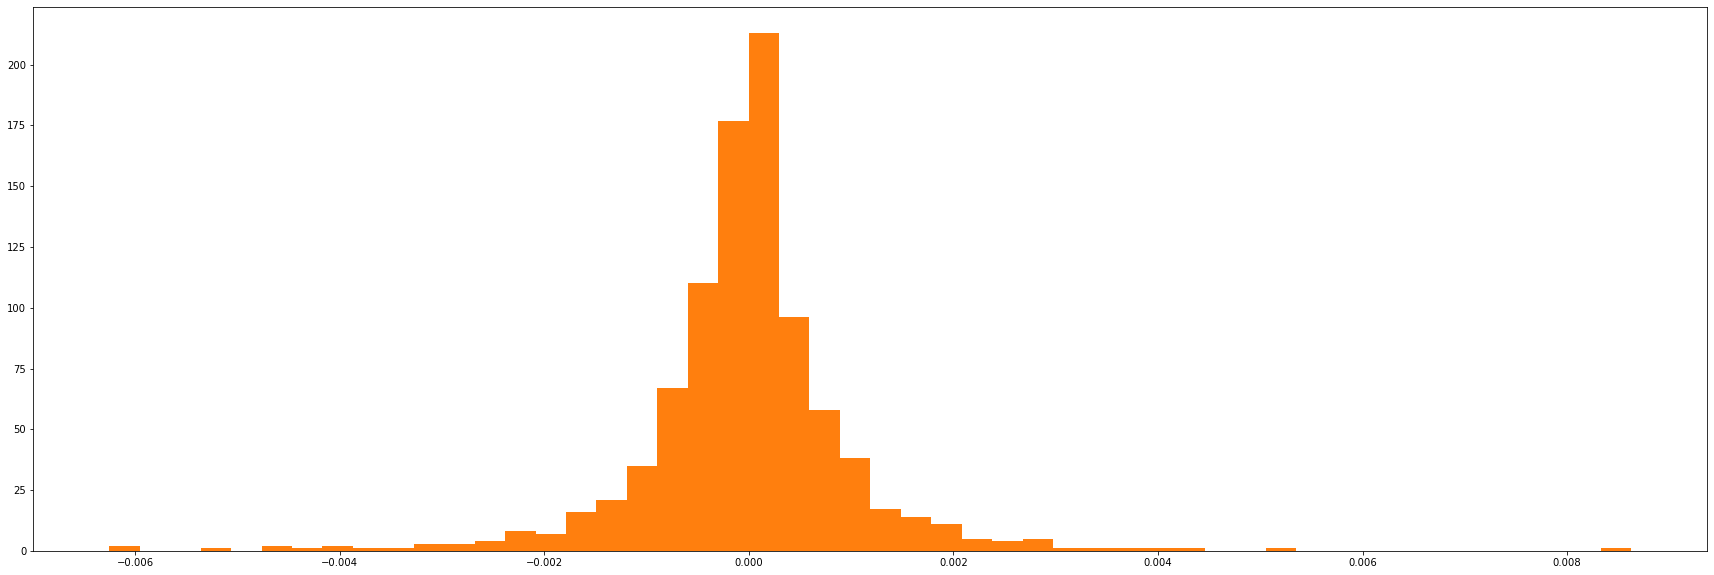

Ret_146


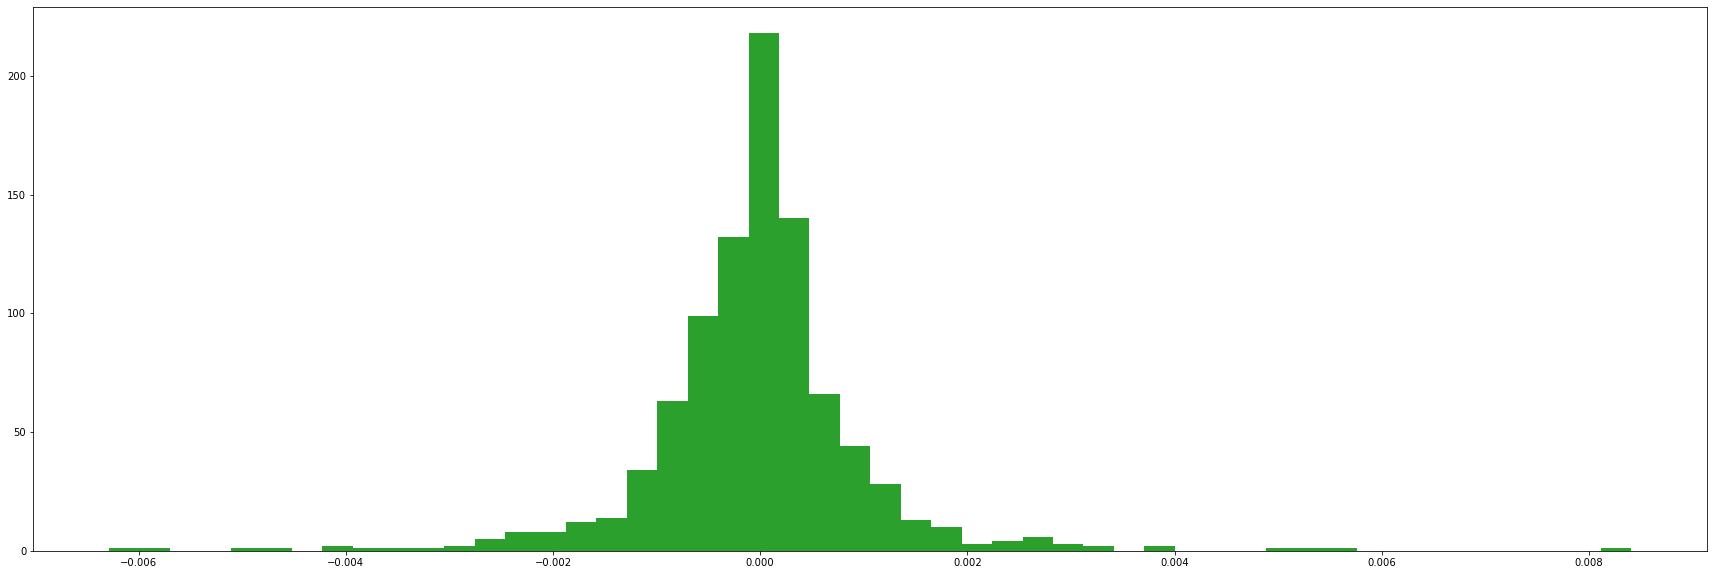

Ret_147


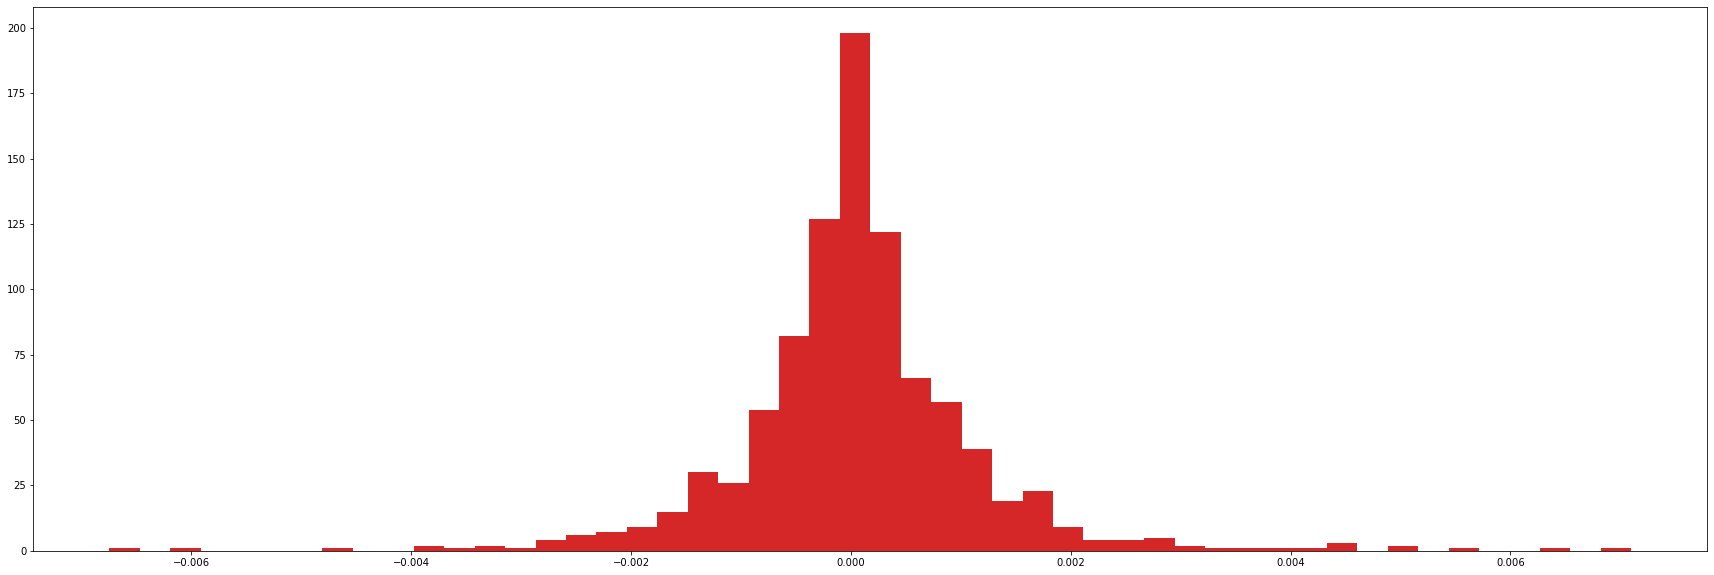

Ret_148


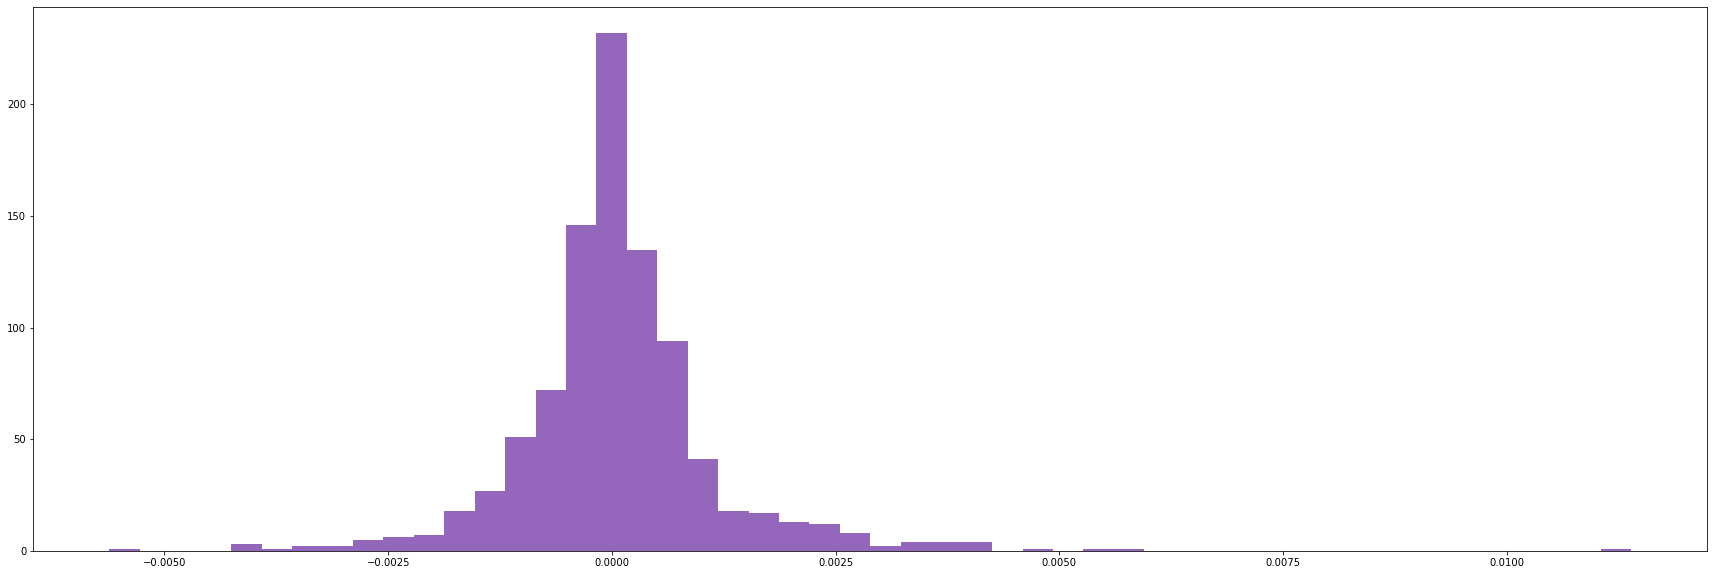

Ret_149


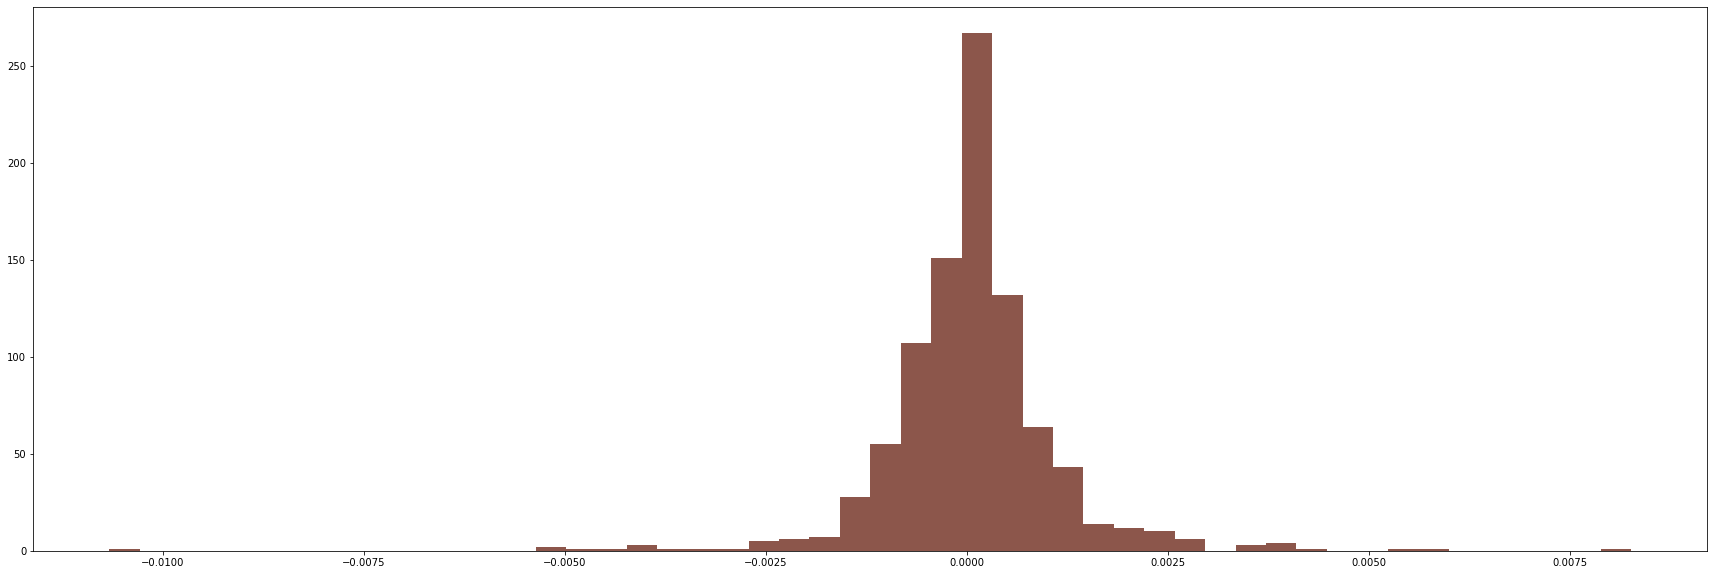

Ret_150


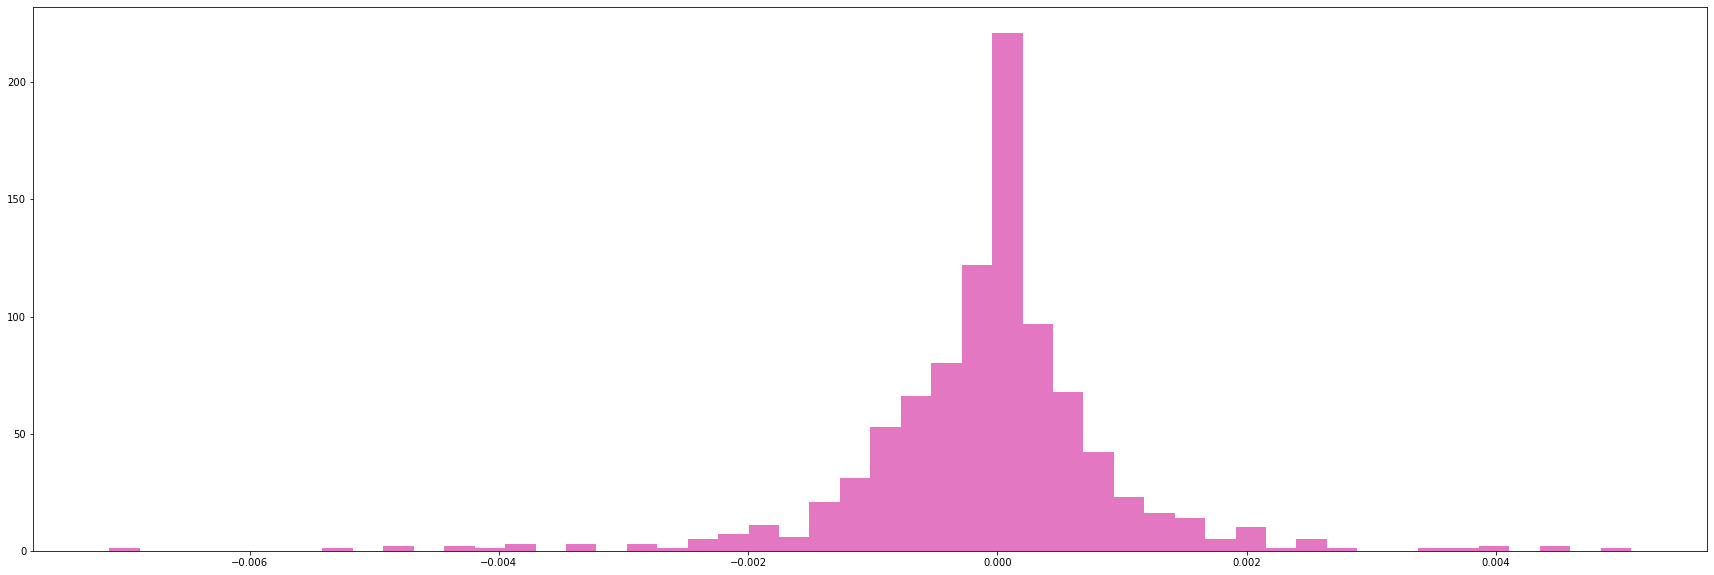

Ret_151


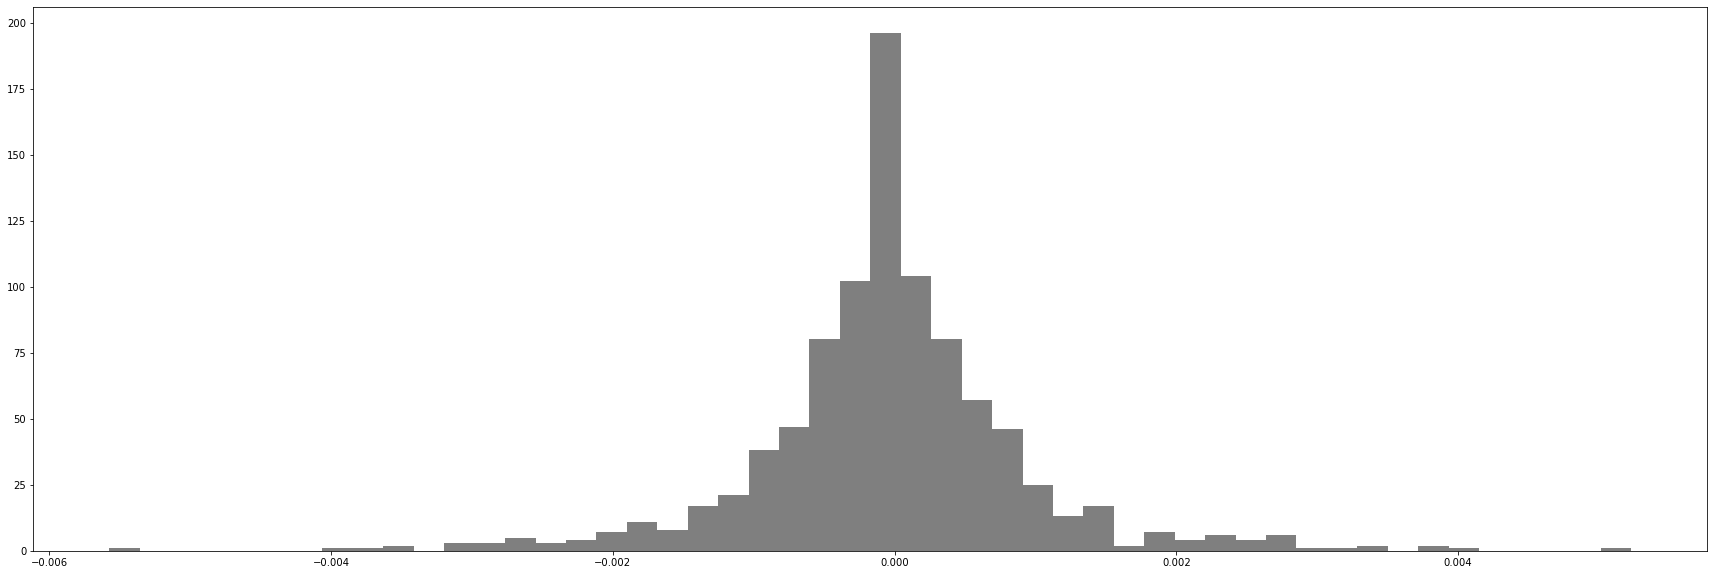

Ret_152


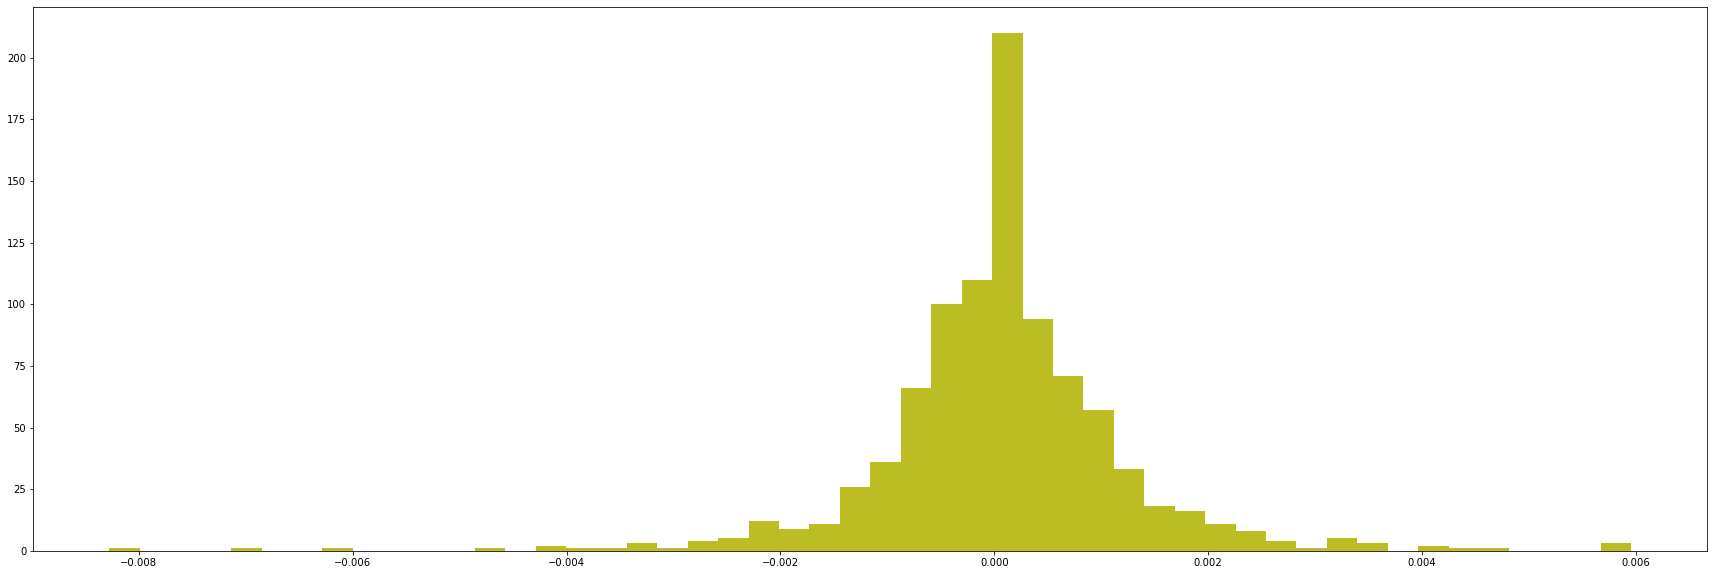

Ret_153


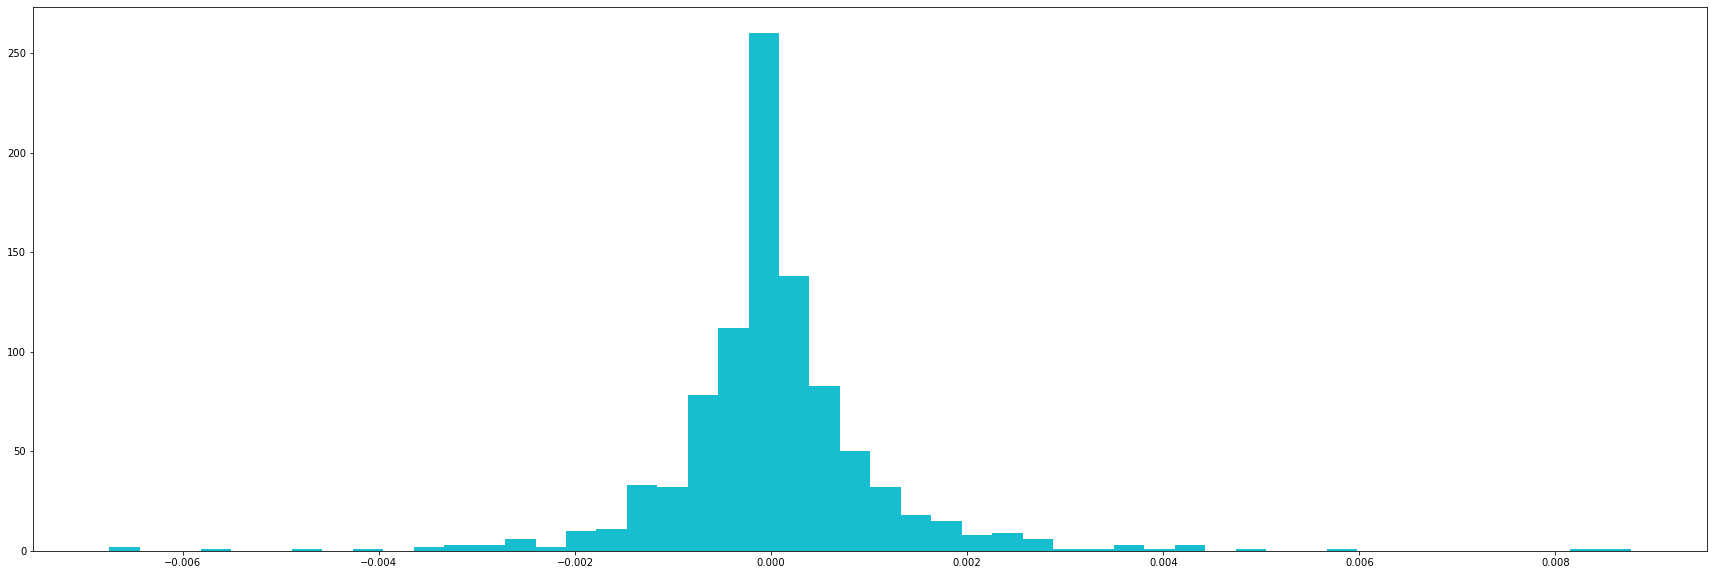

Ret_154


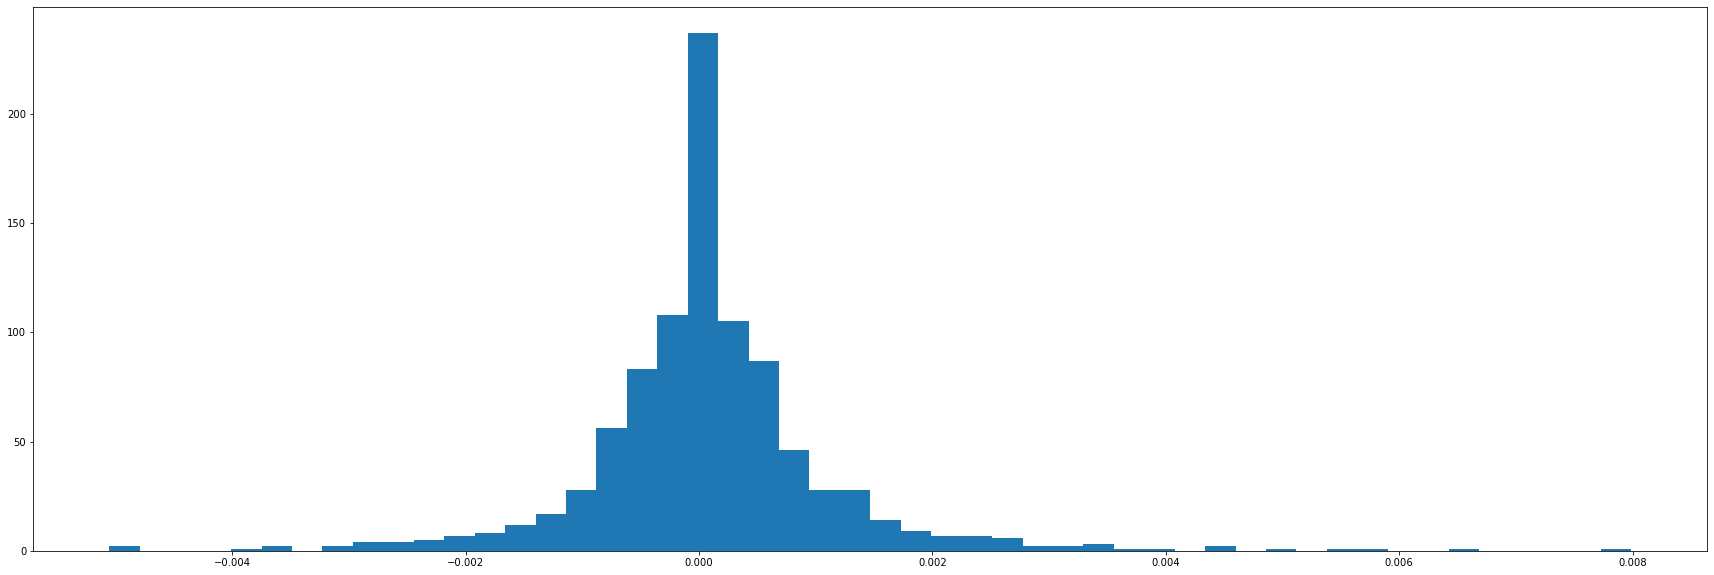

Ret_155


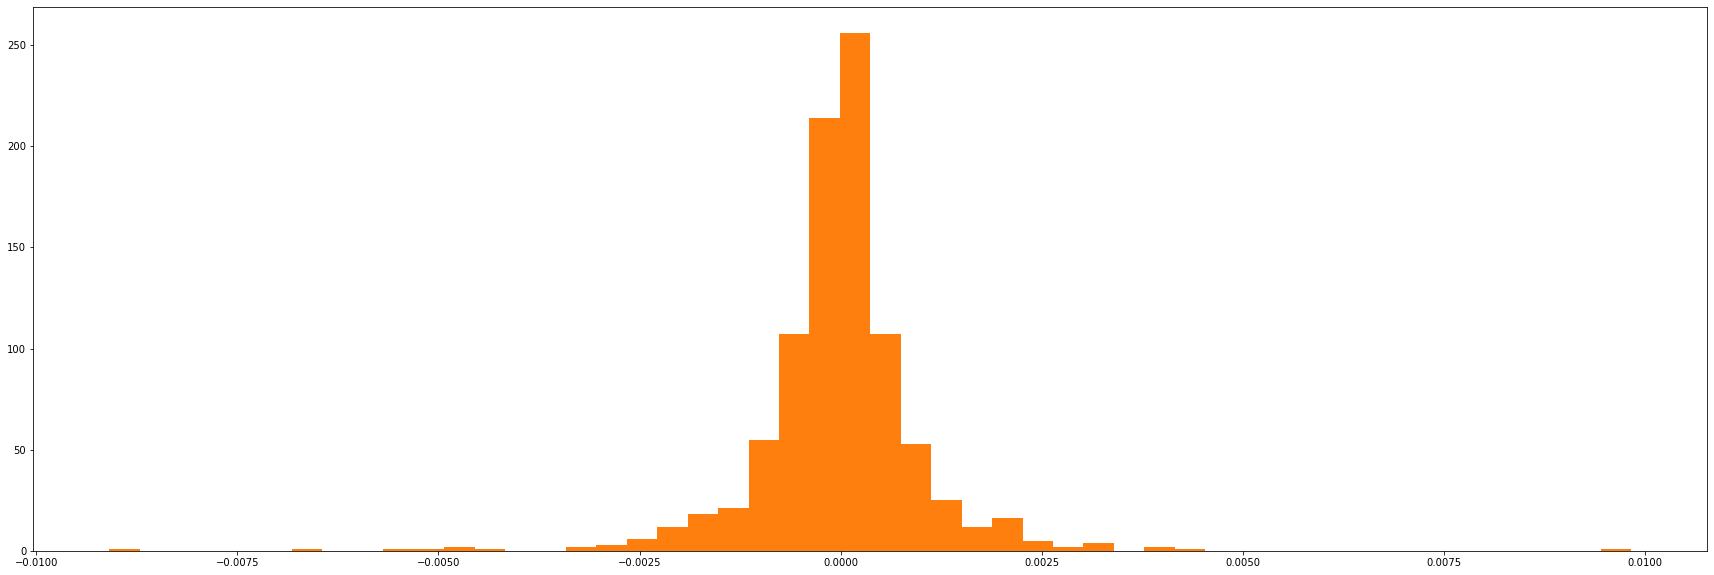

Ret_156


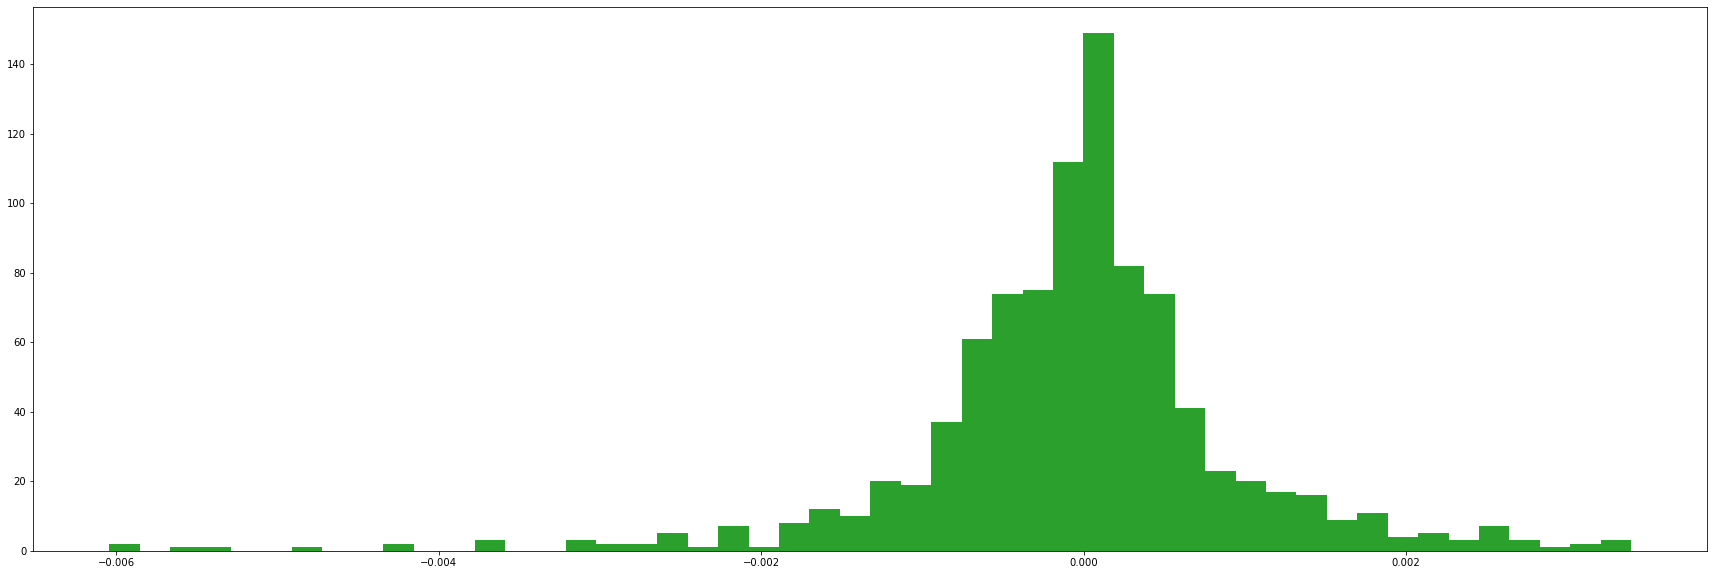

Ret_157


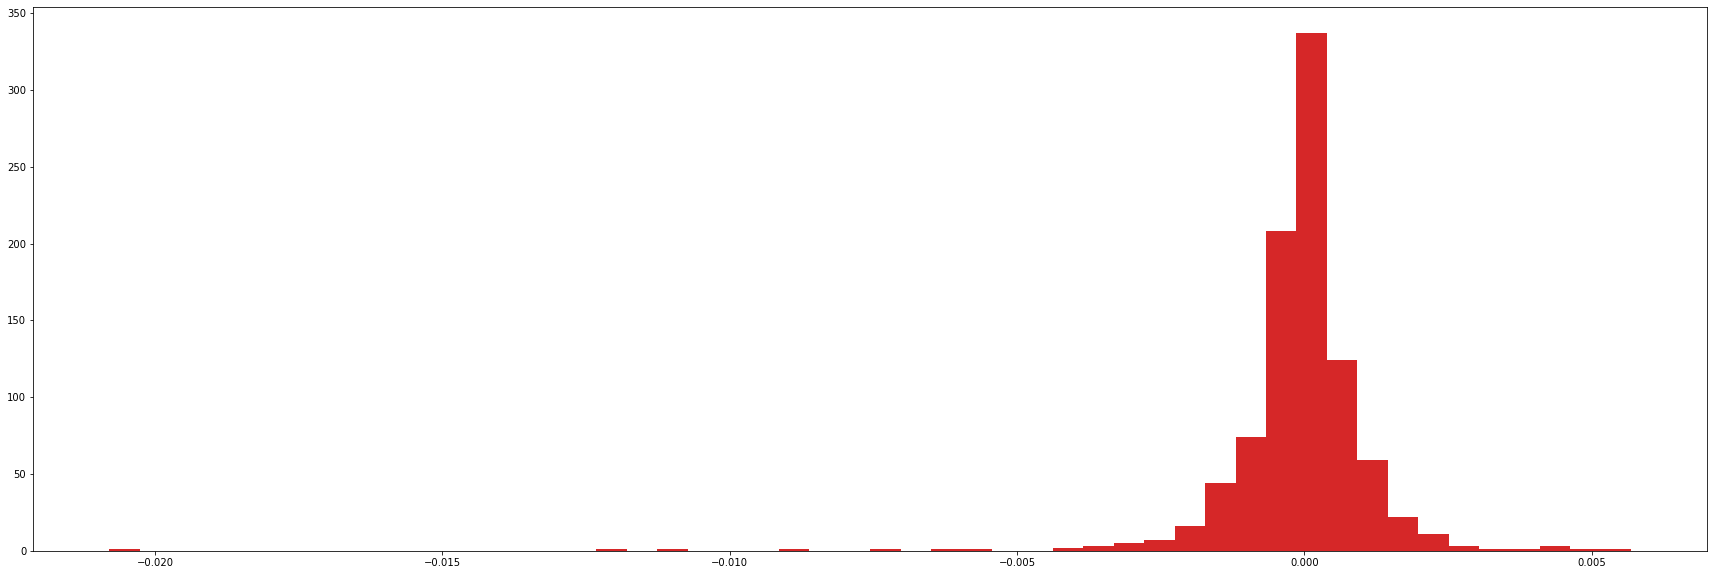

Ret_158


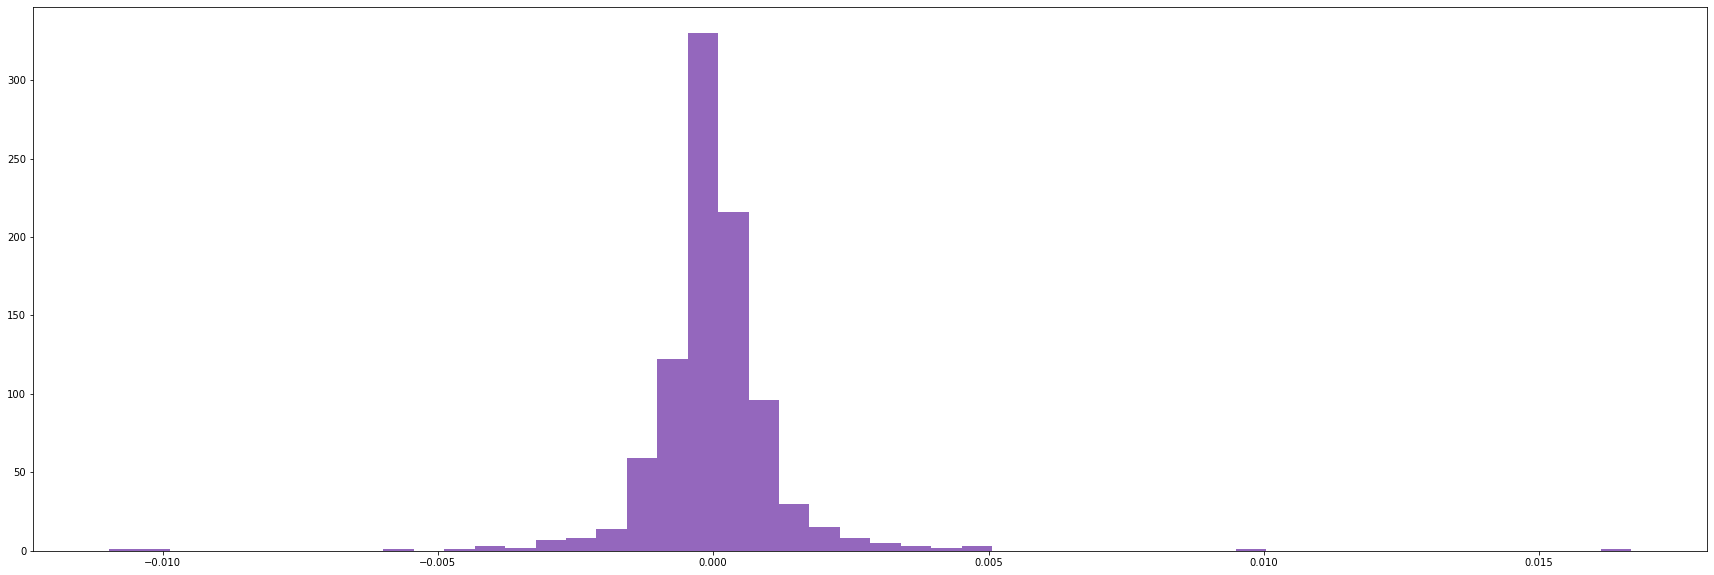

Ret_159


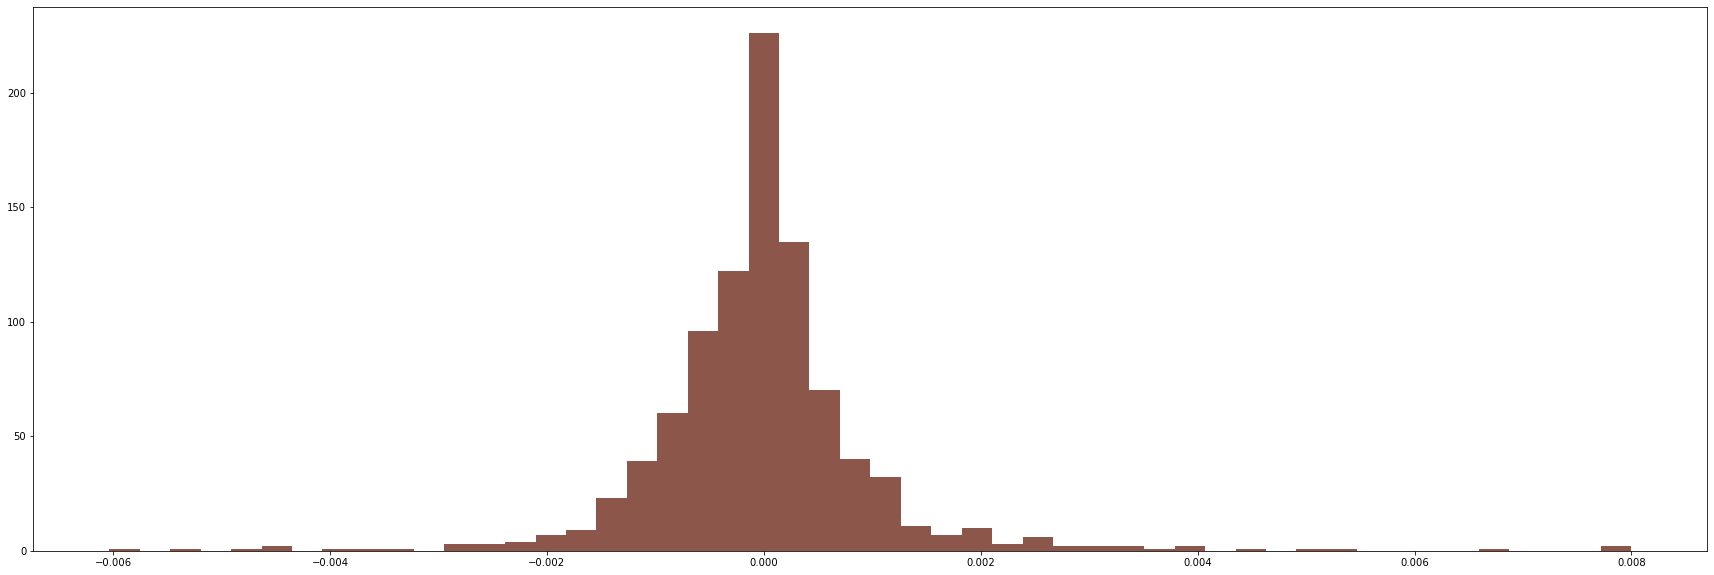

Ret_160


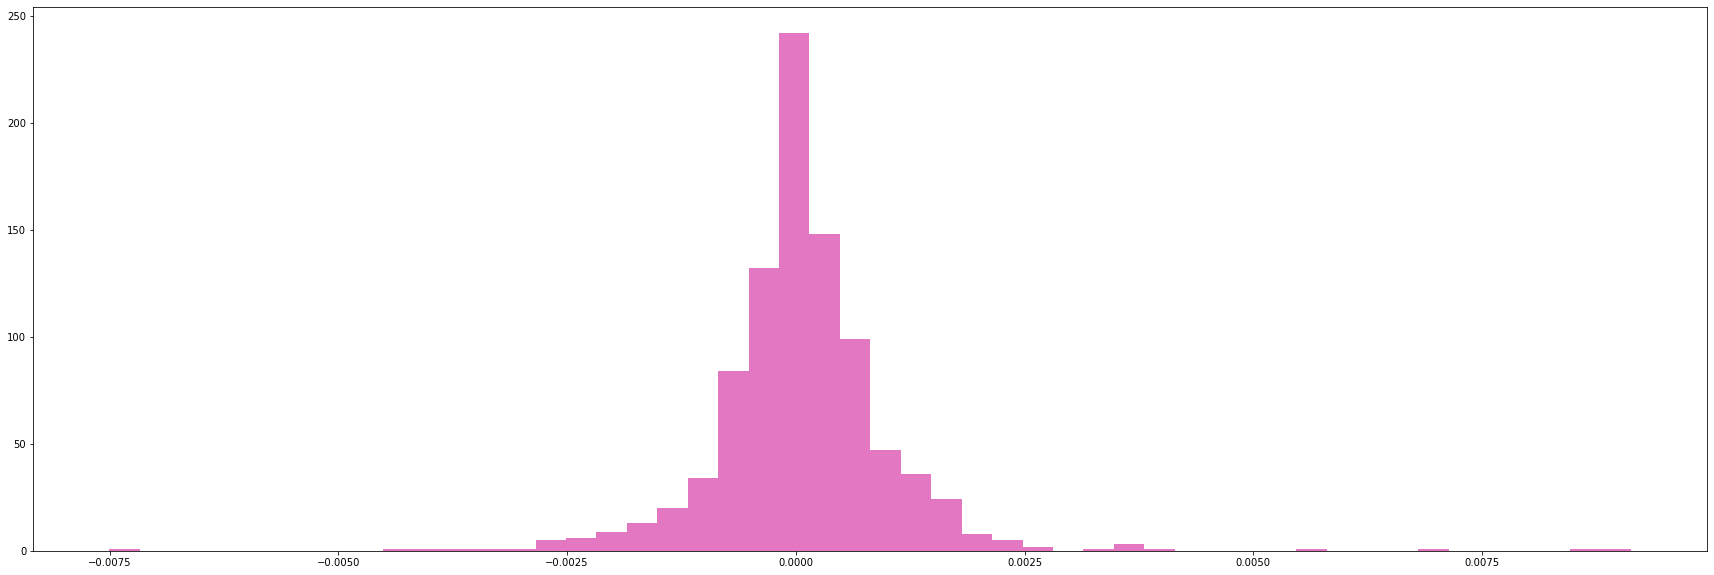

Ret_161


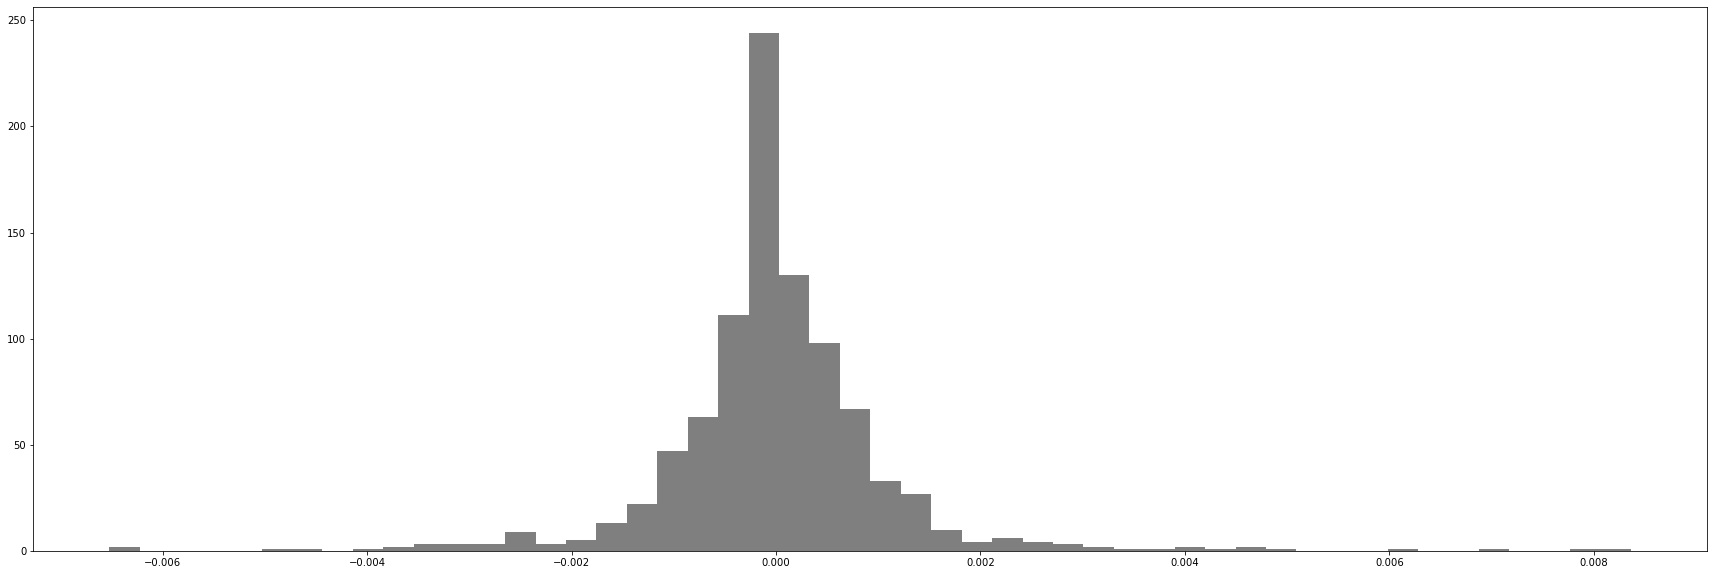

Ret_162


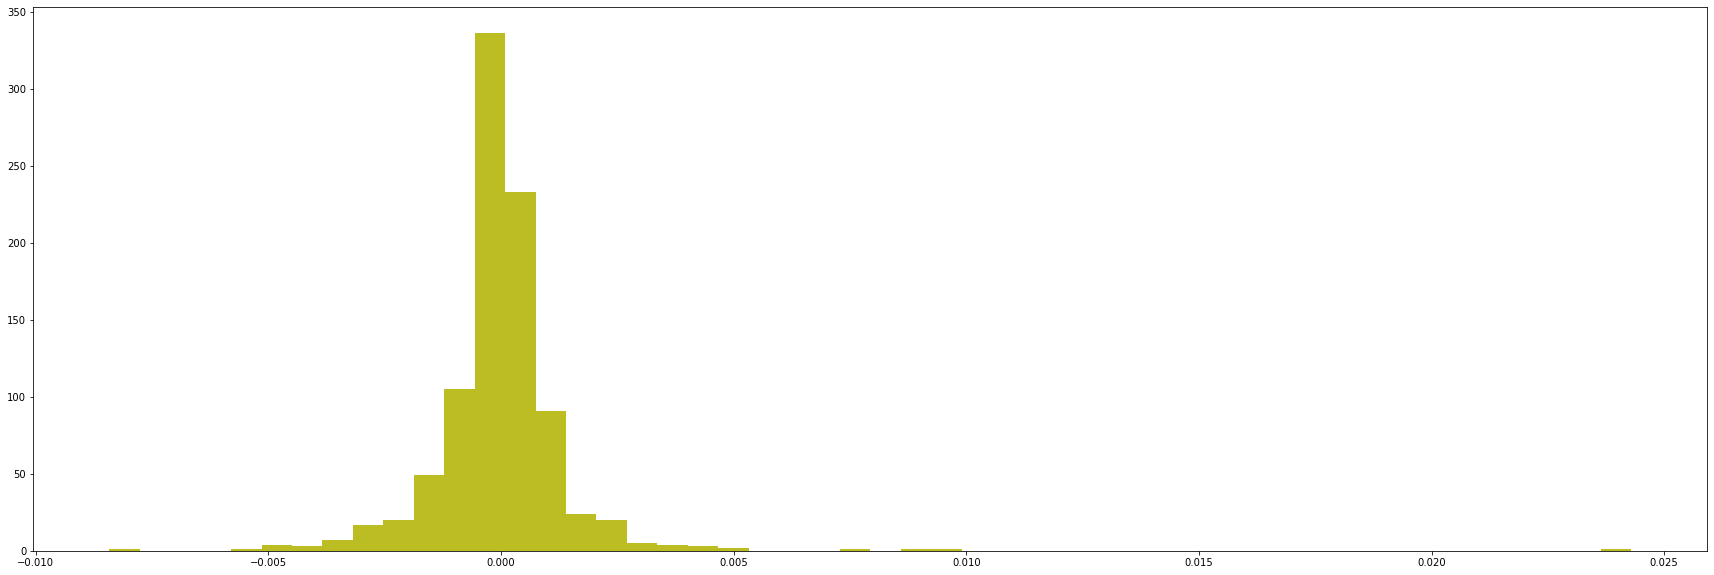

Ret_163


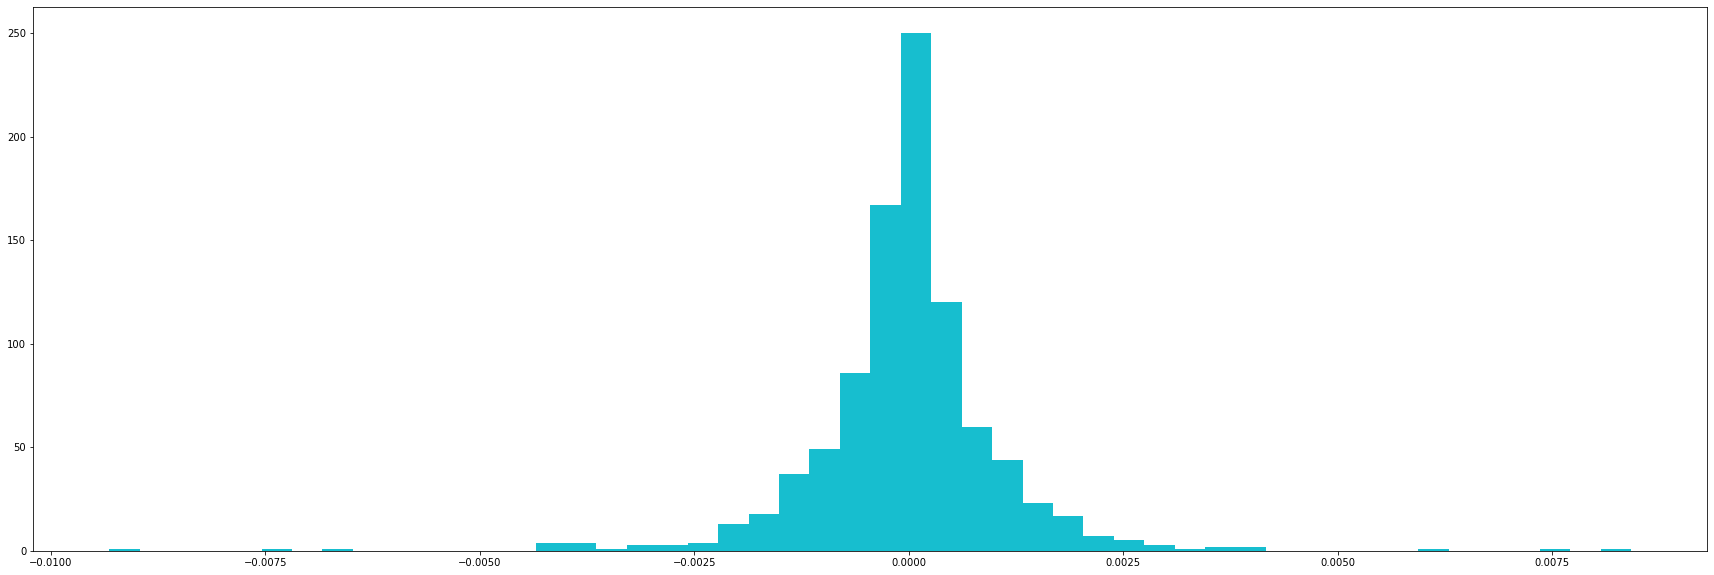

Ret_164


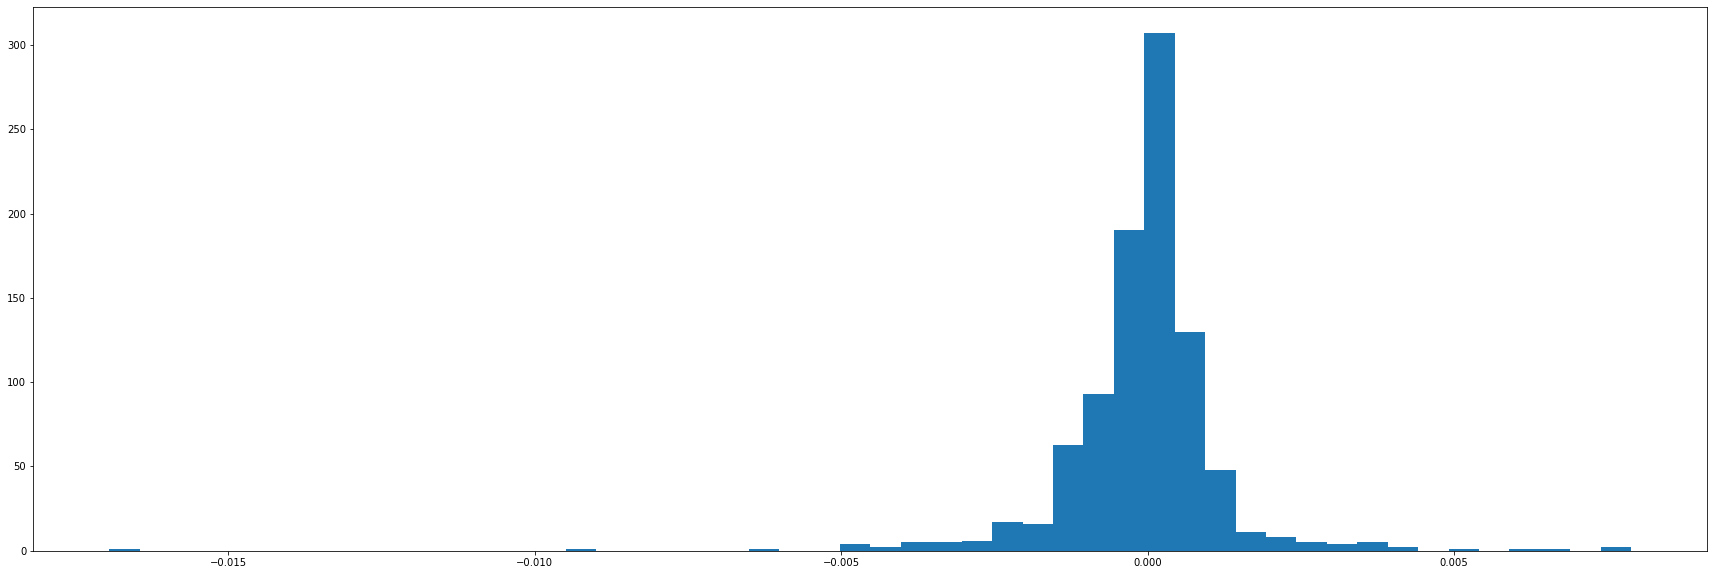

Ret_165


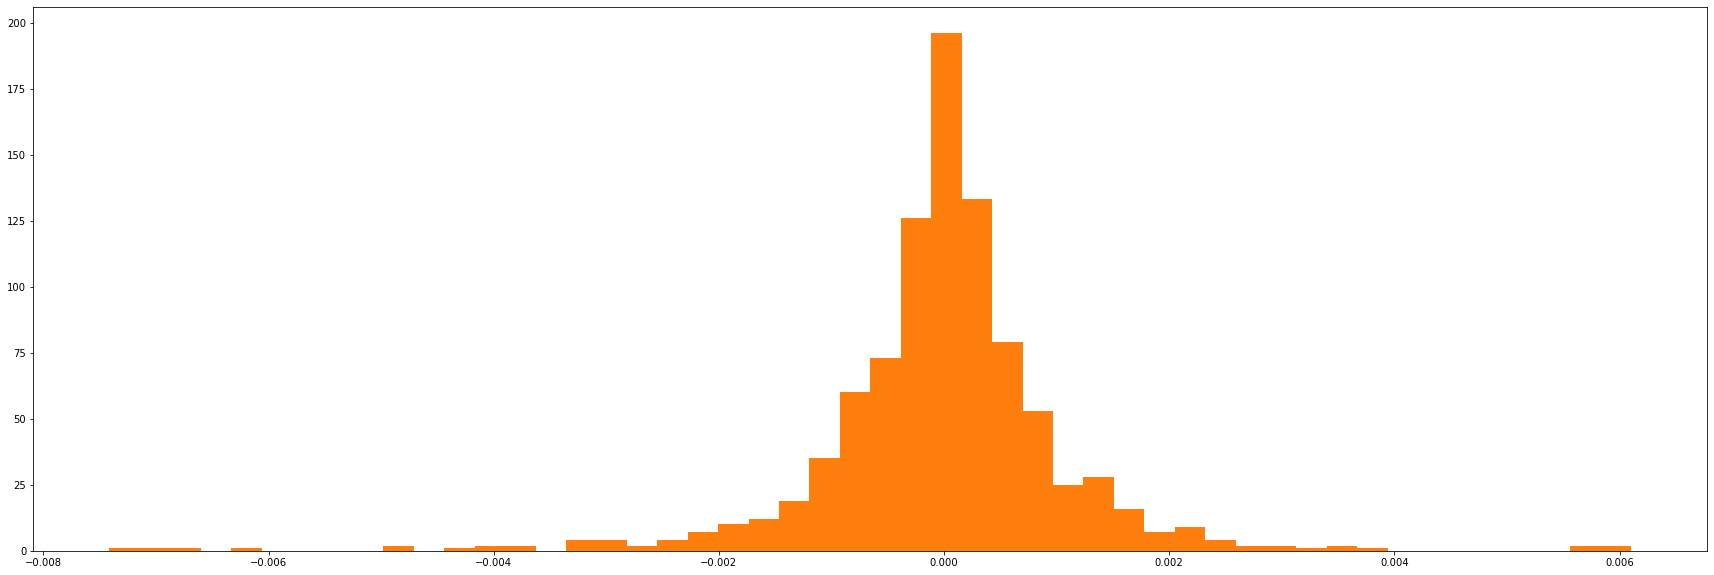

Ret_166


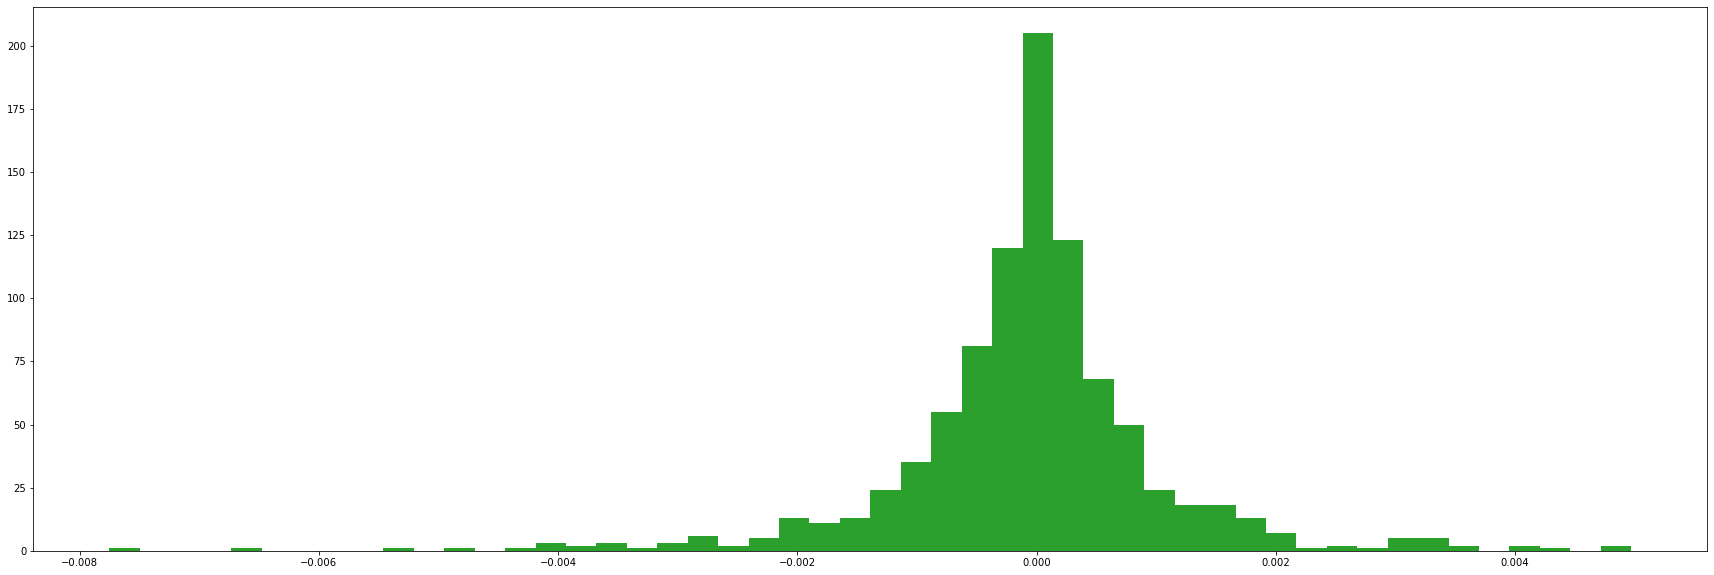

Ret_167


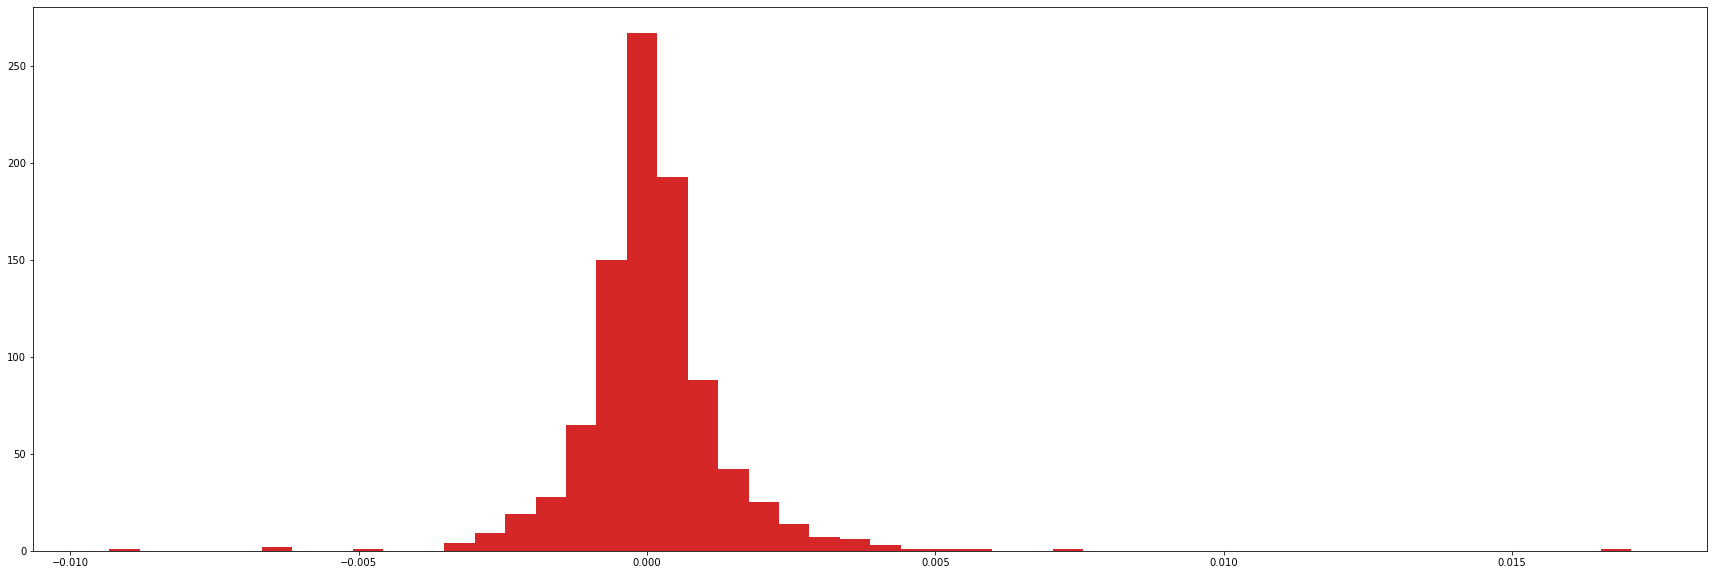

Ret_168


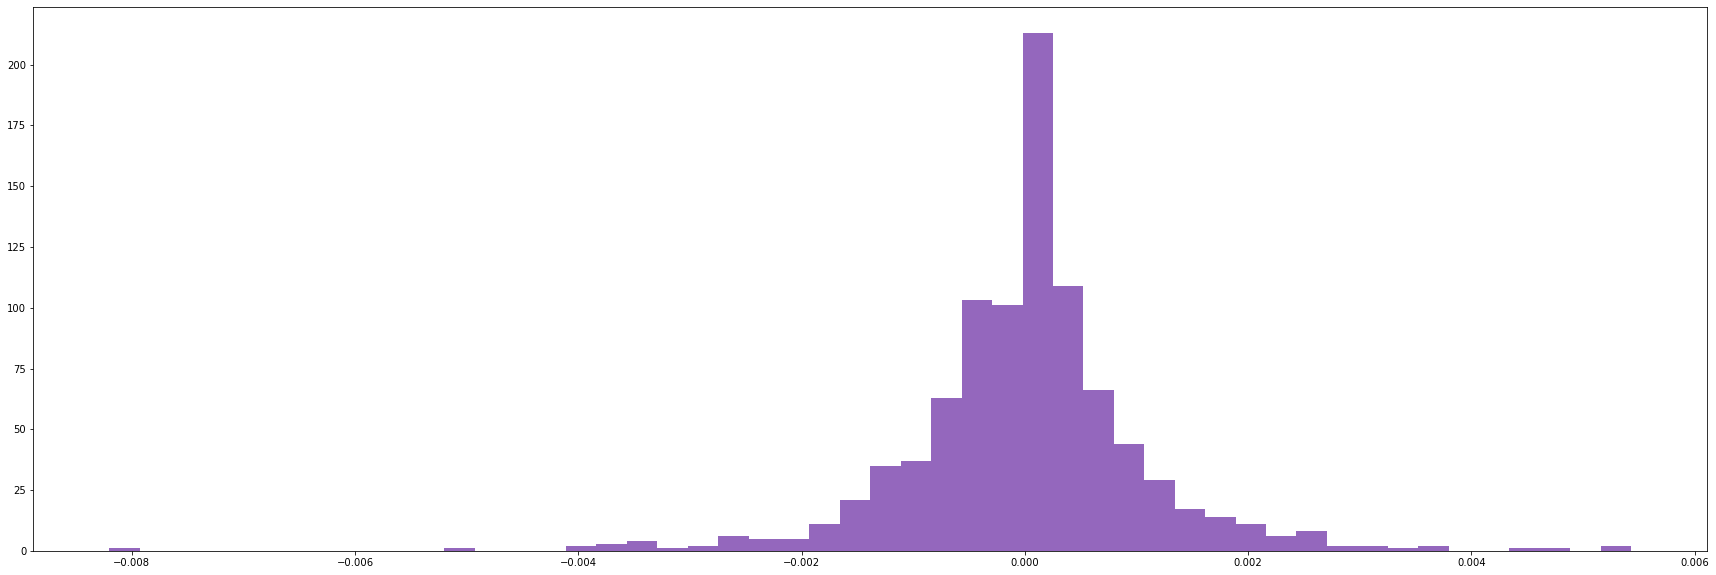

Ret_169


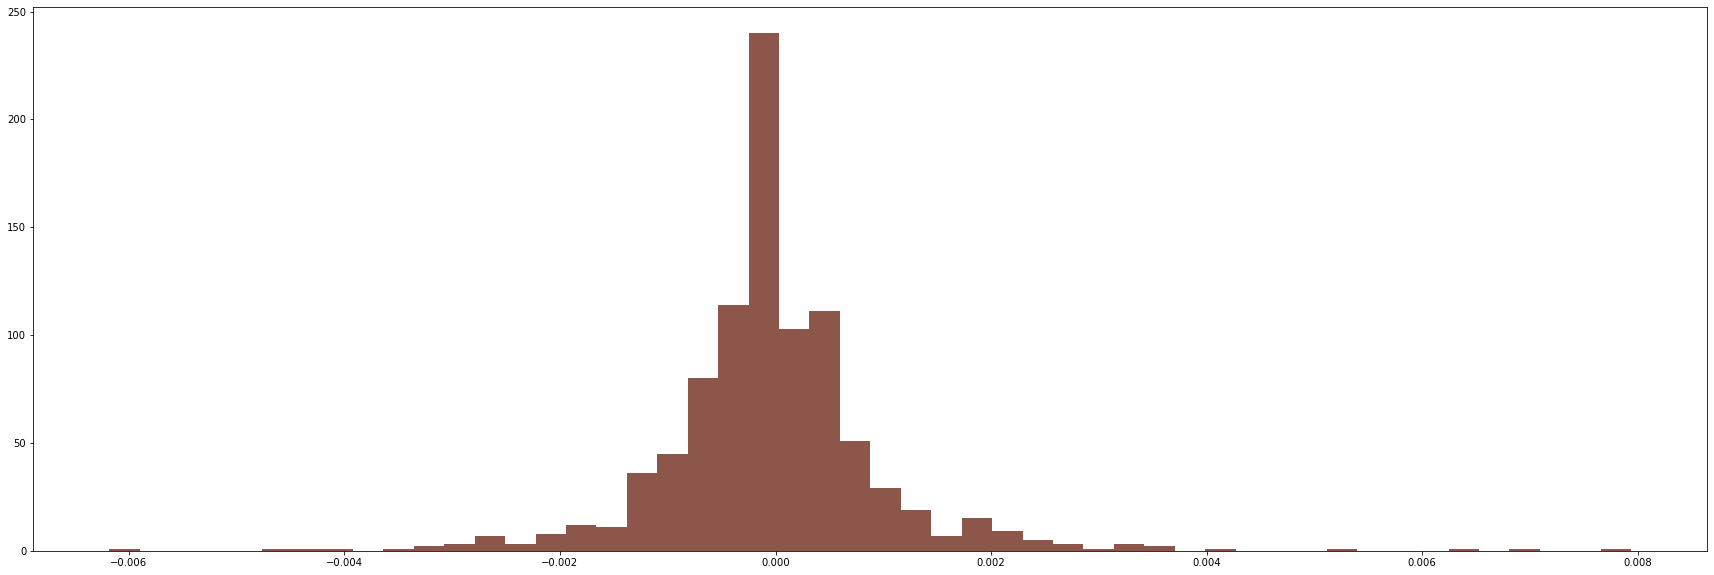

Ret_170


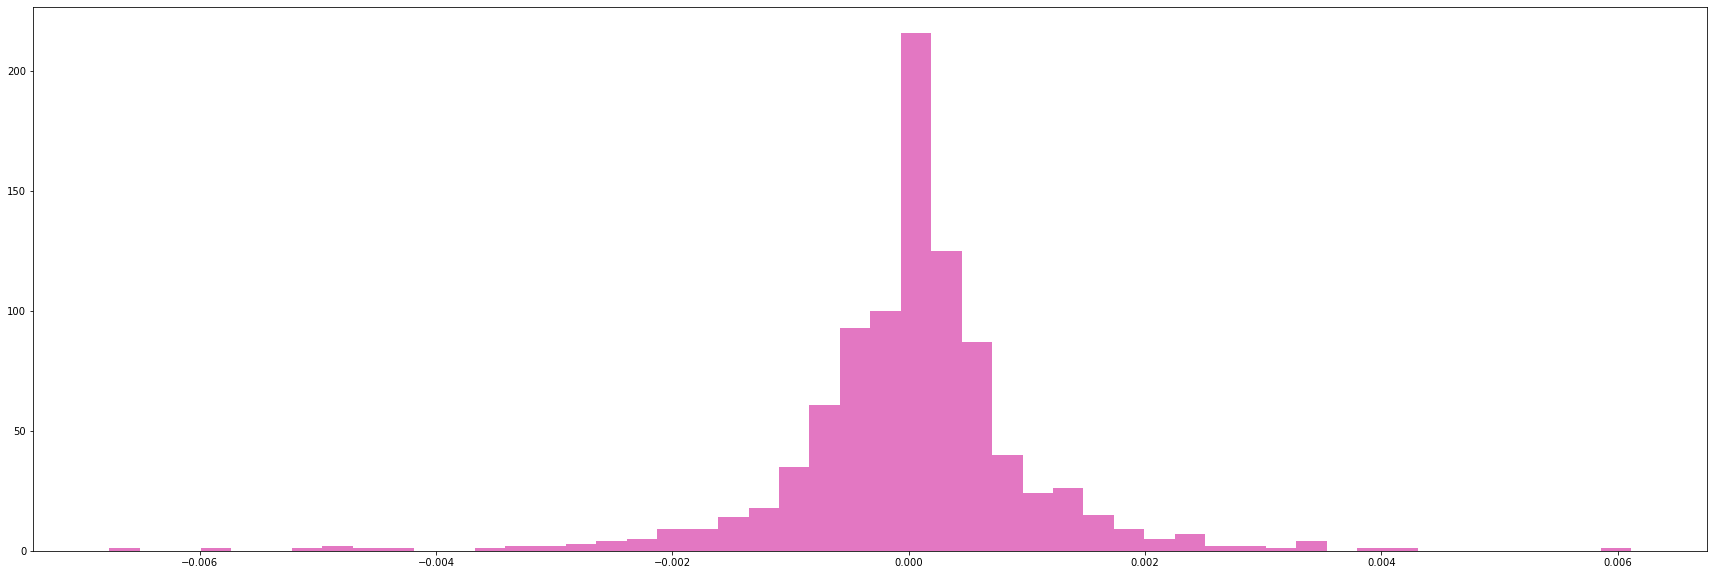

Ret_171


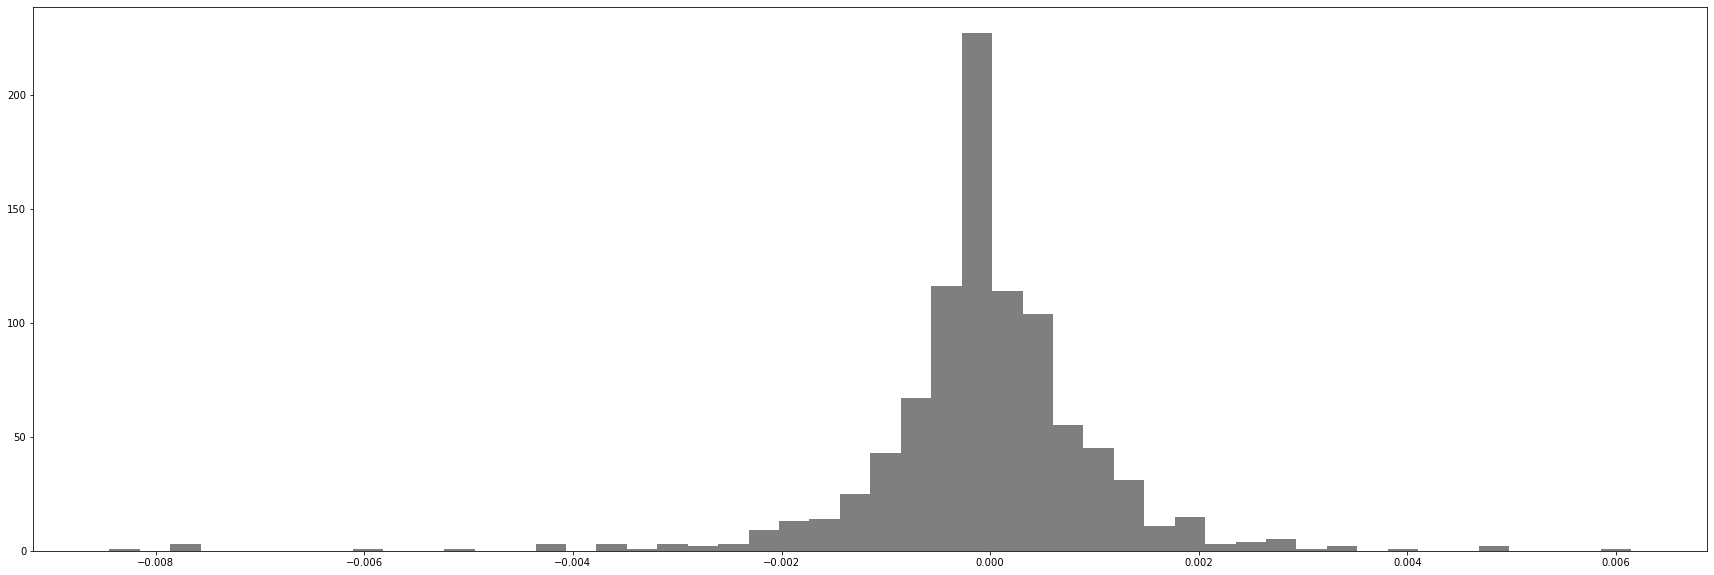

Ret_172


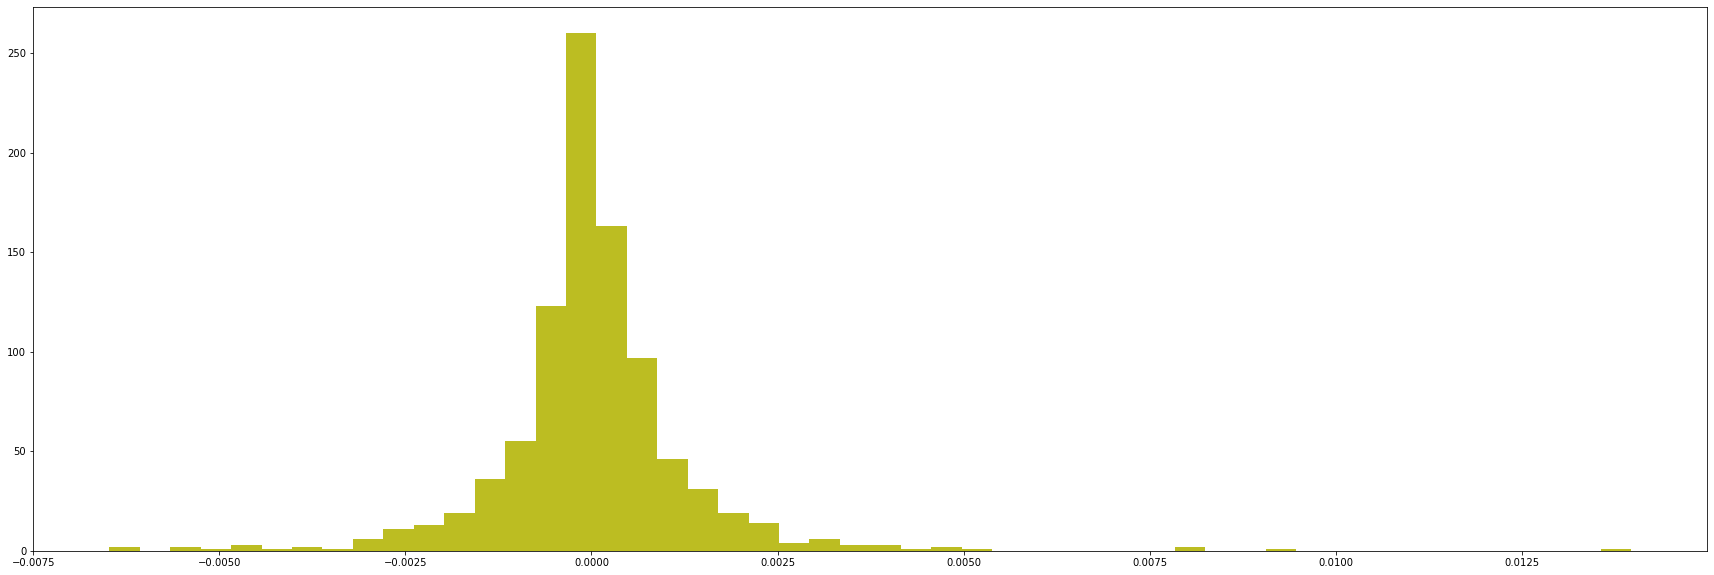

Ret_173


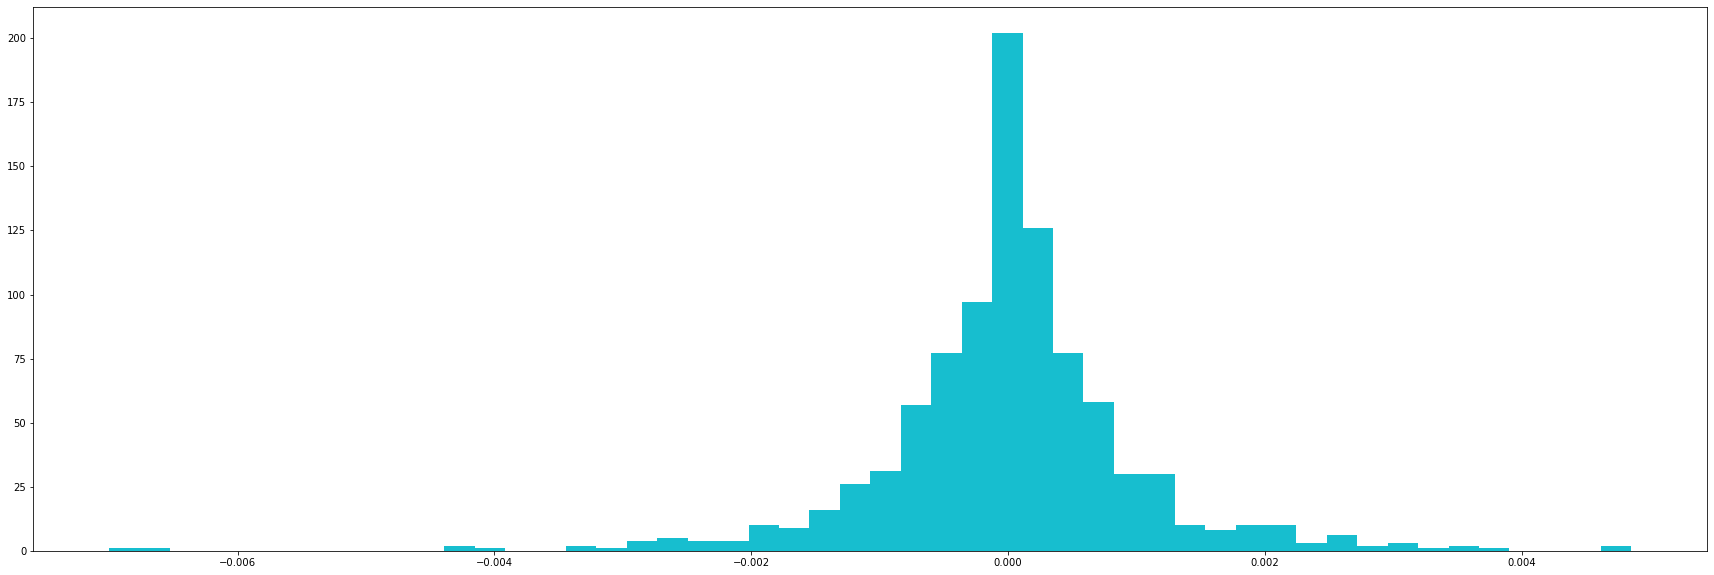

Ret_174


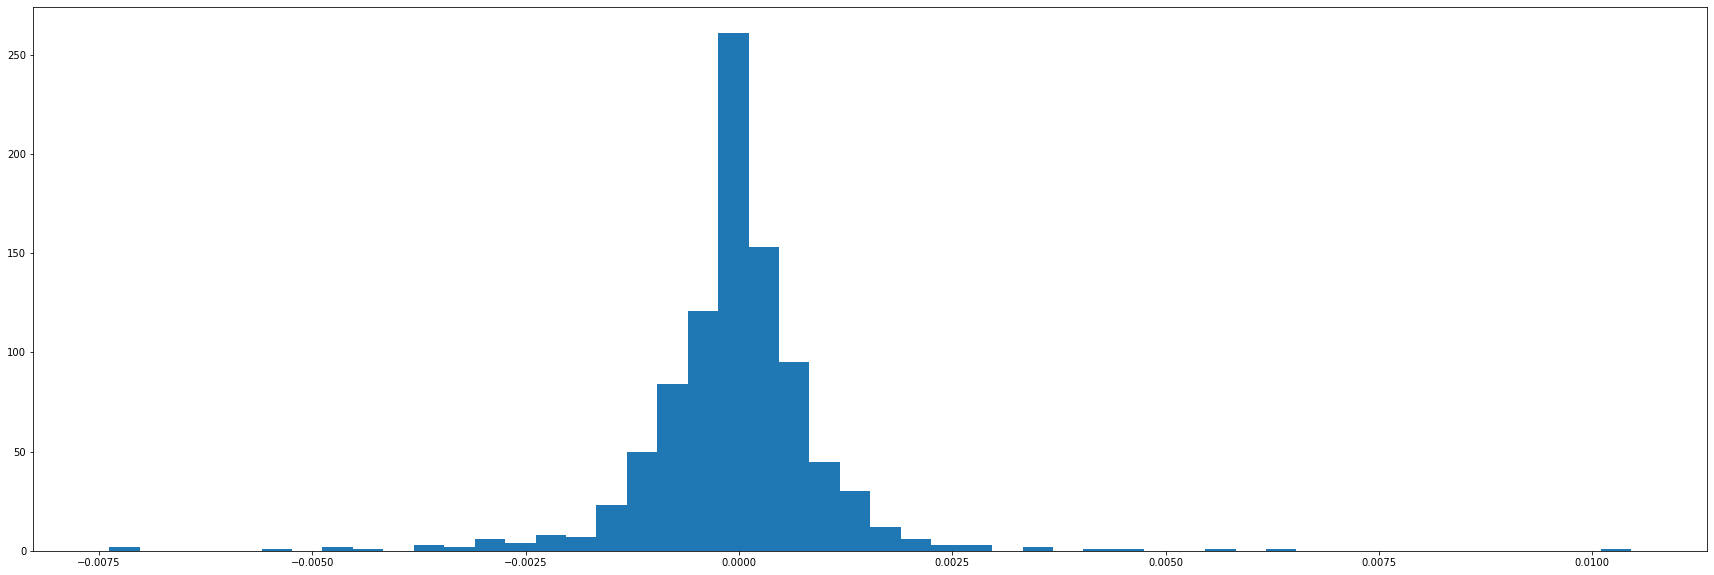

Ret_175


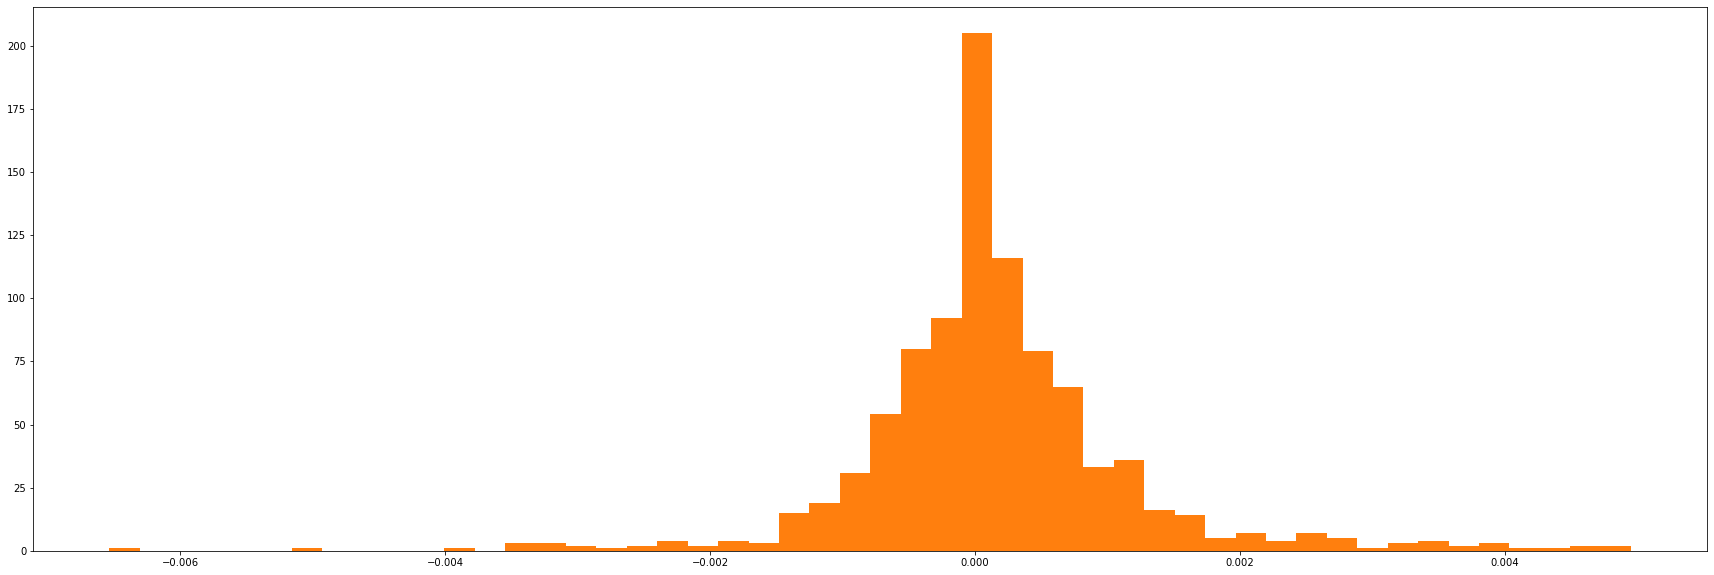

Ret_176


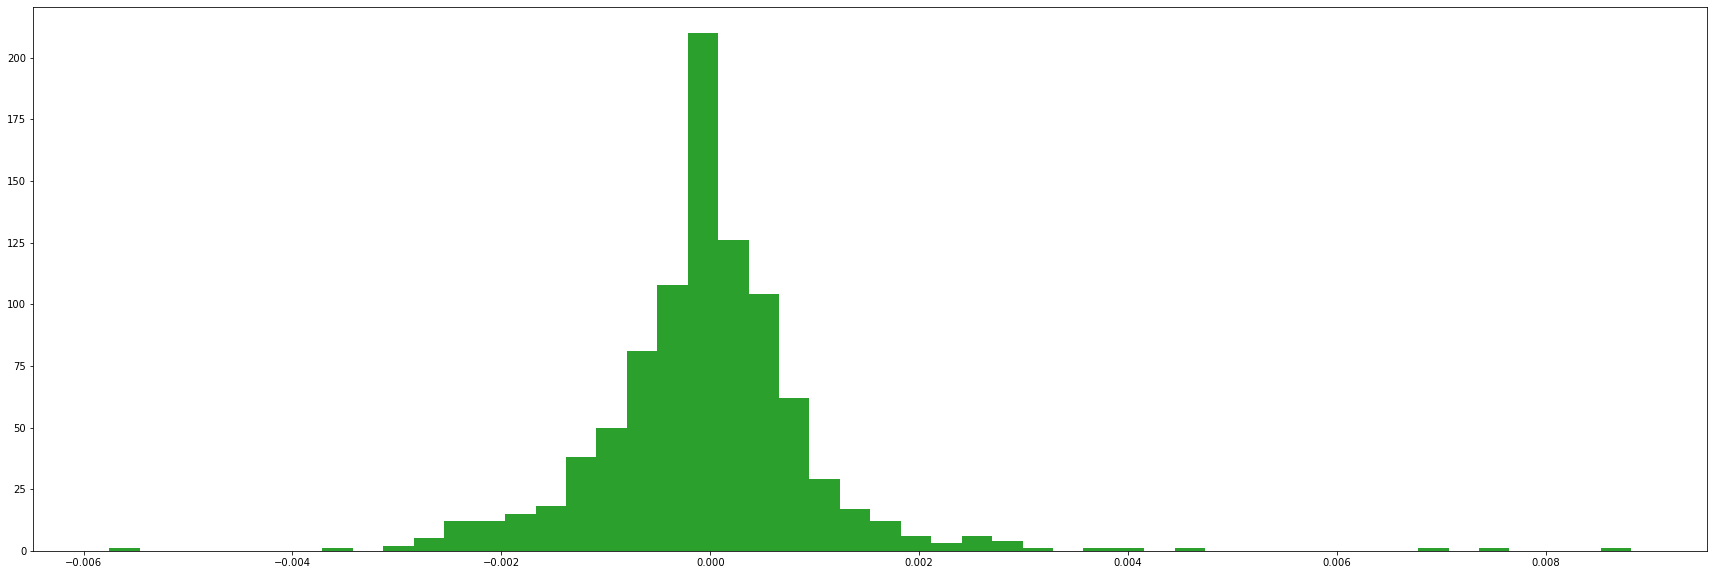

Ret_177


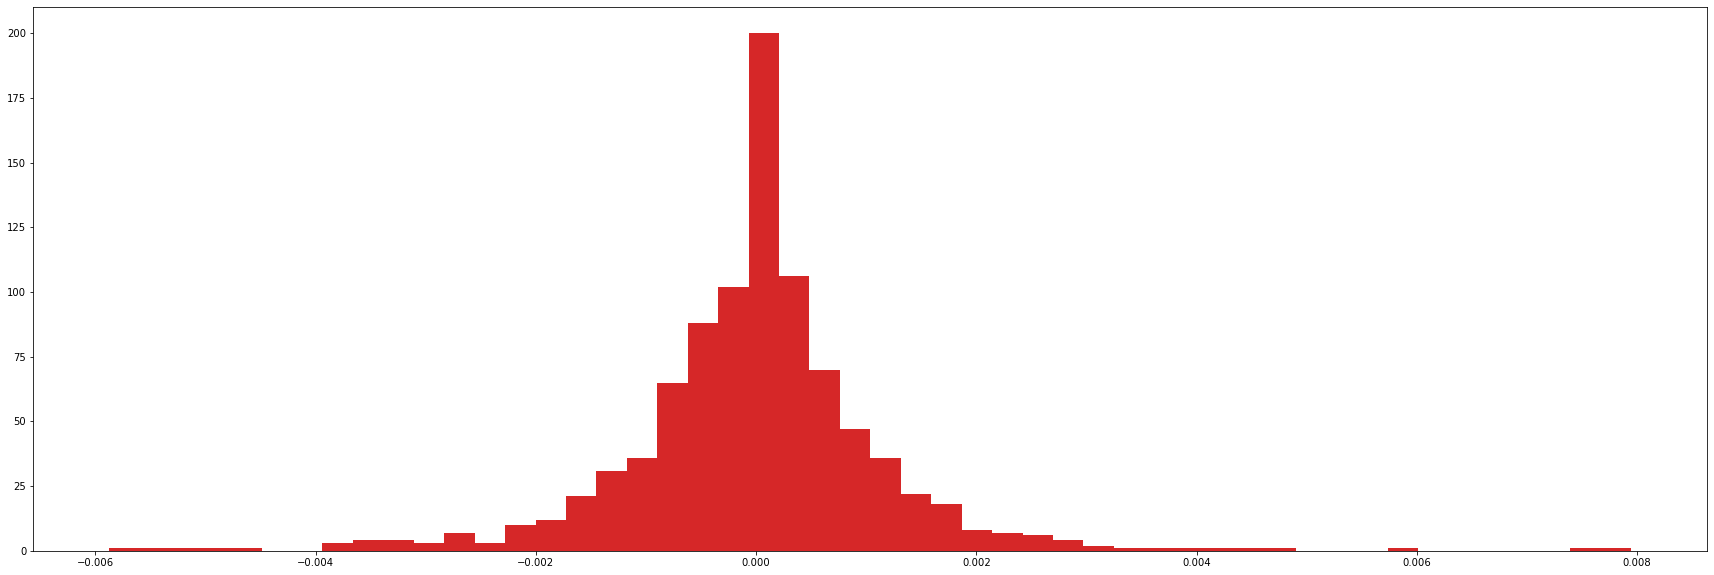

Ret_178


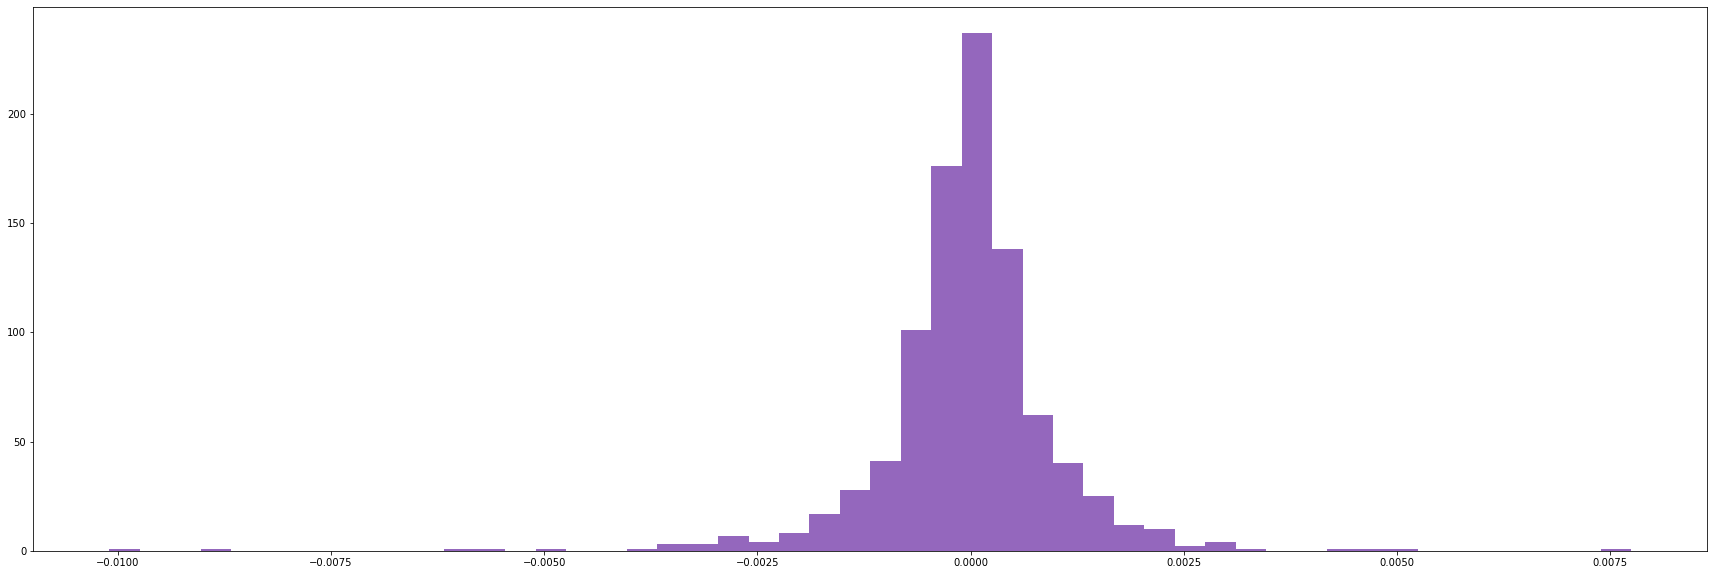

Ret_179


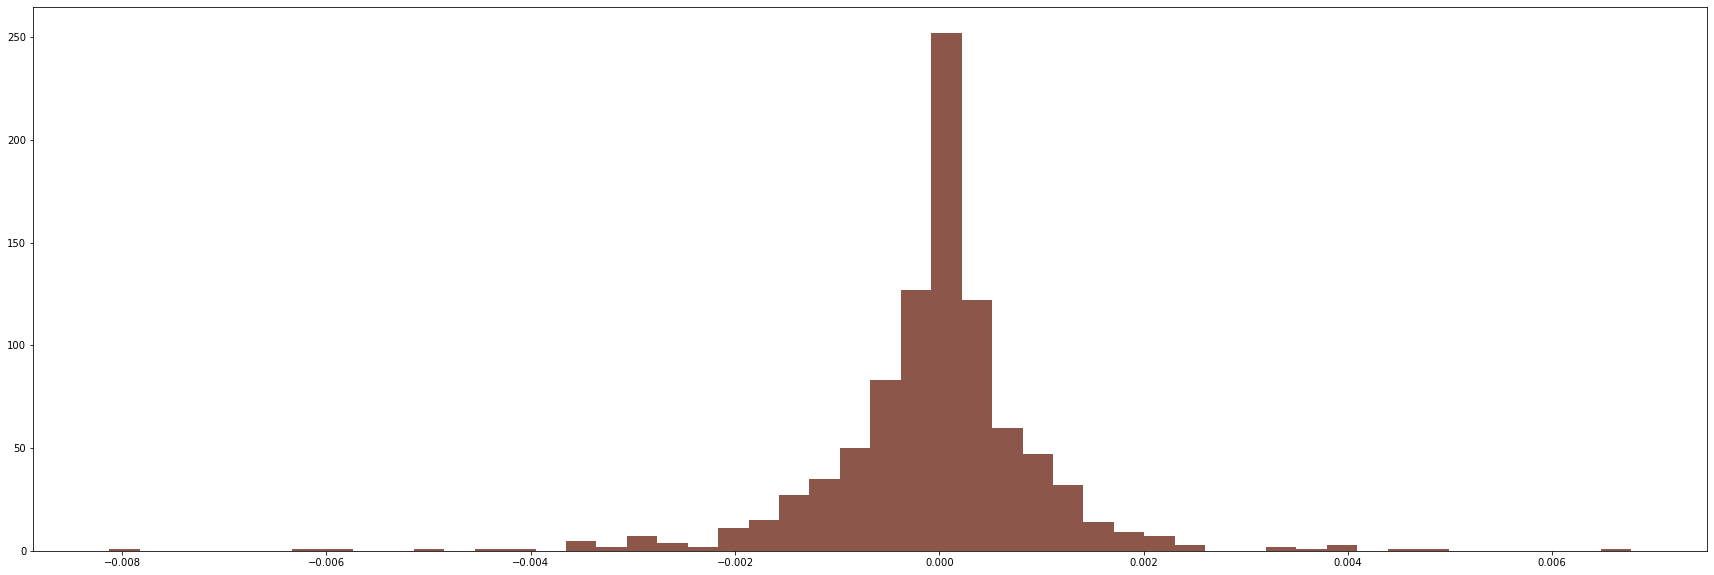

Ret_180


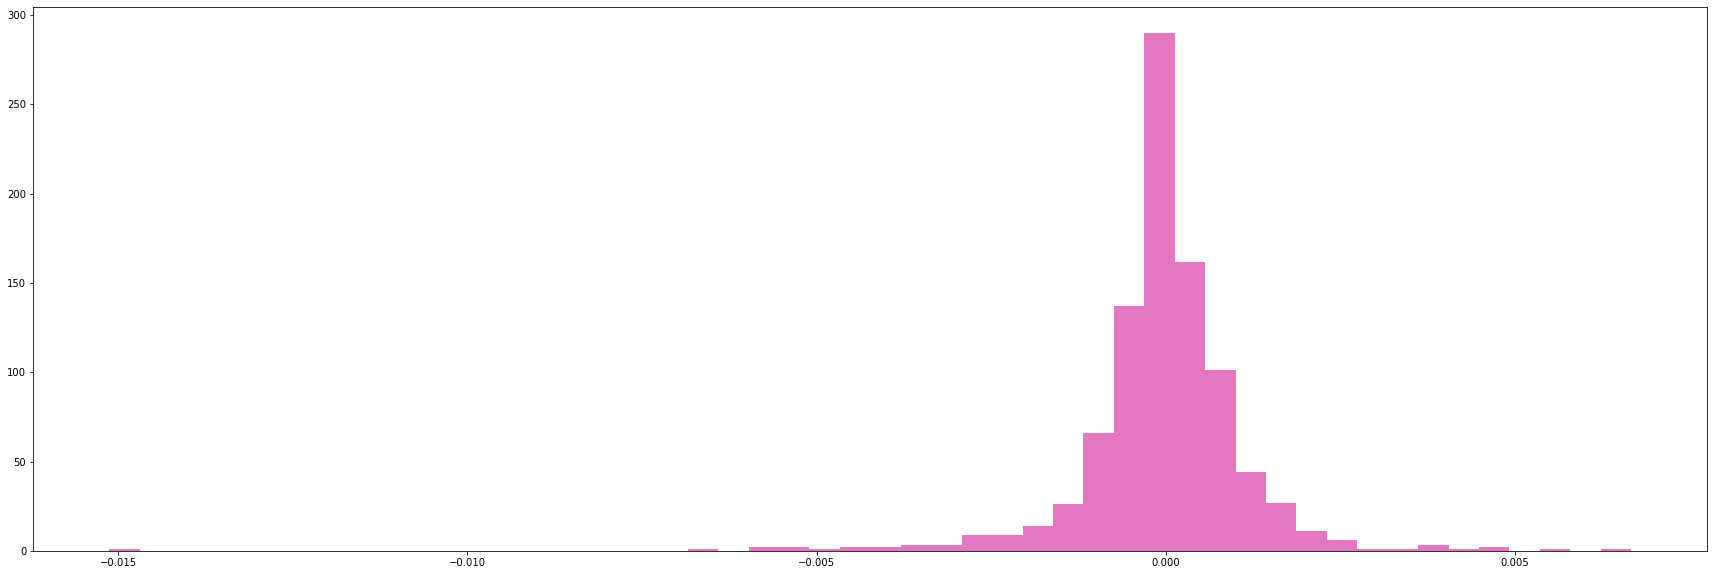

Ret_PlusOne


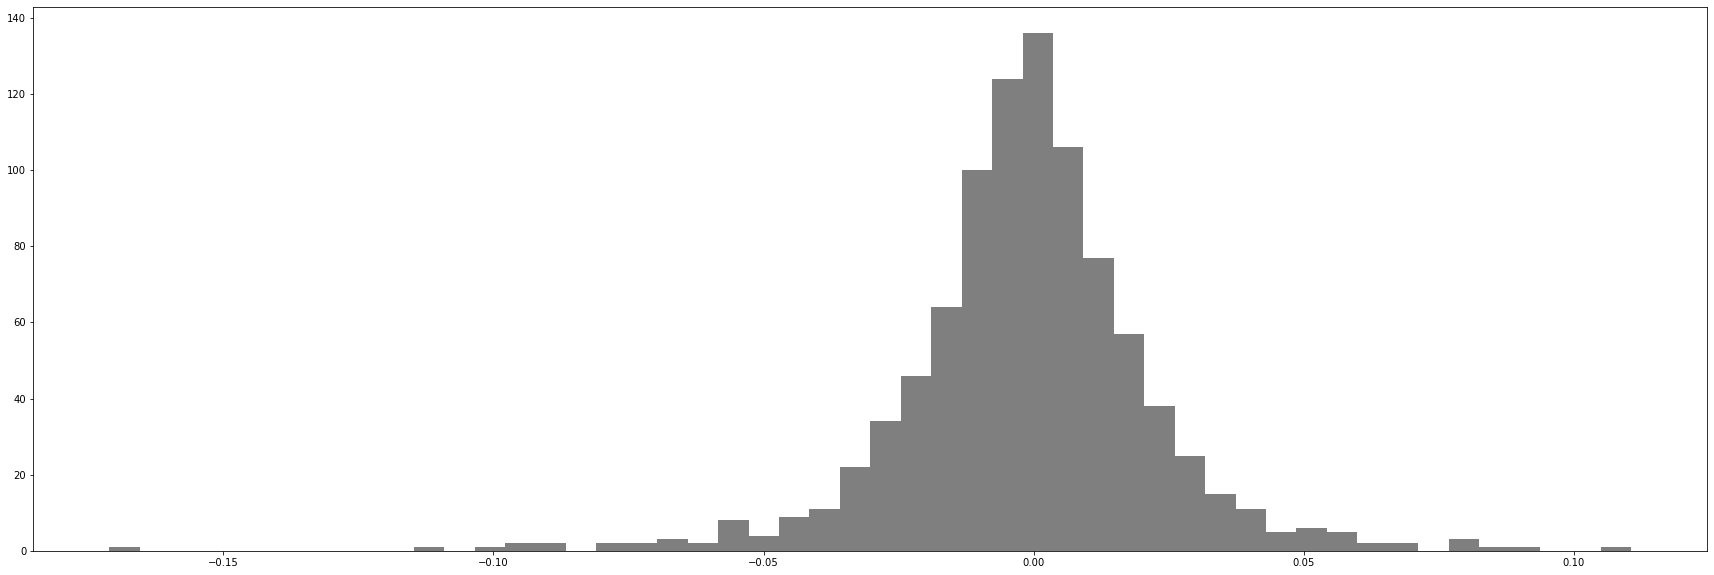

Ret_PlusTwo


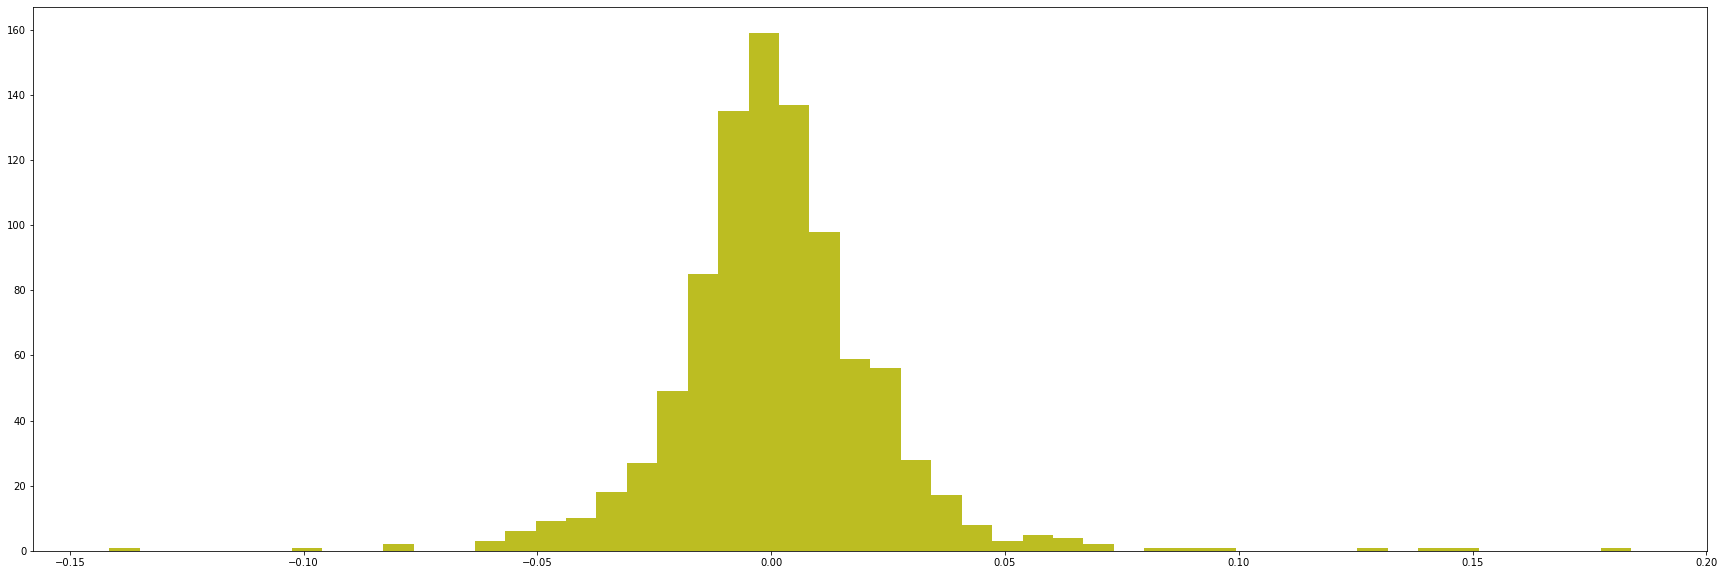

Weight_Intraday


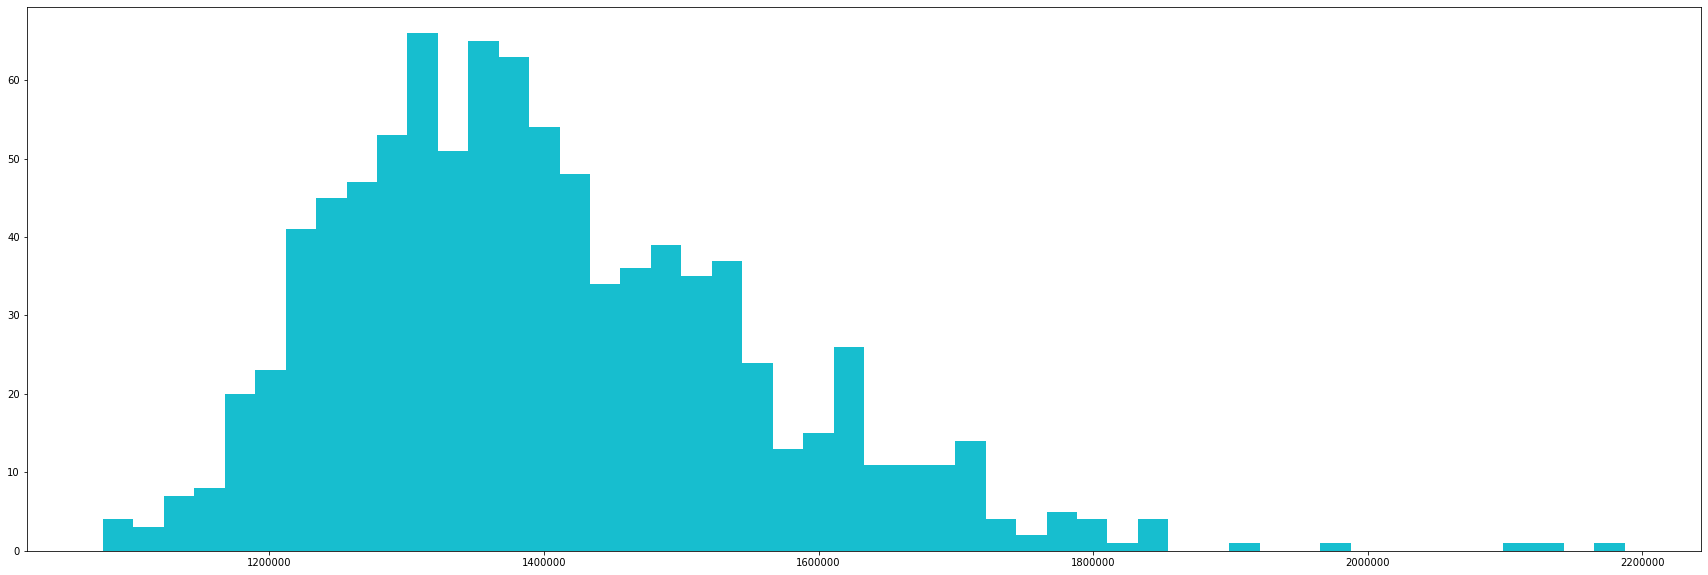

Weight_Daily


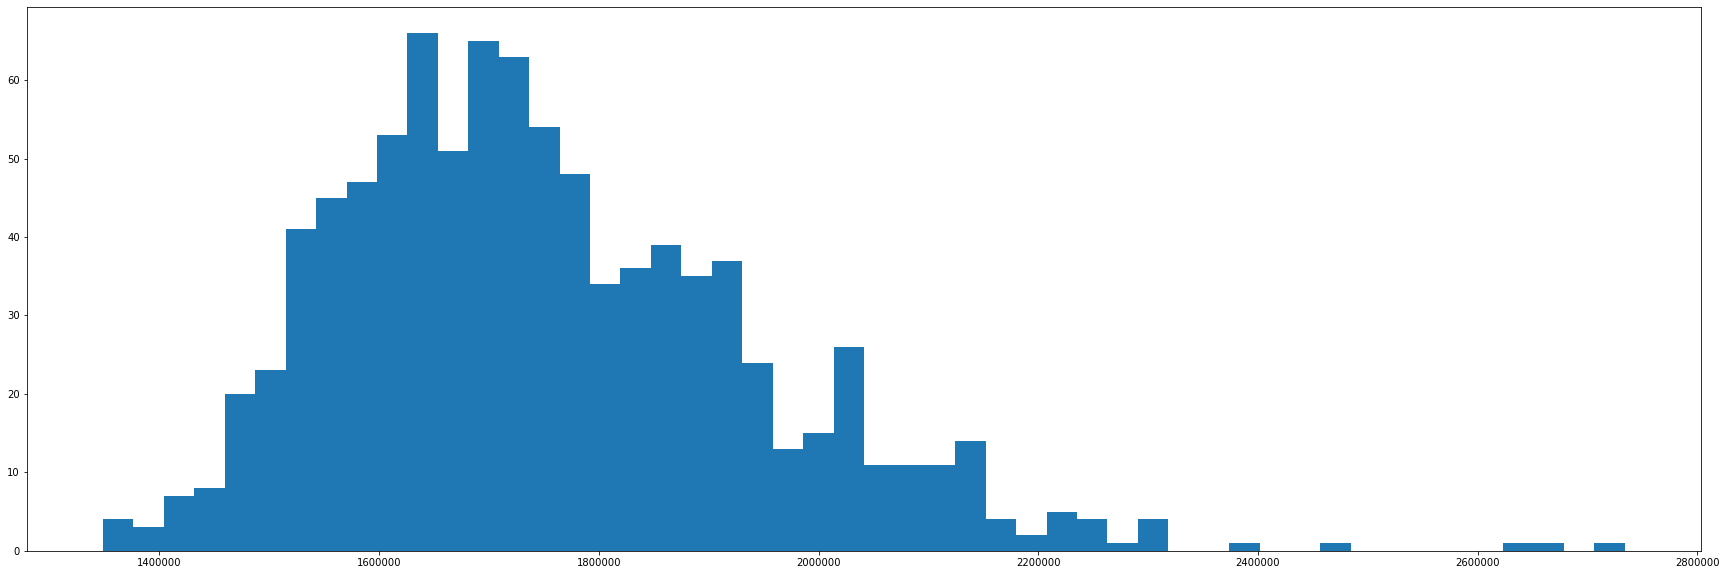

In [147]:
cc = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i, column in enumerate(copied_data.columns):
    print(column)
    figure = plt.figure(figsize=(30,10))
    plt.hist(copied_data[column], color=cc[i%len(cc)], bins=50)
    plt.show()

In [148]:
# copied_data.to_csv("/home/sgarkot/code/returns_prediction/without_nans.csv")

In [149]:
(929/40000)*100

2.3225

We see that number of fully filled rows takes only 2.3 percent of all the data. We cannot allow to drop 98 percent of the data that's why we continued finding out how to fill the missing entries. 


A common approach is to fill the missing data in a column with either its mean value or zero through all the columns. However that approach is not suitable for us due to the logic of our data : the rows differ from timestamp to timestamp, in addition the features present the values of characteristics of different companies. 

# Neural Network

The results in the original kaggle competition are evaluated based on the metric called weighted mean absolute error. We did not found the ready implementation 

In [66]:
import torch
from torch import Tensor
from torch.nn import Module, L1Loss
from torchvision.transforms import Normalize

class OwnLoss(Module):

    def __init__(self) :
        super(OwnLoss, self).__init__()

    def forward(self, input_: Tensor, target: Tensor,  weights: Tensor) -> Tensor:

        mae = L1Loss()(input_, target)
        
        weighted_mae = torch.sum((1/len(weights))*(weights*mae))
        
        return weighted_mae
    
class OwnNormalizedLoss(Module):

    def __init__(self) :
        super(OwnNormalizedLoss, self).__init__()

    def forward(self, input_: Tensor, target: Tensor,  weights: Tensor) -> Tensor:

        mae = L1Loss()(input_, target)
        
        weighted_mae = torch.sum((1/sum(weights))*(weights*mae))
        
        return weighted_mae
    

In [67]:
import torch.nn as nn
import torch
from torch.utils.data import Subset, Dataset, DataLoader
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import StepLR

from tqdm import tqdm
from numpy import vstack
from numpy import argmax

In [77]:

#  class NeuralNet(nn.Module):
#     def __init__(self):
#         super(NeuralNet, self).__init__()

#         self.layer0 = nn.Linear(161, 128)
#         self.out = nn.Linear(128, 22)
#         self.act = nn.Tanhshrink()

#     def forward(self, x):
#         x = self.layer0(x)
#         x = self.act(x)
#         x = self.out(x)
#         return x

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        self.layer0 = nn.Linear(161, 128)
        self.layer1 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 22)
        self.act = nn.Tanhshrink()

    def forward(self, x):
        x = self.layer0(x)
        x = self.act(x)
        x = self.layer1(x)
        x = self.act(x)
        x = self.out(x)
        return x

In [70]:
class ReturnsDataset(Dataset):
    
    # load the dataset
    def __init__(self, path):
        
        df = pd.read_csv(path)
        
        self.df = df 
#         simp_imp = KNNImputer(missing_values=np.nan, copy=False)
#         df = pd.DataFrame(data = simp_imp.fit_transform(df), columns=df.columns, index=df.index)
        
        names_of_features, names_of_responces = ReturnsDataset.__get_feature_and_response_names(df)
        
        self.weights = ReturnsDataset.__get_weights_tensor(df)
        
        # store the inputs and outputs
        self.X = df[names_of_features].to_numpy()
        self.y = df[names_of_responces].to_numpy()

        self.X = torch.tensor(self.X)
        self.y = torch.tensor(self.y)
        
        # convert to needed further types
        self.y = self.y.to(torch.float64)
        self.nfolds = 5

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx], self.weights[idx]]
    
    def get_splits(self):
        fraction = 0.8
        upper_boundary = int(self.df.shape[0]*fraction)
        train_indices = [i for i in range(upper_boundary)]
        test_indices = [i for i in range(upper_boundary, self.df.shape[0])]
        
        return train_indices, test_indices
    
    @classmethod
    def __get_weights_tensor(ReturnsDataset, df):
        
        weight_c = []
        
        for column in df.columns[1:]:
            if column in ['Weight_Intraday', 'Weight_Daily']:
                weight_c.append(column)
                
        weights = torch.tensor(df[weight_c].to_numpy())
        return weights
        
    @classmethod
    def __get_feature_and_response_names(ReturnsDataset, df):
    
        X_columns = []
        y_columns = []

        for column in df.columns[1:]:
            if column in ['Ret_MinusOne', 'Ret_MinusTwo']:
                X_columns.append(column)
            elif column in ['Ret_PlusOne', 'Ret_PlusTwo']:
                y_columns.append(column)
            elif (column[:4] =='Ret_' and int(column[4:]) > 160) or (column in ['Ret_PlusOne', 'Ret_PlusTwo']): 
                y_columns.append(column)
            elif (column[:4] =='Ret_' and int(column[4:]) <= 160) or (column in ['Ret_MinusOne', 'Ret_MinusTwo']):
                X_columns.append(column)

        return X_columns, y_columns

    def get_fold_splits(self, fold):
        
        fraction = 0.8
        no_test = self.df.shape[0] - int(self.df.shape[0]*fraction)
#         for fold in range(self.nfolds):
        if fold == self.nfolds - 1:
            test = [i for i in range(no_test*fold, self.df.shape[0])]
            train = [i for i in range(0, no_test*fold)]
        else:
            test = [i for i in range(no_test*fold, no_test*fold + no_test)]
            train = sorted(list(set([i for i in range(self.df.shape[0])]).difference(set(test))))
        
        return train, test

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

def run_train_epoch(cfg, model, train_dl, criterion, optimizer):

    avg_loss = 0

    for i, (inputs, targets, weights) in tqdm(enumerate(train_dl)):
        
        inputs = inputs.to(torch.float)

        targets = targets.to(torch.float)
        
        weights = weights.to(torch.float).to(cfg.device)
        
        inputs = inputs.to(cfg.device)
        targets = targets.to(cfg.device)

        # clear the gradients
        optimizer.zero_grad()

        # compute the model output
        yhat = model(inputs)

        # calculate loss
        loss = criterion(yhat, targets, weights)
        avg_loss += loss

        # credit assignment
        loss.backward()

        # update model weights
        optimizer.step()

    avg_loss = avg_loss / len(train_dl.dataset)
    

    return  avg_loss

def run_validation_epoch(cfg, model, test_dl, criterion, return_results=False, criterion2 = OwnNormalizedLoss()):

    results = list()

    predictions, actuals = list(), list()

    loss = 0
    loss2 = 0
    for i, (inputs, targets, weights) in tqdm(enumerate(test_dl)):

        inputs = inputs.to(torch.float)
        
        targets = targets.to(torch.float)
        targets = targets.to(cfg.device)
        inputs = inputs.to(cfg.device)
        
        weights = weights.to(torch.float).to(cfg.device)
        
        yhat = model(inputs)

        loss += criterion(yhat, targets, weights)
        loss2 += criterion2(yhat, targets, weights)
        # retrieve numpy array
        yhat = yhat.detach().cpu().numpy()

        yhat = np.asarray(yhat)
        actual = targets.detach().cpu().numpy()
        
        
    
        if return_results:
            columns = []
            
            for predicted_value, actual_value in zip(yhat, actual):
                
                result = []
                
                for pred in actual_value:
                    result.append(float(pred))
                    
                for pred in predicted_value:
                    result.append(float(pred))
                
                results.append(result)

            for el in range(len(actual[0])):
                columns.append("label-"+str(el))
                
            for el in range(len(yhat[0])):
                columns.append("predicted-"+str(el))
                
        # storing
        predictions.append(yhat)
        actuals.append(actual)
        
    if return_results:
        summary_df = pd.DataFrame(results, columns=columns)
        return summary_df, loss / len(test_dl.dataset), loss2 / len(test_dl.dataset)
    
    loss = loss / len(test_dl.dataset)
    loss2 = loss2 / len(test_dl.dataset)
    return loss, loss2

In [72]:

# https://github.com/Bjarten/early-stopping-pytorch/blob/master/pytorchtools.py

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""

    def __init__(self, patience=3, verbose=False, delta=0.001, path='checkpoint.pt', trace_func=print):

        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print
        """

        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

    def __call__(self, val_loss, model):

        score = val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            
        elif score >= self.best_score - self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        elif score < self.best_score - self.delta:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(
                f'Validation loss decreased ({self.val_loss_min:.8f} --> {val_loss:.8f}).  Saving model ...\n', val_loss - self.val_loss_min)
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [73]:
def train_for_a_fold(cfg, fold, dataset, extended=False):

    PATH_TO_SAVE = cfg.path(fold)
    
    model = NeuralNet()
    
    model.to(cfg.device)

    criterion = cfg.criterion

    optimizer = Adam(model.parameters(), lr=0.1)

    stopper = EarlyStopping(patience=20, verbose=True, path = PATH_TO_SAVE + '/fold' + str(fold) + '_earlystopper.pth')

    scheduler = StepLR(optimizer, step_size=10, gamma=0.9)

    indices_train, indices_test = dataset.get_fold_splits(fold)
    
    train_dl = DataLoader(Subset(dataset, indices_train), batch_size=32)
    test_dl = DataLoader(Subset(dataset, indices_test), batch_size=1024)
    
    validation_losses = []
    
    for epoch in range(cfg.num_epochs):

        print("EPOCH:", epoch)
        train_loss = run_train_epoch(cfg, model, train_dl, criterion, optimizer)
        test_loss,_ = run_validation_epoch(cfg, model, test_dl, criterion)

        stopper(test_loss, model)

        message = 'epoch {:d}/{:d}, train {} {:.4f}, \n Test {} {:.4f}, best test {} {:.4f}'.format(
                  epoch + 1, cfg.num_epochs, 'WMAE', train_loss,
                  'WMAE', test_loss,
                  'WMAE', stopper.best_score)

        print(message)
        validation_losses.append(test_loss)
        scheduler.step()

        if stopper.early_stop:
            break

    print("Model saved at " + stopper.path)
    return torch.mean(torch.tensor(validation_losses))
    
    

In [83]:
def test_for_a_fold(cfg, fold, dataset):
    
    
#     indices = get_test(data_pd, fold)
#     test_dl = DataLoader(Subset(dataset, indices), batch_size=256)
    indices_train, indices_test = dataset.get_fold_splits(fold)
    
    test_dl = DataLoader(Subset(dataset, indices_test), batch_size=1024)
    
    model = NeuralNet()
    model.load_state_dict(torch.load(cfg.path(fold)+'/fold' + str(fold) + '_earlystopper.pth'))
        
    criterion = OwnLoss()
    df, error1, error2 = run_validation_epoch(cfg, model, test_dl, criterion, True)
    df.to_csv(cfg.path(fold)+'/preds.csv', index=False)
    print("Error:", error1)
    return df, error1, error2

In [104]:
class Config:

    def __init__(self):

        # related to data
        self.path_to_dataset =  "/home/sgarkot/code/returns_prediction/train_imputed.csv"

        # related to model
        self.num_epochs = 50
#         
        self.device = torch.device("cpu")
#         self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        self.criterion = OwnLoss()

    def path(self, fold):
        return  "/home/sgarkot/code/returns_prediction/models/Hardshrink_fold_" + str(fold)

In [105]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        self.layer0 = nn.Linear(161, 128)
        self.out = nn.Linear(128, 22)
        self.act = nn.Tanhshrink()

    def forward(self, x):
        x = self.layer0(x)
        x = self.act(x)
        x = self.out(x)
        return x
    
    
cfg = Config()
model = NeuralNet()
criterion = cfg.criterion
optimizer = Adam(model.parameters(), lr=0.1)
dataset = ReturnsDataset(cfg.path_to_dataset)

indices_train, indices_test = dataset.get_splits()
train_dl = DataLoader(Subset(dataset, indices_train), batch_size=32)

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, median_absolute_error, r2_score


metrics = {}
validation_losses_per_fold = {}
for fold in range(5):
    print("Fold", fold)
    during_train = train_for_a_fold(cfg, fold, dataset)
    df, error1, error2 = test_for_a_fold(cfg, fold, dataset)
    labeled = np.array([df[i] for i in df.columns if 'label' in i])
    predicted_ = np.array([df[i] for i in df.columns if 'predicted' in i])
    weights = torch.tensor(dataset.weights)
    
    mse = mean_squared_error(labeled, predicted_, squared=False)
    mae = mean_absolute_error(labeled, predicted_)
    r2 = r2_score(labeled, predicted_)
    
    loss_kaggle = error1.detach().numpy()          
    loss_normalized = error2.detach().numpy()

    metrics[fold] = [mae, mse, r2, loss_kaggle, loss_normalized]
    validation_losses_per_fold[fold] = during_train
    
metrics



13it [00:00, 119.28it/s]

Fold 0
EPOCH: 0


1000it [00:09, 105.74it/s]
8it [00:00, 38.22it/s]
11it [00:00, 97.83it/s]

Validation loss decreased (inf --> 33.72671509).  Saving model ...
 tensor(-inf, grad_fn=<SubBackward0>)
epoch 1/20, train WMAE 1485.9098, 
 Test WMAE 33.7267, best test WMAE 33.7267
EPOCH: 1


1000it [00:09, 109.84it/s]
8it [00:00, 41.28it/s]
13it [00:00, 126.20it/s]

EarlyStopping counter: 1 out of 20
epoch 2/20, train WMAE 2906.9929, 
 Test WMAE 66.6204, best test WMAE 33.7267
EPOCH: 2


1000it [00:09, 109.77it/s]
8it [00:00, 26.71it/s]
12it [00:00, 113.71it/s]

EarlyStopping counter: 2 out of 20
epoch 3/20, train WMAE 3841.5830, 
 Test WMAE 77.8198, best test WMAE 33.7267
EPOCH: 3


1000it [00:09, 107.53it/s]
8it [00:00, 29.67it/s]
15it [00:00, 142.87it/s]

EarlyStopping counter: 3 out of 20
epoch 4/20, train WMAE 5000.5591, 
 Test WMAE 79.3674, best test WMAE 33.7267
EPOCH: 4


1000it [00:09, 109.63it/s]
8it [00:00, 37.92it/s]
11it [00:00, 109.67it/s]

EarlyStopping counter: 4 out of 20
epoch 5/20, train WMAE 6538.8428, 
 Test WMAE 63.2273, best test WMAE 33.7267
EPOCH: 5


1000it [00:08, 112.47it/s]
8it [00:00, 30.89it/s]
11it [00:00, 109.78it/s]

EarlyStopping counter: 5 out of 20
epoch 6/20, train WMAE 5025.1499, 
 Test WMAE 51.3220, best test WMAE 33.7267
EPOCH: 6


1000it [00:09, 110.45it/s]
8it [00:00, 33.42it/s]
13it [00:00, 108.03it/s]

EarlyStopping counter: 6 out of 20
epoch 7/20, train WMAE 3782.7290, 
 Test WMAE 58.1302, best test WMAE 33.7267
EPOCH: 7


1000it [00:09, 108.89it/s]
8it [00:00, 34.58it/s]
9it [00:00, 88.34it/s]

EarlyStopping counter: 7 out of 20
epoch 8/20, train WMAE 4380.9473, 
 Test WMAE 53.0079, best test WMAE 33.7267
EPOCH: 8


1000it [00:09, 109.35it/s]
8it [00:00, 25.55it/s]
15it [00:00, 145.09it/s]

EarlyStopping counter: 8 out of 20
epoch 9/20, train WMAE 4004.4470, 
 Test WMAE 59.1165, best test WMAE 33.7267
EPOCH: 9


1000it [00:09, 104.16it/s]
8it [00:00, 29.86it/s]
17it [00:00, 165.15it/s]

EarlyStopping counter: 9 out of 20
epoch 10/20, train WMAE 4225.2324, 
 Test WMAE 58.2323, best test WMAE 33.7267
EPOCH: 10


1000it [00:08, 111.79it/s]
8it [00:00, 33.51it/s]
15it [00:00, 133.75it/s]

EarlyStopping counter: 10 out of 20
epoch 11/20, train WMAE 5094.0239, 
 Test WMAE 49.8032, best test WMAE 33.7267
EPOCH: 11


1000it [00:09, 110.08it/s]
8it [00:00, 35.81it/s]
12it [00:00, 118.52it/s]

EarlyStopping counter: 11 out of 20
epoch 12/20, train WMAE 4016.5134, 
 Test WMAE 39.3186, best test WMAE 33.7267
EPOCH: 12


1000it [00:08, 114.68it/s]
8it [00:00, 27.89it/s]
11it [00:00, 105.67it/s]

EarlyStopping counter: 12 out of 20
epoch 13/20, train WMAE 3639.8879, 
 Test WMAE 38.8348, best test WMAE 33.7267
EPOCH: 13


1000it [00:10, 99.94it/s]
8it [00:00, 35.09it/s]
14it [00:00, 137.44it/s]

EarlyStopping counter: 13 out of 20
epoch 14/20, train WMAE 3496.4614, 
 Test WMAE 40.6427, best test WMAE 33.7267
EPOCH: 14


1000it [00:09, 105.17it/s]
8it [00:00, 40.22it/s]
10it [00:00, 97.84it/s]

EarlyStopping counter: 14 out of 20
epoch 15/20, train WMAE 3236.5203, 
 Test WMAE 38.0186, best test WMAE 33.7267
EPOCH: 15


1000it [00:09, 101.73it/s]
8it [00:00, 26.49it/s]
14it [00:00, 134.37it/s]

EarlyStopping counter: 15 out of 20
epoch 16/20, train WMAE 3828.2686, 
 Test WMAE 46.6317, best test WMAE 33.7267
EPOCH: 16


1000it [00:09, 108.61it/s]
8it [00:00, 35.42it/s]
18it [00:00, 157.45it/s]

EarlyStopping counter: 16 out of 20
epoch 17/20, train WMAE 3953.7505, 
 Test WMAE 42.4843, best test WMAE 33.7267
EPOCH: 17


1000it [00:10, 98.12it/s]
8it [00:00, 42.09it/s]
12it [00:00, 99.96it/s]

EarlyStopping counter: 17 out of 20
epoch 18/20, train WMAE 3607.7644, 
 Test WMAE 41.8348, best test WMAE 33.7267
EPOCH: 18


1000it [00:09, 100.33it/s]
8it [00:00, 29.72it/s]
12it [00:00, 119.59it/s]

EarlyStopping counter: 18 out of 20
epoch 19/20, train WMAE 3767.4766, 
 Test WMAE 38.3667, best test WMAE 33.7267
EPOCH: 19


1000it [00:09, 105.05it/s]
8it [00:00, 37.28it/s]
3it [00:00, 26.02it/s]

EarlyStopping counter: 19 out of 20
epoch 20/20, train WMAE 3606.0396, 
 Test WMAE 48.2990, best test WMAE 33.7267
Model saved at /home/sgarkot/code/returns_prediction/models/Hardshrink_fold_0/fold0_earlystopper.pth


8it [00:00, 26.72it/s]
/home/sgarkot/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
0it [00:00, ?it/s]

Error: tensor(33.7267, grad_fn=<DivBackward0>)
Fold 1
EPOCH: 0


1000it [00:09, 110.85it/s]
8it [00:00, 28.34it/s]
12it [00:00, 117.22it/s]

Validation loss decreased (inf --> 44.36299133).  Saving model ...
 tensor(-inf, grad_fn=<SubBackward0>)
epoch 1/20, train WMAE 1385.6240, 
 Test WMAE 44.3630, best test WMAE 44.3630
EPOCH: 1


1000it [00:09, 100.03it/s]
8it [00:00, 36.65it/s]
15it [00:00, 132.88it/s]

EarlyStopping counter: 1 out of 20
epoch 2/20, train WMAE 3643.9934, 
 Test WMAE 78.8860, best test WMAE 44.3630
EPOCH: 2


1000it [00:09, 101.00it/s]
8it [00:00, 38.36it/s]
14it [00:00, 114.27it/s]

EarlyStopping counter: 2 out of 20
epoch 3/20, train WMAE 3841.3523, 
 Test WMAE 91.7327, best test WMAE 44.3630
EPOCH: 3


1000it [00:09, 109.94it/s]
8it [00:00, 32.64it/s]
11it [00:00, 106.43it/s]

EarlyStopping counter: 3 out of 20
epoch 4/20, train WMAE 5446.8730, 
 Test WMAE 102.3030, best test WMAE 44.3630
EPOCH: 4


1000it [00:09, 110.63it/s]
8it [00:00, 26.81it/s]
14it [00:00, 132.68it/s]

EarlyStopping counter: 4 out of 20
epoch 5/20, train WMAE 6649.0356, 
 Test WMAE 78.6265, best test WMAE 44.3630
EPOCH: 5


1000it [00:09, 107.52it/s]
8it [00:00, 33.11it/s]
17it [00:00, 162.97it/s]

EarlyStopping counter: 5 out of 20
epoch 6/20, train WMAE 5631.3872, 
 Test WMAE 69.2488, best test WMAE 44.3630
EPOCH: 6


1000it [00:09, 107.41it/s]
8it [00:00, 31.37it/s]
13it [00:00, 114.24it/s]

EarlyStopping counter: 6 out of 20
epoch 7/20, train WMAE 4443.8584, 
 Test WMAE 69.0354, best test WMAE 44.3630
EPOCH: 7


1000it [00:09, 108.42it/s]
8it [00:00, 34.71it/s]
16it [00:00, 150.53it/s]

EarlyStopping counter: 7 out of 20
epoch 8/20, train WMAE 4550.5928, 
 Test WMAE 64.4434, best test WMAE 44.3630
EPOCH: 8


1000it [00:08, 112.76it/s]
8it [00:00, 40.37it/s]
18it [00:00, 175.22it/s]

EarlyStopping counter: 8 out of 20
epoch 9/20, train WMAE 4678.1611, 
 Test WMAE 66.8102, best test WMAE 44.3630
EPOCH: 9


1000it [00:09, 107.07it/s]
8it [00:00, 25.89it/s]
16it [00:00, 154.07it/s]

EarlyStopping counter: 9 out of 20
epoch 10/20, train WMAE 4819.7925, 
 Test WMAE 60.0902, best test WMAE 44.3630
EPOCH: 10


1000it [00:09, 107.09it/s]
8it [00:00, 35.55it/s]
8it [00:00, 65.27it/s]

EarlyStopping counter: 10 out of 20
epoch 11/20, train WMAE 5416.5776, 
 Test WMAE 59.1757, best test WMAE 44.3630
EPOCH: 11


1000it [00:09, 107.48it/s]
8it [00:00, 32.01it/s]
13it [00:00, 127.04it/s]

EarlyStopping counter: 11 out of 20
epoch 12/20, train WMAE 4986.8115, 
 Test WMAE 44.5426, best test WMAE 44.3630
EPOCH: 12


1000it [00:09, 109.34it/s]
8it [00:00, 26.72it/s]
12it [00:00, 97.21it/s]

EarlyStopping counter: 12 out of 20
epoch 13/20, train WMAE 3668.5293, 
 Test WMAE 52.2510, best test WMAE 44.3630
EPOCH: 13


1000it [00:09, 105.63it/s]
8it [00:00, 38.16it/s]
16it [00:00, 153.87it/s]

Validation loss decreased (44.36299133 --> 38.60880280).  Saving model ...
 tensor(-5.7542, grad_fn=<SubBackward0>)
epoch 14/20, train WMAE 3858.7605, 
 Test WMAE 38.6088, best test WMAE 38.6088
EPOCH: 14


1000it [00:08, 111.55it/s]
8it [00:00, 37.03it/s]
12it [00:00, 107.21it/s]

EarlyStopping counter: 1 out of 20
epoch 15/20, train WMAE 3272.0176, 
 Test WMAE 39.5373, best test WMAE 38.6088
EPOCH: 15


1000it [00:09, 107.59it/s]
8it [00:00, 38.09it/s]
8it [00:00, 76.57it/s]

EarlyStopping counter: 2 out of 20
epoch 16/20, train WMAE 3531.3579, 
 Test WMAE 55.4508, best test WMAE 38.6088
EPOCH: 16


1000it [00:08, 113.88it/s]
8it [00:00, 28.26it/s]
10it [00:00, 97.06it/s]

EarlyStopping counter: 3 out of 20
epoch 17/20, train WMAE 4373.7046, 
 Test WMAE 50.7670, best test WMAE 38.6088
EPOCH: 17


1000it [00:08, 111.85it/s]
8it [00:00, 31.79it/s]
10it [00:00, 96.84it/s]

EarlyStopping counter: 4 out of 20
epoch 18/20, train WMAE 4656.5098, 
 Test WMAE 49.4903, best test WMAE 38.6088
EPOCH: 18


1000it [00:08, 114.65it/s]
8it [00:00, 34.47it/s]
13it [00:00, 123.26it/s]

EarlyStopping counter: 5 out of 20
epoch 19/20, train WMAE 3956.5435, 
 Test WMAE 56.6042, best test WMAE 38.6088
EPOCH: 19


1000it [00:09, 107.00it/s]
8it [00:00, 28.56it/s]
3it [00:00, 24.32it/s]

EarlyStopping counter: 6 out of 20
epoch 20/20, train WMAE 4455.3828, 
 Test WMAE 49.0455, best test WMAE 38.6088
Model saved at /home/sgarkot/code/returns_prediction/models/Hardshrink_fold_1/fold1_earlystopper.pth


8it [00:00, 22.89it/s]
/home/sgarkot/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
7it [00:00, 69.94it/s]

Error: tensor(38.6088, grad_fn=<DivBackward0>)
Fold 2
EPOCH: 0


1000it [00:08, 112.93it/s]
8it [00:00, 27.95it/s]
12it [00:00, 105.03it/s]

Validation loss decreased (inf --> 39.05379868).  Saving model ...
 tensor(-inf, grad_fn=<SubBackward0>)
epoch 1/20, train WMAE 1315.3636, 
 Test WMAE 39.0538, best test WMAE 39.0538
EPOCH: 1


1000it [00:09, 107.83it/s]
8it [00:00, 42.27it/s]
11it [00:00, 109.14it/s]

EarlyStopping counter: 1 out of 20
epoch 2/20, train WMAE 4405.5132, 
 Test WMAE 56.1835, best test WMAE 39.0538
EPOCH: 2


1000it [00:09, 108.98it/s]
8it [00:00, 36.25it/s]
17it [00:00, 119.71it/s]

EarlyStopping counter: 2 out of 20
epoch 3/20, train WMAE 2248.1304, 
 Test WMAE 119.0347, best test WMAE 39.0538
EPOCH: 3


1000it [00:08, 112.40it/s]
8it [00:00, 29.89it/s]
9it [00:00, 85.62it/s]

EarlyStopping counter: 3 out of 20
epoch 4/20, train WMAE 3772.2141, 
 Test WMAE 172.8893, best test WMAE 39.0538
EPOCH: 4


1000it [00:08, 112.03it/s]
8it [00:00, 38.12it/s]
11it [00:00, 92.92it/s]

EarlyStopping counter: 4 out of 20
epoch 5/20, train WMAE 4572.3408, 
 Test WMAE 146.6400, best test WMAE 39.0538
EPOCH: 5


1000it [00:09, 104.03it/s]
8it [00:00, 38.60it/s]
9it [00:00, 79.61it/s]

EarlyStopping counter: 5 out of 20
epoch 6/20, train WMAE 4830.5645, 
 Test WMAE 66.5530, best test WMAE 39.0538
EPOCH: 6


1000it [00:09, 108.59it/s]
8it [00:00, 30.35it/s]
12it [00:00, 113.10it/s]

EarlyStopping counter: 6 out of 20
epoch 7/20, train WMAE 3145.9060, 
 Test WMAE 84.7582, best test WMAE 39.0538
EPOCH: 7


1000it [00:09, 109.07it/s]
8it [00:00, 37.07it/s]
16it [00:00, 147.79it/s]

EarlyStopping counter: 7 out of 20
epoch 8/20, train WMAE 3964.9104, 
 Test WMAE 97.9645, best test WMAE 39.0538
EPOCH: 8


1000it [00:09, 108.16it/s]
8it [00:00, 34.22it/s]
13it [00:00, 124.53it/s]

EarlyStopping counter: 8 out of 20
epoch 9/20, train WMAE 3095.5637, 
 Test WMAE 48.5220, best test WMAE 39.0538
EPOCH: 9


1000it [00:09, 107.21it/s]
8it [00:00, 26.61it/s]
14it [00:00, 137.42it/s]

EarlyStopping counter: 9 out of 20
epoch 10/20, train WMAE 3592.8953, 
 Test WMAE 127.1774, best test WMAE 39.0538
EPOCH: 10


1000it [00:08, 112.92it/s]
8it [00:00, 39.62it/s]
11it [00:00, 85.20it/s]

EarlyStopping counter: 10 out of 20
epoch 11/20, train WMAE 3899.4312, 
 Test WMAE 62.3622, best test WMAE 39.0538
EPOCH: 11


1000it [00:09, 107.60it/s]
8it [00:00, 33.85it/s]
18it [00:00, 164.98it/s]

Validation loss decreased (39.05379868 --> 37.73545837).  Saving model ...
 tensor(-1.3183, grad_fn=<SubBackward0>)
epoch 12/20, train WMAE 2832.7219, 
 Test WMAE 37.7355, best test WMAE 37.7355
EPOCH: 12


1000it [00:08, 111.61it/s]
8it [00:00, 29.73it/s]
9it [00:00, 88.53it/s]

EarlyStopping counter: 1 out of 20
epoch 13/20, train WMAE 2753.3125, 
 Test WMAE 41.8009, best test WMAE 37.7355
EPOCH: 13


1000it [00:09, 110.56it/s]
8it [00:00, 30.10it/s]
11it [00:00, 102.55it/s]

EarlyStopping counter: 2 out of 20
epoch 14/20, train WMAE 2757.7454, 
 Test WMAE 43.2709, best test WMAE 37.7355
EPOCH: 14


1000it [00:09, 110.99it/s]
8it [00:00, 35.69it/s]
14it [00:00, 122.26it/s]

EarlyStopping counter: 3 out of 20
epoch 15/20, train WMAE 2490.4661, 
 Test WMAE 53.7088, best test WMAE 37.7355
EPOCH: 15


1000it [00:09, 108.52it/s]
8it [00:00, 31.55it/s]
17it [00:00, 146.37it/s]

EarlyStopping counter: 4 out of 20
epoch 16/20, train WMAE 3385.4822, 
 Test WMAE 48.7488, best test WMAE 37.7355
EPOCH: 16


1000it [00:08, 112.42it/s]
8it [00:00, 31.97it/s]
16it [00:00, 156.90it/s]

EarlyStopping counter: 5 out of 20
epoch 17/20, train WMAE 2829.1101, 
 Test WMAE 49.7297, best test WMAE 37.7355
EPOCH: 17


1000it [00:08, 113.52it/s]
8it [00:00, 36.34it/s]
14it [00:00, 138.87it/s]

EarlyStopping counter: 6 out of 20
epoch 18/20, train WMAE 3230.2756, 
 Test WMAE 62.2093, best test WMAE 37.7355
EPOCH: 18


1000it [00:08, 113.67it/s]
8it [00:00, 30.71it/s]
11it [00:00, 104.68it/s]

EarlyStopping counter: 7 out of 20
epoch 19/20, train WMAE 3665.2466, 
 Test WMAE 43.9892, best test WMAE 37.7355
EPOCH: 19


1000it [00:08, 113.64it/s]
8it [00:00, 32.29it/s]
1it [00:00,  9.33it/s]

EarlyStopping counter: 8 out of 20
epoch 20/20, train WMAE 2544.3569, 
 Test WMAE 54.5672, best test WMAE 37.7355
Model saved at /home/sgarkot/code/returns_prediction/models/Hardshrink_fold_2/fold2_earlystopper.pth


8it [00:00, 20.79it/s]
/home/sgarkot/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
0it [00:00, ?it/s]

Error: tensor(37.7355, grad_fn=<DivBackward0>)
Fold 3
EPOCH: 0


1000it [00:09, 104.56it/s]
8it [00:00, 37.01it/s]
14it [00:00, 138.69it/s]

Validation loss decreased (inf --> 29.90464211).  Saving model ...
 tensor(-inf, grad_fn=<SubBackward0>)
epoch 1/20, train WMAE 1476.0171, 
 Test WMAE 29.9046, best test WMAE 29.9046
EPOCH: 1


1000it [00:08, 113.70it/s]
8it [00:00, 31.71it/s]
11it [00:00, 100.03it/s]

EarlyStopping counter: 1 out of 20
epoch 2/20, train WMAE 3394.7273, 
 Test WMAE 70.7043, best test WMAE 29.9046
EPOCH: 2


1000it [00:09, 106.38it/s]
8it [00:00, 35.75it/s]
14it [00:00, 129.33it/s]

EarlyStopping counter: 2 out of 20
epoch 3/20, train WMAE 3745.8123, 
 Test WMAE 93.8629, best test WMAE 29.9046
EPOCH: 3


1000it [00:08, 114.34it/s]
8it [00:00, 36.01it/s]
13it [00:00, 121.76it/s]

EarlyStopping counter: 3 out of 20
epoch 4/20, train WMAE 5652.7461, 
 Test WMAE 103.0760, best test WMAE 29.9046
EPOCH: 4


1000it [00:09, 110.27it/s]
8it [00:00, 28.68it/s]
11it [00:00, 109.31it/s]

EarlyStopping counter: 4 out of 20
epoch 5/20, train WMAE 5642.9302, 
 Test WMAE 77.3004, best test WMAE 29.9046
EPOCH: 5


1000it [00:09, 107.87it/s]
8it [00:00, 42.53it/s]
8it [00:00, 67.07it/s]

EarlyStopping counter: 5 out of 20
epoch 6/20, train WMAE 5155.0200, 
 Test WMAE 48.0200, best test WMAE 29.9046
EPOCH: 6


1000it [00:08, 119.14it/s]
8it [00:00, 38.75it/s]
10it [00:00, 94.40it/s]

EarlyStopping counter: 6 out of 20
epoch 7/20, train WMAE 3383.0996, 
 Test WMAE 48.3438, best test WMAE 29.9046
EPOCH: 7


1000it [00:09, 107.91it/s]
8it [00:00, 28.71it/s]
12it [00:00, 118.15it/s]

EarlyStopping counter: 7 out of 20
epoch 8/20, train WMAE 3742.8142, 
 Test WMAE 53.7420, best test WMAE 29.9046
EPOCH: 8


1000it [00:09, 110.97it/s]
8it [00:00, 39.58it/s]
14it [00:00, 139.91it/s]

EarlyStopping counter: 8 out of 20
epoch 9/20, train WMAE 3378.4895, 
 Test WMAE 57.0146, best test WMAE 29.9046
EPOCH: 9


1000it [00:08, 111.79it/s]
8it [00:00, 40.99it/s]
19it [00:00, 172.69it/s]

EarlyStopping counter: 9 out of 20
epoch 10/20, train WMAE 4947.6636, 
 Test WMAE 52.5218, best test WMAE 29.9046
EPOCH: 10


1000it [00:09, 110.46it/s]
8it [00:00, 28.66it/s]
13it [00:00, 129.20it/s]

EarlyStopping counter: 10 out of 20
epoch 11/20, train WMAE 3485.8955, 
 Test WMAE 48.0100, best test WMAE 29.9046
EPOCH: 11


1000it [00:09, 106.41it/s]
8it [00:00, 34.73it/s]
12it [00:00, 110.82it/s]

EarlyStopping counter: 11 out of 20
epoch 12/20, train WMAE 4424.3506, 
 Test WMAE 49.3728, best test WMAE 29.9046
EPOCH: 12


1000it [00:09, 107.99it/s]
8it [00:00, 35.76it/s]
14it [00:00, 137.49it/s]

EarlyStopping counter: 12 out of 20
epoch 13/20, train WMAE 2823.3655, 
 Test WMAE 39.5086, best test WMAE 29.9046
EPOCH: 13


1000it [00:09, 103.99it/s]
8it [00:00, 27.40it/s]
13it [00:00, 126.78it/s]

EarlyStopping counter: 13 out of 20
epoch 14/20, train WMAE 3441.8406, 
 Test WMAE 49.8686, best test WMAE 29.9046
EPOCH: 14


1000it [00:09, 110.19it/s]
8it [00:00, 35.26it/s]
13it [00:00, 119.78it/s]

EarlyStopping counter: 14 out of 20
epoch 15/20, train WMAE 3291.7615, 
 Test WMAE 39.1536, best test WMAE 29.9046
EPOCH: 15


1000it [00:08, 118.73it/s]
8it [00:00, 37.15it/s]
21it [00:00, 209.50it/s]

EarlyStopping counter: 15 out of 20
epoch 16/20, train WMAE 3327.1350, 
 Test WMAE 54.3020, best test WMAE 29.9046
EPOCH: 16


1000it [00:09, 110.75it/s]
8it [00:00, 36.01it/s]
11it [00:00, 100.47it/s]

EarlyStopping counter: 16 out of 20
epoch 17/20, train WMAE 3784.6663, 
 Test WMAE 44.1239, best test WMAE 29.9046
EPOCH: 17


1000it [00:09, 110.06it/s]
8it [00:00, 26.07it/s]
12it [00:00, 116.21it/s]

EarlyStopping counter: 17 out of 20
epoch 18/20, train WMAE 3889.2251, 
 Test WMAE 49.9525, best test WMAE 29.9046
EPOCH: 18


1000it [00:09, 105.85it/s]
8it [00:00, 34.30it/s]
15it [00:00, 134.47it/s]

EarlyStopping counter: 18 out of 20
epoch 19/20, train WMAE 3669.9932, 
 Test WMAE 47.5569, best test WMAE 29.9046
EPOCH: 19


1000it [00:09, 109.06it/s]
8it [00:00, 35.54it/s]
3it [00:00, 16.74it/s]

EarlyStopping counter: 19 out of 20
epoch 20/20, train WMAE 3684.2651, 
 Test WMAE 46.1679, best test WMAE 29.9046
Model saved at /home/sgarkot/code/returns_prediction/models/Hardshrink_fold_3/fold3_earlystopper.pth


8it [00:00, 21.47it/s]
/home/sgarkot/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
14it [00:00, 137.14it/s]

Error: tensor(29.9046, grad_fn=<DivBackward0>)
Fold 4
EPOCH: 0


1000it [00:09, 107.13it/s]
8it [00:00, 31.14it/s]
11it [00:00, 94.53it/s]

Validation loss decreased (inf --> 46.97082520).  Saving model ...
 tensor(-inf, grad_fn=<SubBackward0>)
epoch 1/20, train WMAE 1402.4015, 
 Test WMAE 46.9708, best test WMAE 46.9708
EPOCH: 1


1000it [00:09, 107.49it/s]
8it [00:00, 37.22it/s]
10it [00:00, 97.45it/s]

EarlyStopping counter: 1 out of 20
epoch 2/20, train WMAE 3181.2246, 
 Test WMAE 47.2440, best test WMAE 46.9708
EPOCH: 2


1000it [00:09, 108.42it/s]
8it [00:00, 27.79it/s]
11it [00:00, 94.54it/s]

EarlyStopping counter: 2 out of 20
epoch 3/20, train WMAE 2920.2739, 
 Test WMAE 51.0192, best test WMAE 46.9708
EPOCH: 3


1000it [00:09, 109.31it/s]
8it [00:00, 39.14it/s]
16it [00:00, 159.08it/s]

EarlyStopping counter: 3 out of 20
epoch 4/20, train WMAE 4044.6667, 
 Test WMAE 58.2561, best test WMAE 46.9708
EPOCH: 4


1000it [00:08, 118.14it/s]
8it [00:00, 29.21it/s]
13it [00:00, 108.90it/s]

EarlyStopping counter: 4 out of 20
epoch 5/20, train WMAE 3591.6831, 
 Test WMAE 74.1813, best test WMAE 46.9708
EPOCH: 5


1000it [00:09, 109.27it/s]
8it [00:00, 34.15it/s]
15it [00:00, 124.44it/s]

EarlyStopping counter: 5 out of 20
epoch 6/20, train WMAE 3914.1287, 
 Test WMAE 57.4790, best test WMAE 46.9708
EPOCH: 6


1000it [00:09, 109.33it/s]
8it [00:00, 32.45it/s]
11it [00:00, 107.98it/s]

EarlyStopping counter: 6 out of 20
epoch 7/20, train WMAE 3309.3904, 
 Test WMAE 55.9032, best test WMAE 46.9708
EPOCH: 7


1000it [00:08, 112.84it/s]
8it [00:00, 35.16it/s]
14it [00:00, 132.56it/s]

Validation loss decreased (46.97082520 --> 46.87320328).  Saving model ...
 tensor(-0.0976, grad_fn=<SubBackward0>)
epoch 8/20, train WMAE 3218.6235, 
 Test WMAE 46.8732, best test WMAE 46.8732
EPOCH: 8


1000it [00:09, 109.21it/s]
8it [00:00, 28.91it/s]
14it [00:00, 127.08it/s]

Validation loss decreased (46.87320328 --> 45.83747864).  Saving model ...
 tensor(-1.0357, grad_fn=<SubBackward0>)
epoch 9/20, train WMAE 2944.5710, 
 Test WMAE 45.8375, best test WMAE 45.8375
EPOCH: 9


1000it [00:08, 111.55it/s]
8it [00:00, 32.28it/s]
12it [00:00, 109.54it/s]

Validation loss decreased (45.83747864 --> 34.42681503).  Saving model ...
 tensor(-11.4107, grad_fn=<SubBackward0>)
epoch 10/20, train WMAE 3548.5955, 
 Test WMAE 34.4268, best test WMAE 34.4268
EPOCH: 10


1000it [00:09, 106.56it/s]
8it [00:00, 35.63it/s]
11it [00:00, 107.83it/s]

EarlyStopping counter: 1 out of 20
epoch 11/20, train WMAE 2900.5840, 
 Test WMAE 36.4488, best test WMAE 34.4268
EPOCH: 11


1000it [00:09, 103.86it/s]
8it [00:00, 28.47it/s]
11it [00:00, 107.44it/s]

EarlyStopping counter: 2 out of 20
epoch 12/20, train WMAE 2903.4661, 
 Test WMAE 35.5318, best test WMAE 34.4268
EPOCH: 12


1000it [00:09, 106.92it/s]
8it [00:00, 36.91it/s]
15it [00:00, 126.74it/s]

Validation loss decreased (34.42681503 --> 32.60273743).  Saving model ...
 tensor(-1.8241, grad_fn=<SubBackward0>)
epoch 13/20, train WMAE 2940.2593, 
 Test WMAE 32.6027, best test WMAE 32.6027
EPOCH: 13


1000it [00:08, 111.98it/s]
8it [00:00, 37.21it/s]
17it [00:00, 153.53it/s]

Validation loss decreased (32.60273743 --> 32.30796432).  Saving model ...
 tensor(-0.2948, grad_fn=<SubBackward0>)
epoch 14/20, train WMAE 2272.6177, 
 Test WMAE 32.3080, best test WMAE 32.3080
EPOCH: 14


1000it [00:08, 113.97it/s]
8it [00:00, 29.44it/s]
12it [00:00, 105.37it/s]

EarlyStopping counter: 1 out of 20
epoch 15/20, train WMAE 2723.3301, 
 Test WMAE 35.9602, best test WMAE 32.3080
EPOCH: 15


1000it [00:08, 112.22it/s]
8it [00:00, 36.80it/s]
17it [00:00, 125.95it/s]

EarlyStopping counter: 2 out of 20
epoch 16/20, train WMAE 2808.6682, 
 Test WMAE 35.5489, best test WMAE 32.3080
EPOCH: 16


1000it [00:09, 110.68it/s]
8it [00:00, 38.71it/s]
10it [00:00, 89.70it/s]

EarlyStopping counter: 3 out of 20
epoch 17/20, train WMAE 2996.3257, 
 Test WMAE 35.1629, best test WMAE 32.3080
EPOCH: 17


1000it [00:09, 104.76it/s]
8it [00:00, 28.37it/s]
12it [00:00, 101.10it/s]

EarlyStopping counter: 4 out of 20
epoch 18/20, train WMAE 2939.6702, 
 Test WMAE 52.6597, best test WMAE 32.3080
EPOCH: 18


1000it [00:08, 113.13it/s]
8it [00:00, 35.85it/s]
10it [00:00, 86.76it/s]

EarlyStopping counter: 5 out of 20
epoch 19/20, train WMAE 2342.8315, 
 Test WMAE 40.5053, best test WMAE 32.3080
EPOCH: 19


1000it [00:09, 109.32it/s]
8it [00:00, 33.35it/s]
3it [00:00, 23.75it/s]

EarlyStopping counter: 6 out of 20
epoch 20/20, train WMAE 3113.4741, 
 Test WMAE 65.7065, best test WMAE 32.3080
Model saved at /home/sgarkot/code/returns_prediction/models/Hardshrink_fold_4/fold4_earlystopper.pth


8it [00:00, 20.59it/s]


Error: tensor(32.3080, grad_fn=<DivBackward0>)


/home/sgarkot/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


{0: [0.00996489539025228,
  0.016955743889722586,
  -34.638937235922555,
  array(33.726715, dtype=float32),
  array(1.9913949e-05, dtype=float32)],
 1: [0.01138809037923401,
  0.058880485046213224,
  -34.25525144308864,
  array(38.608803, dtype=float32),
  array(2.2832417e-05, dtype=float32)],
 2: [0.011182924204680667,
  0.06406868536914086,
  -172.05891461848026,
  array(37.73546, dtype=float32),
  array(2.2324703e-05, dtype=float32)],
 3: [0.008833328494800384,
  0.01941833086047682,
  -23.382719037403533,
  array(29.904642, dtype=float32),
  array(1.7628432e-05, dtype=float32)],
 4: [0.009575829667274341,
  0.07825209940320355,
  -25.318941105422404,
  array(32.307964, dtype=float32),
  array(1.9107669e-05, dtype=float32)]}

In [107]:
mae = []
mse = []
r2=[]
wmae = []
wnmae = []

for fold in metrics:
    print("\nFOLD", fold)
    res = metrics[fold]
    print("mae", res[0], '\nrmse',res[1], '\nr2', res[2], '\nwmae', res[3], "\nloss_normalized", res[4])
    mae.append(res[0])
    mse.append(res[1])
    r2.append(res[2])
    wmae.append(res[3])
    wnmae.append(res[4])


FOLD 0
mae 0.00996489539025228 
rmse 0.016955743889722586 
r2 -34.638937235922555 
wmae 33.726715 
loss_normalized 1.9913949e-05

FOLD 1
mae 0.01138809037923401 
rmse 0.058880485046213224 
r2 -34.25525144308864 
wmae 38.608803 
loss_normalized 2.2832417e-05

FOLD 2
mae 0.011182924204680667 
rmse 0.06406868536914086 
r2 -172.05891461848026 
wmae 37.73546 
loss_normalized 2.2324703e-05

FOLD 3
mae 0.008833328494800384 
rmse 0.01941833086047682 
r2 -23.382719037403533 
wmae 29.904642 
loss_normalized 1.7628432e-05

FOLD 4
mae 0.009575829667274341 
rmse 0.07825209940320355 
r2 -25.318941105422404 
wmae 32.307964 
loss_normalized 1.9107669e-05


In [108]:
import numpy as np
print("Mean values\n\n")
print("MAE", np.mean(mae))
print("RMSE", np.mean(mse))
print("R2", np.mean(r2))
print("WMAE", np.mean(wmae))
print("WNMAE", np.mean(wnmae))

Mean values


MAE 0.010189013627248337
RMSE 0.04751506891375141
R2 -57.930952688063485
WMAE 34.45672
WNMAE 2.0361435e-05


In [109]:
validation_losses_per_fold

{0: tensor(51.2402),
 1: tensor(61.0506),
 2: tensor(72.8449),
 3: tensor(55.1254),
 4: tensor(46.0313)}